## First we will plot the average energy as a function of Temperature
### This gives us an experimental critical temperature to compare to theory

1e-06
0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75


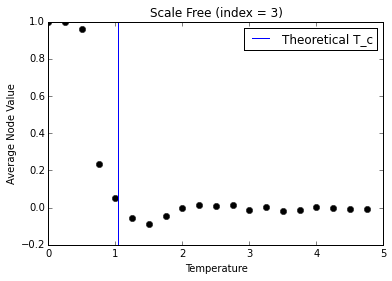

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline


# Build 10 node Barabasi Albert network
N_nodes = 10.
m = 1  # minimum number of connectivities in BA network
net = nx.barabasi_albert_graph(N_nodes,m)
degree = net.degree()
k_avg = np.mean(degree.values())

iterations = int(1e5)  # Number of time steps
time = np.zeros(iterations)  # array to store time
Energy = np.zeros(iterations)  # array to store energy as a function of time

# Create Temp and Energy arrays
Temp = np.arange(0,20)/4.
Temp[0] = 1e-6  # avoid divide by zero
avg_E = []

T_c = k_avg/4.*np.log(N_nodes)  # Predicted Critial Temp. (Approx)
#T_c = m/2.*np.log(N_nodes)  # Alternative Predicted Critical Temp. Can't recall where I found this one.


# Initialize network in spin up state
X = {}
for u in net.nodes():
#    value = float(np.random.randint(0,2))  # Random Initial State
    value = 1.  # Spinz Up
    if value == 0:
        value = -1.  # we have values of -1 and 1 (not 0 and 1)
    X[u] = value

# Initialize time and energy
Energy[0] = np.sum(X.values())/N_nodes
time[0] = 0.0


# Begin loop over temperature
for T in Temp:
    print T
    
    # For each temperature temporally evolve the Ising Model
    for i in range(0,iterations-1):

        # Choose a node
        node = np.random.randint(0,N_nodes)

        # Do we flip?
        E = 0.
        for each in net.neighbors(node):
            E += 1.0 * X[each]  # Sum of nearest neighbors
        E = -X[node]*E  # Energy of node

        #What Happens Next??
        if E > 0.:
            X[node] = -X[node]  # Flip Spin if Old Energy is positive
        if E <= 0.:
            r = np.random.random()
            if r <= np.exp(2.*E/T):          # Maybe Flip Spin (accounts for entopy considerations)
                X[node] = -X[node]

        # Store energy of system at the given time
        Energy[i+1]= np.sum(X.values())/N_nodes
        time[i+1] = time[i] + 1.
        
    # Store E(T) using only the last many simulations
    avg_E.append(np.mean(Energy[(iterations/2):iterations-1]))
    #avg_E.append(np.mean(Energy[(3*iterations/4):iterations-1]))

    
# Create Graphics    
plt.plot(Temp,avg_E,'ko')
plt.title('Scale Free (index = 3)')
plt.xlabel('Temperature')
plt.ylabel('Average Node Value')
plt.axvline(T_c,label='Theoretical T_c',color='blue')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/'+'BA_Temp_N10_Tc.ps')

## Now let's calcalute information measures

Start
Temperature: 1e-06
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_0_nodes_10_longtime_short: File exists
Trial: 0
Active Info 0.0
Transfer Entropy 0.0
Trial: 1
Active Info 0.0
Transfer Entropy 0.0
Trial: 2
Active Info 0.0
Transfer Entropy 0.0
Trial: 3
Active Info 0.0
Transfer Entropy 0.0
Trial: 4
Active Info 0.0
Transfer Entropy 0.0
Trial: 5
Active Info 0.0
Transfer Entropy 0.0
Trial: 6
Active Info 0.0
Transfer Entropy 0.0
Trial: 7
Active Info 0.0
Transfer Entropy 0.0
Trial: 8
Active Info 0.0
Transfer Entropy 0.0
Trial: 9
Active Info 0.0
Transfer Entropy 0.0
Average AI = 0.0
Average TE = 0.0
Temperature: 0.5
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_0_nodes_10_longtime_short: File exists


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Trial: 0
Active Info 0.0
Transfer Entropy 0.0
Trial: 1
Active Info 0.0
Transfer Entropy 0.0
Trial: 2
Active Info 0.712308
Transfer Entropy 0.001666
Trial: 3
Active Info 0.0
Transfer Entropy 0.0
Trial: 4
Active Info 0.0
Transfer Entropy 0.0
Trial: 5
Active Info 0.768998
Transfer Entropy 0.0
Trial: 6
Active Info 0.0
Transfer Entropy 0.0
Trial: 7
Active Info 0.0
Transfer Entropy 0.0
Trial: 8
Active Info 0.06321
Transfer Entropy 0.0
Trial: 9
Active Info 0.0
Transfer Entropy 0.0
Average AI = 0.1544516
Average TE = 0.0001666
Temperature: 1.0
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_1_nodes_10_longtime_short: File exists
Trial: 0
Active Info 4.68387
Transfer Entropy 0.370961
Trial: 1
Active Info 7.800187
Transfer Entropy 0.126318
Trial: 2
Active Info 0.962188
Transfer Entropy 0.006208
Trial: 3
Active Info 5.110758
Transfer Entropy 0.384802
Trial: 4
Active Info 2.451065
Transfer Entropy 0.065246
Trial: 5
Active Info 3.215972
Transfer Entropy 0.048741
Trial: 6
Active Info 2.108398
Tran

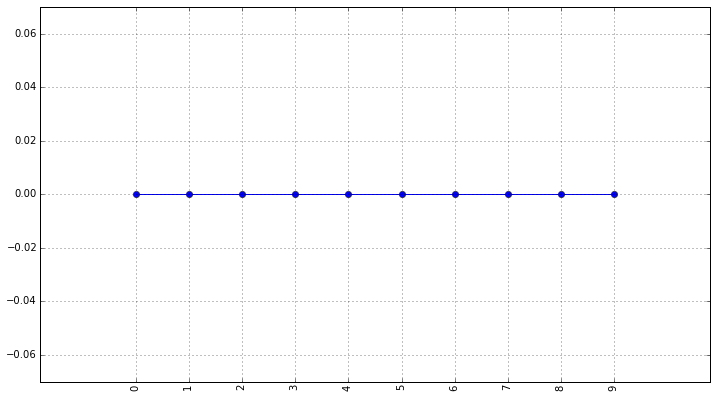

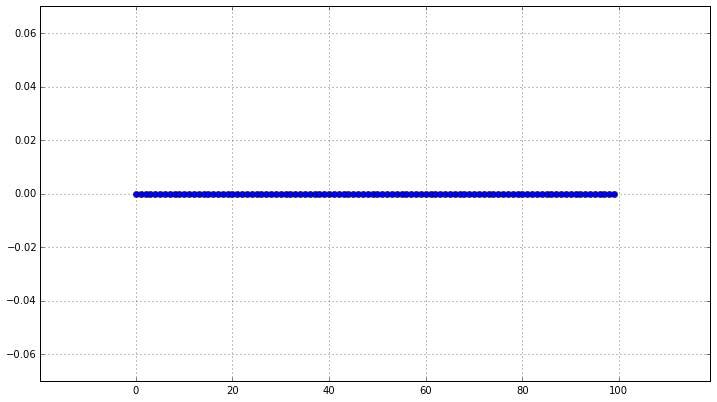

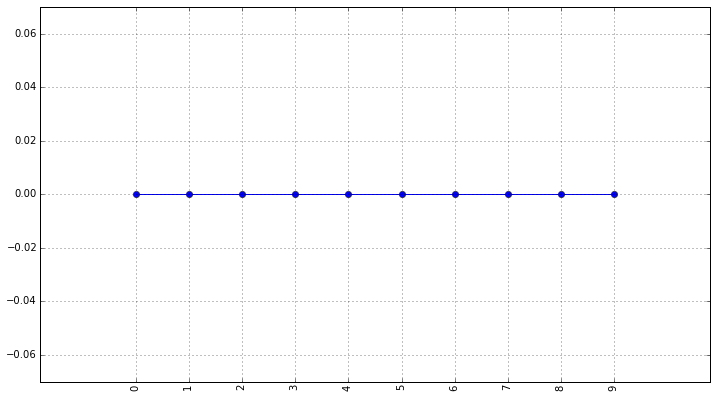

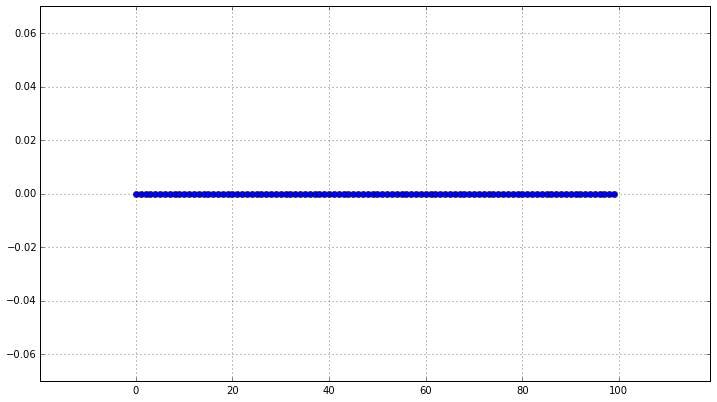

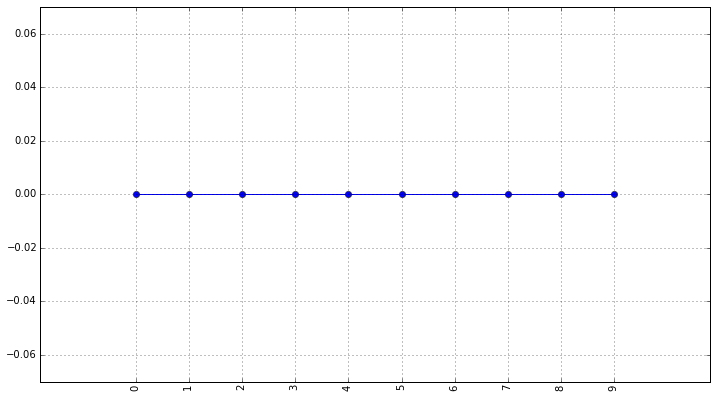

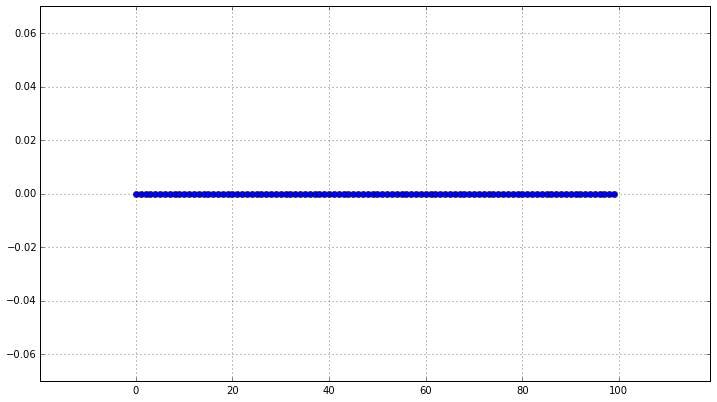

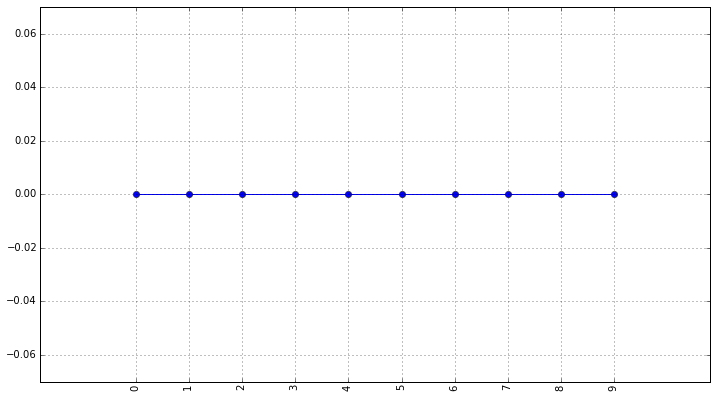

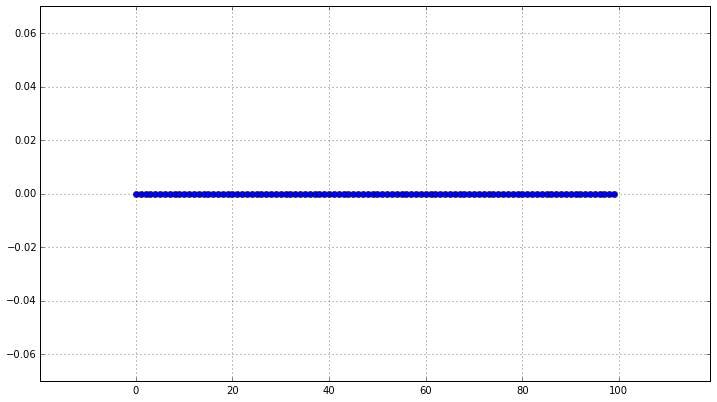

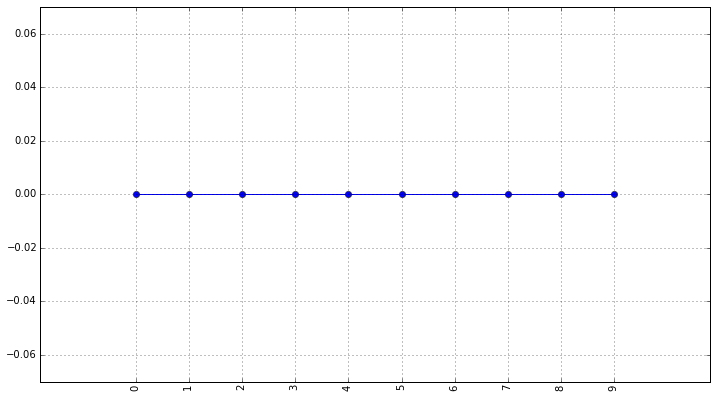

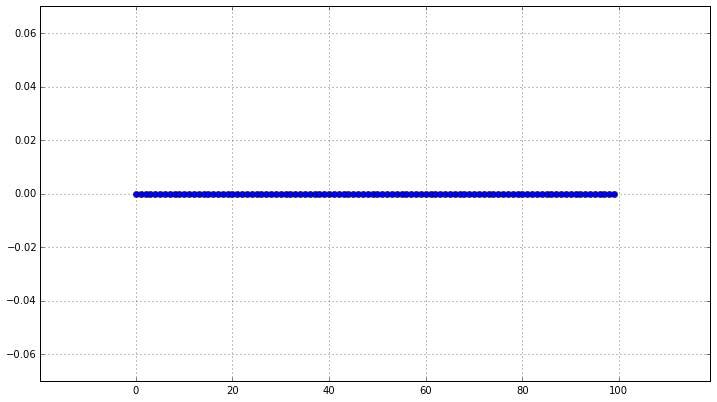

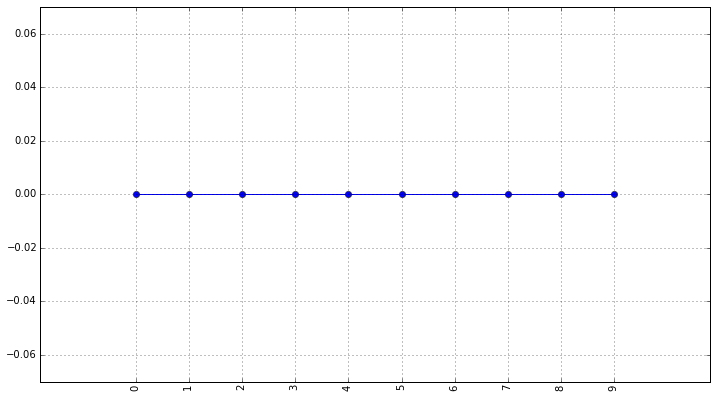

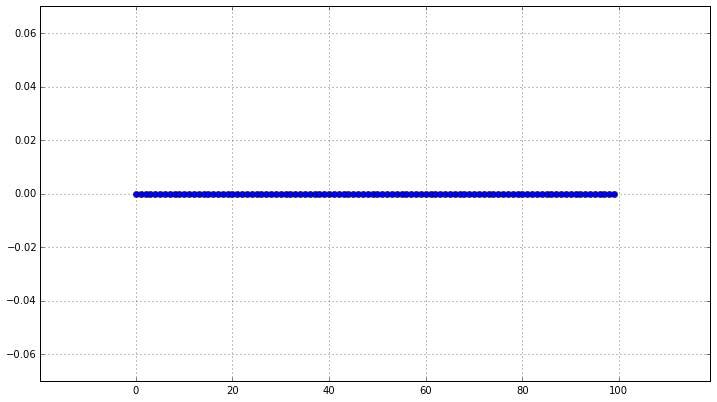

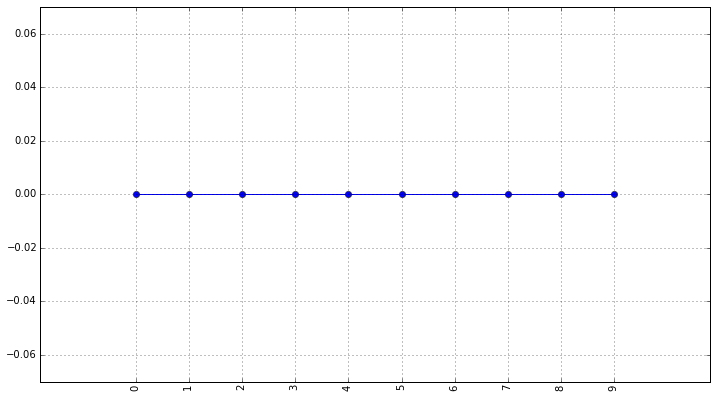

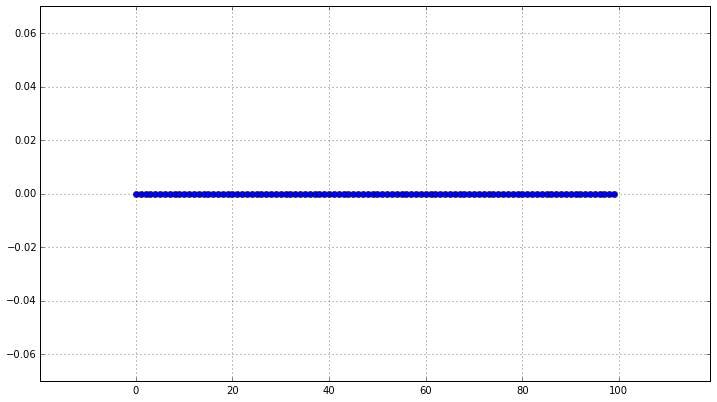

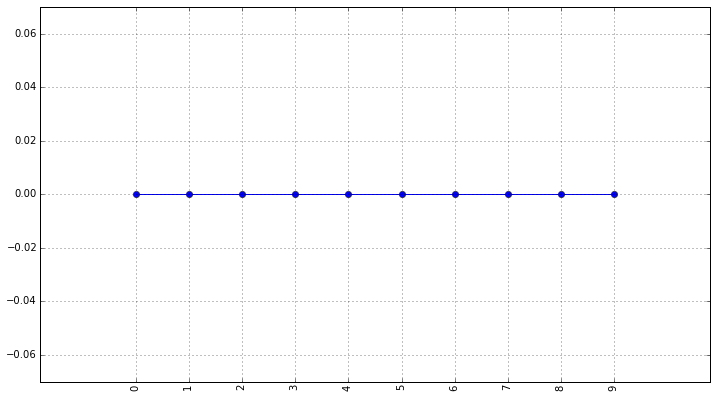

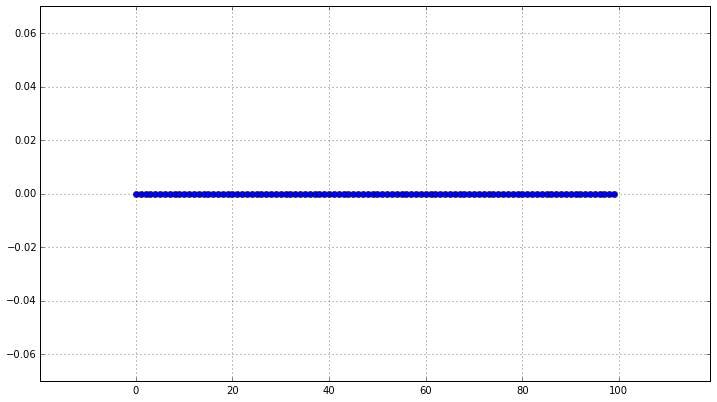

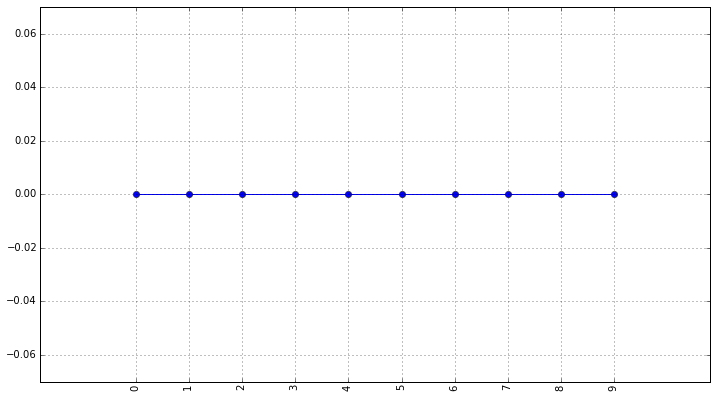

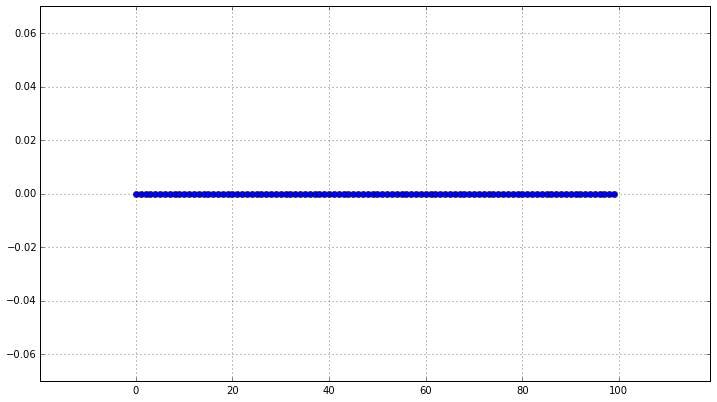

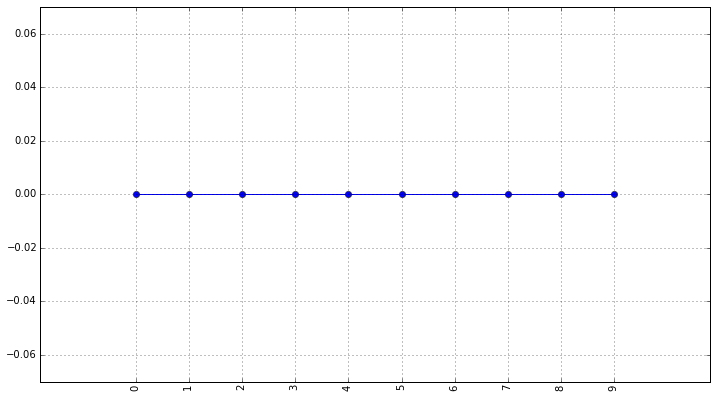

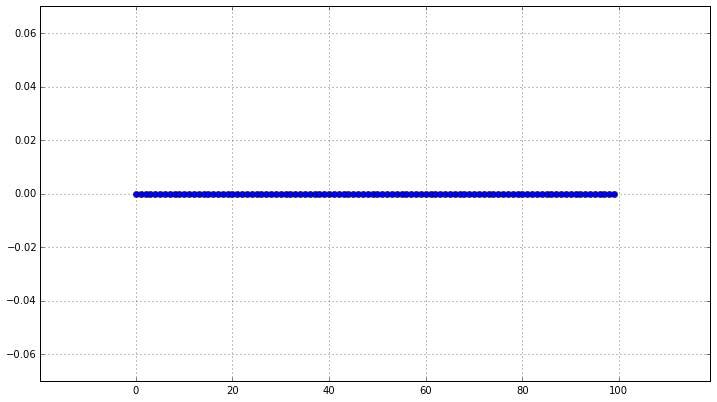

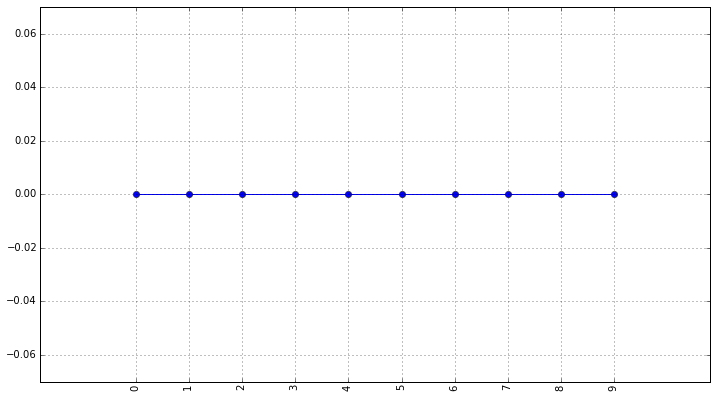

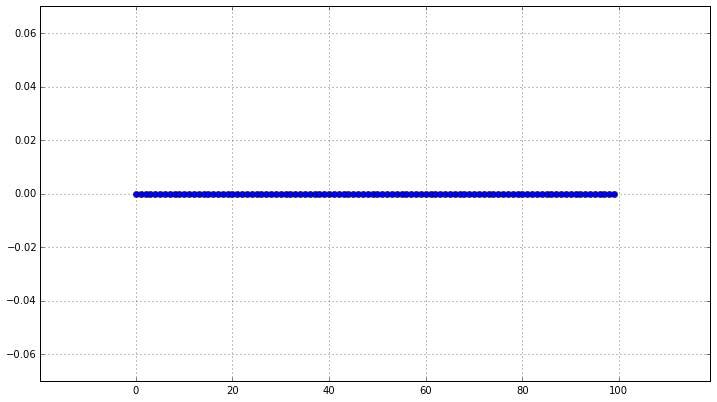

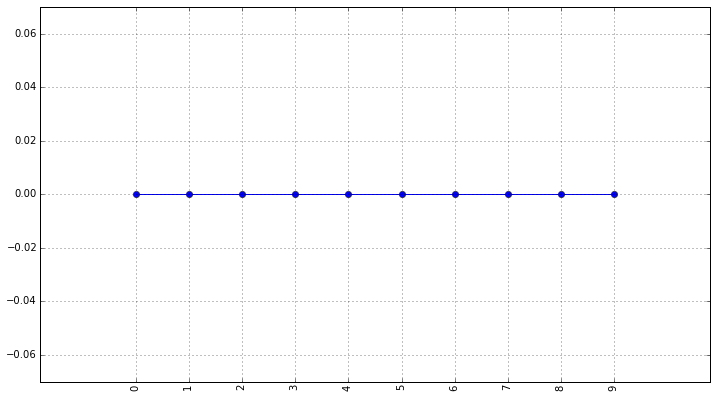

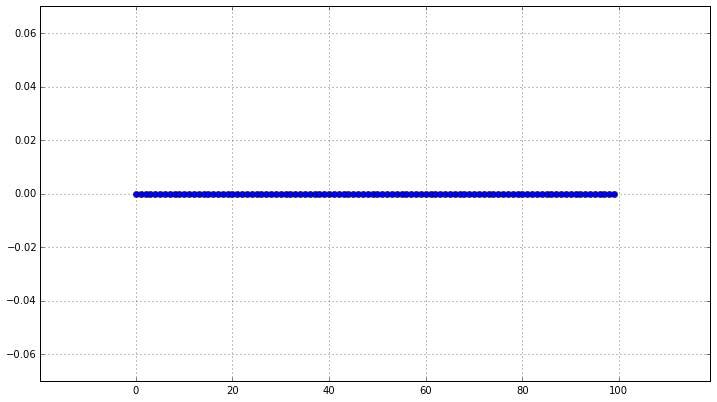

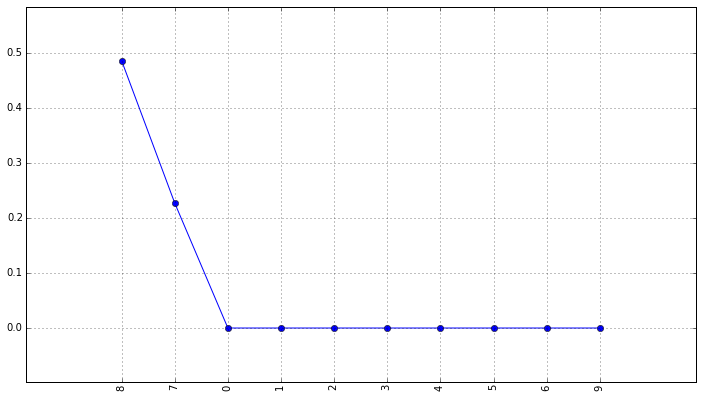

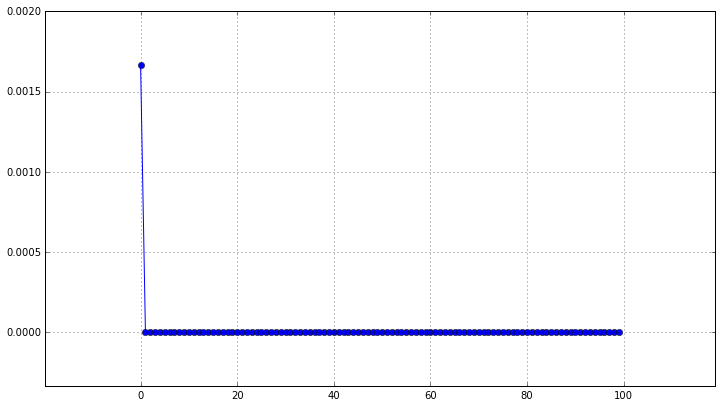

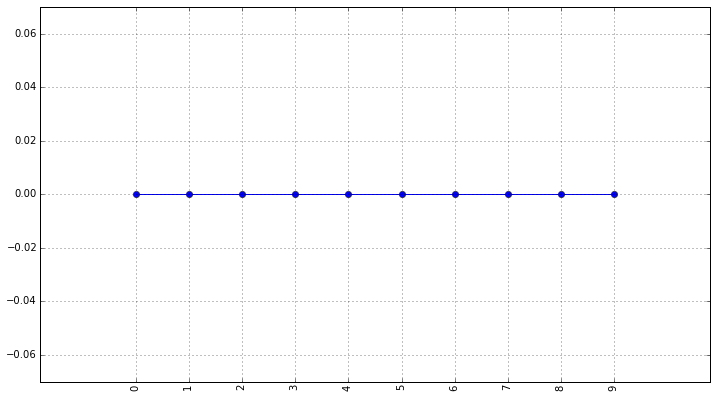

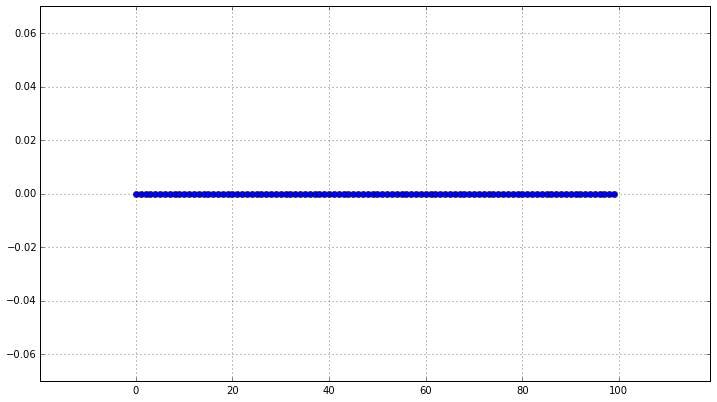

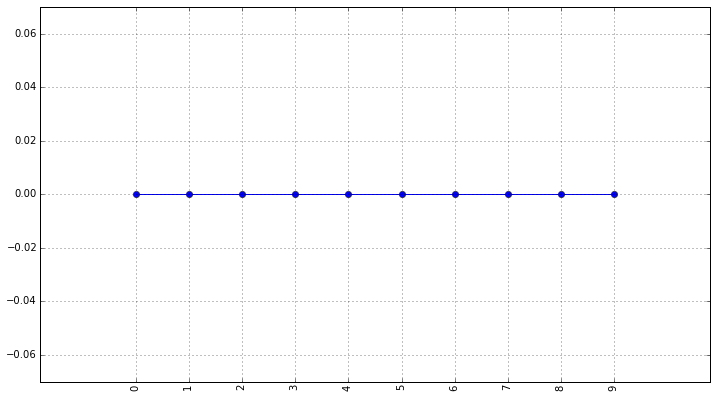

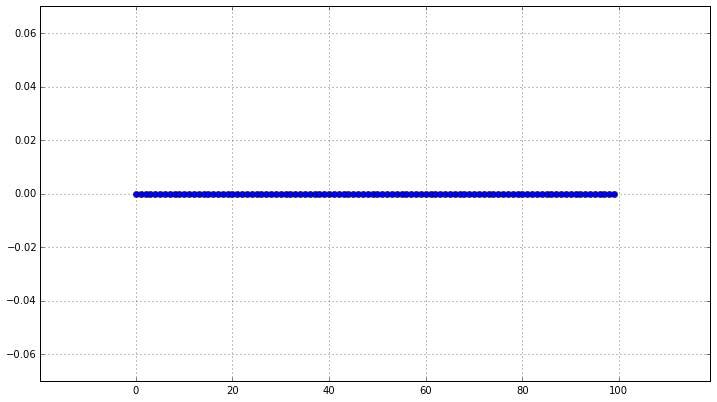

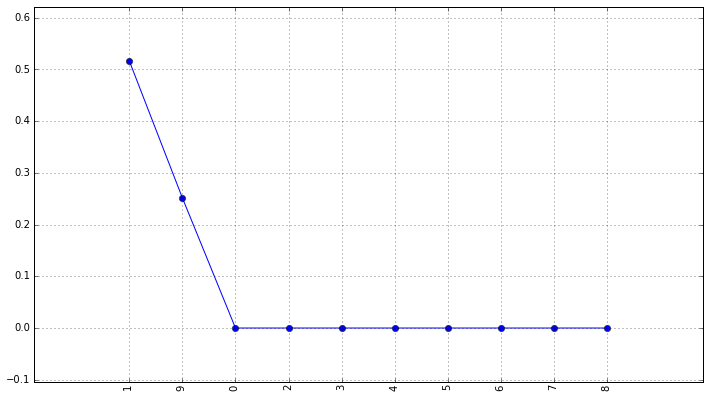

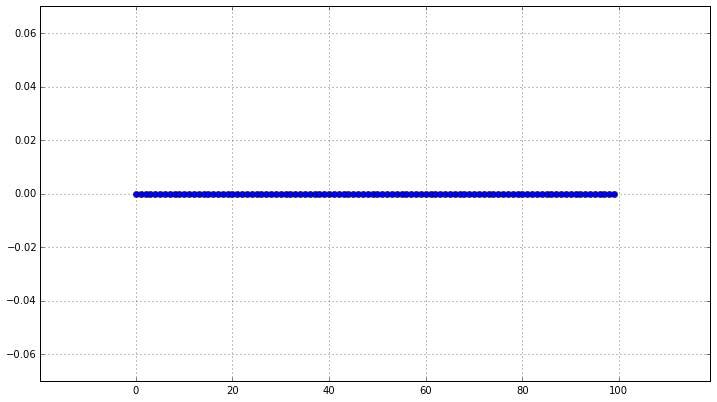

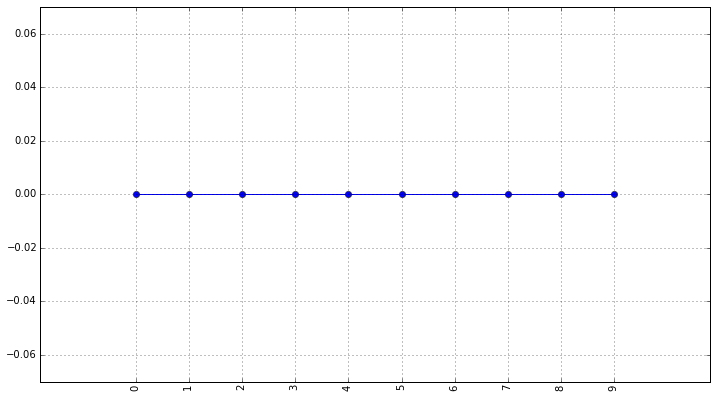

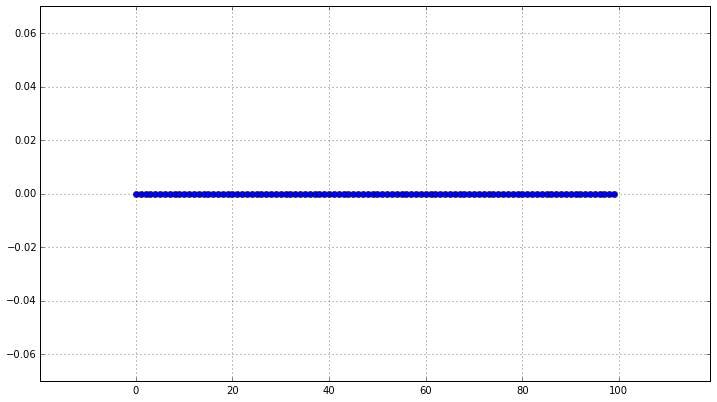

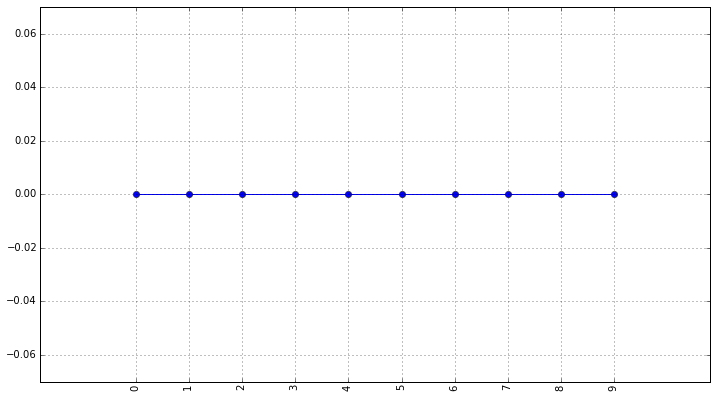

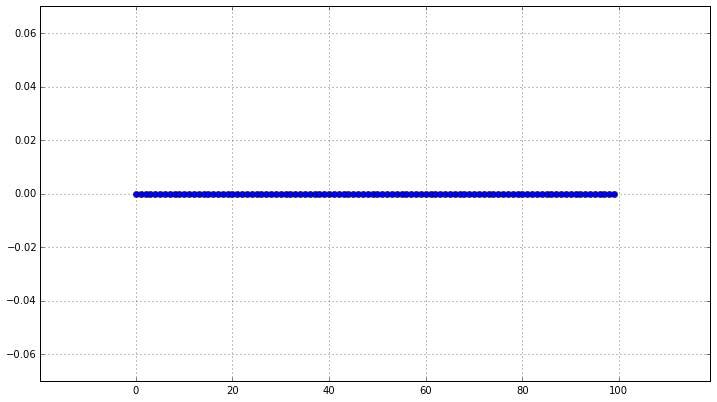

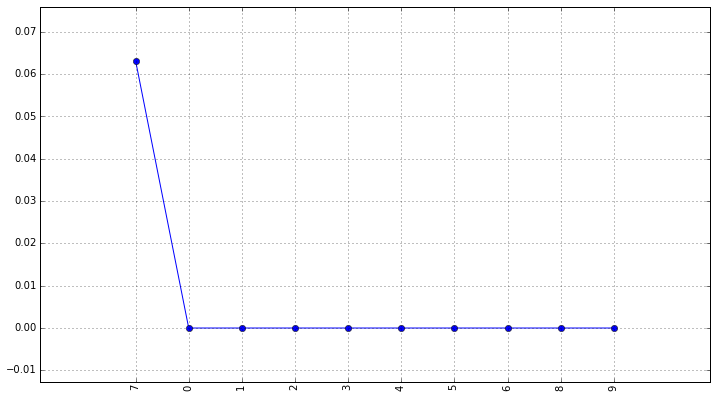

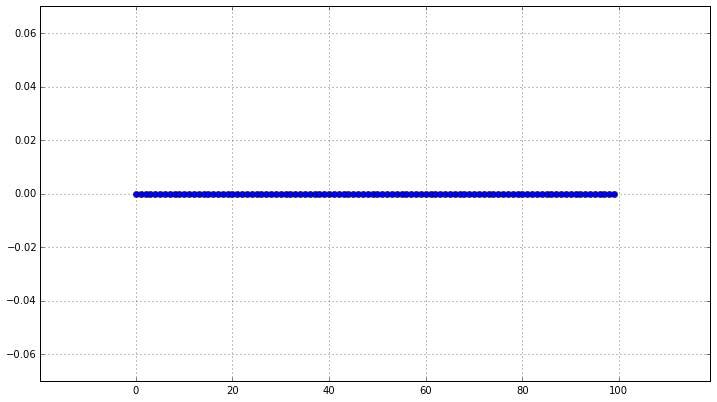

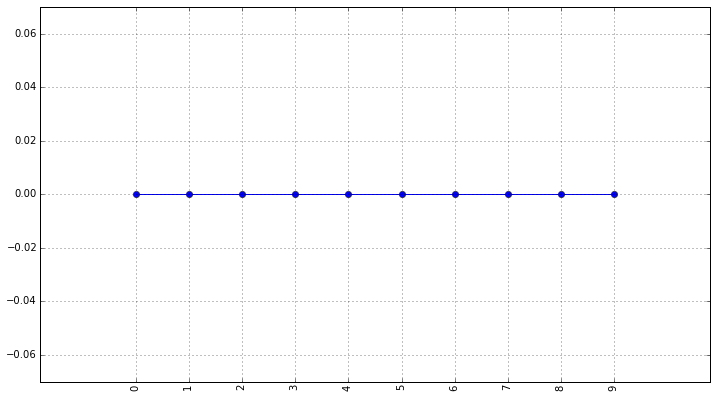

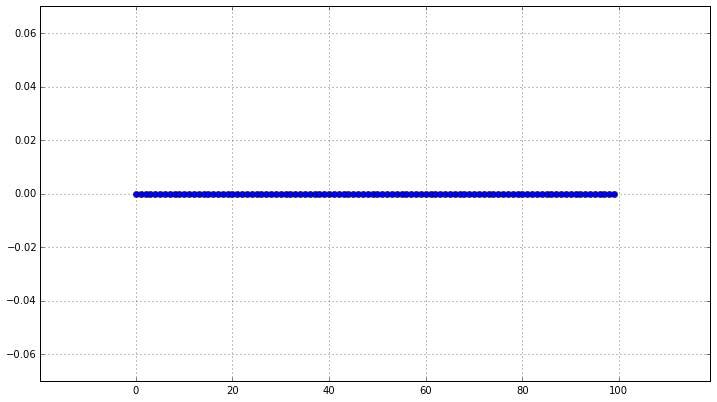

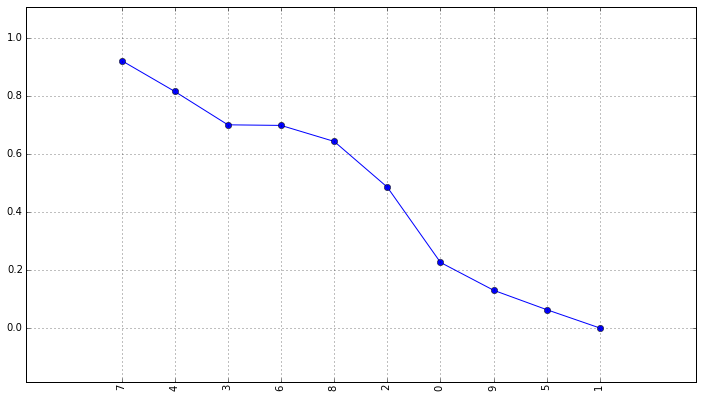

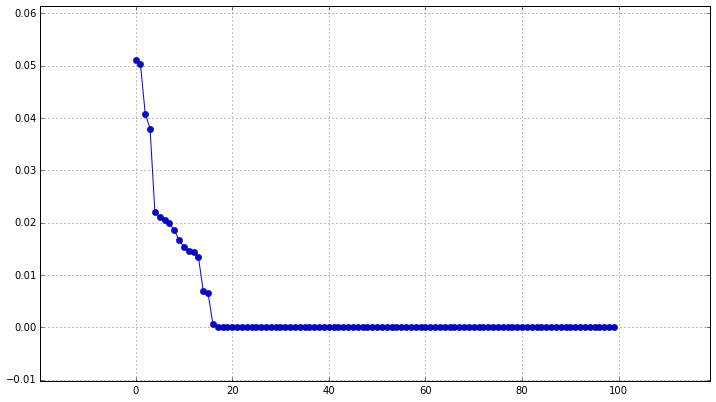

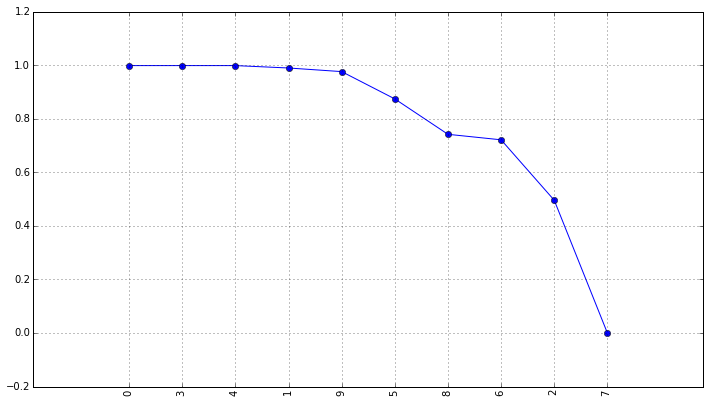

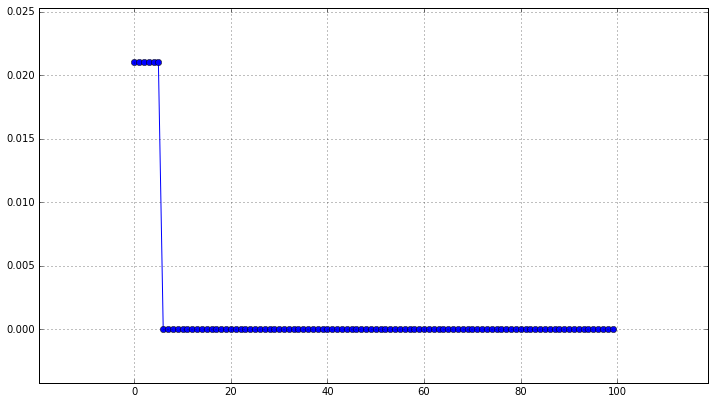

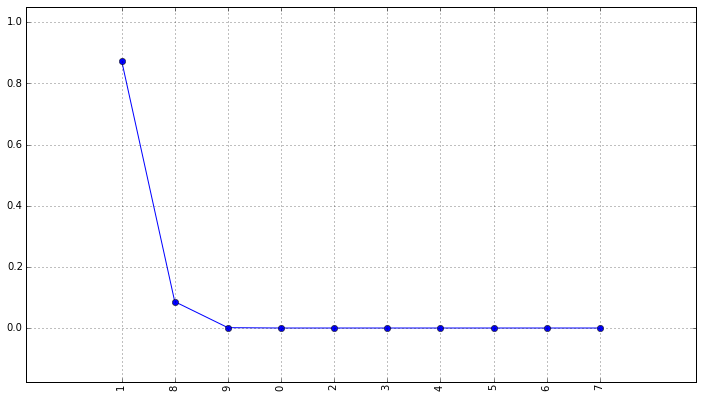

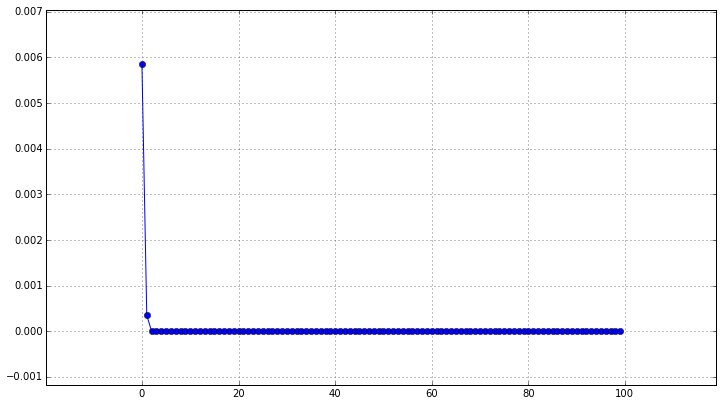

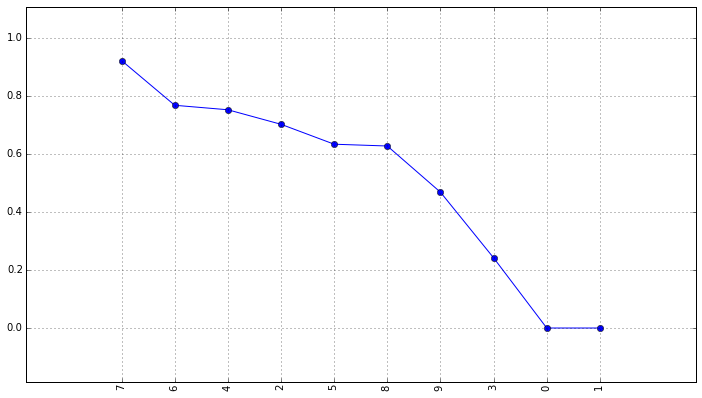

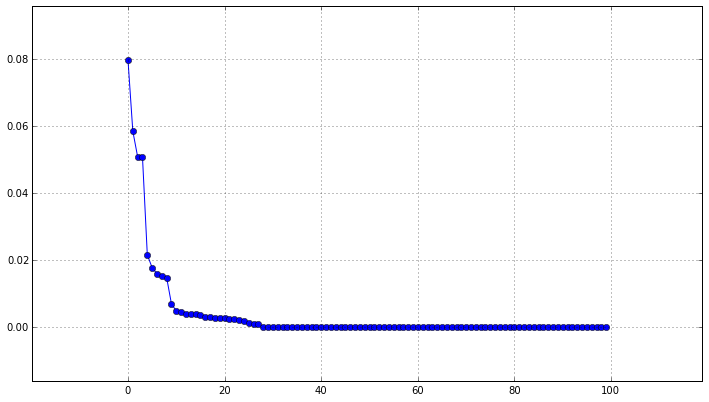

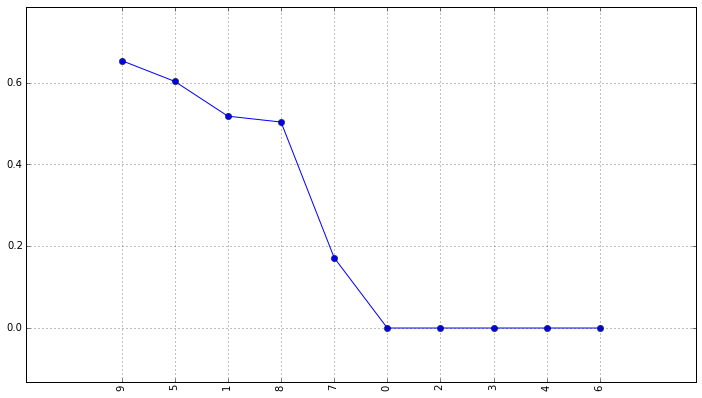

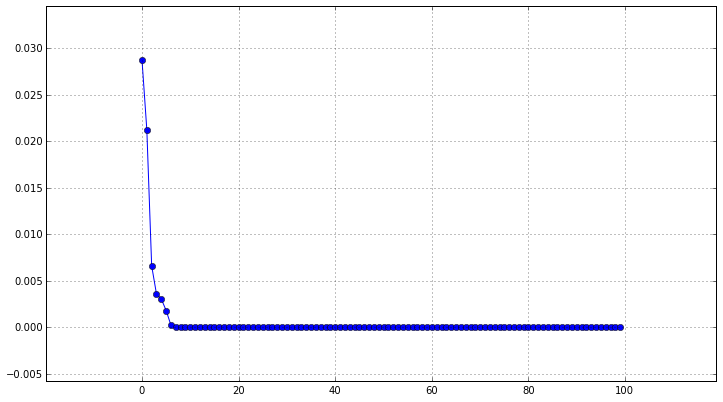

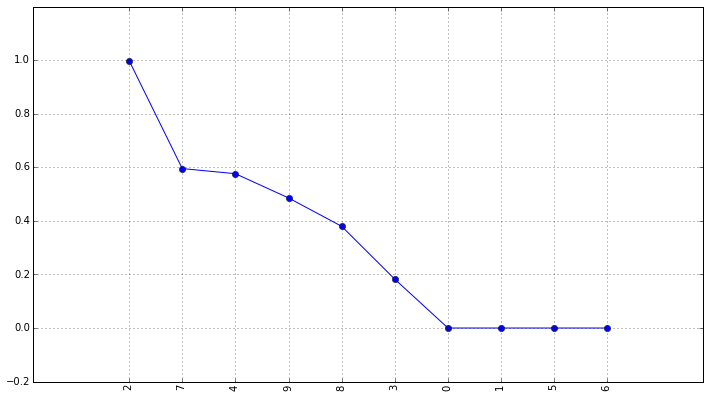

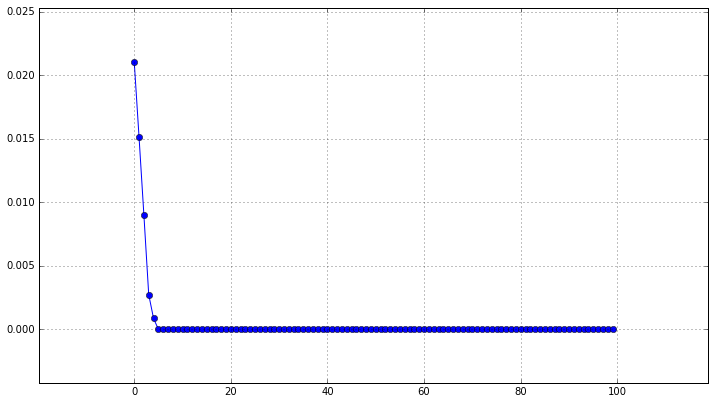

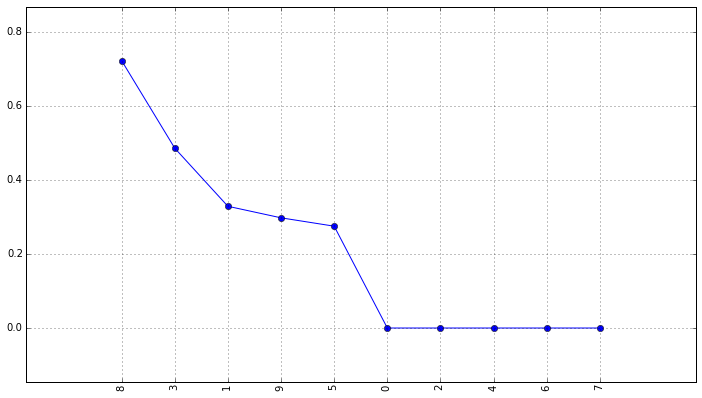

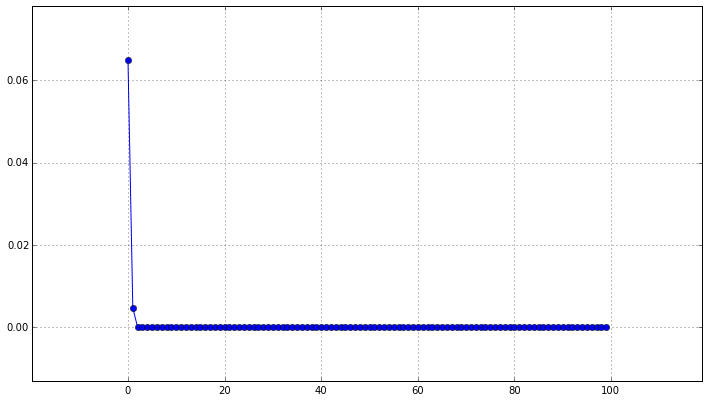

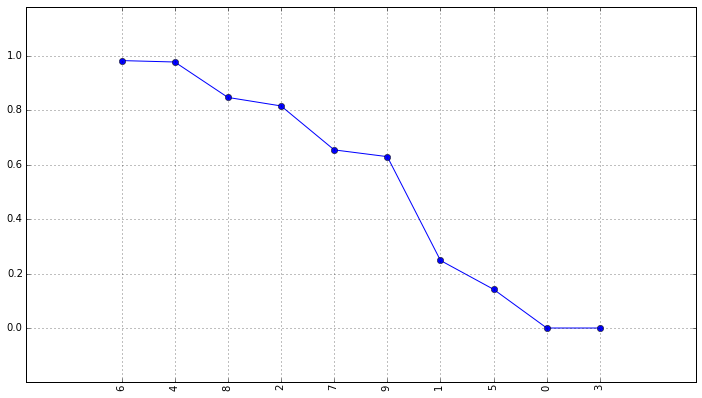

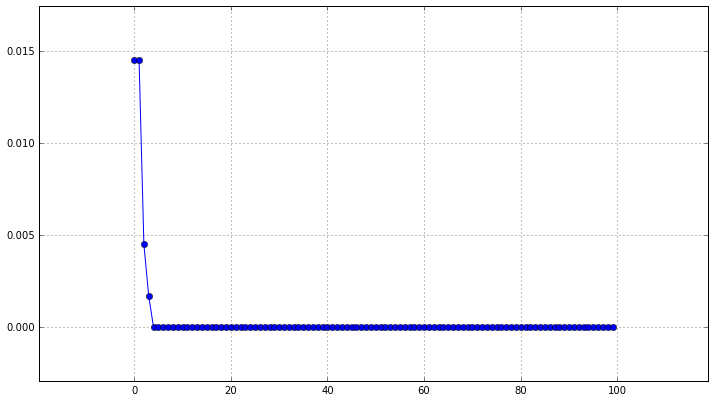

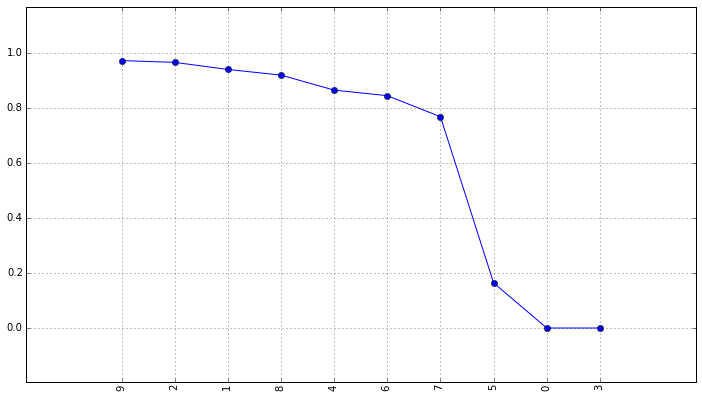

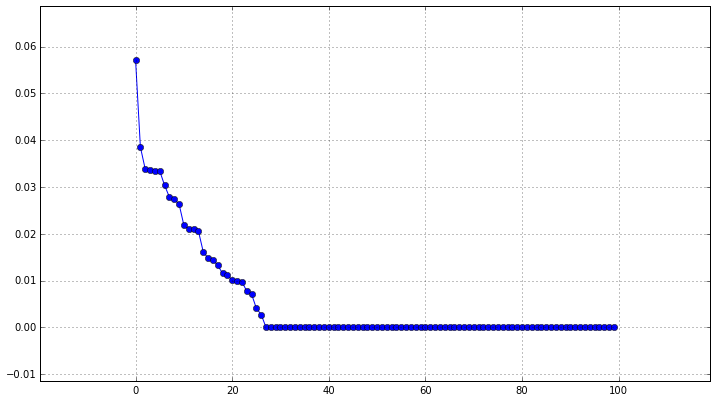

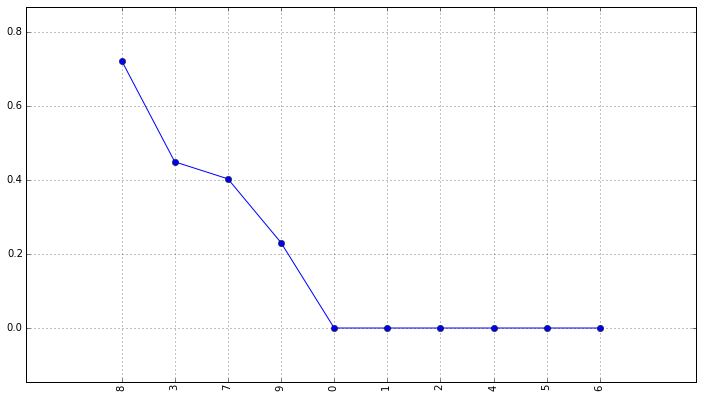

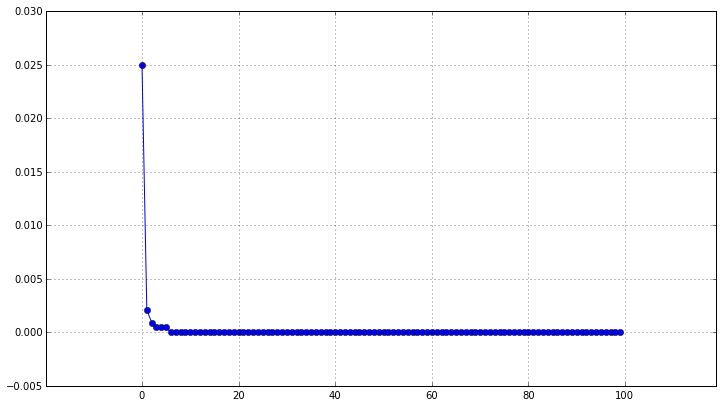

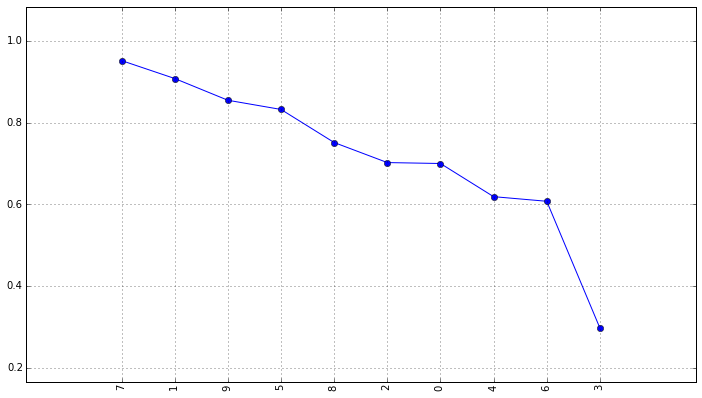

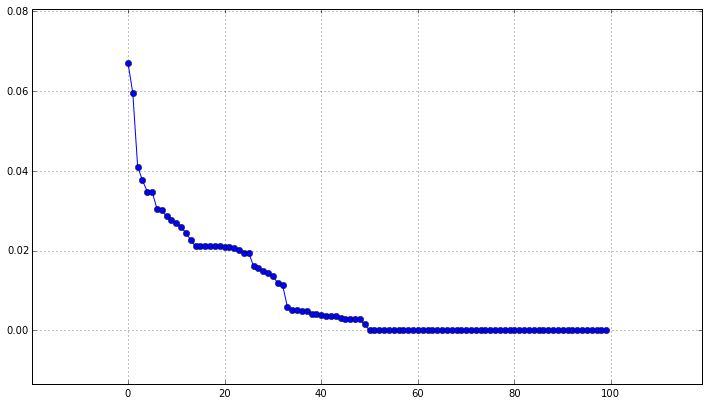

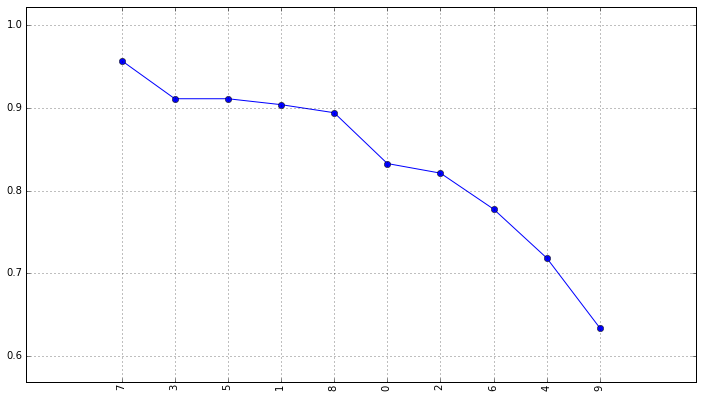

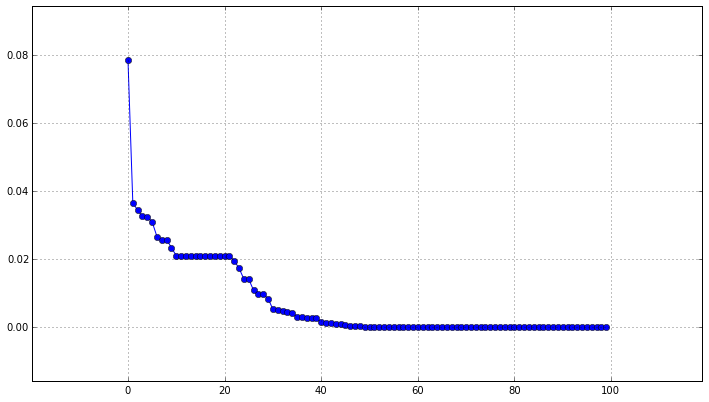

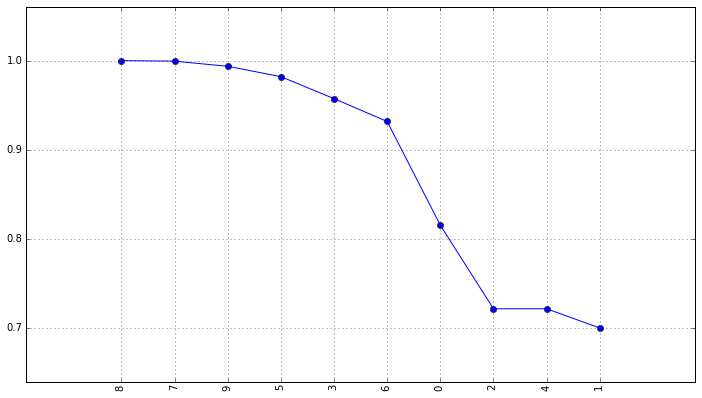

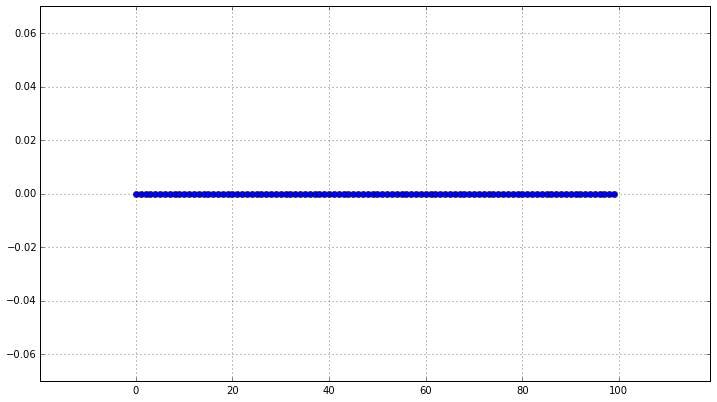

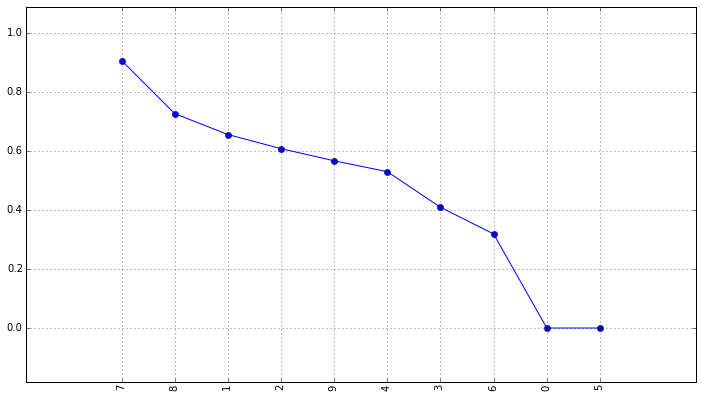

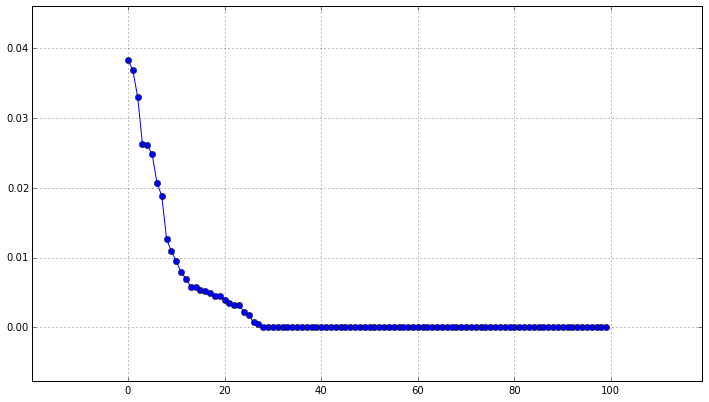

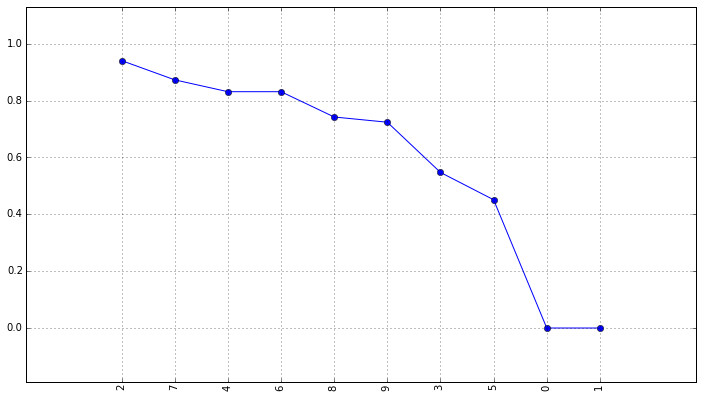

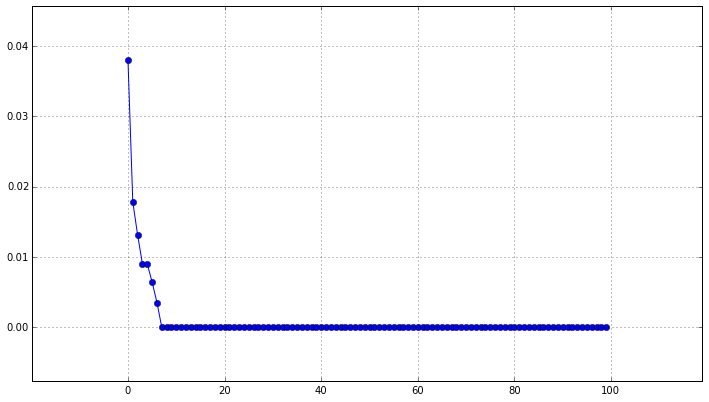

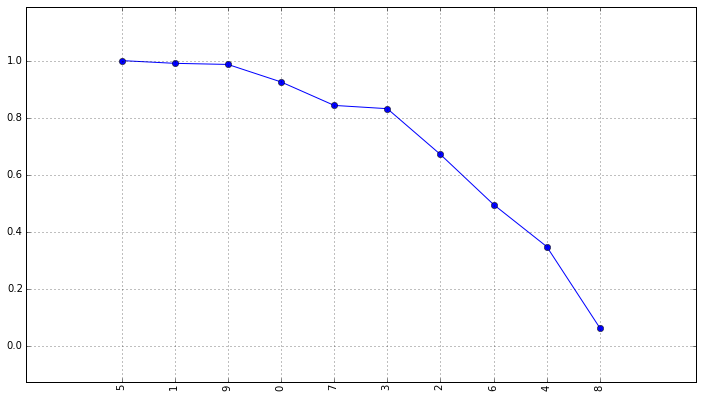

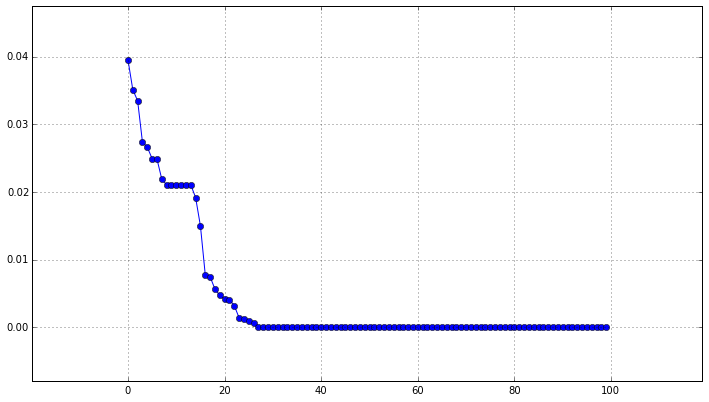

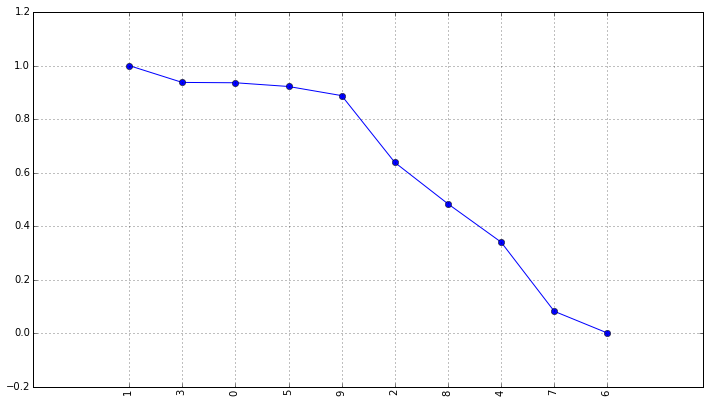

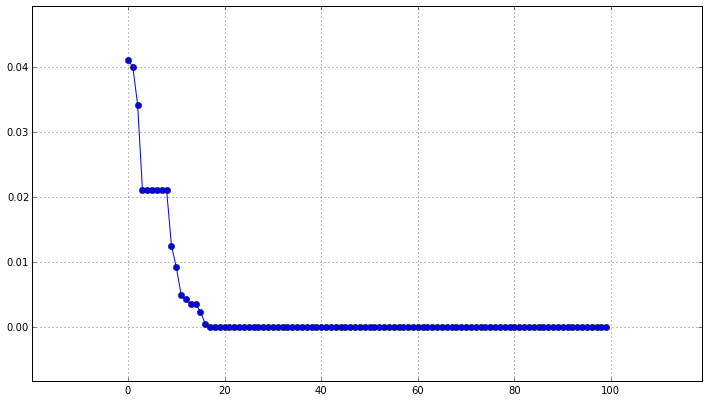

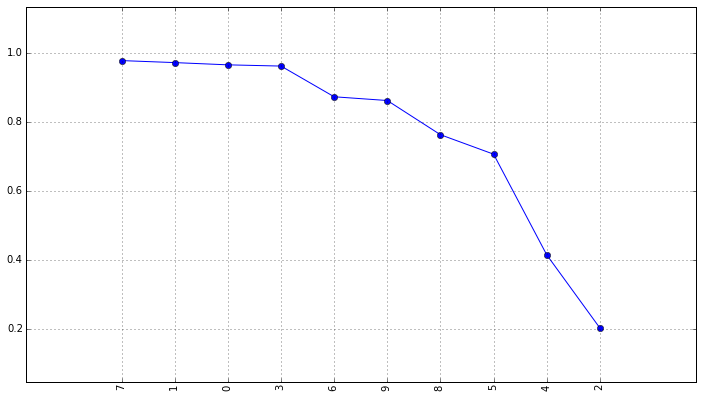

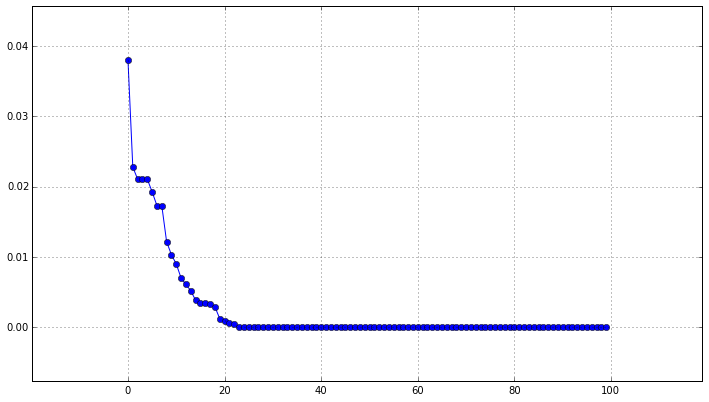

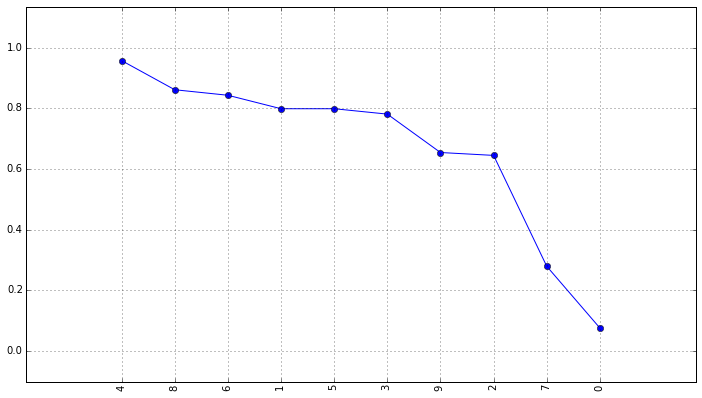

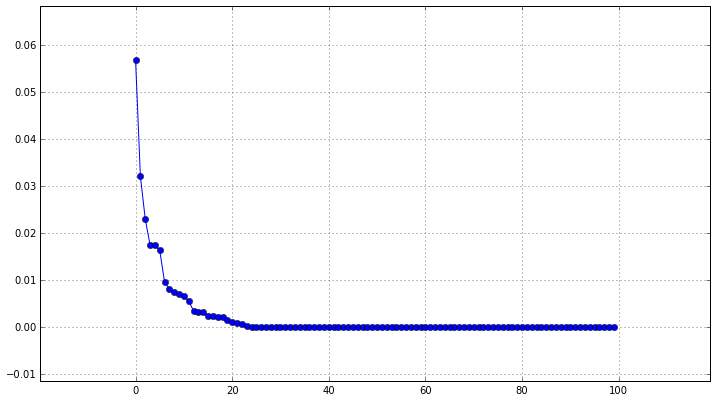

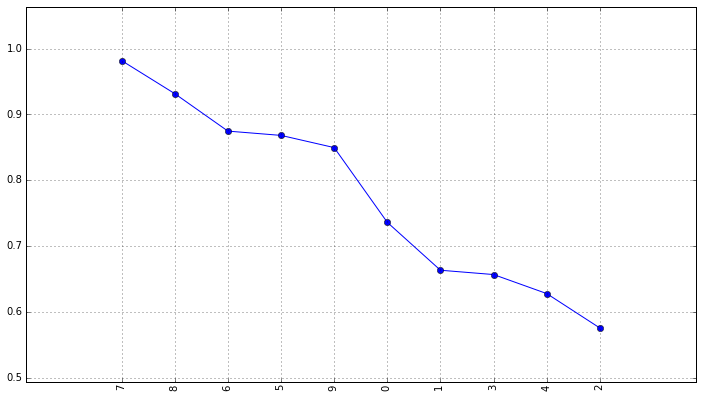

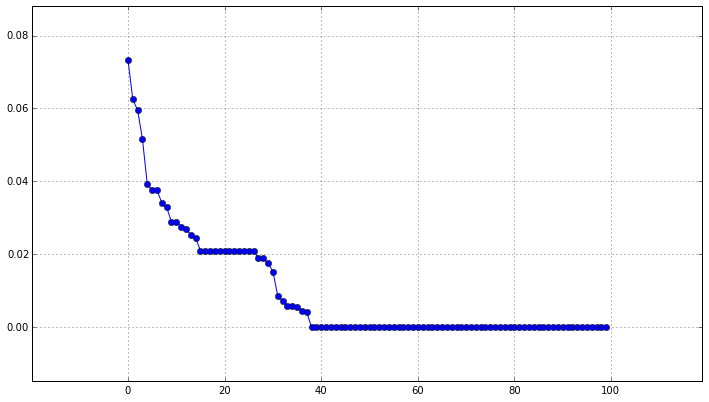

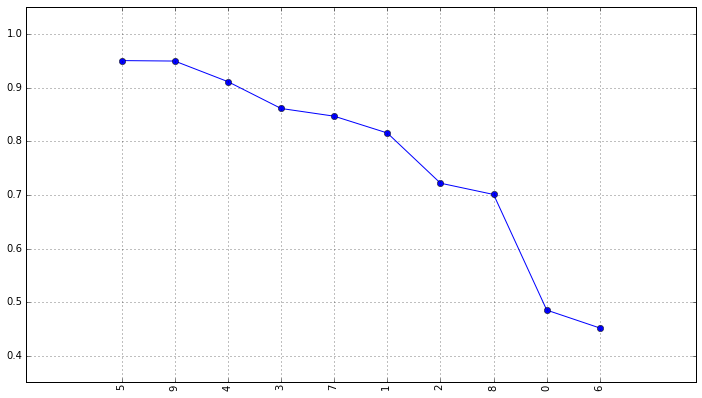

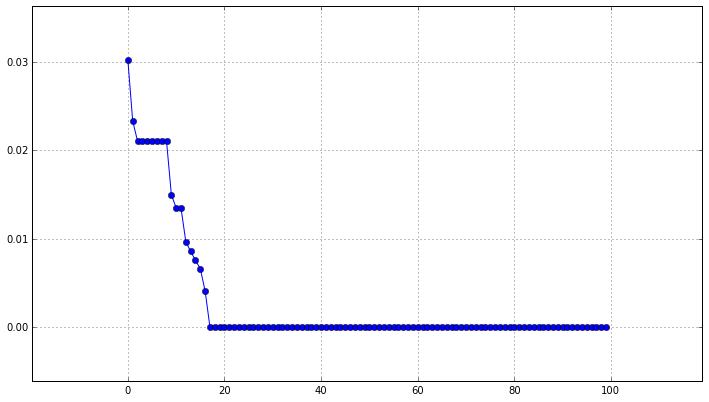

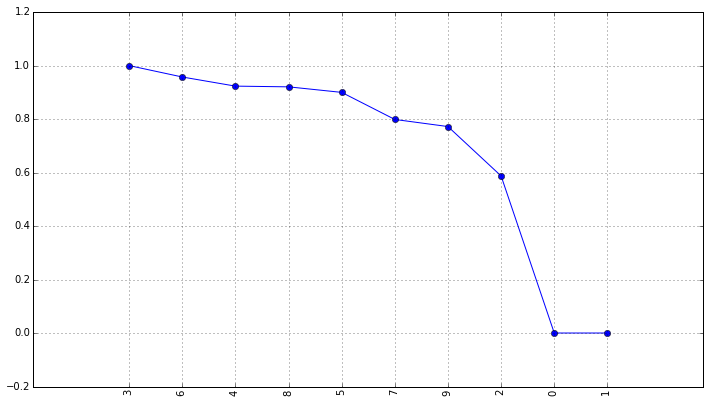

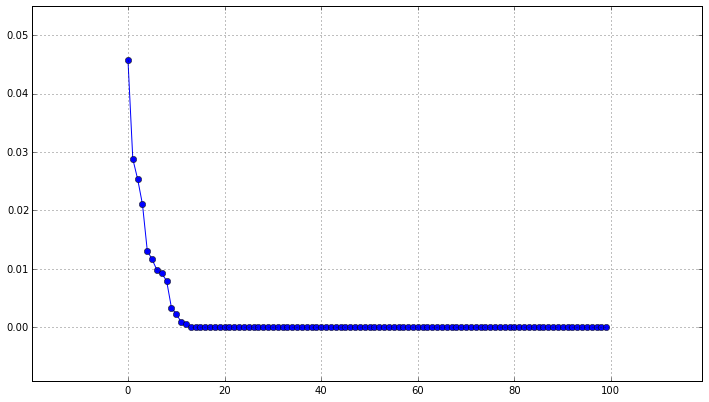

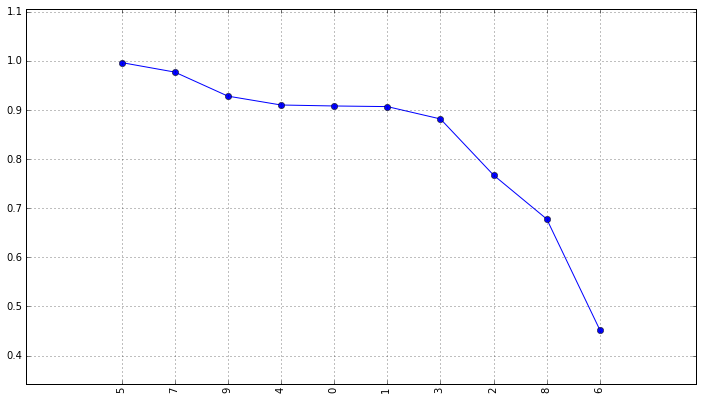

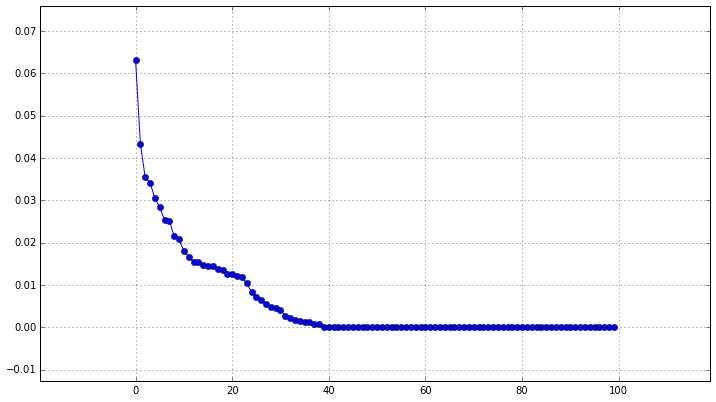

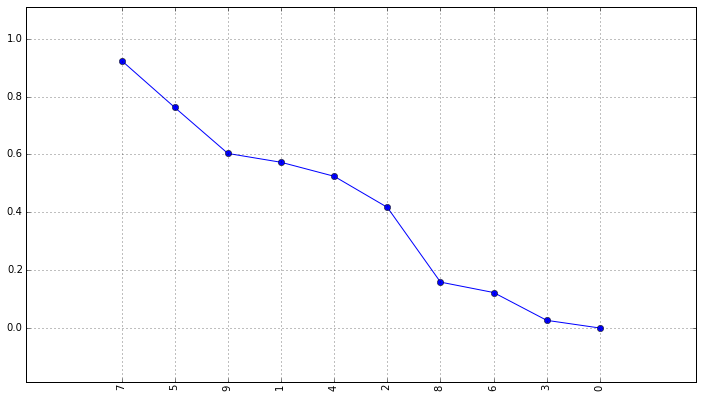

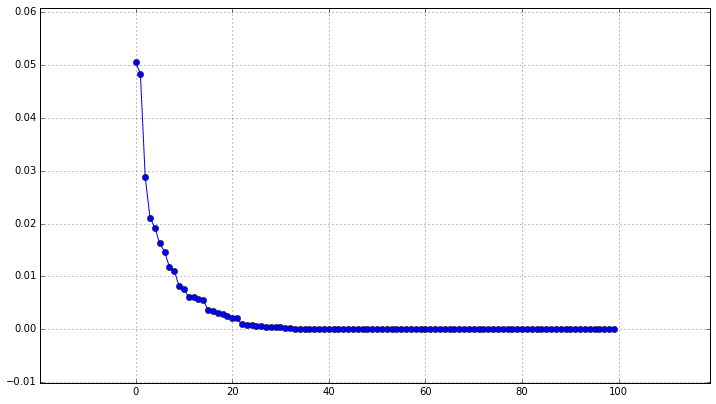

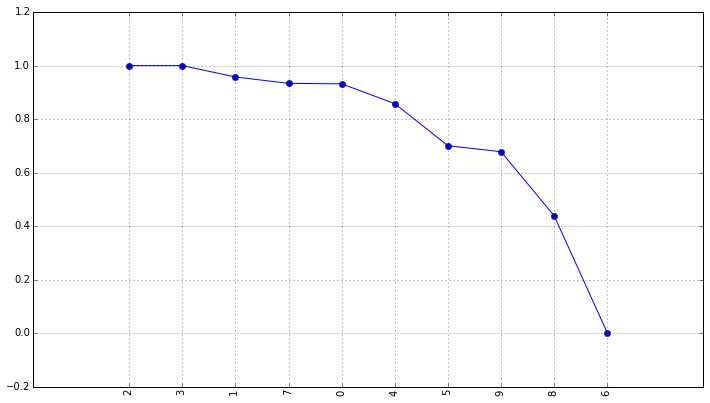

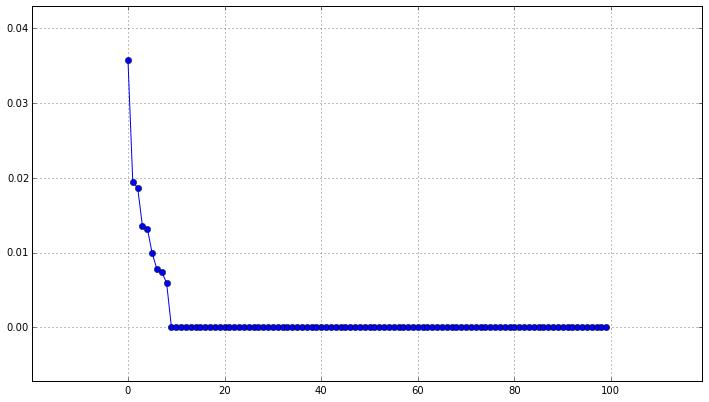

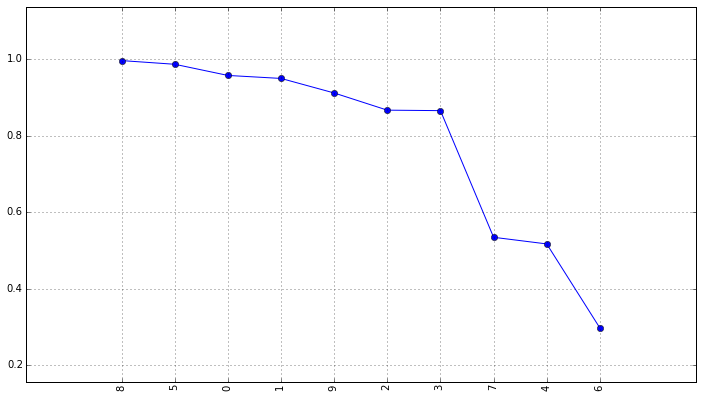

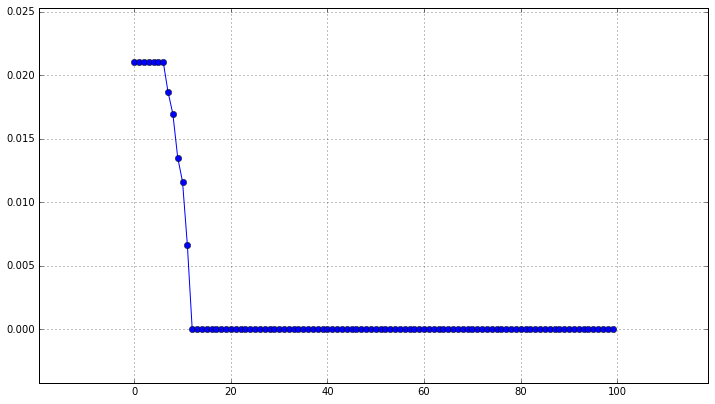

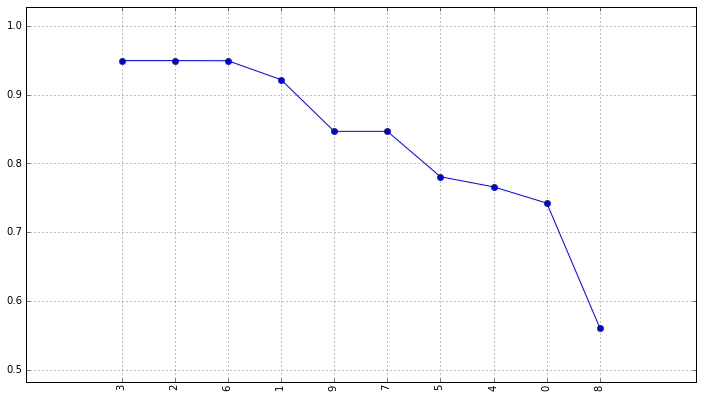

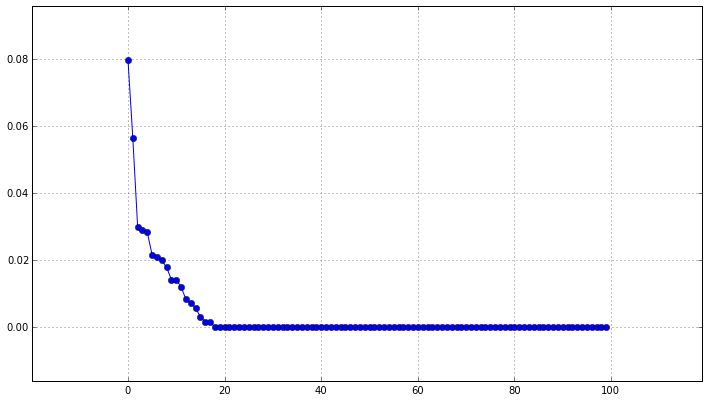

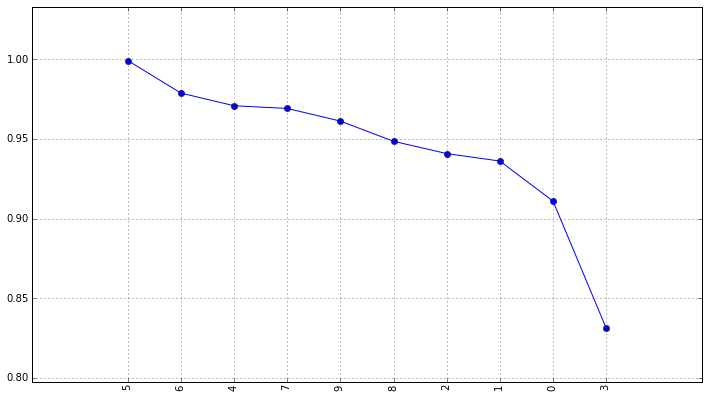

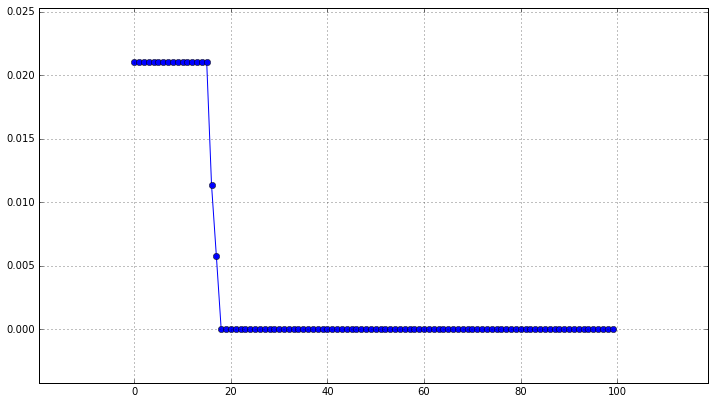

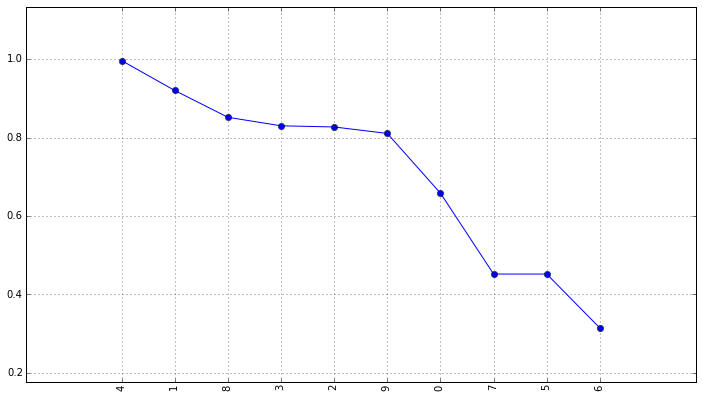

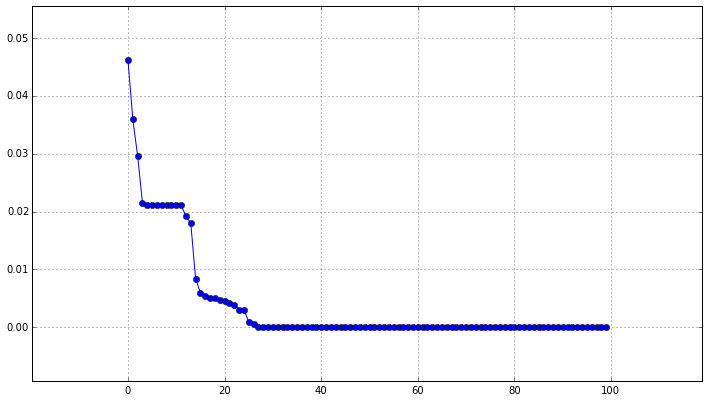

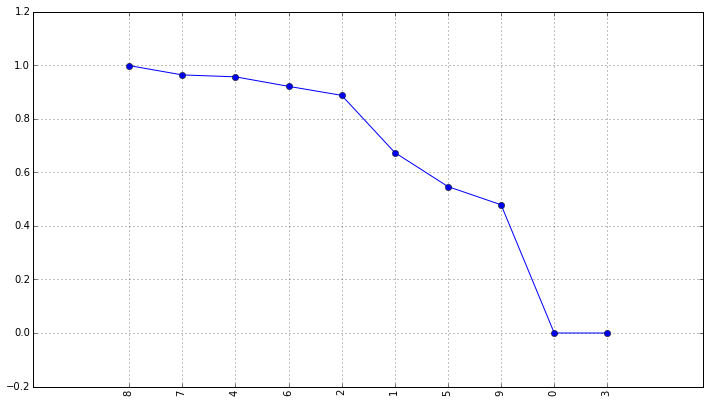

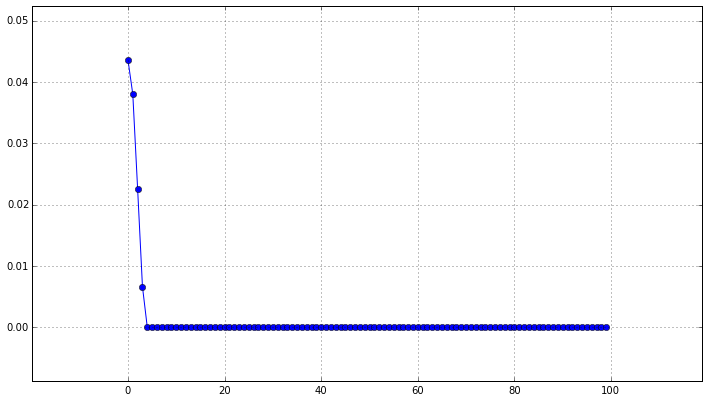

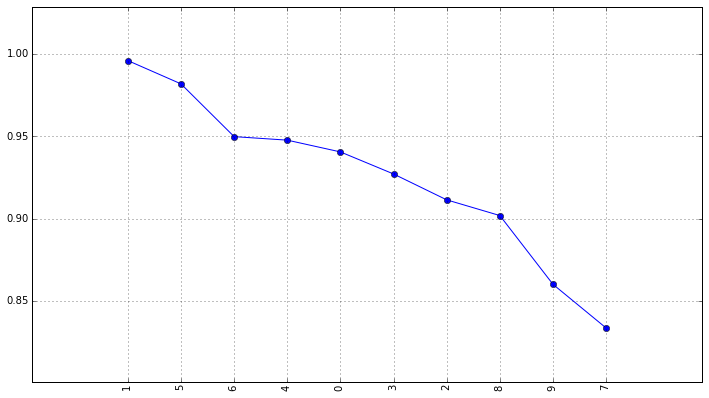

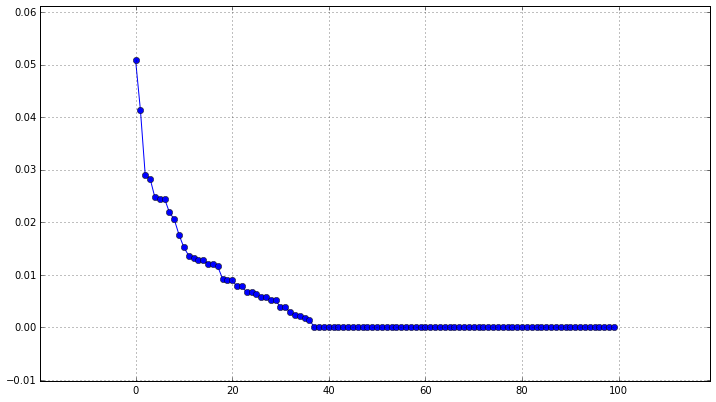

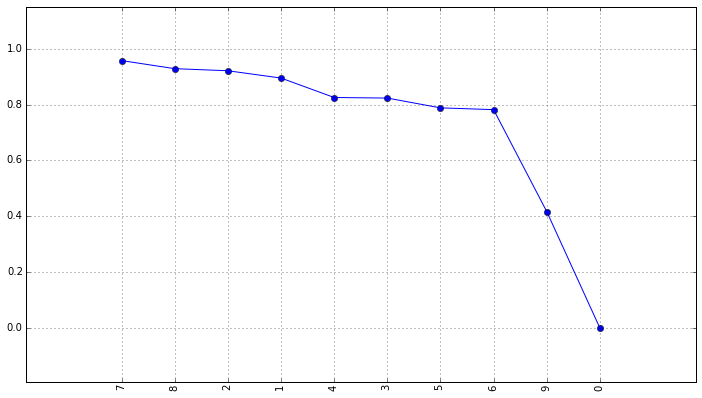

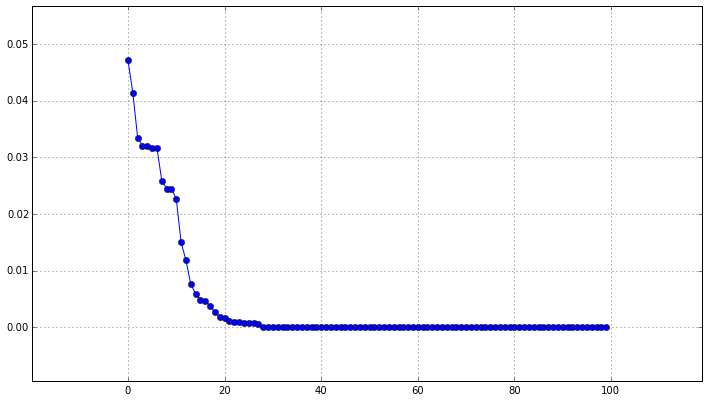

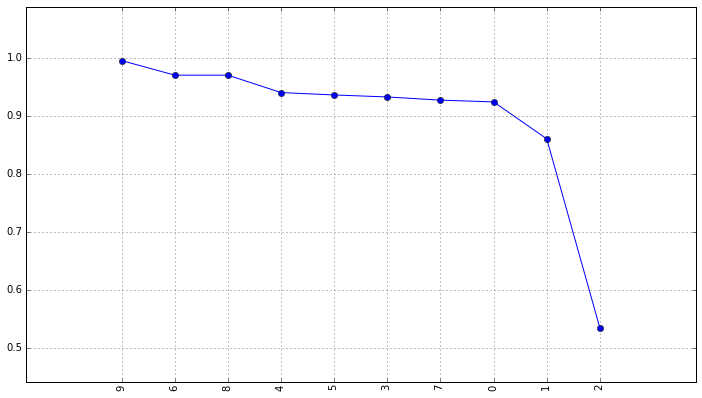

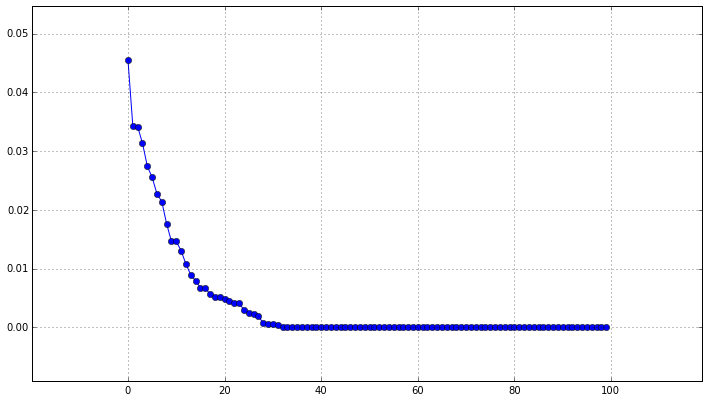

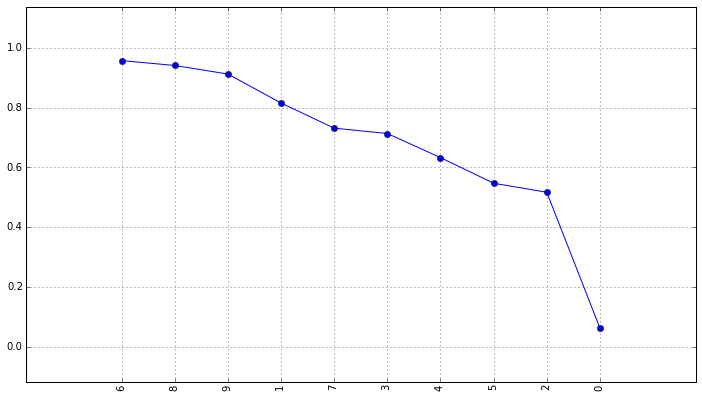

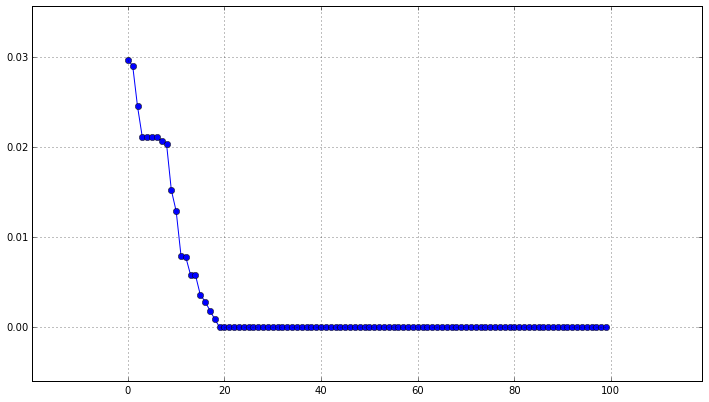

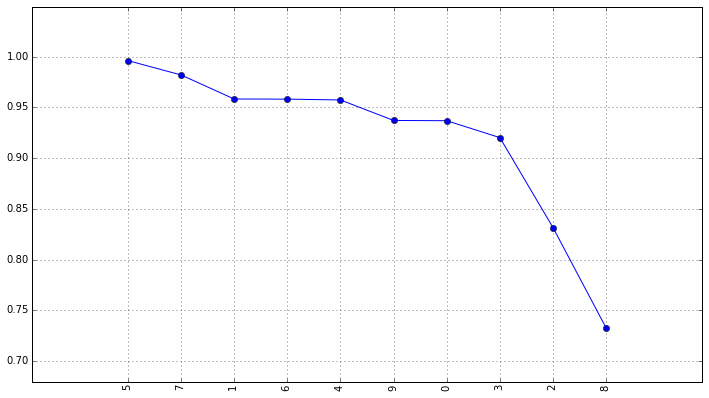

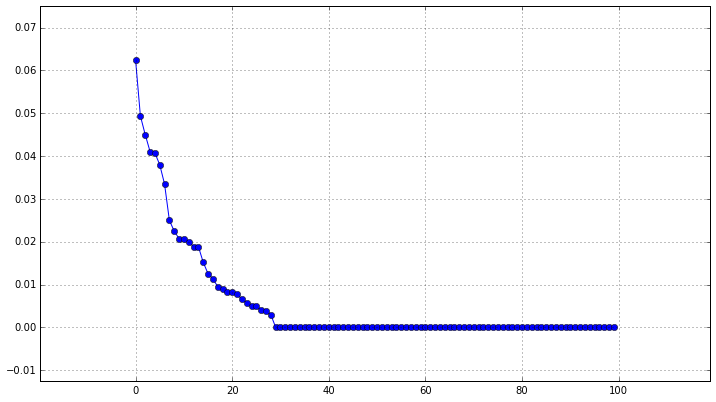

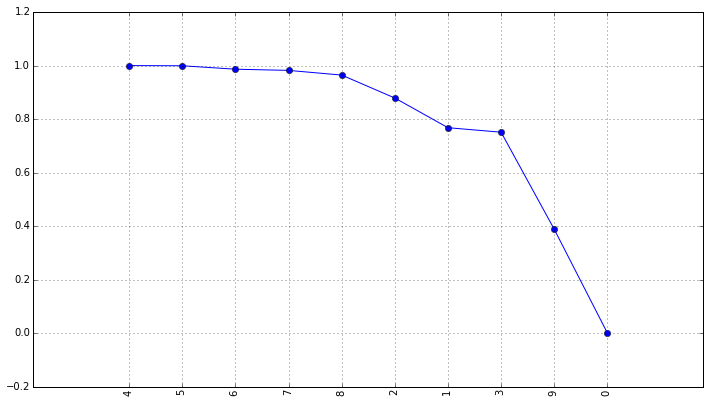

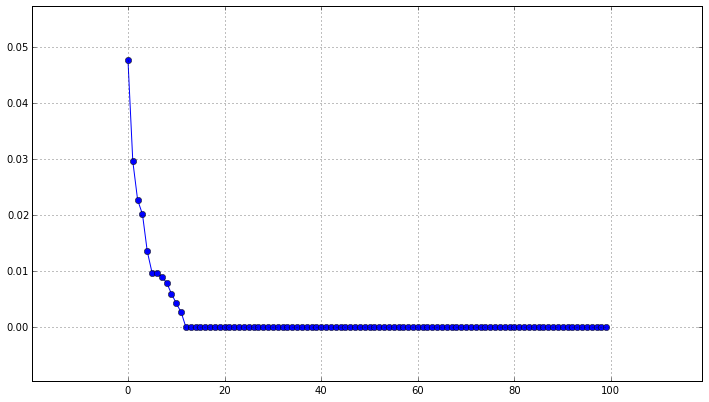

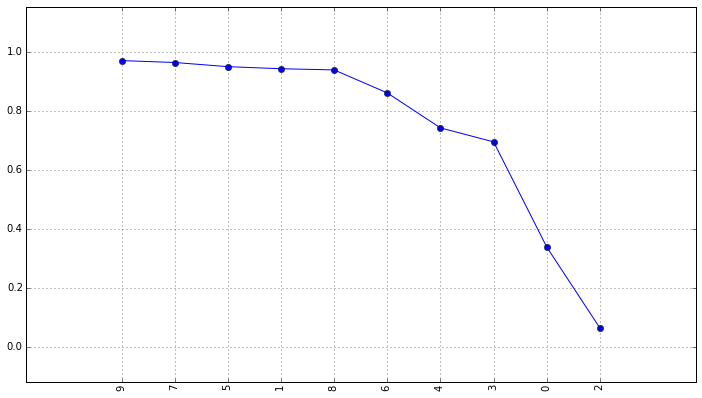

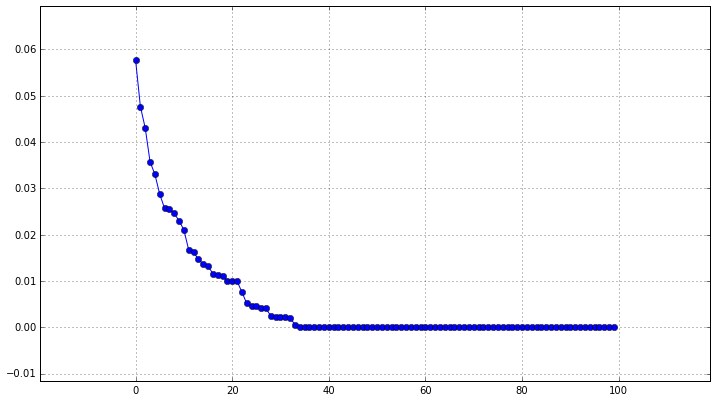

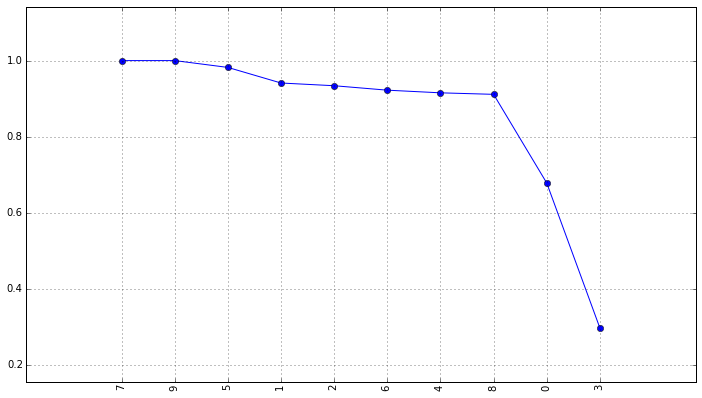

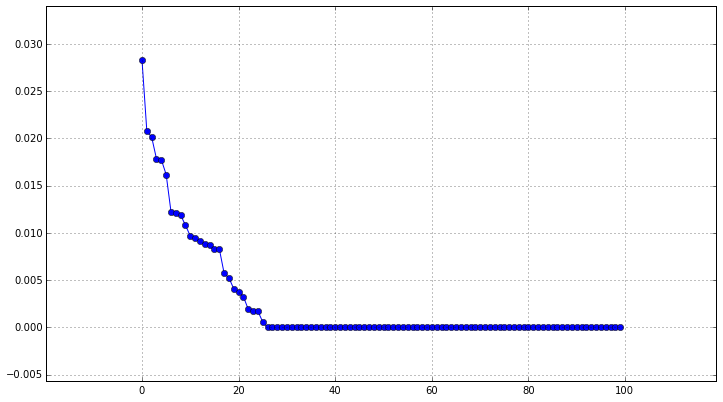

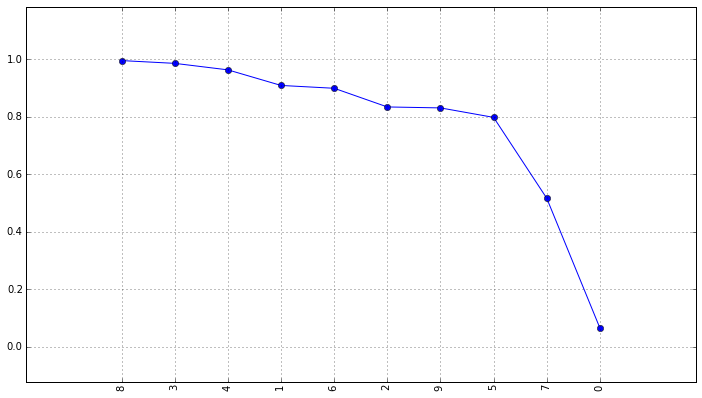

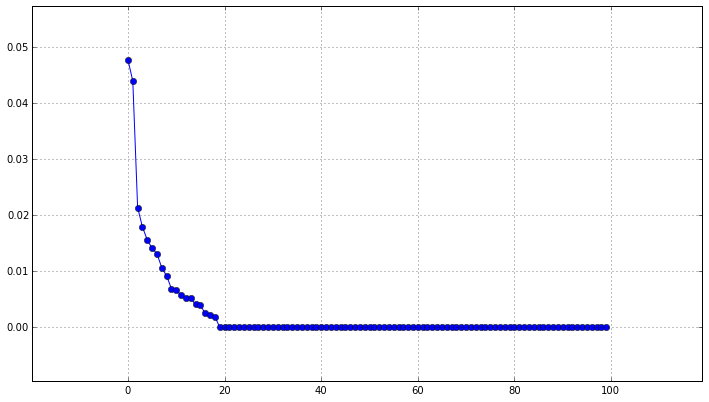

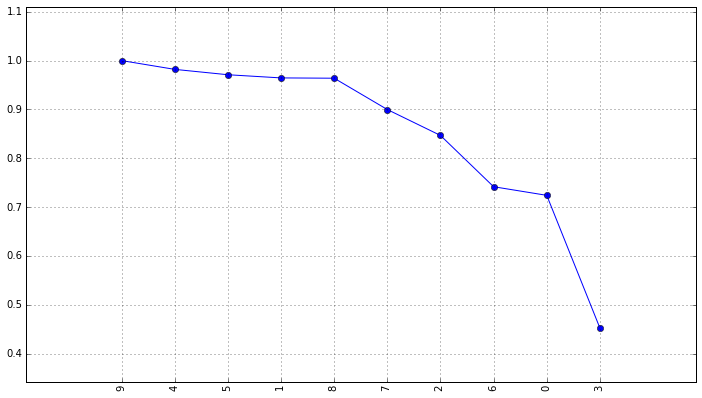

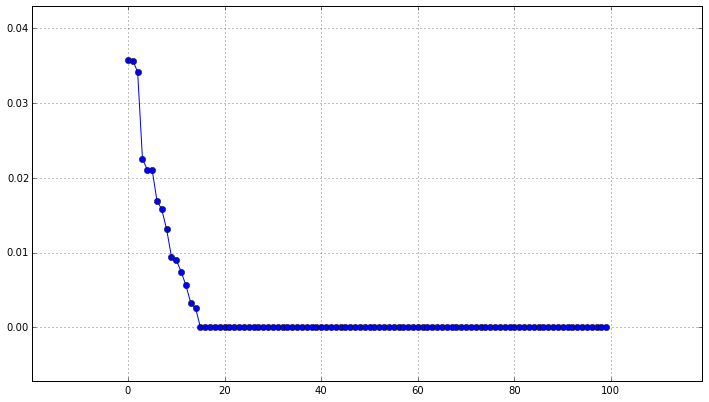

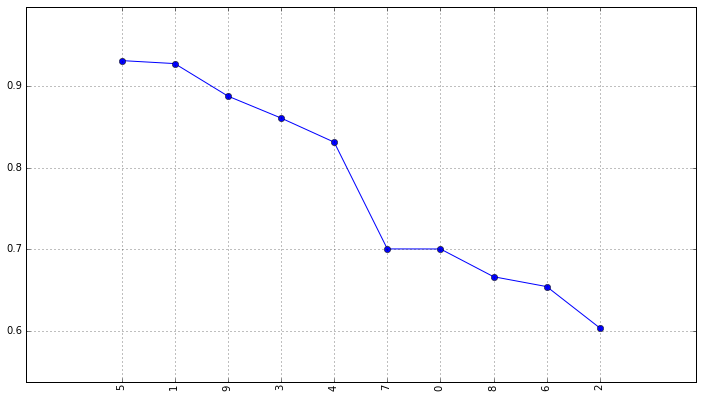

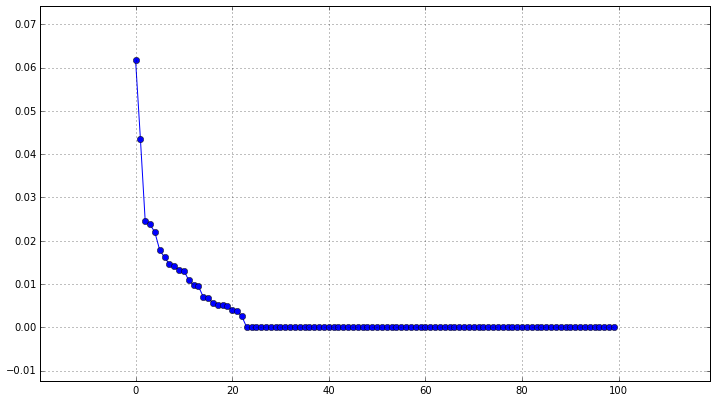

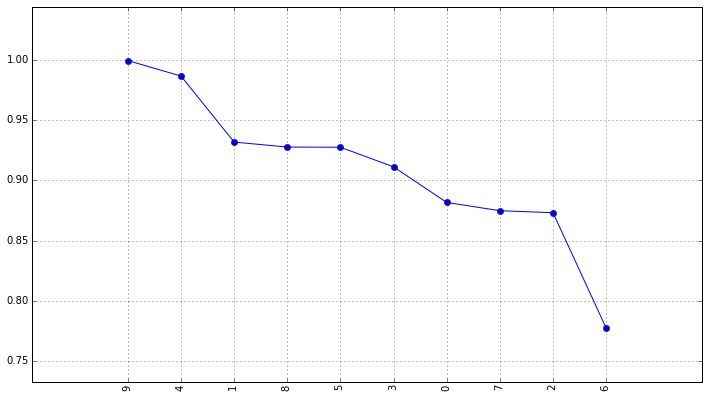

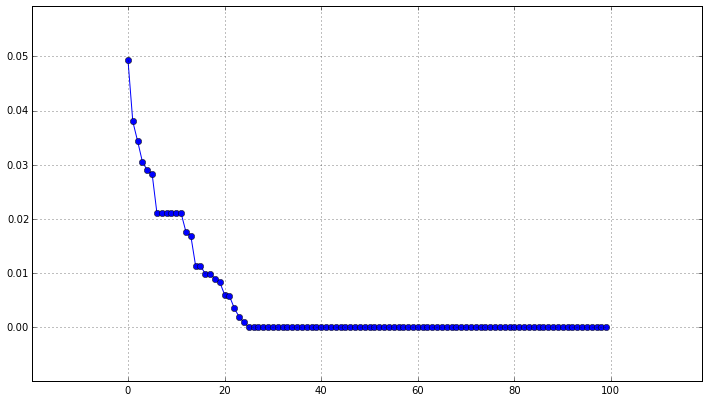

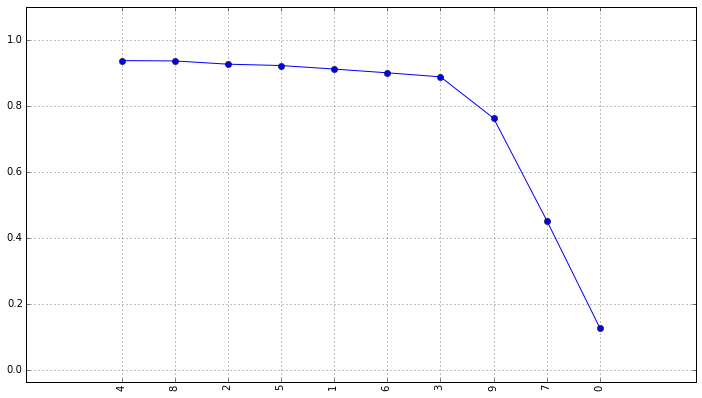

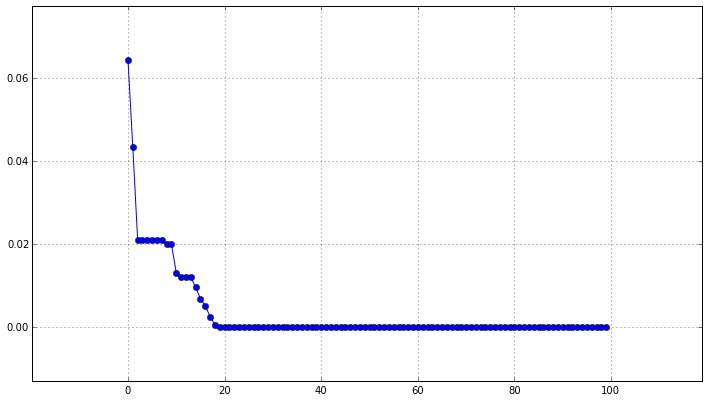

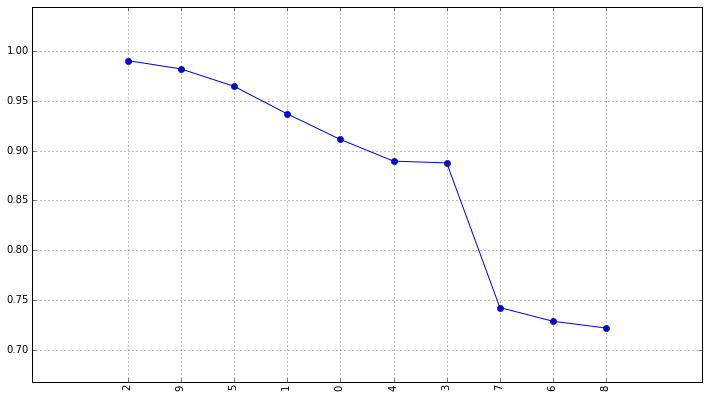

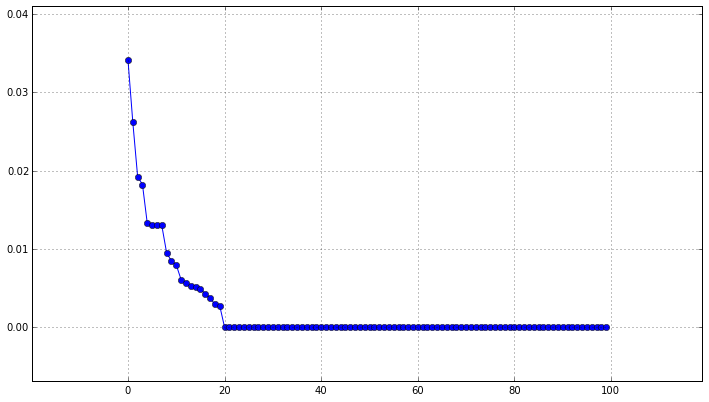

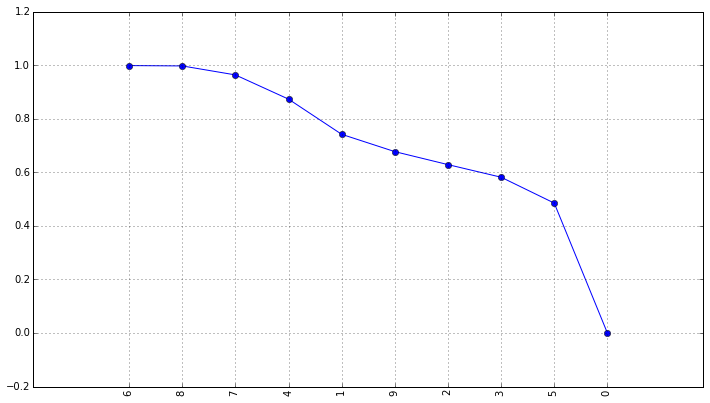

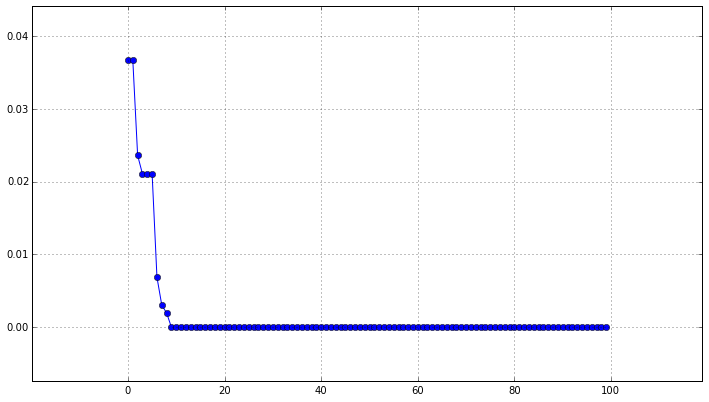

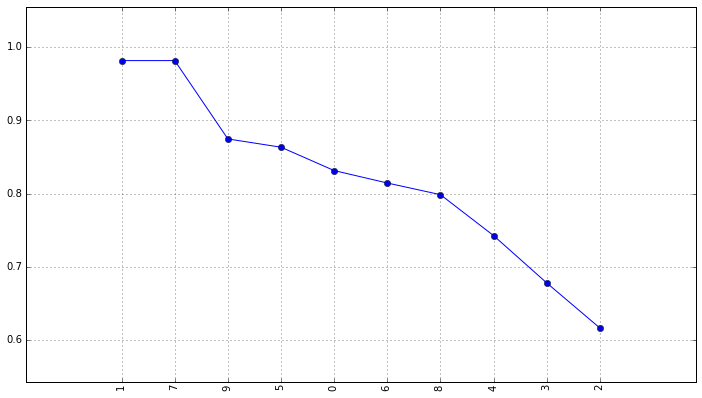

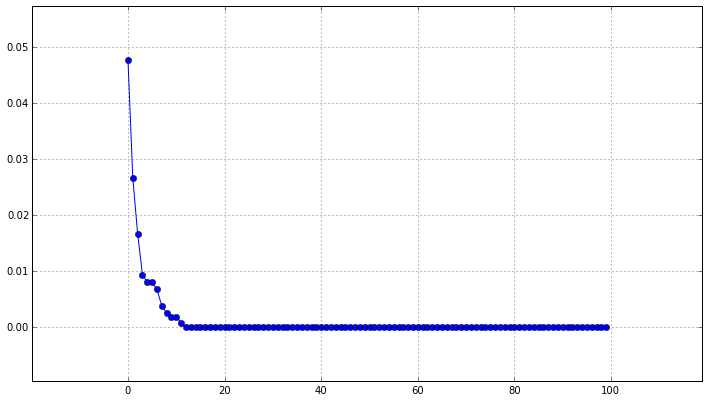

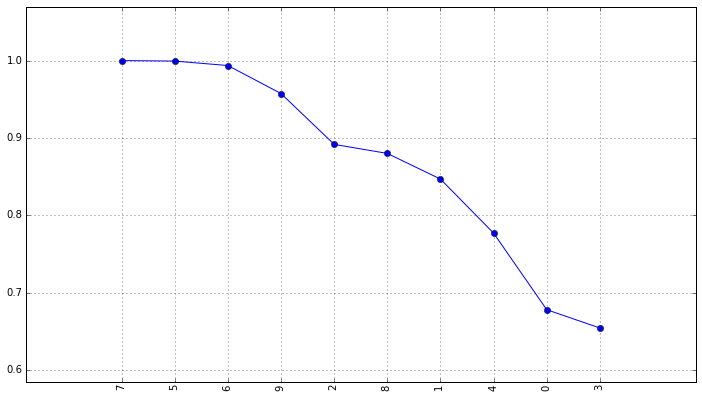

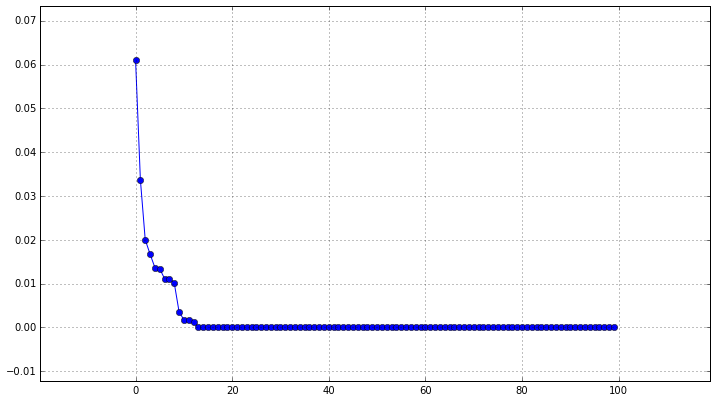

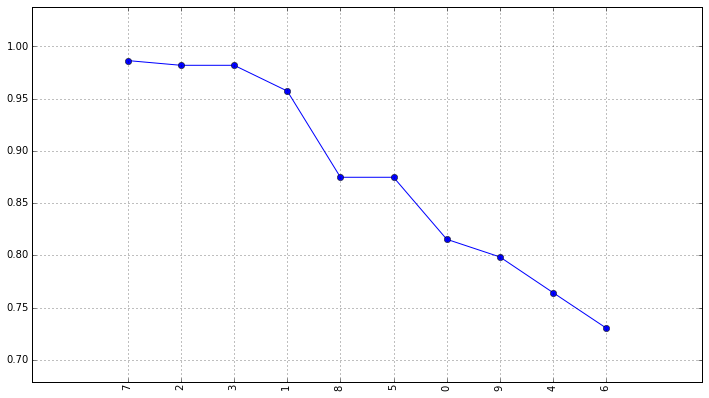

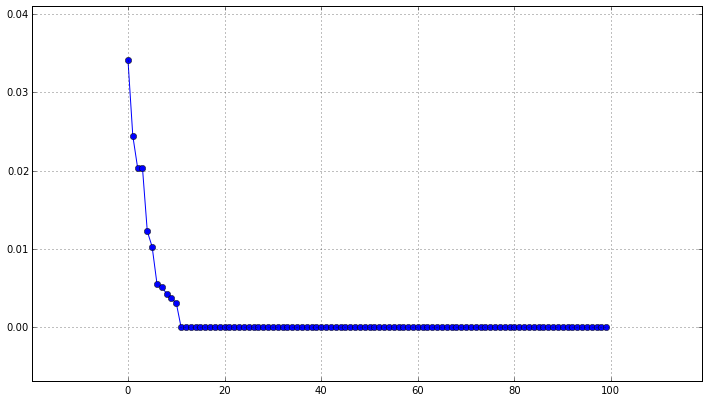

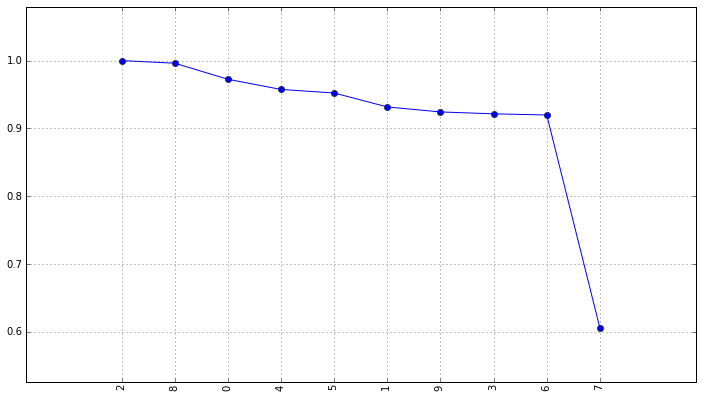

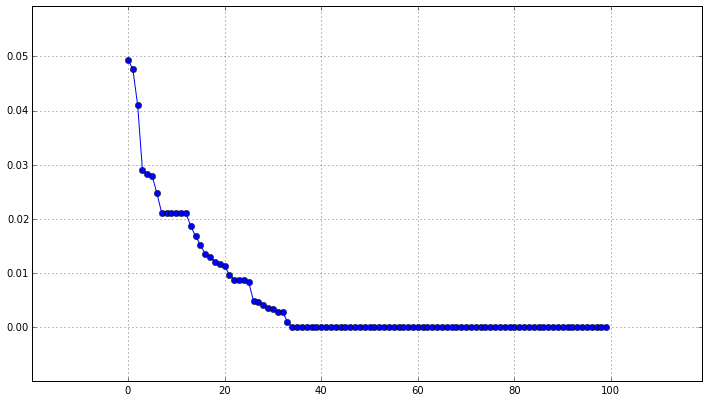

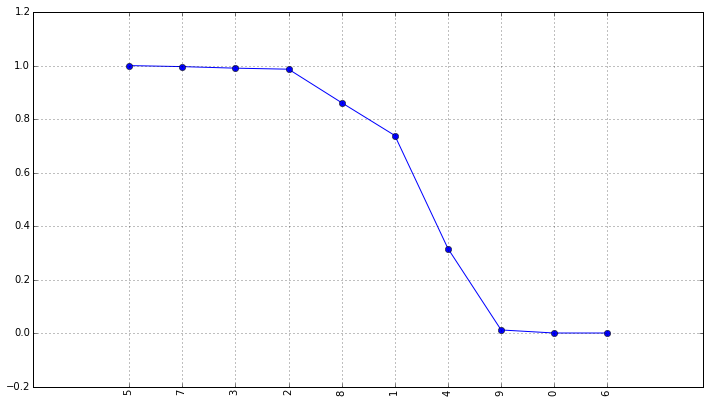

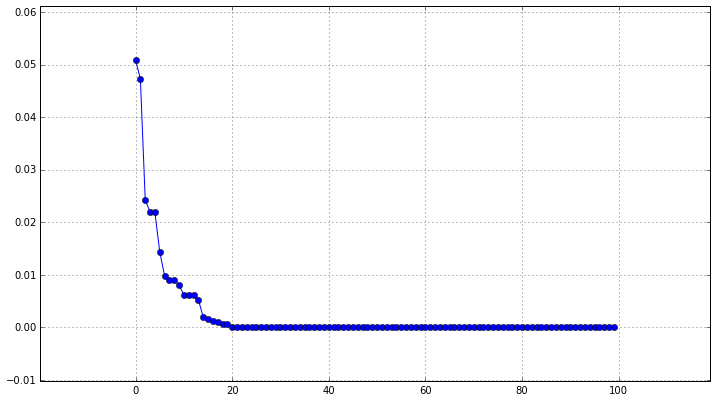

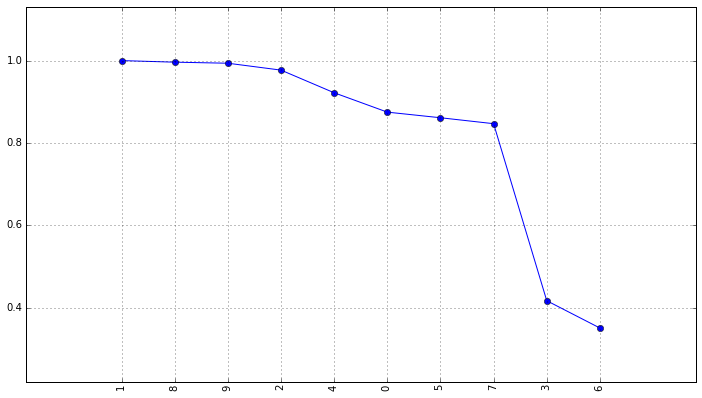

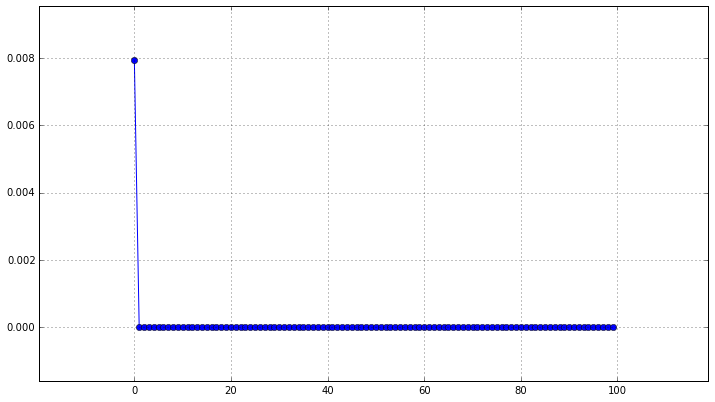

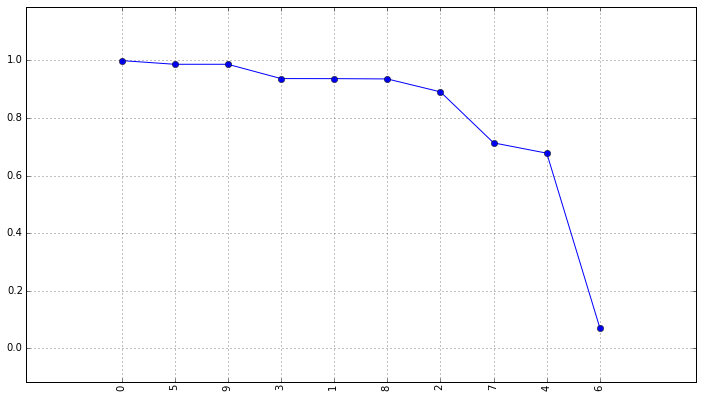

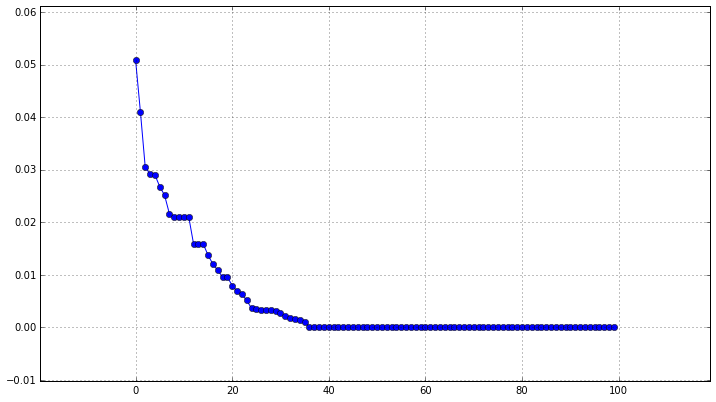

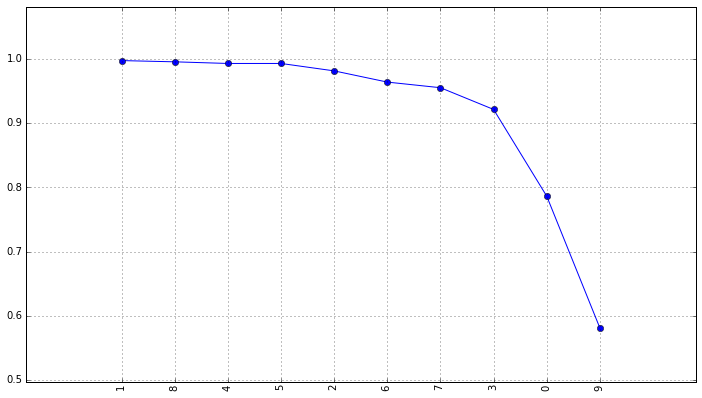

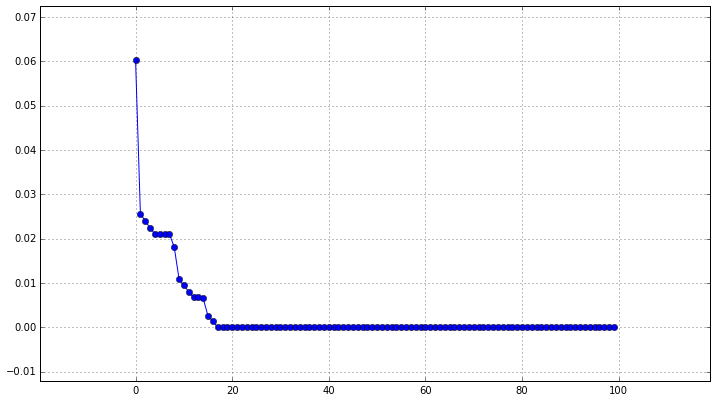

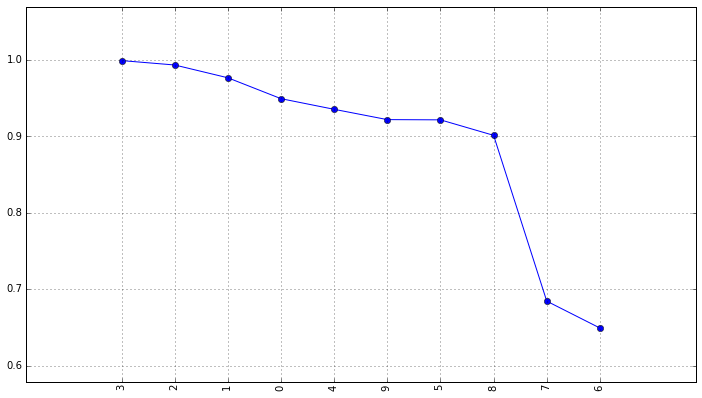

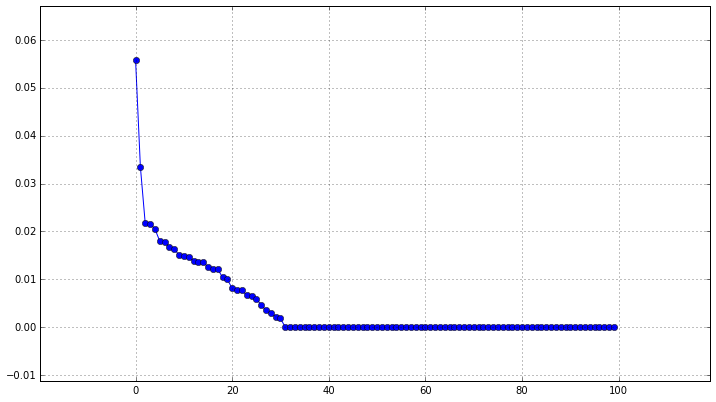

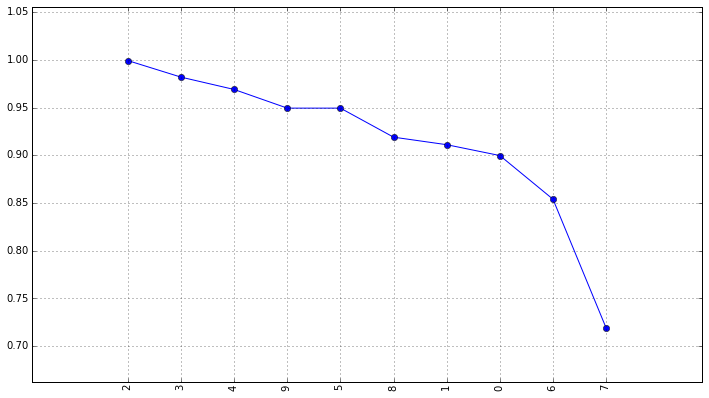

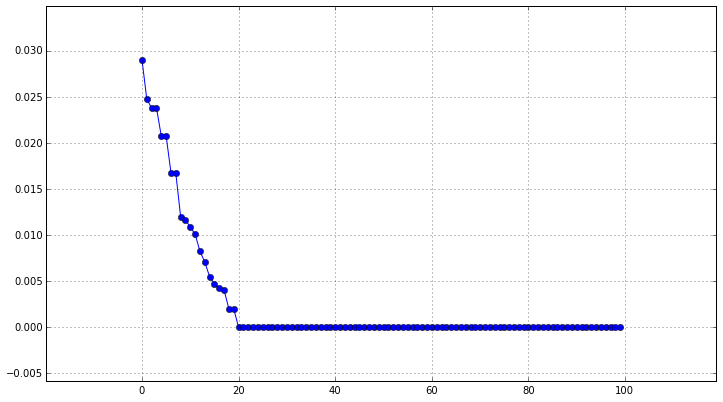

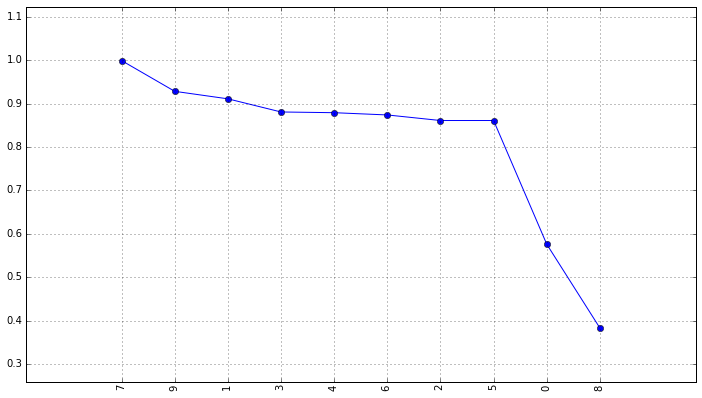

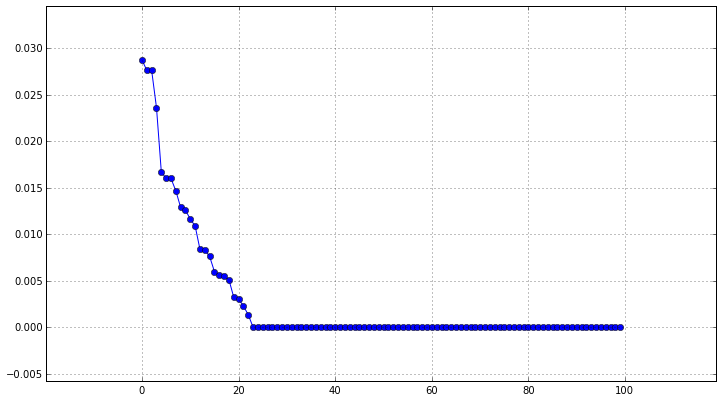

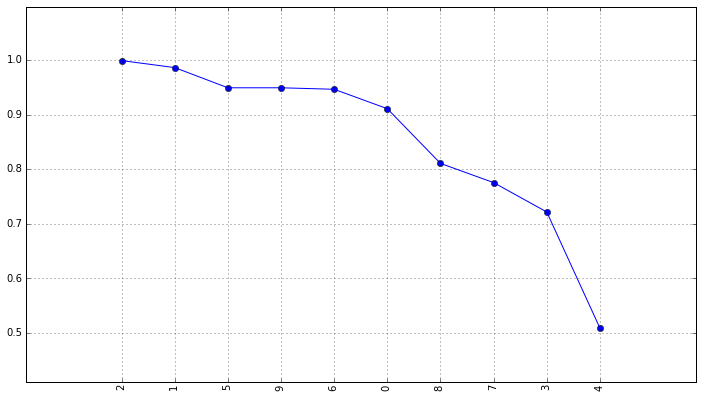

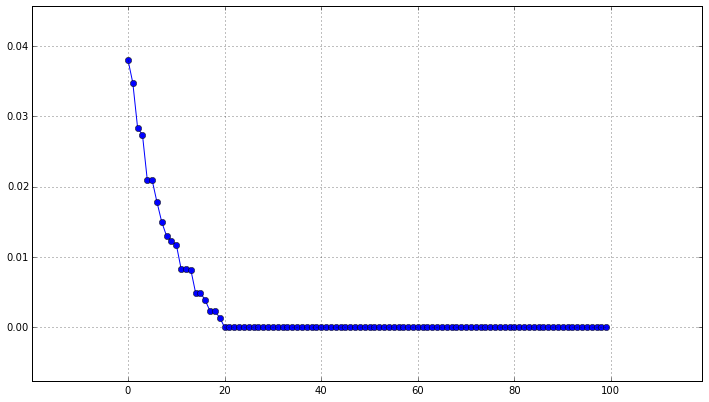

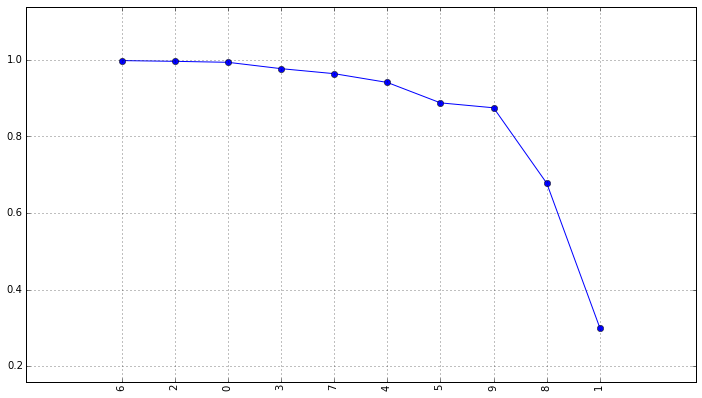

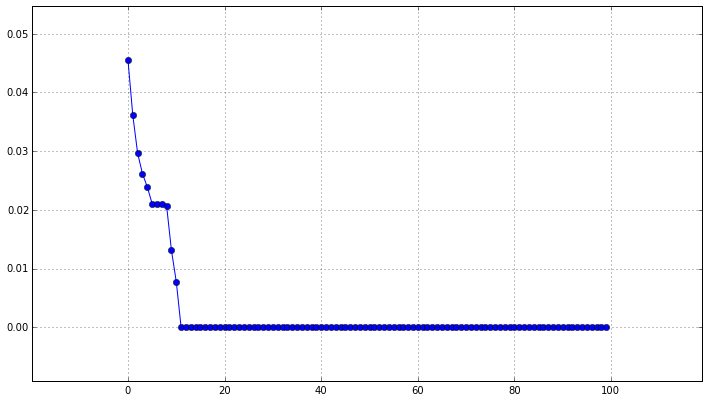

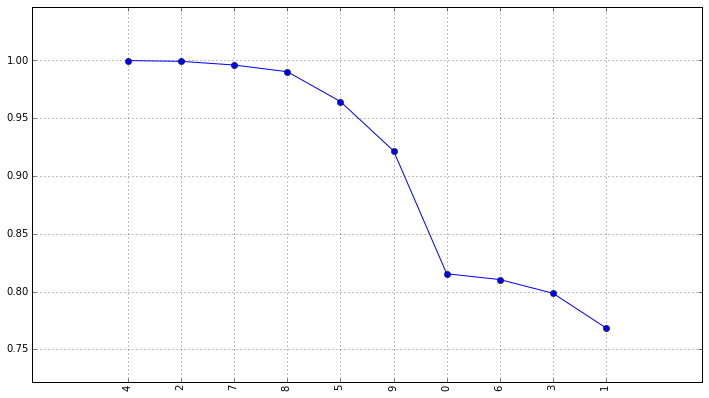

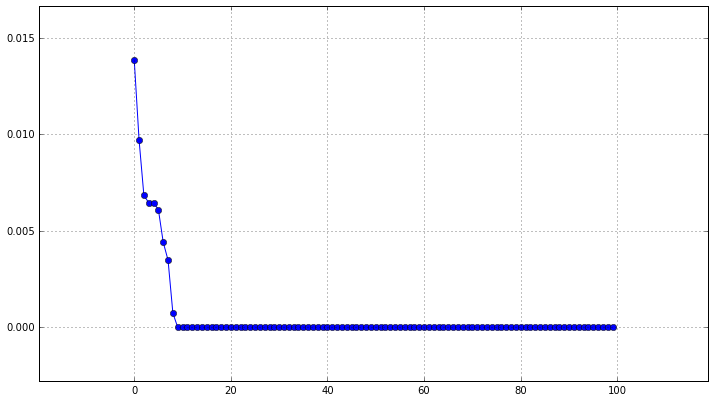

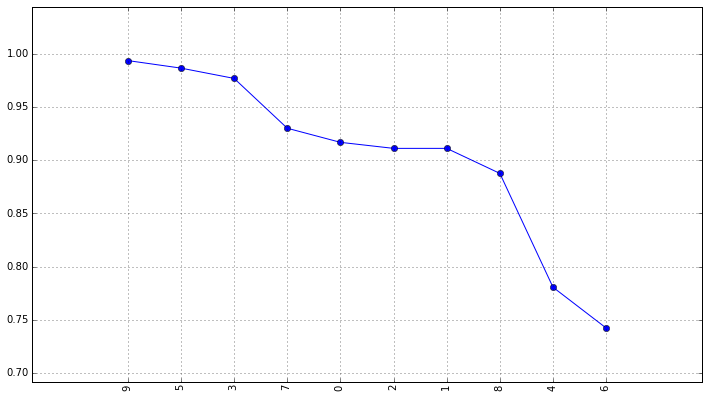

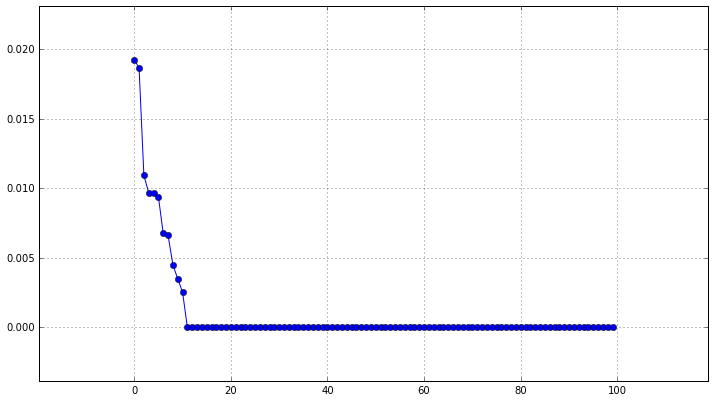

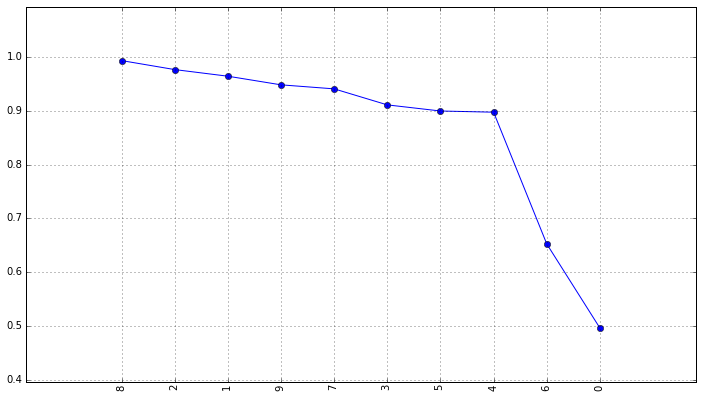

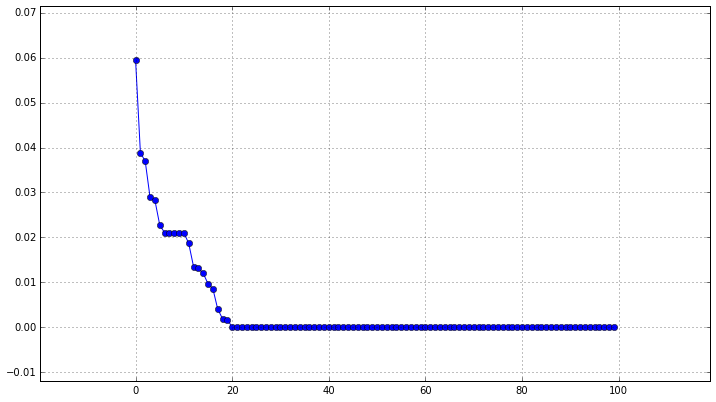

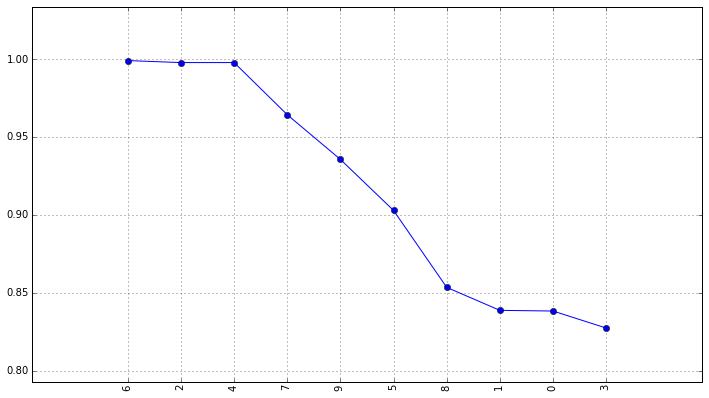

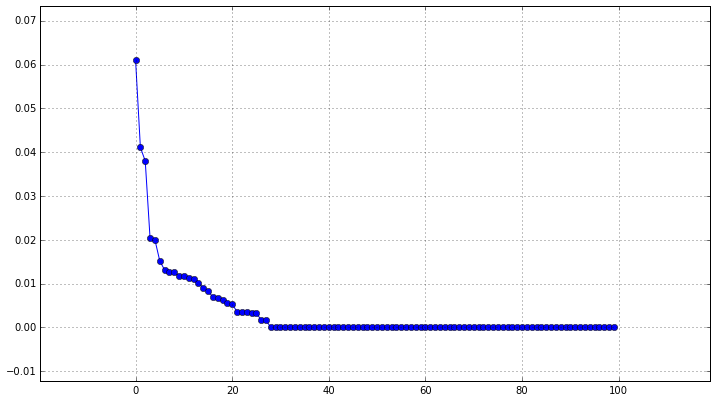

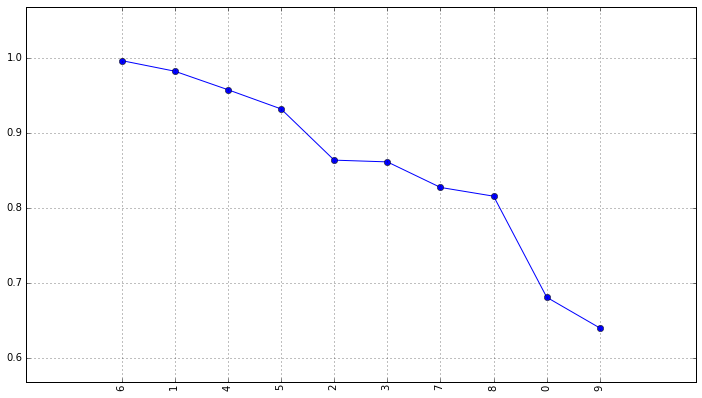

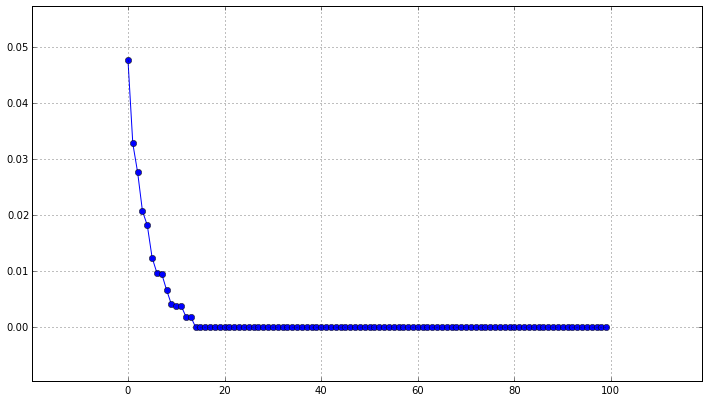

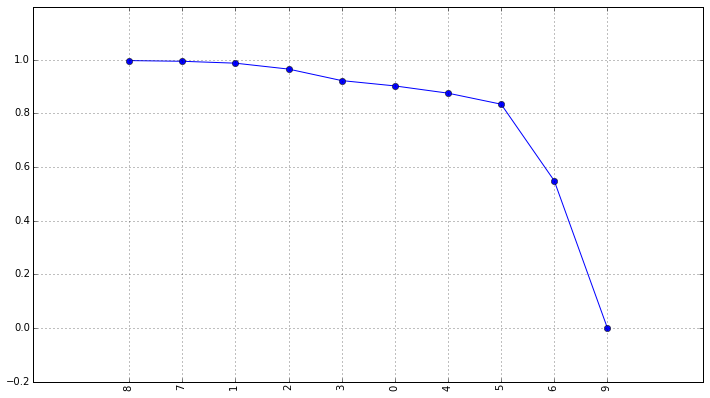

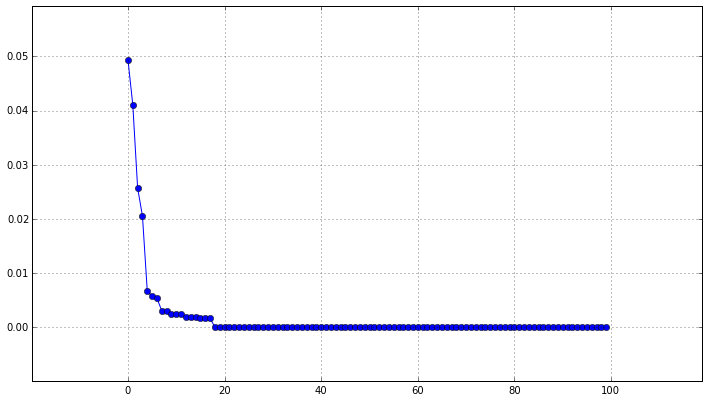

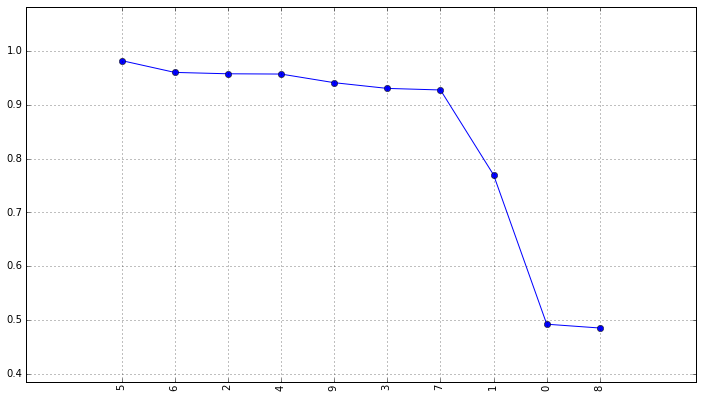

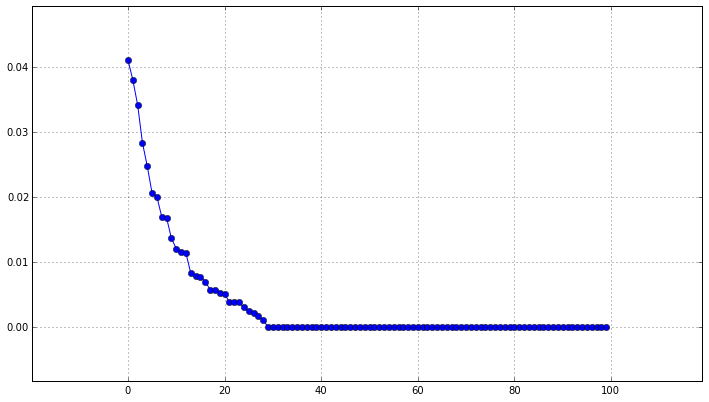

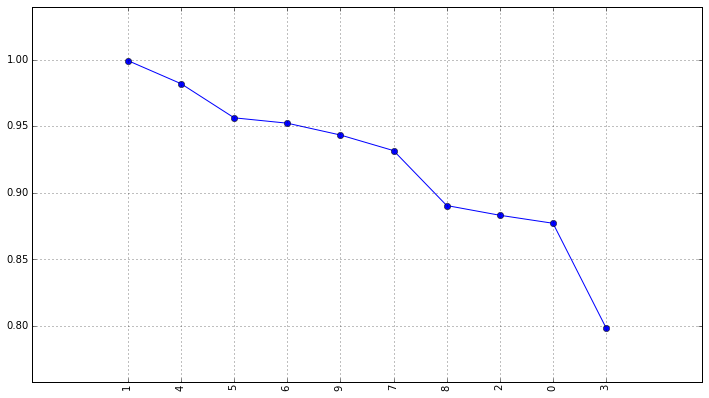

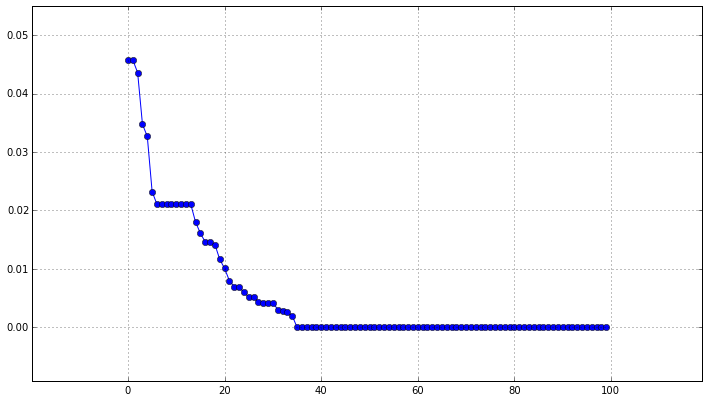

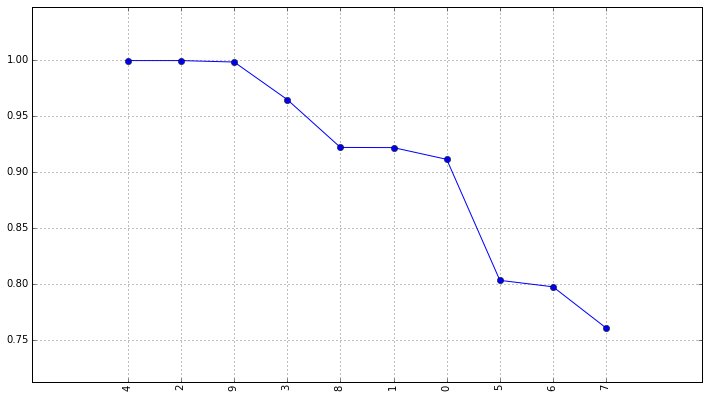

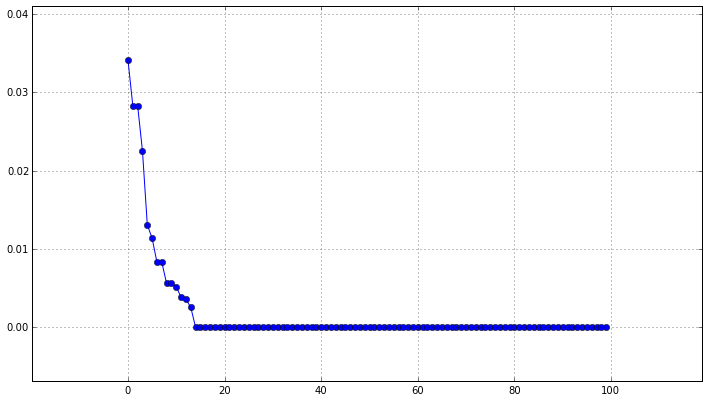

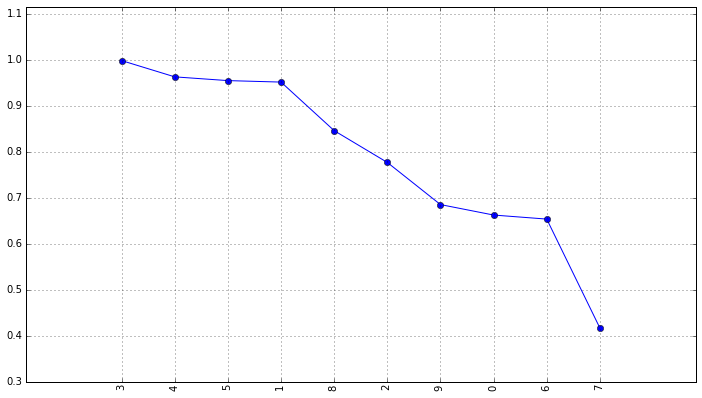

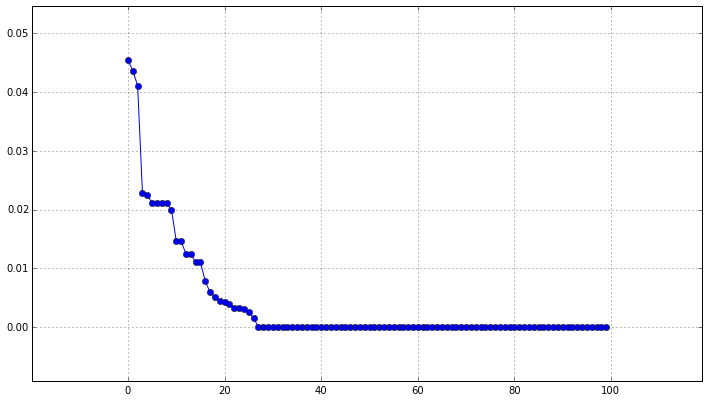

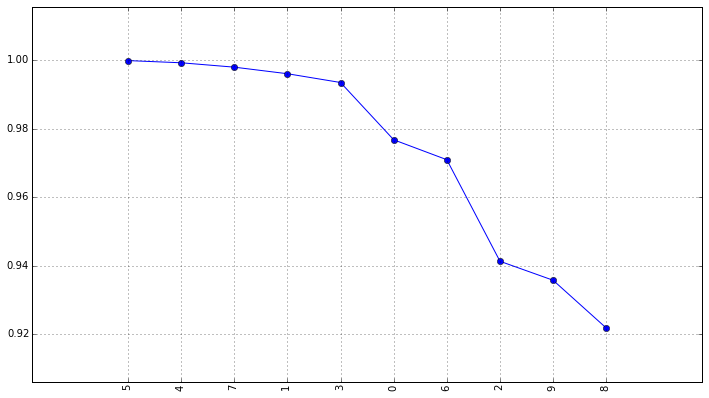

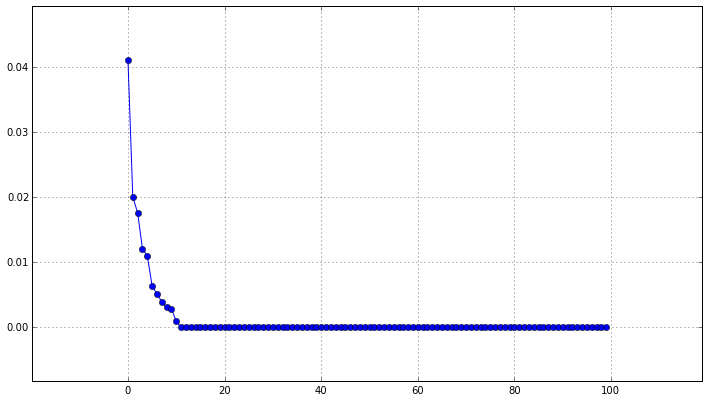

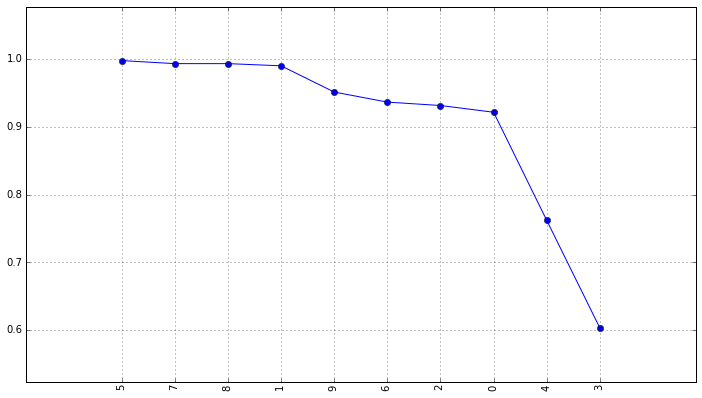

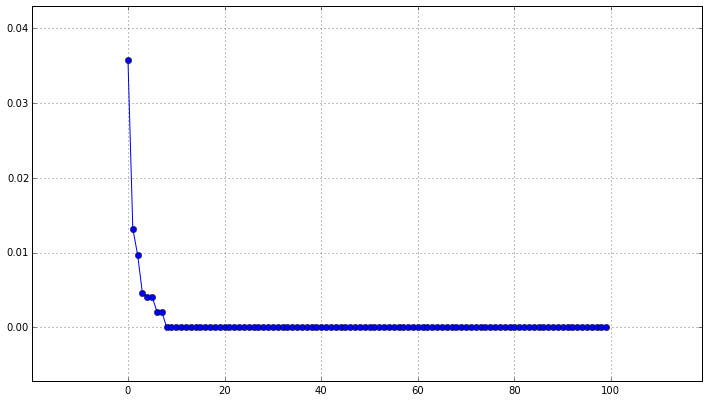

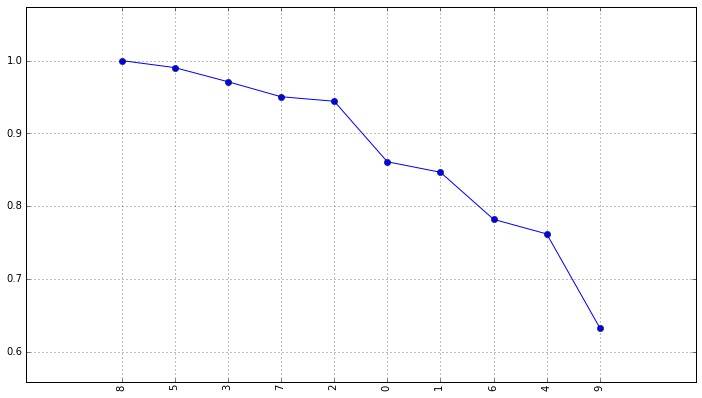

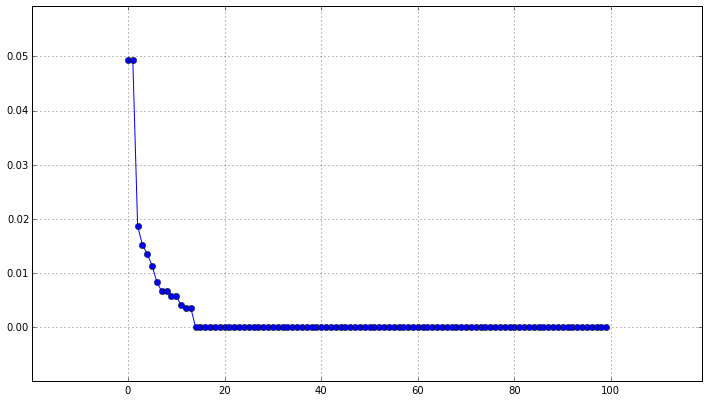

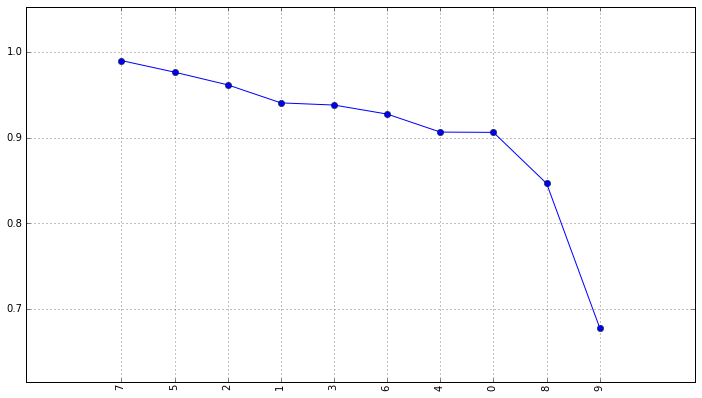

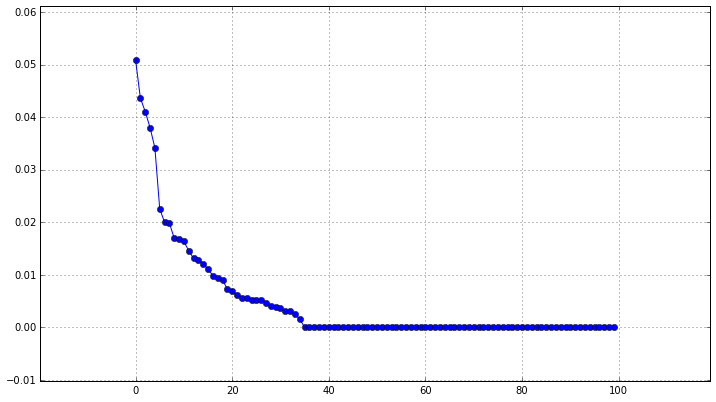

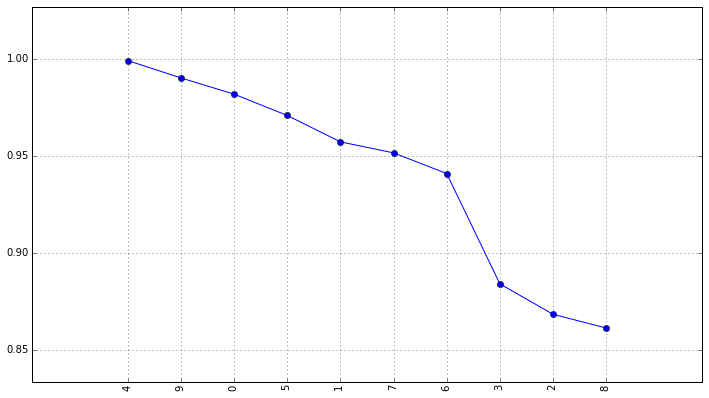

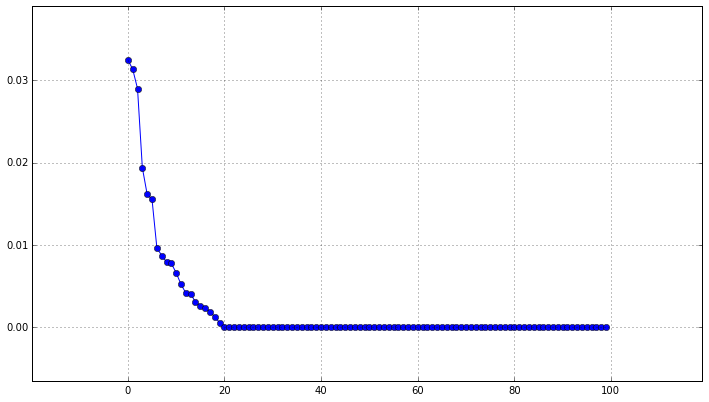

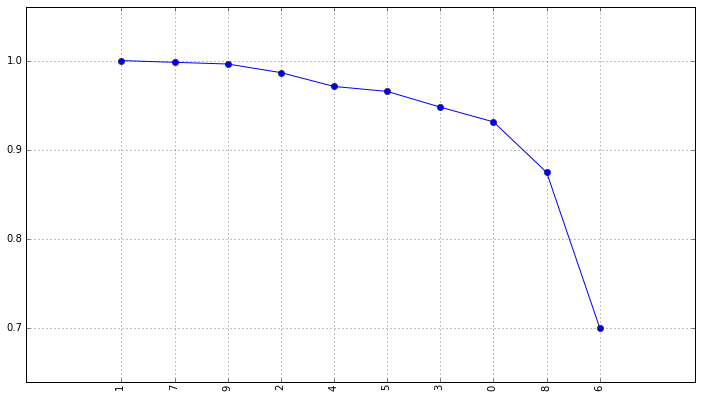

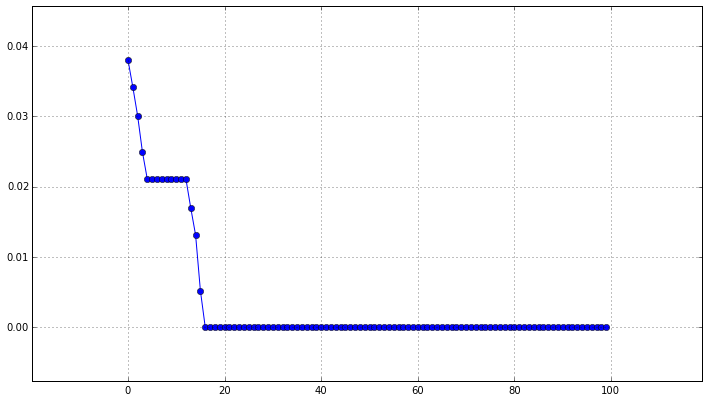

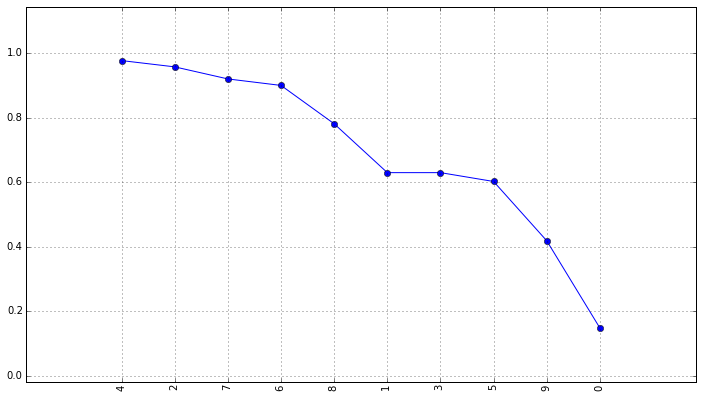

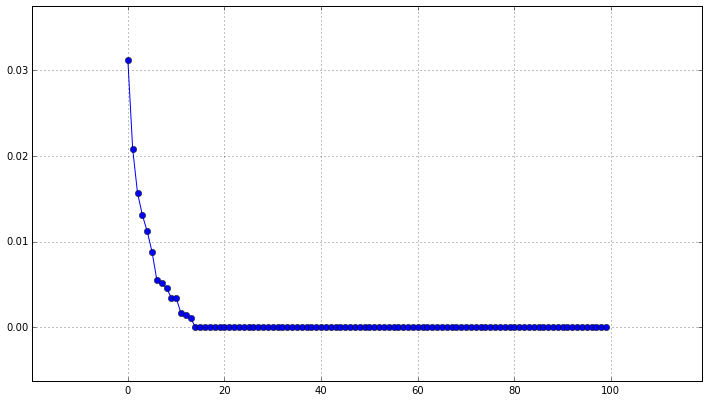

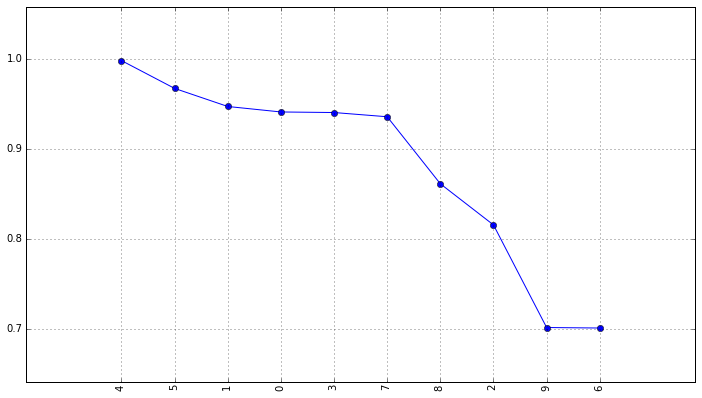

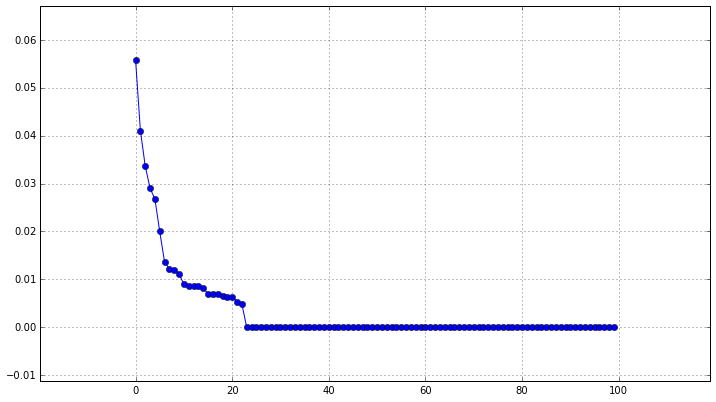

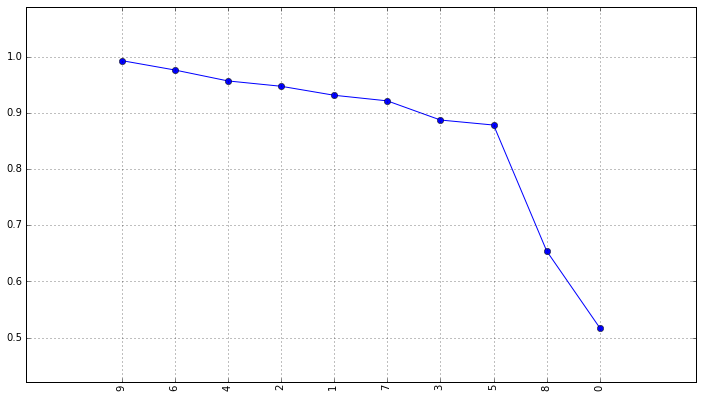

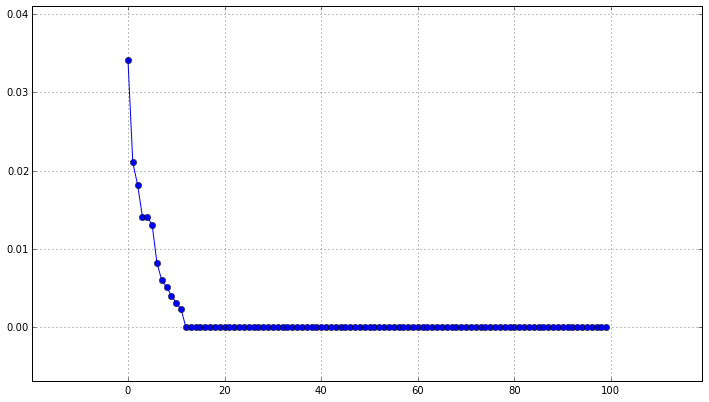

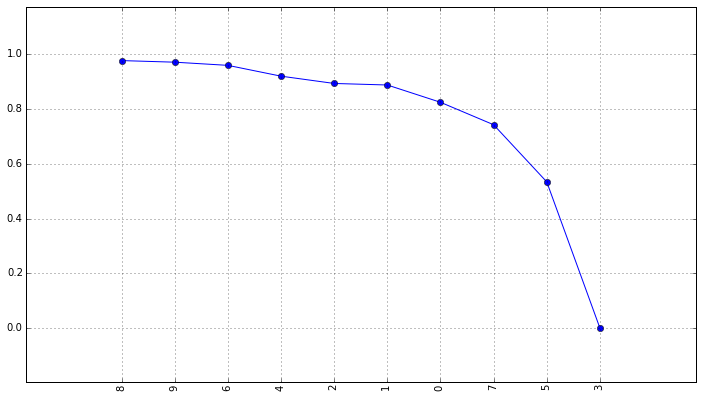

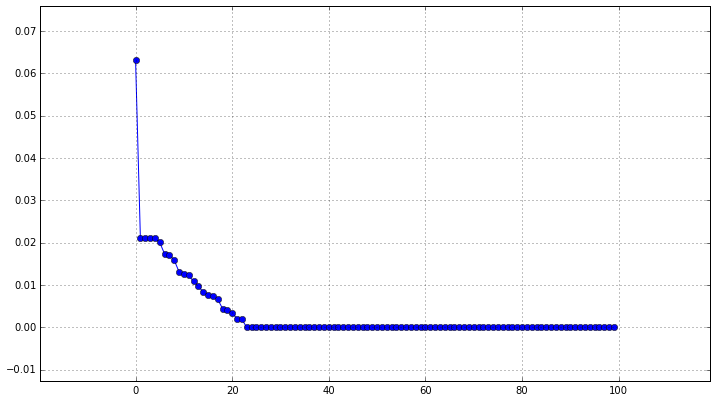

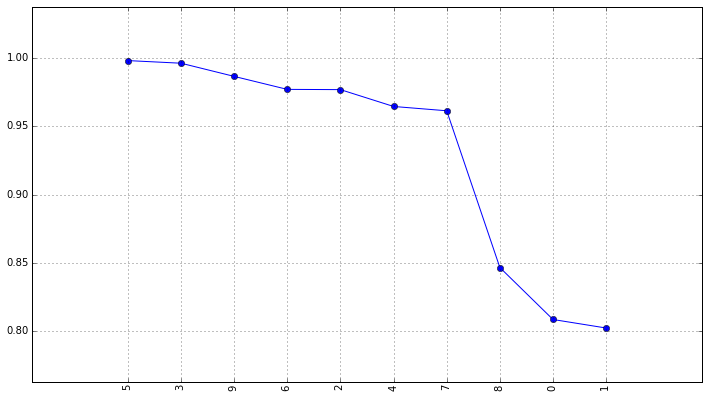

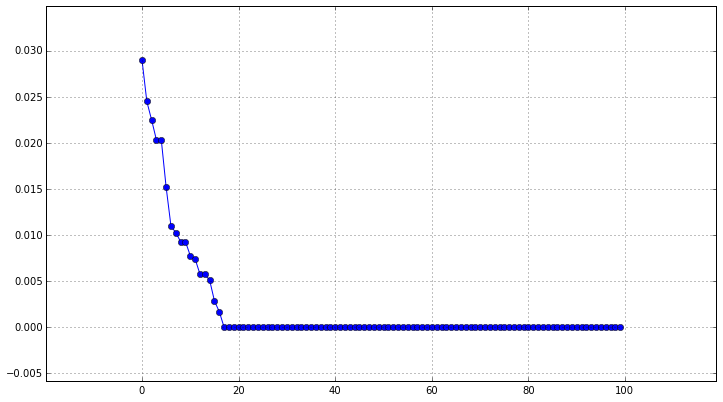

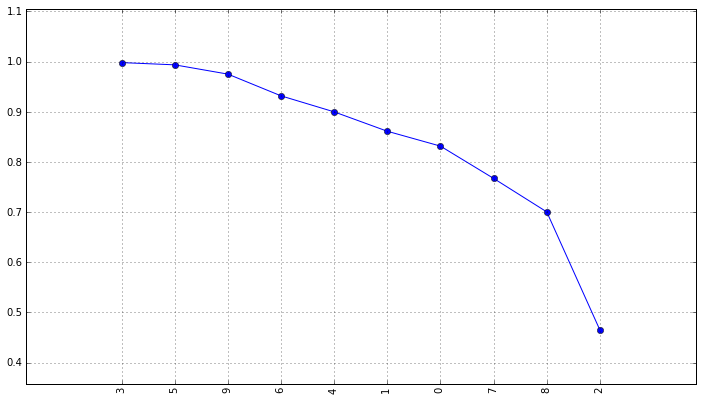

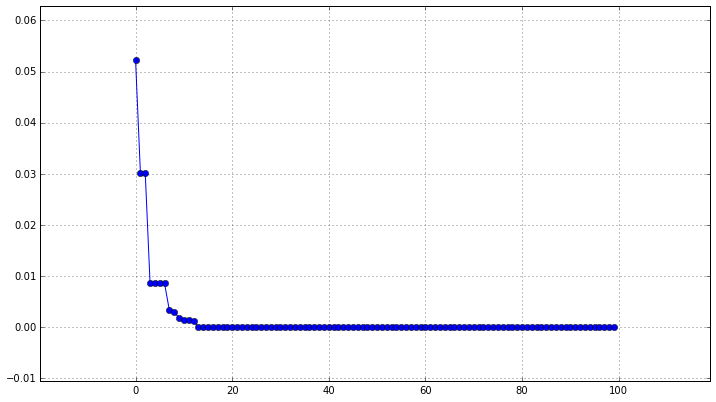

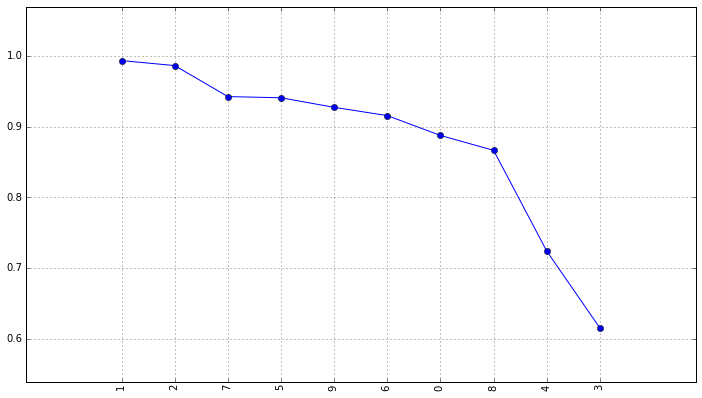

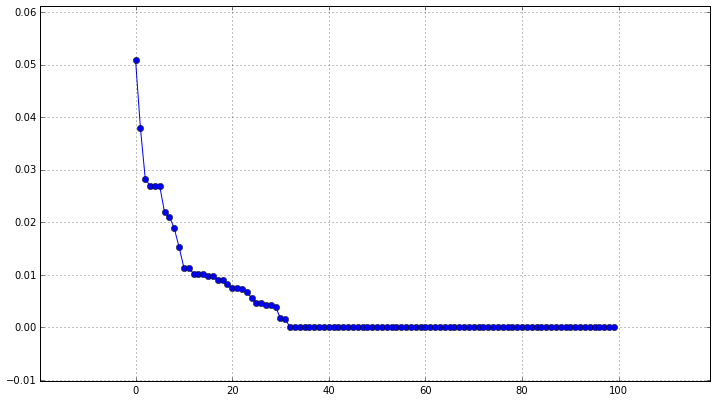

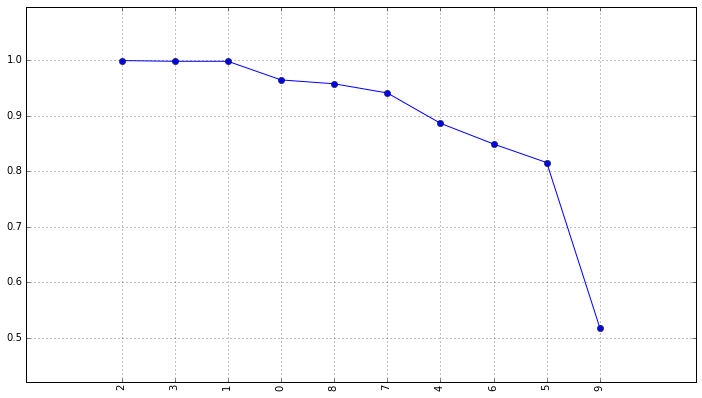

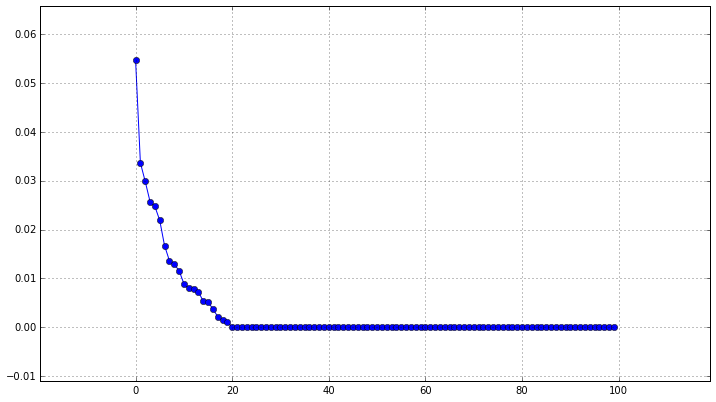

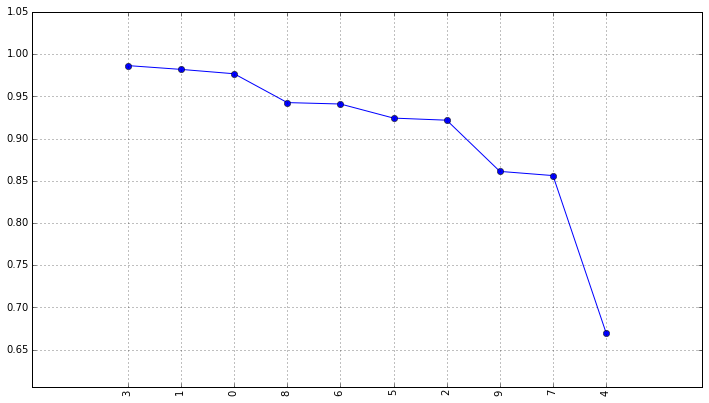

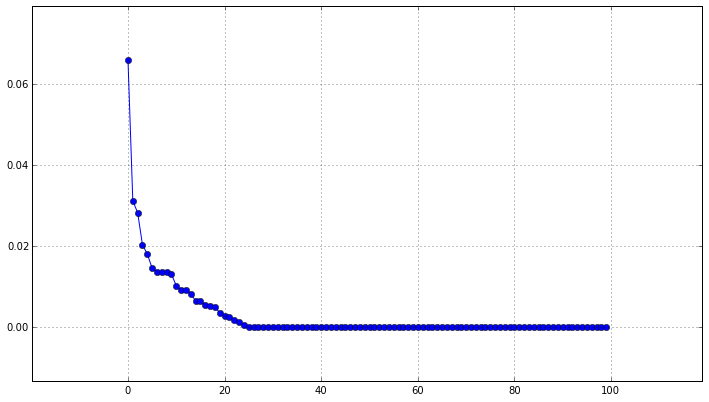

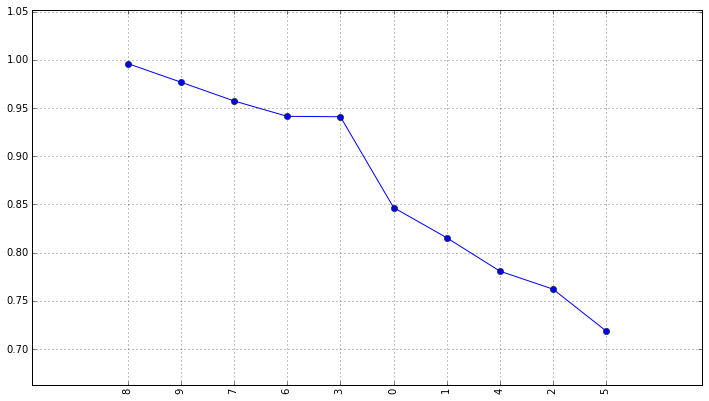

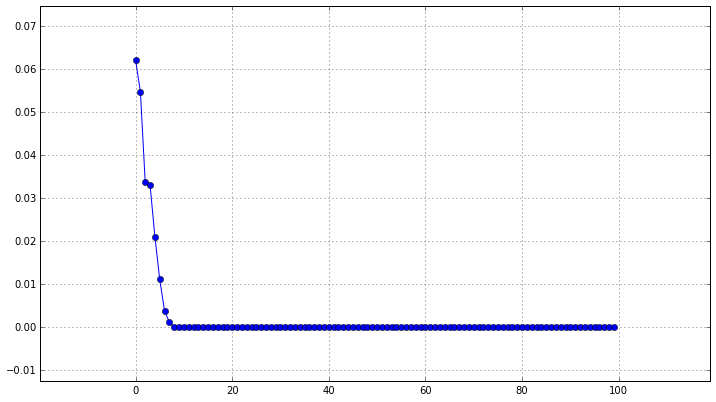

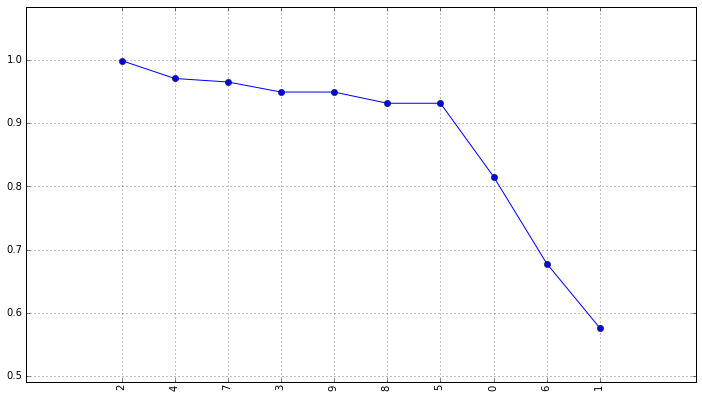

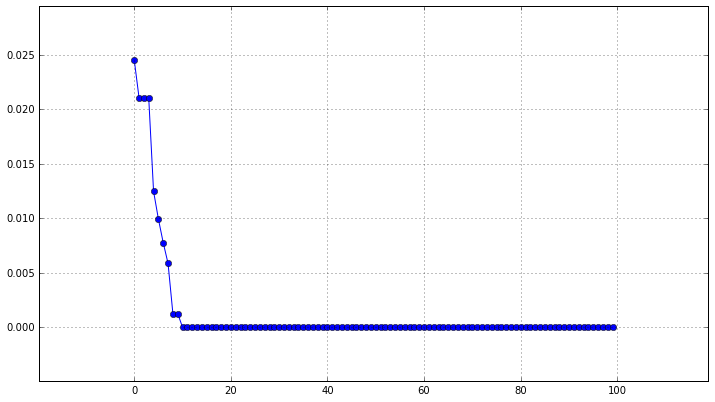

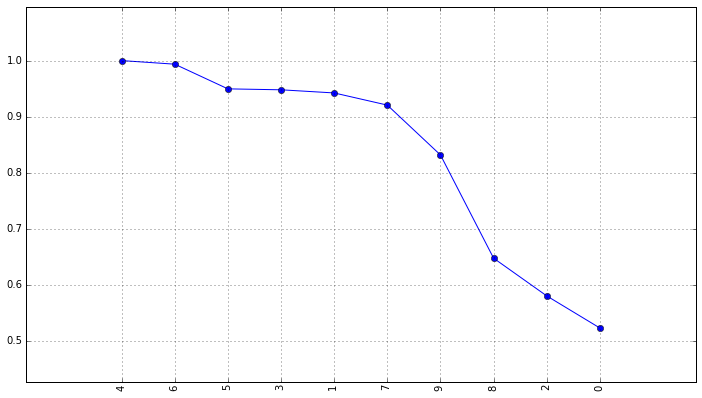

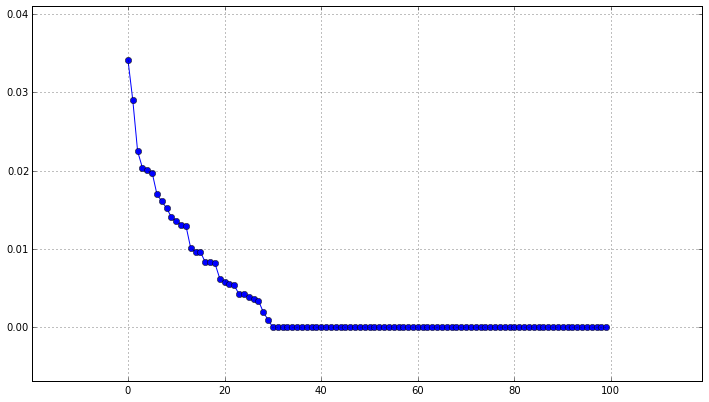

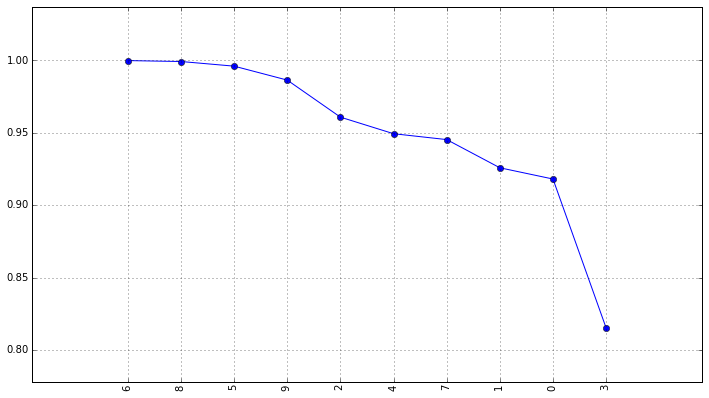

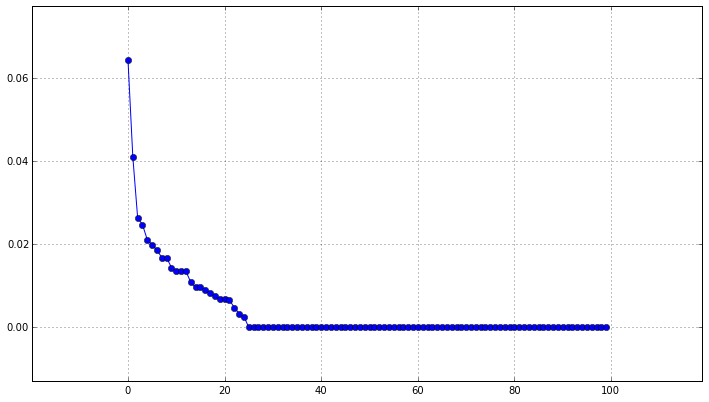

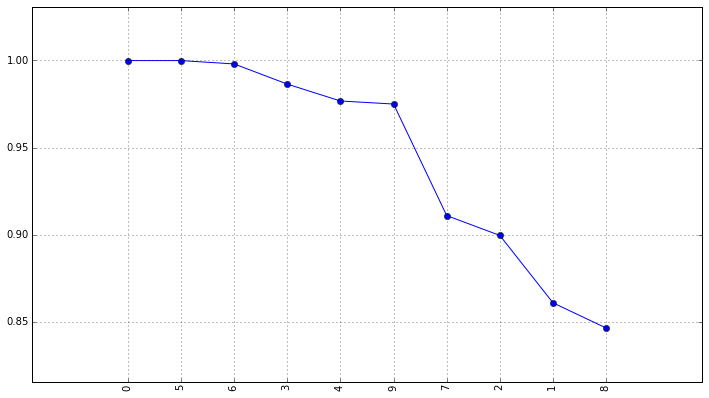

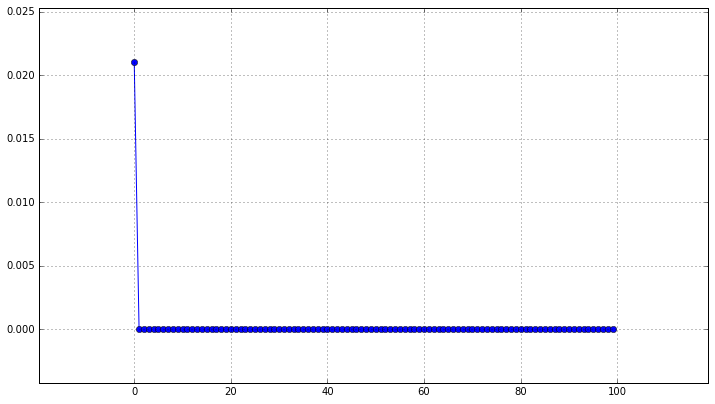

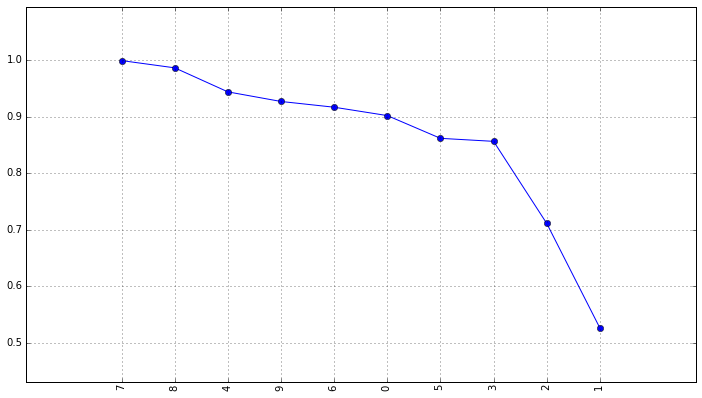

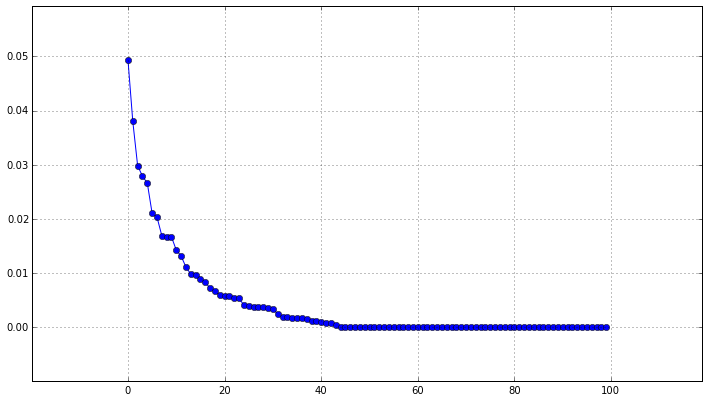

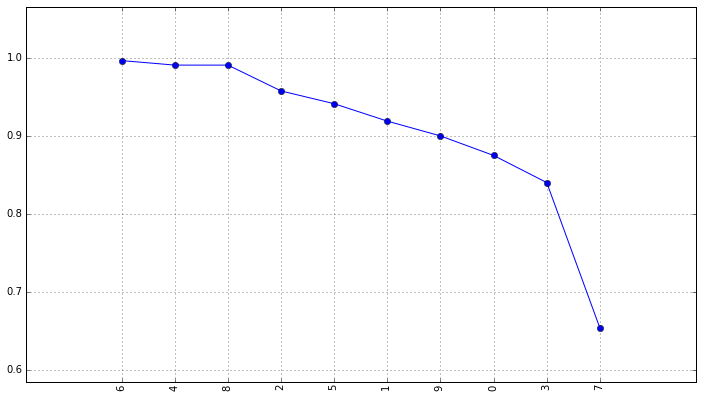

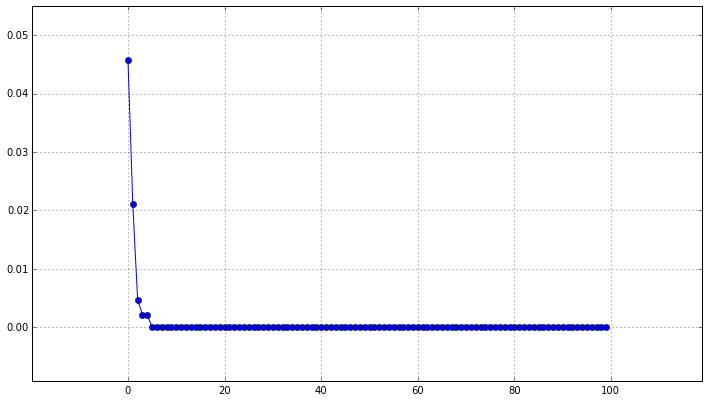

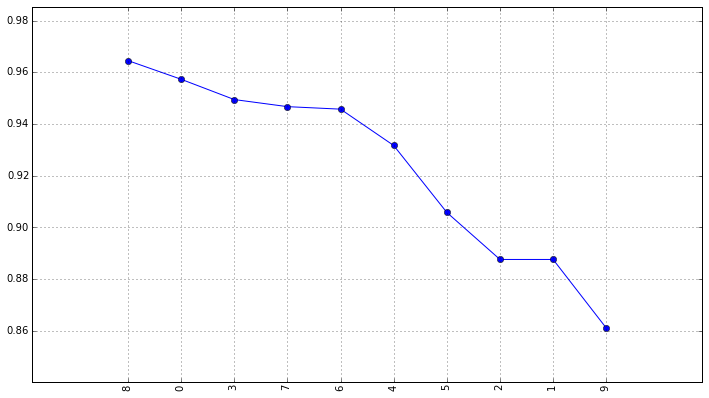

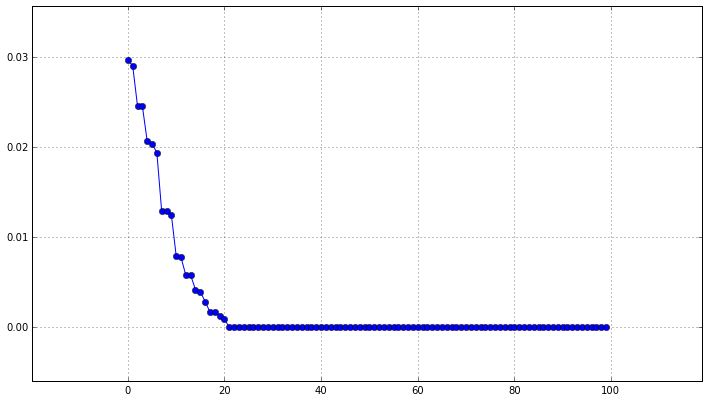

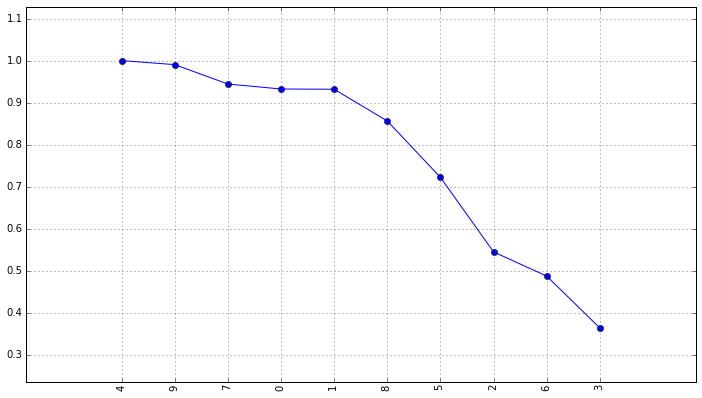

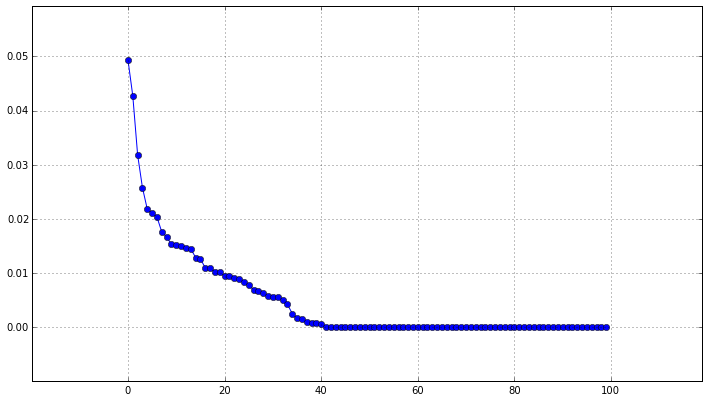

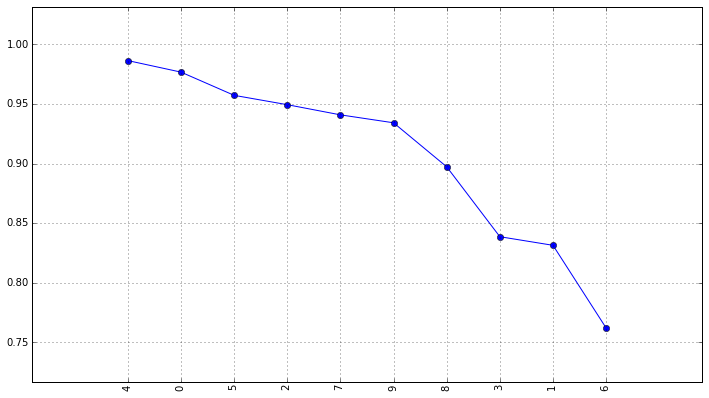

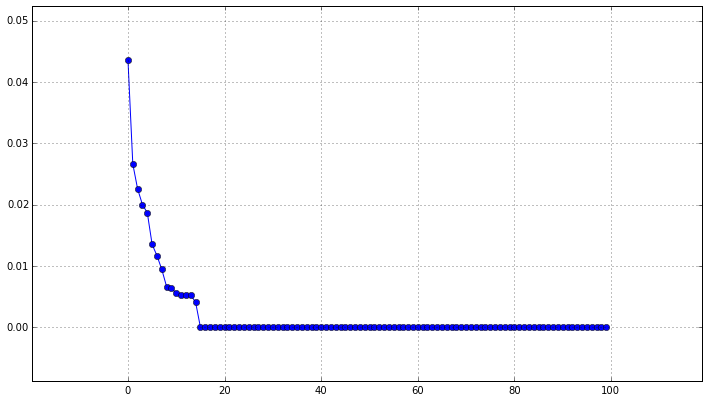

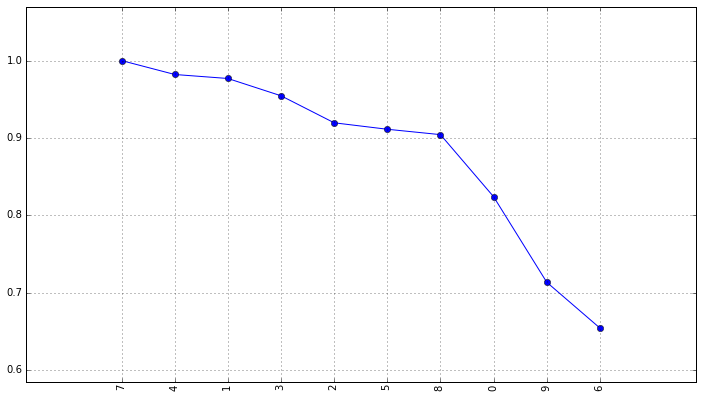

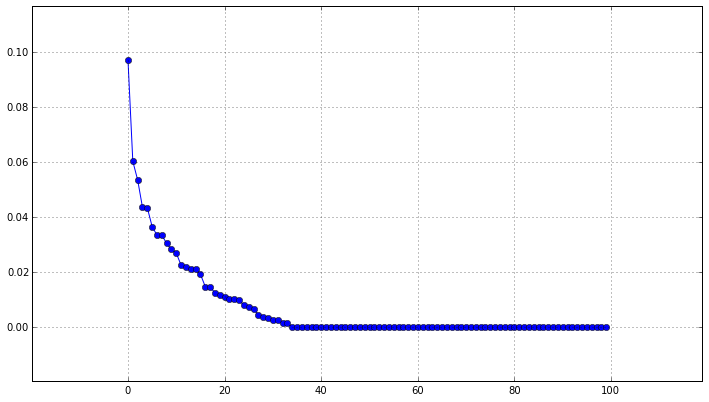

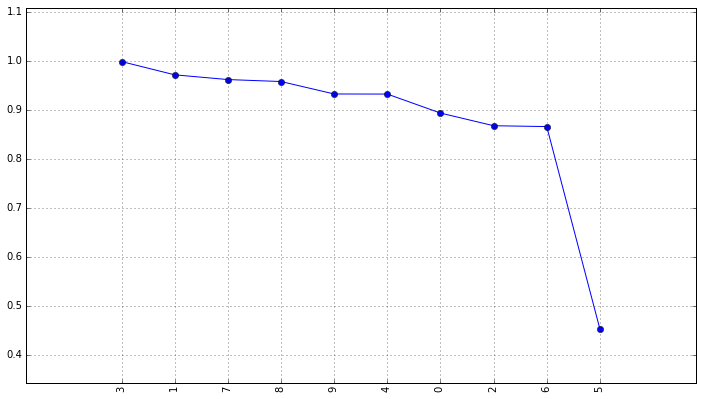

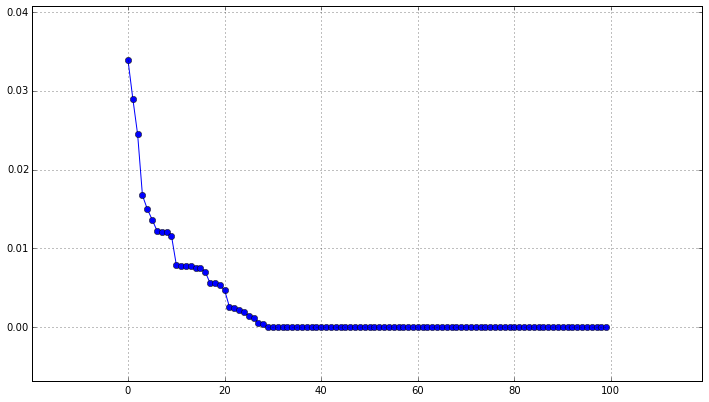

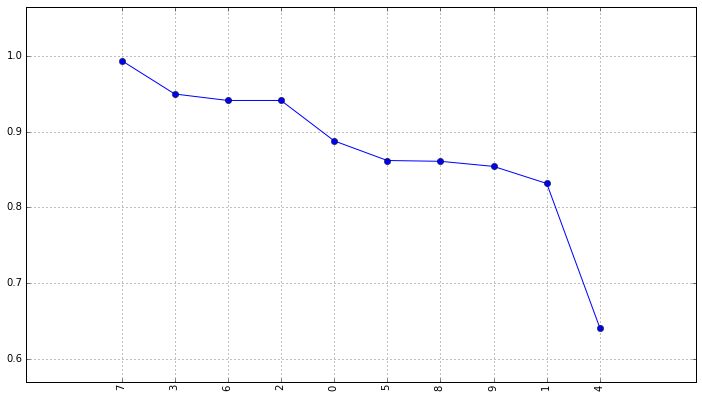

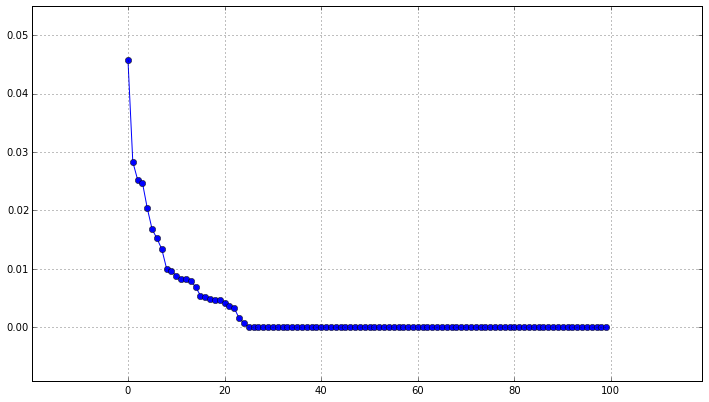

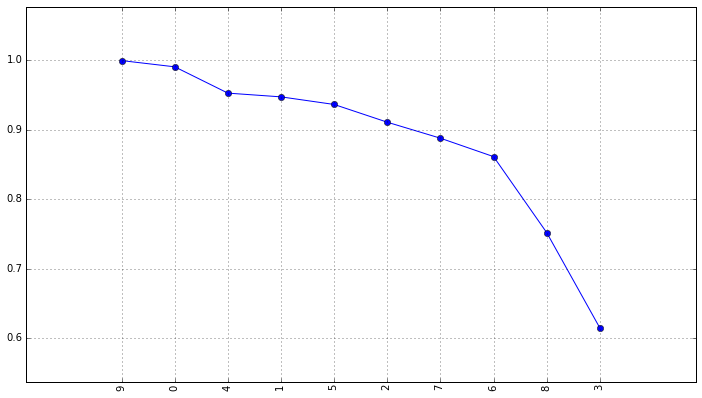

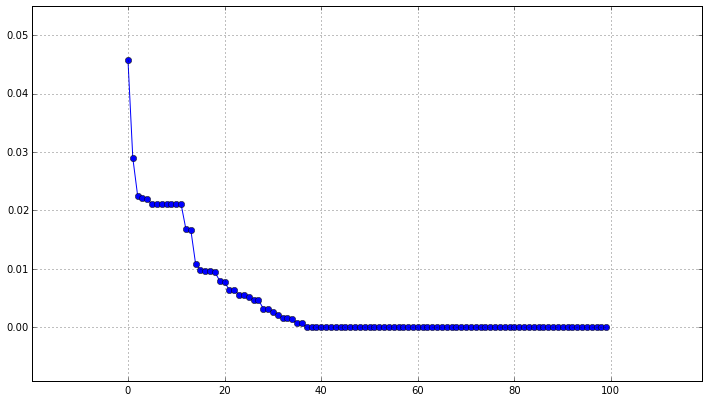

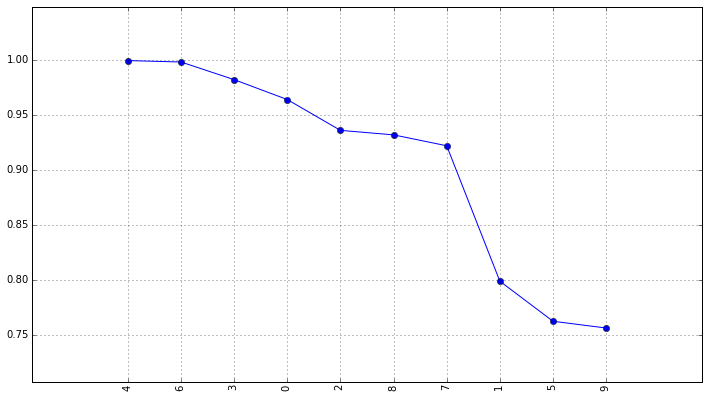

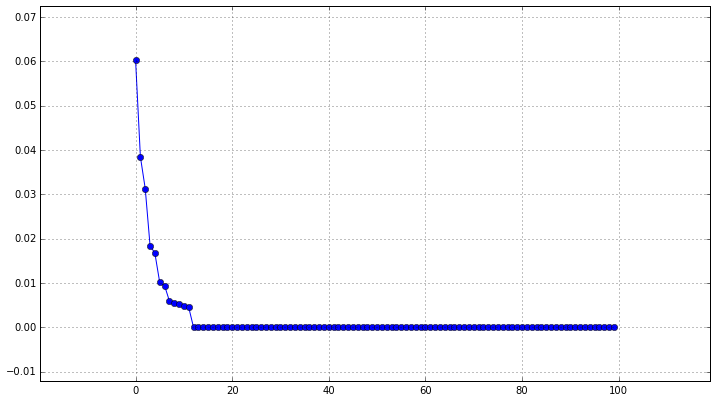

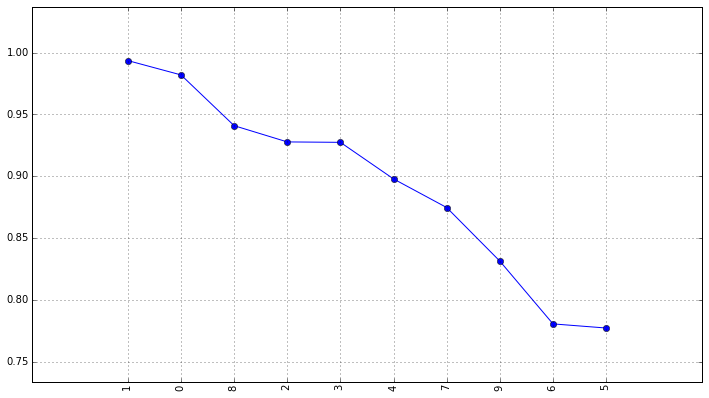

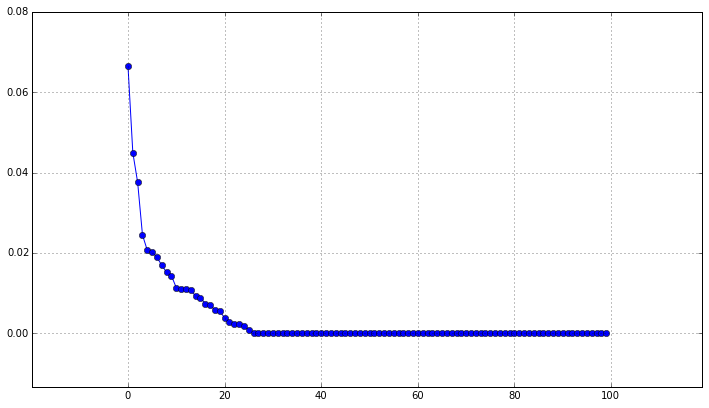

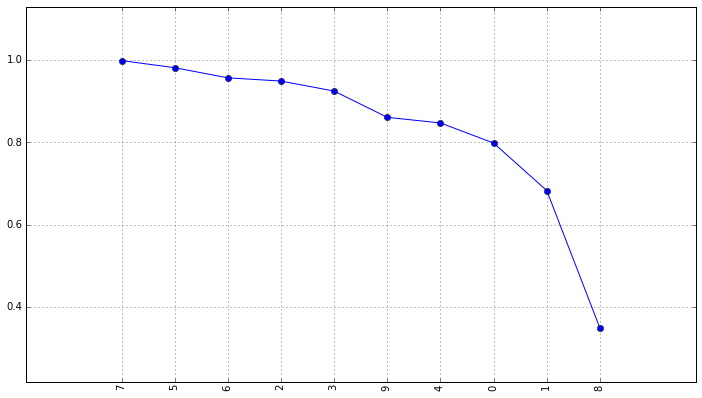

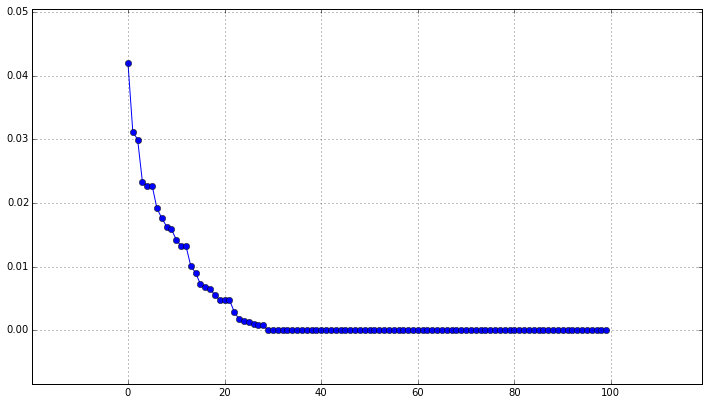

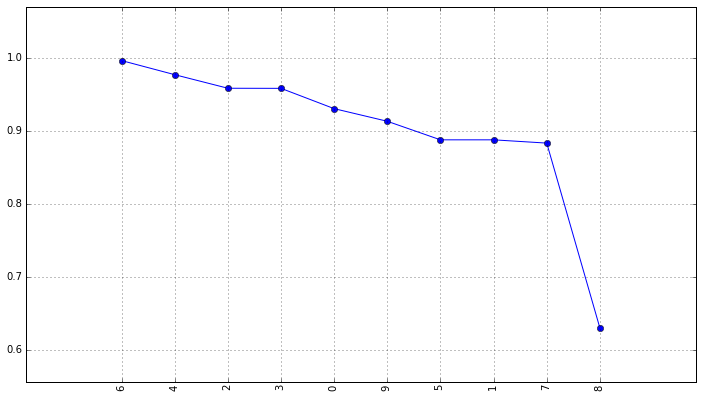

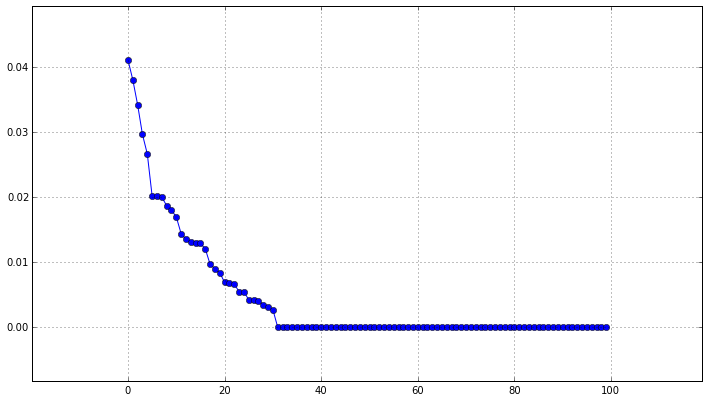

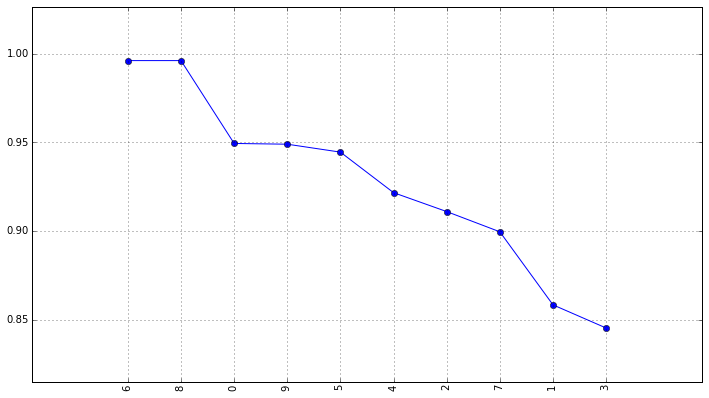

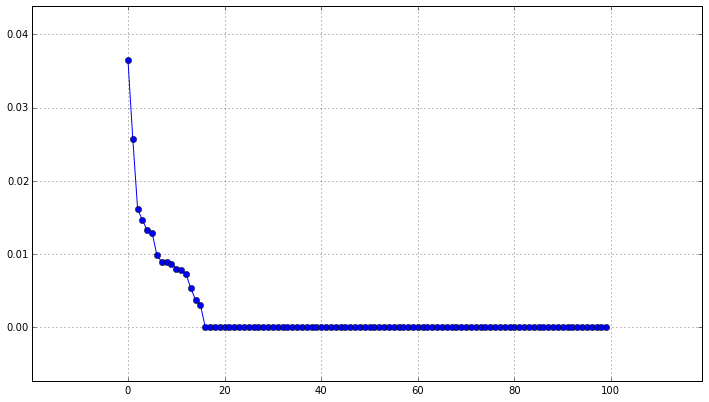

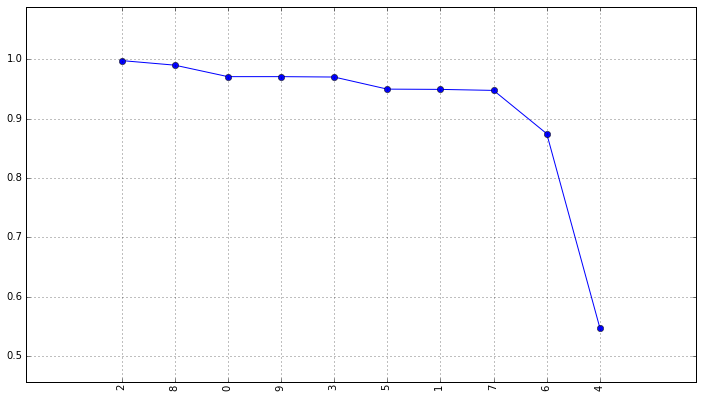

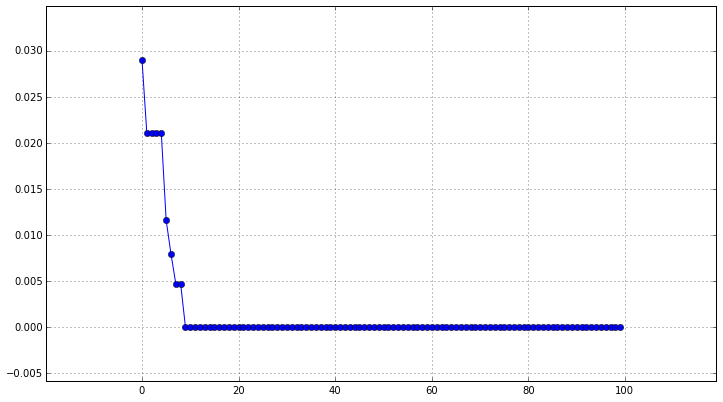

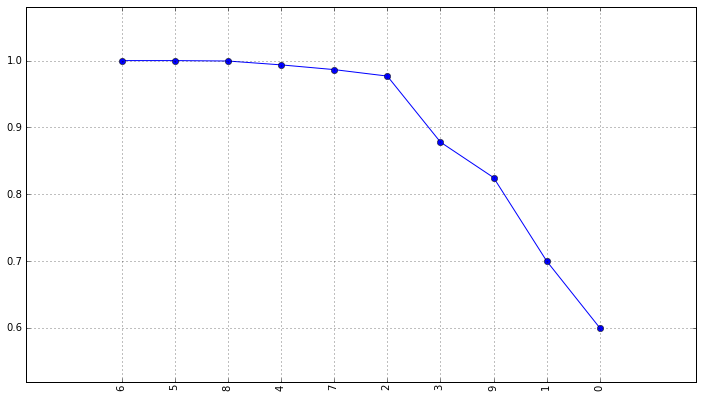

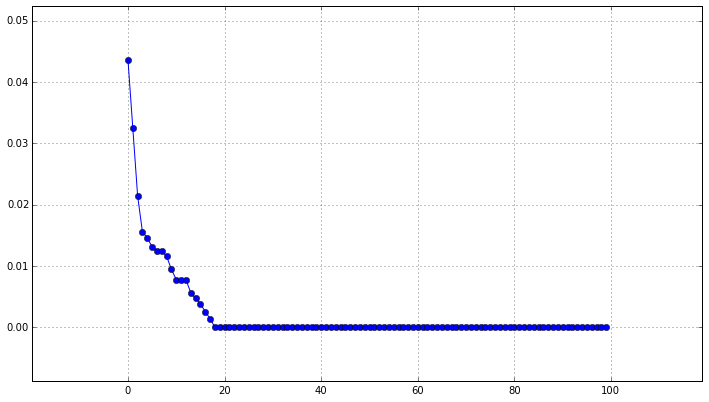

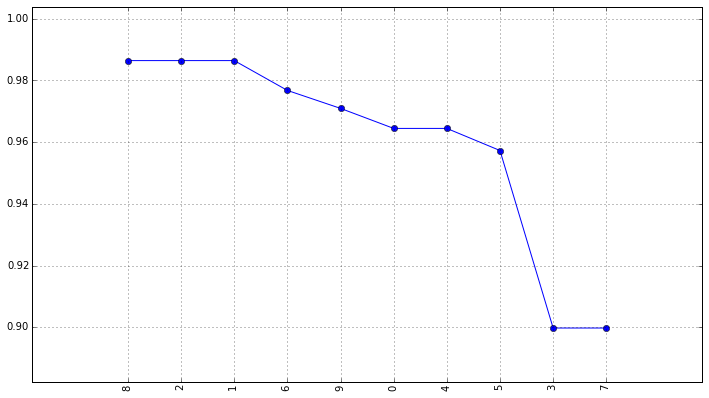

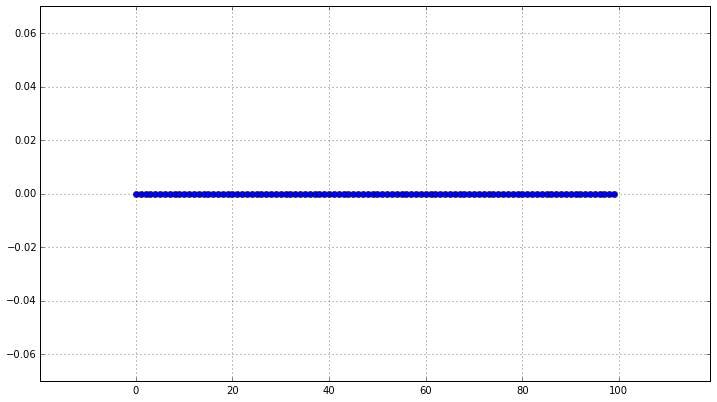

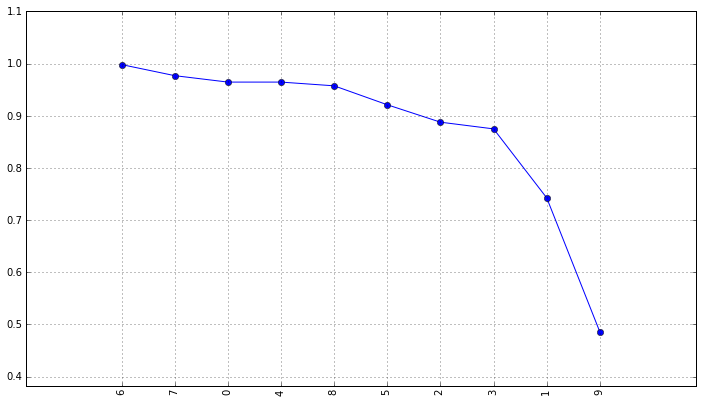

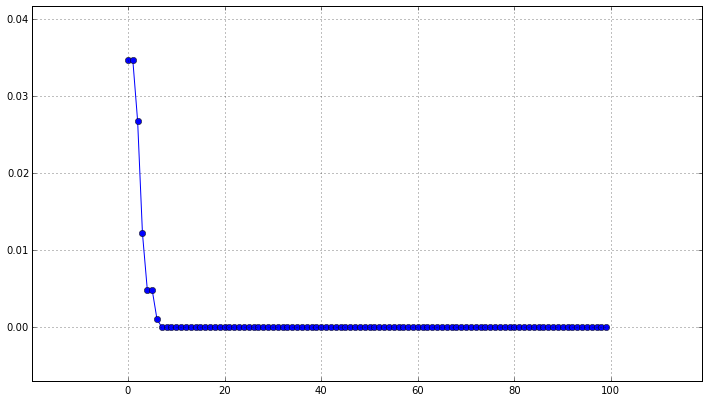

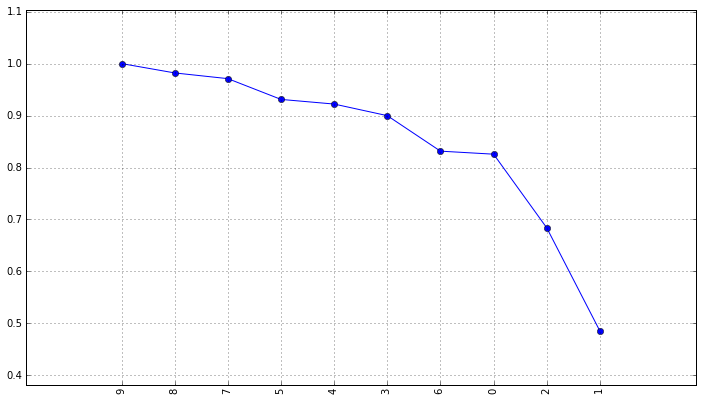

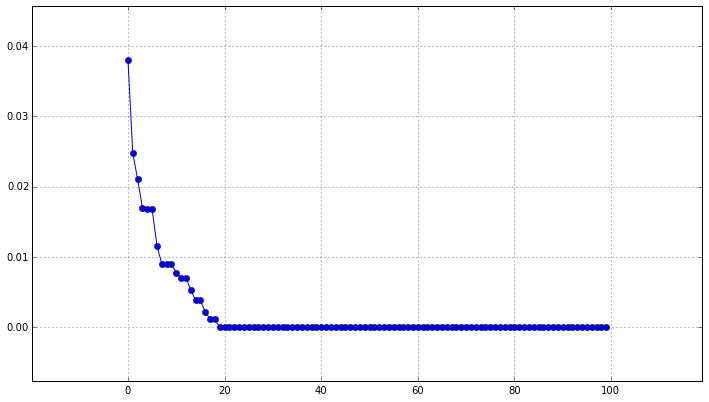

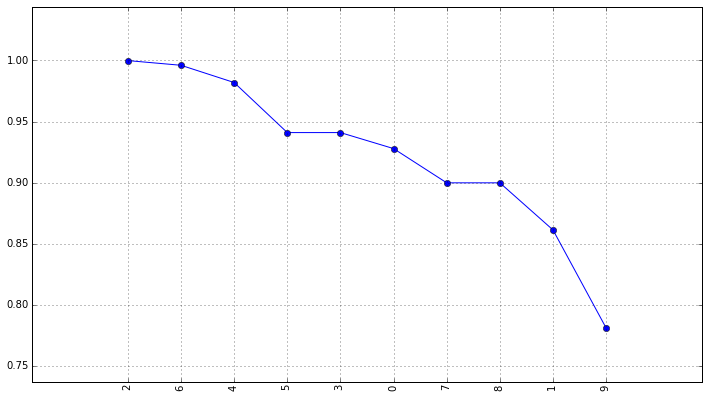

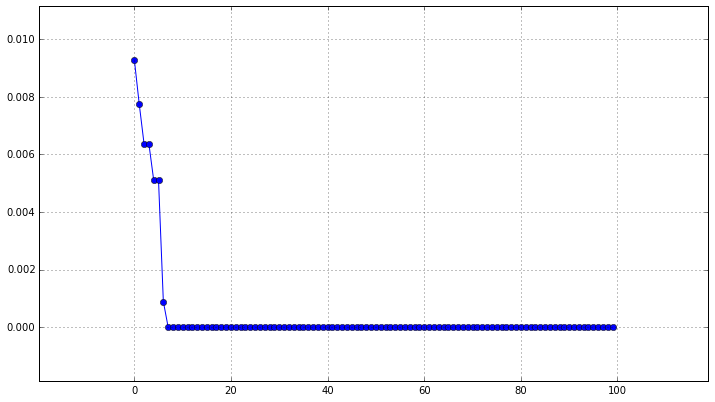

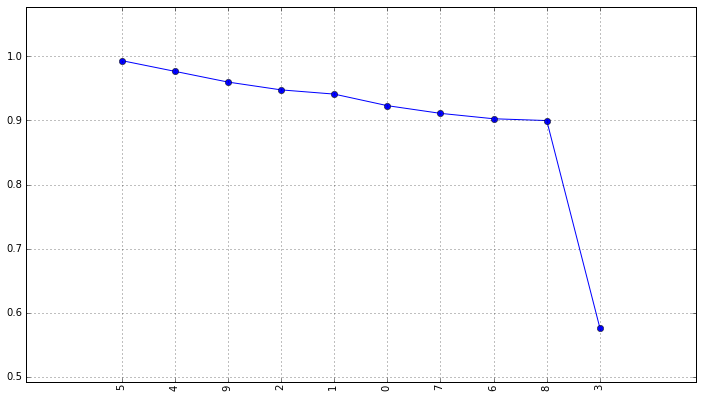

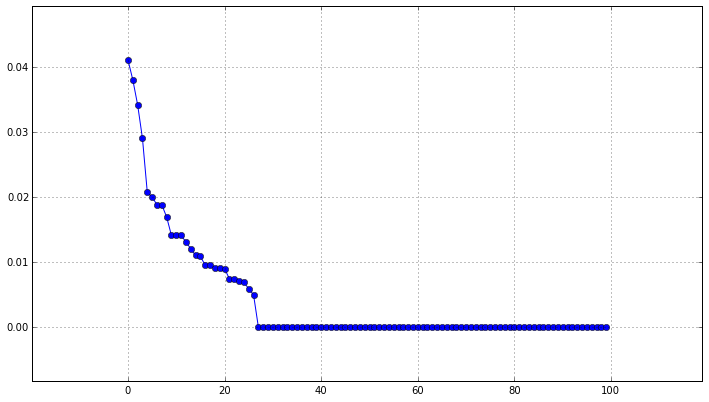

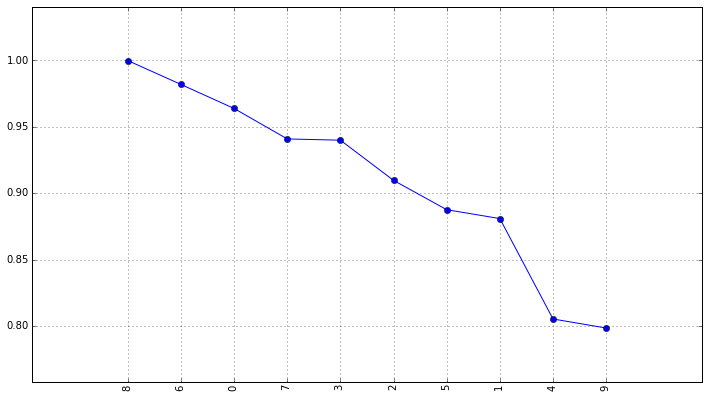

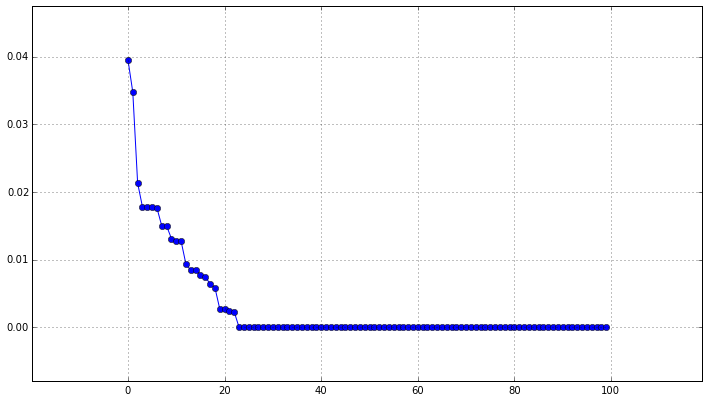

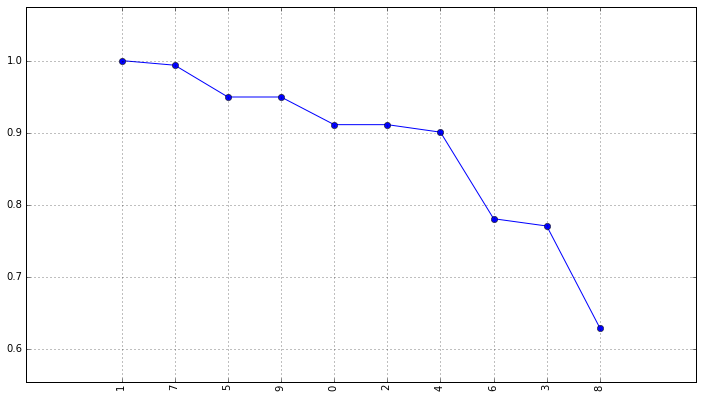

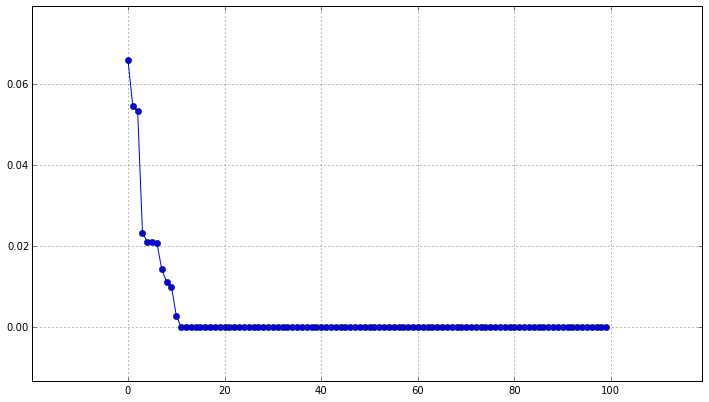

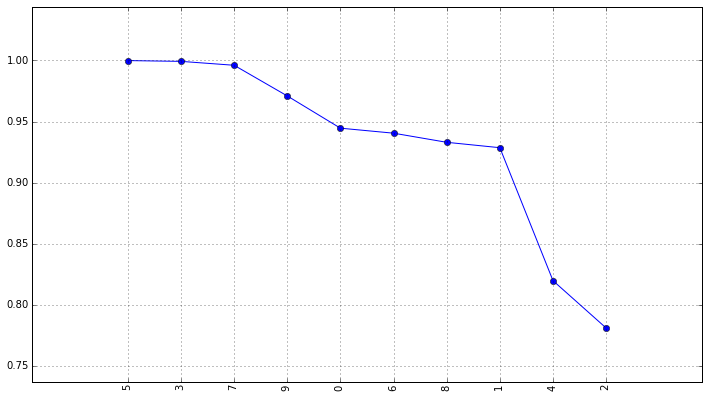

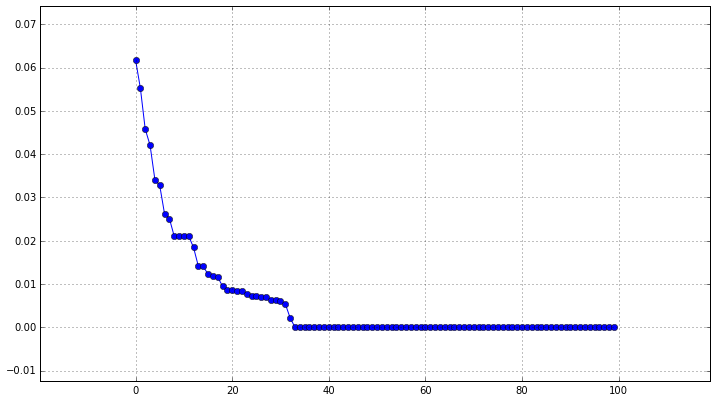

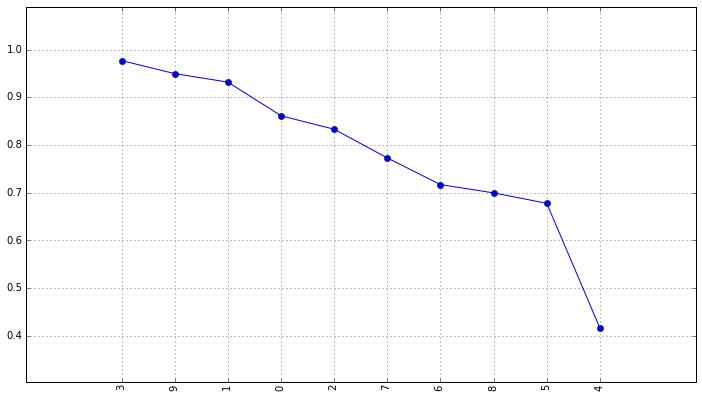

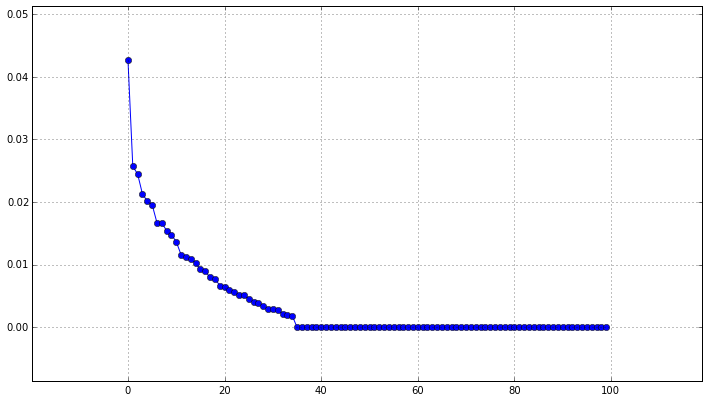

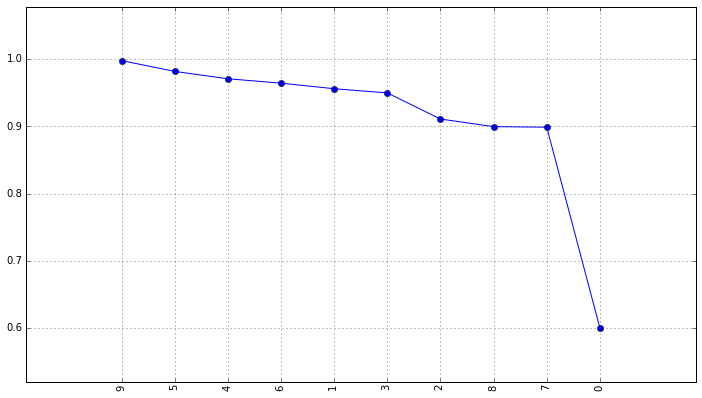

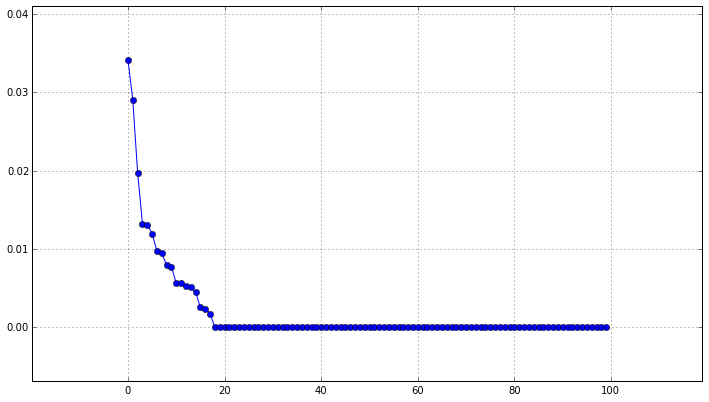

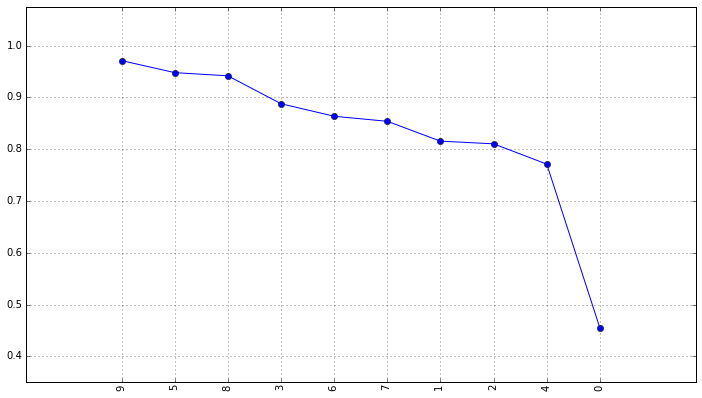

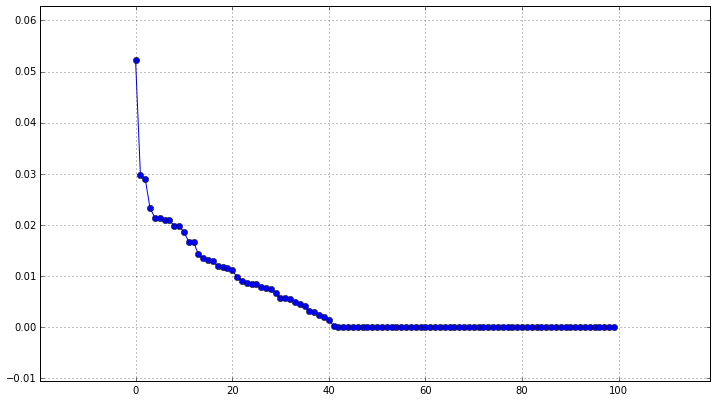

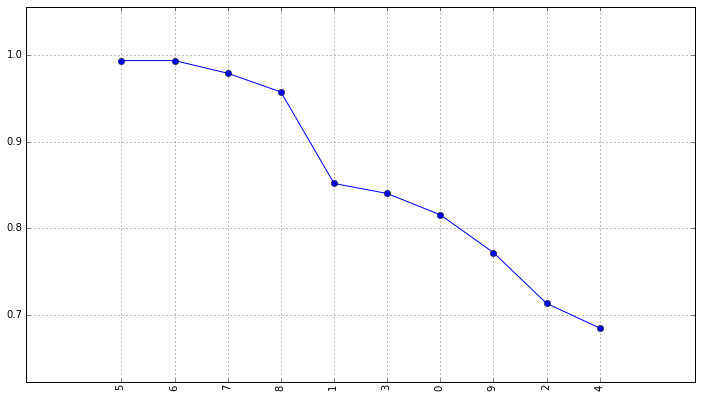

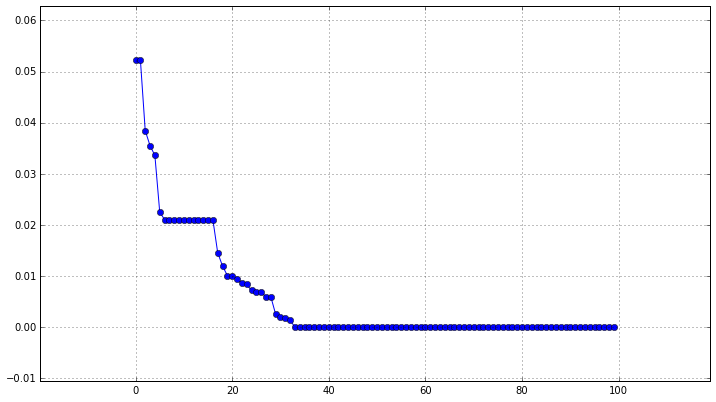

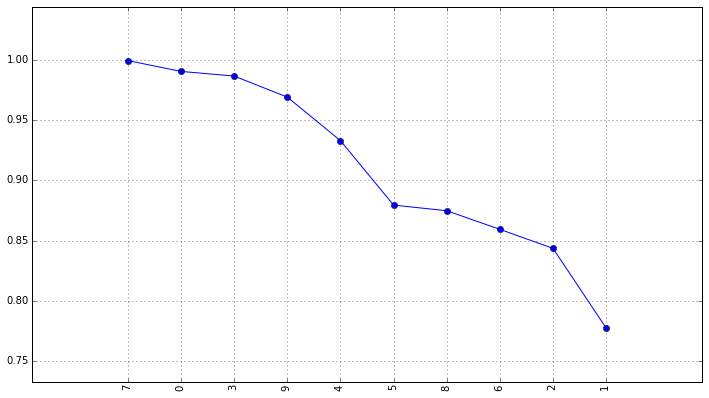

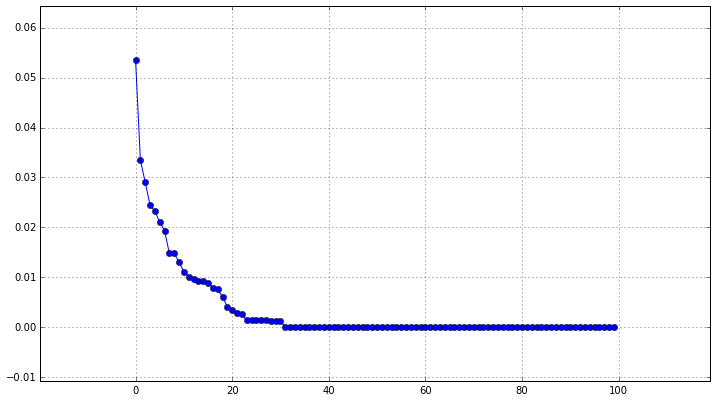

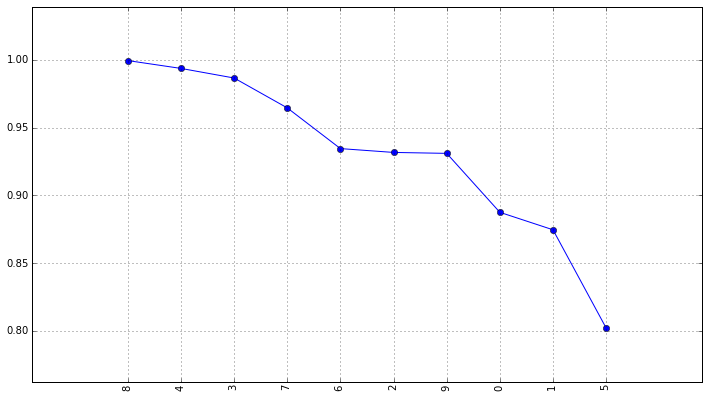

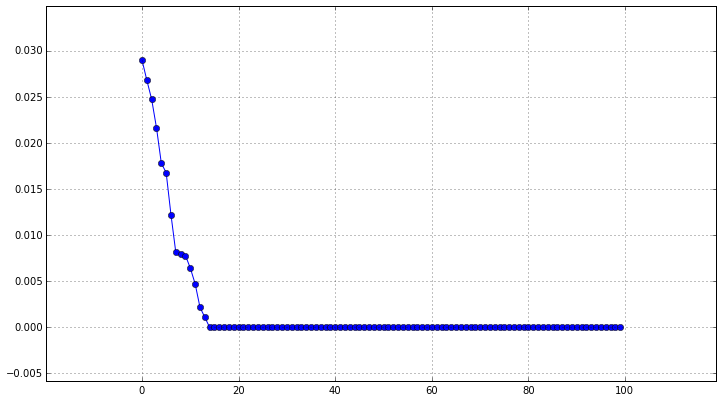

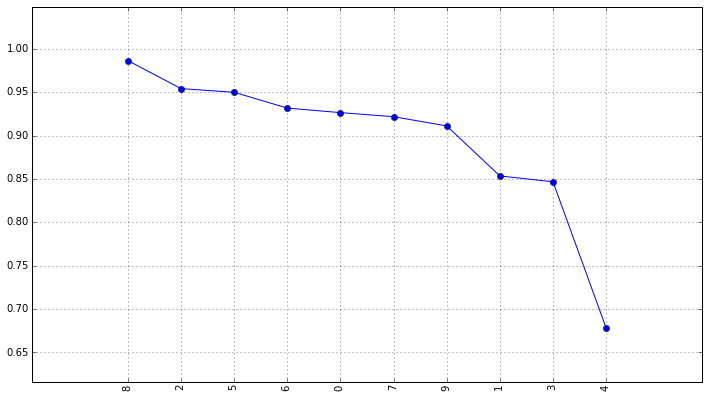

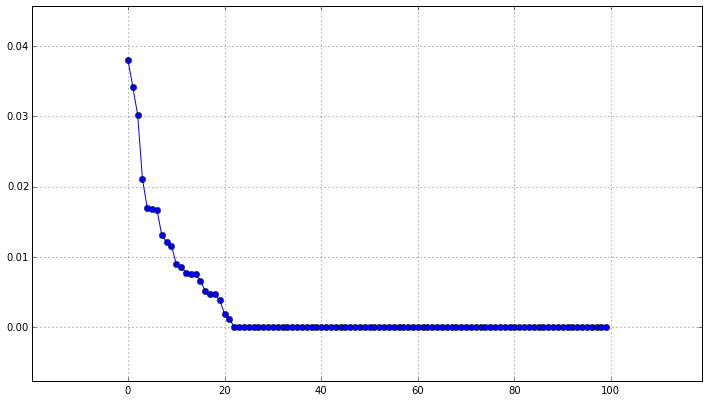

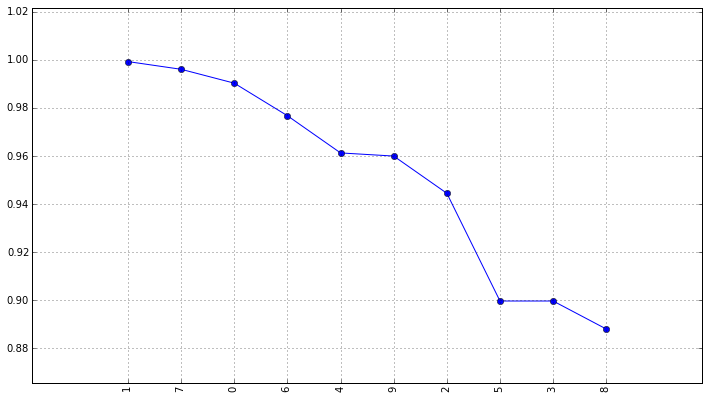

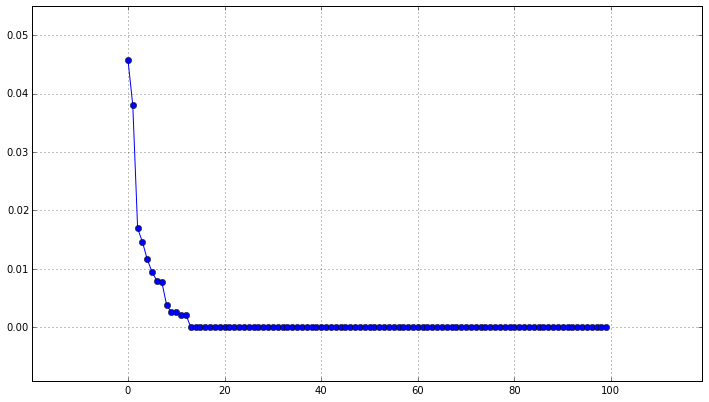

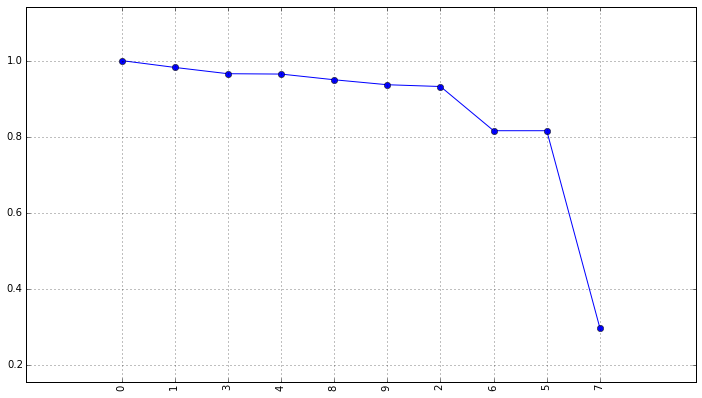

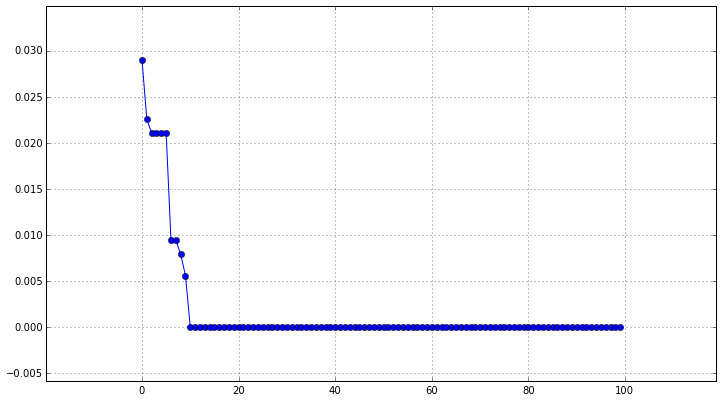

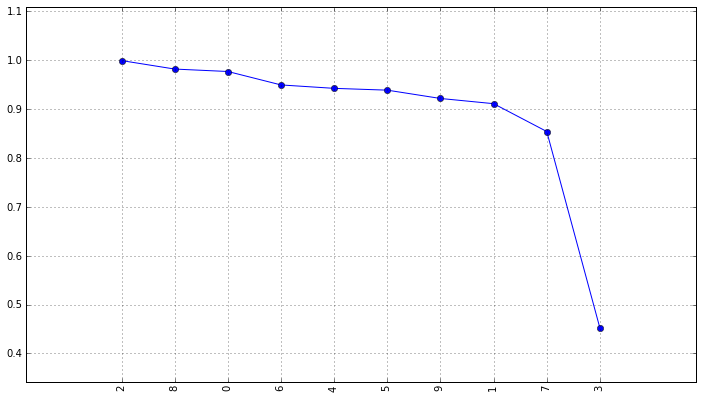

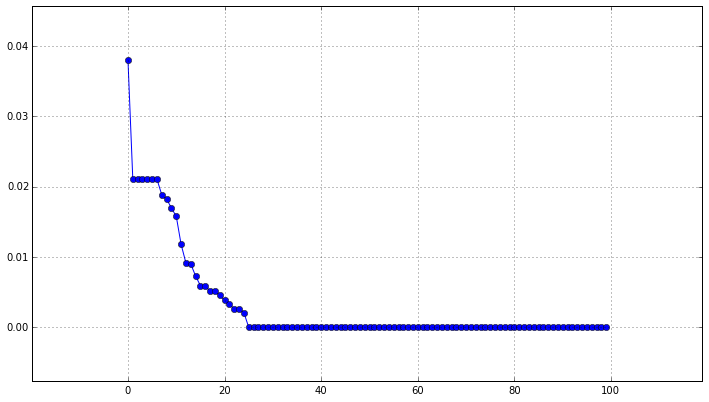

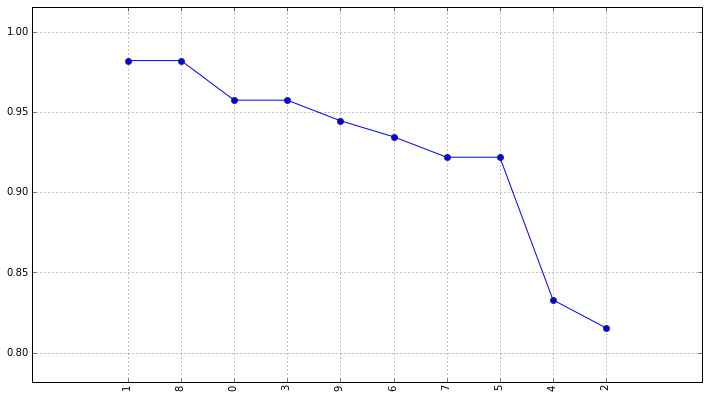

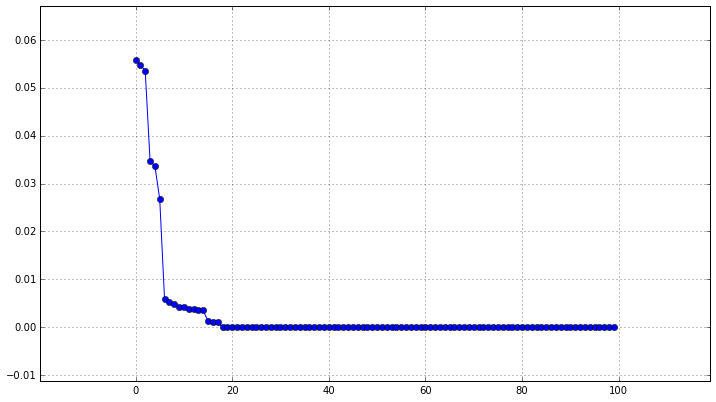

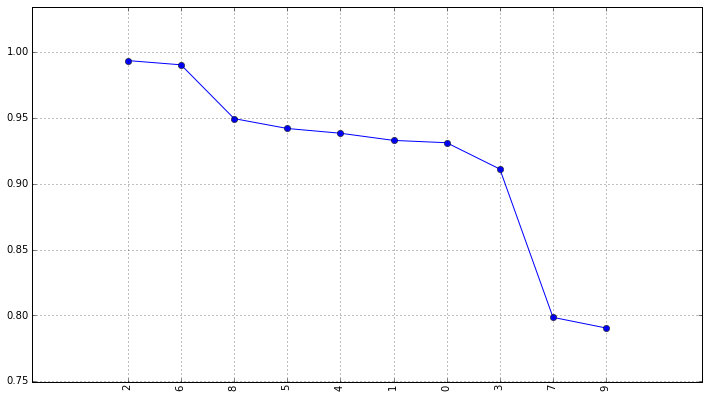

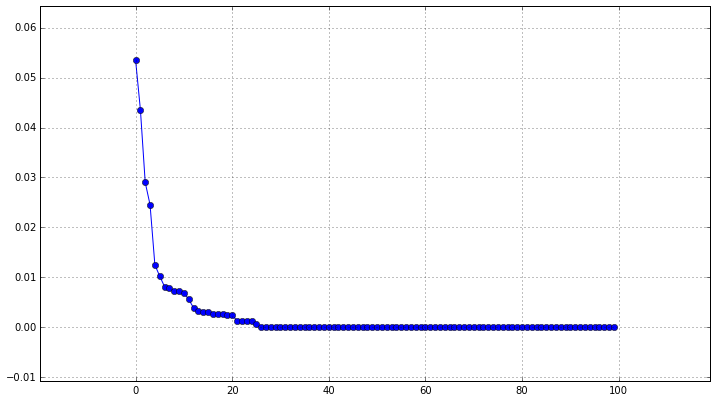

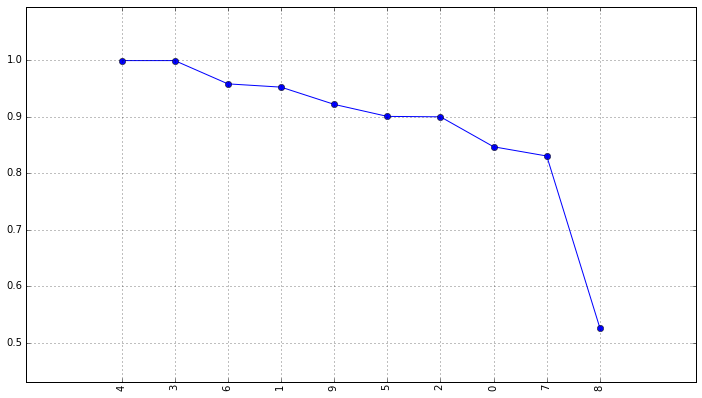

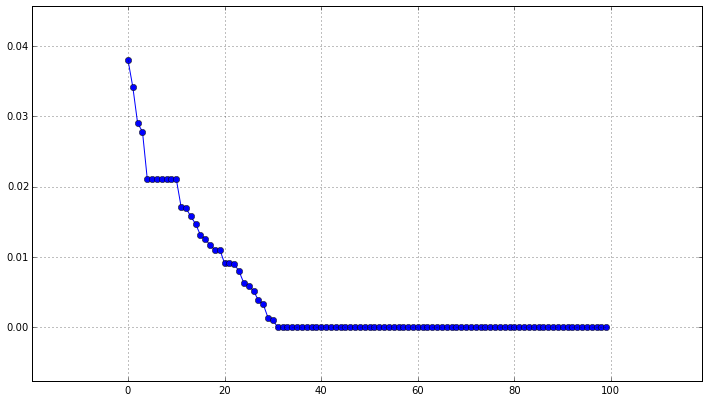

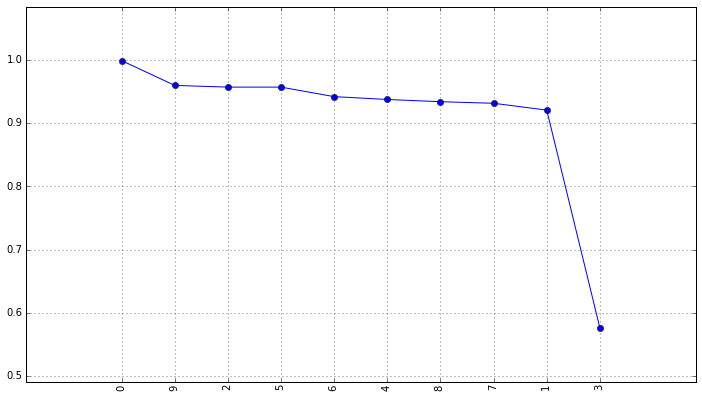

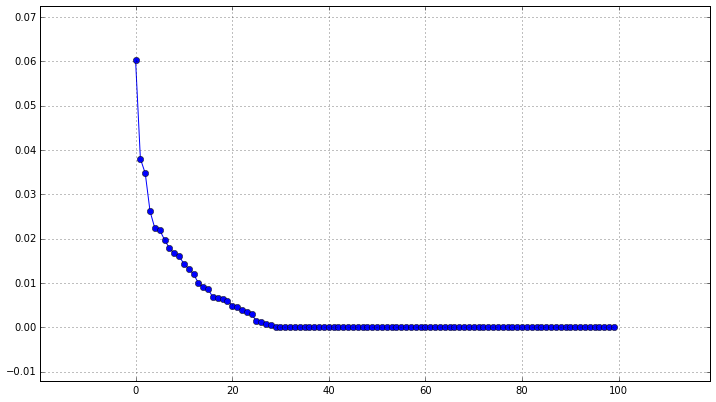

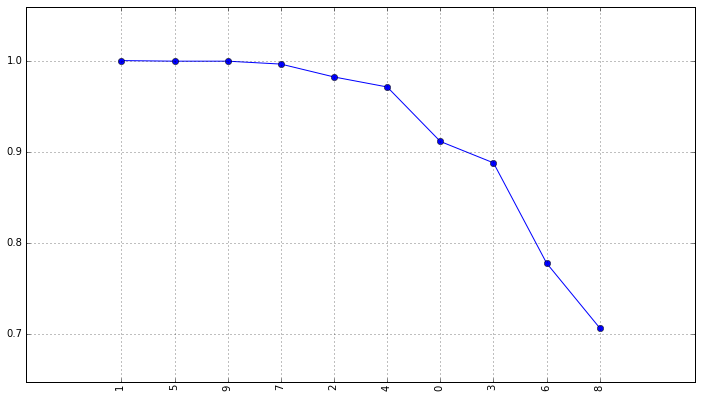

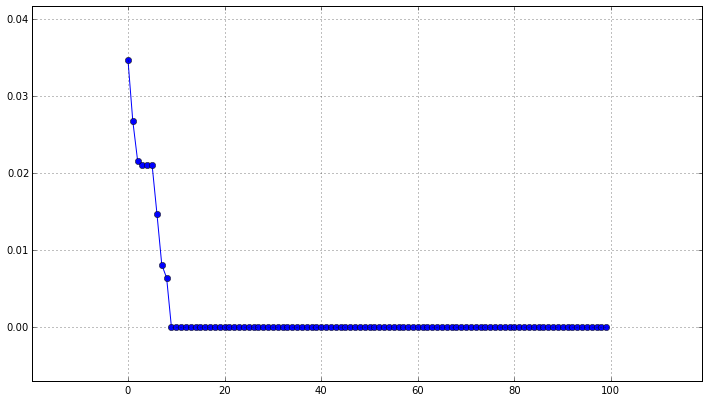

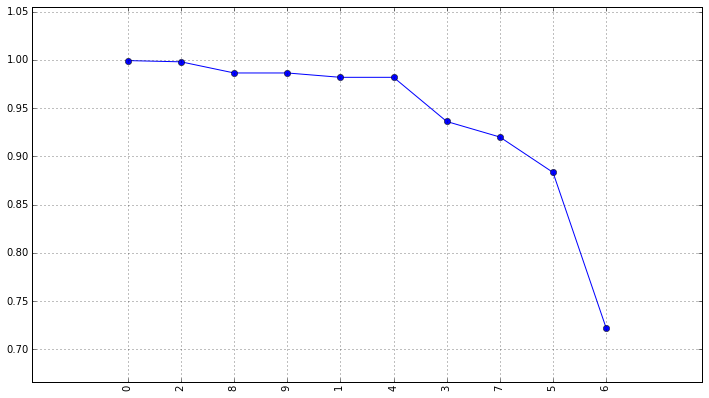

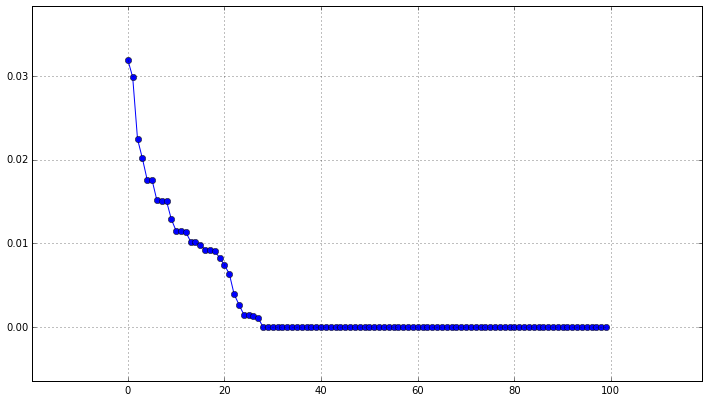

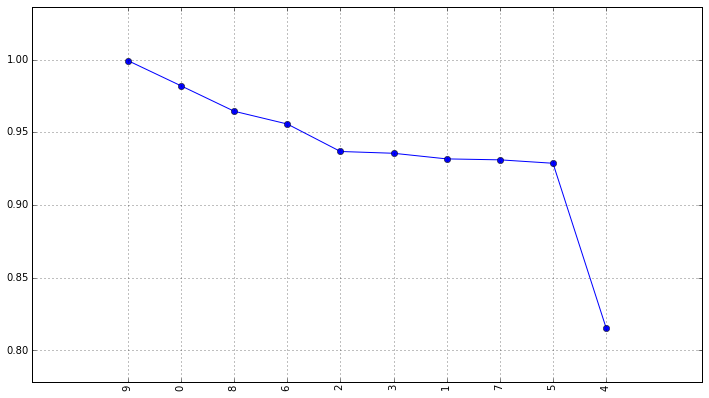

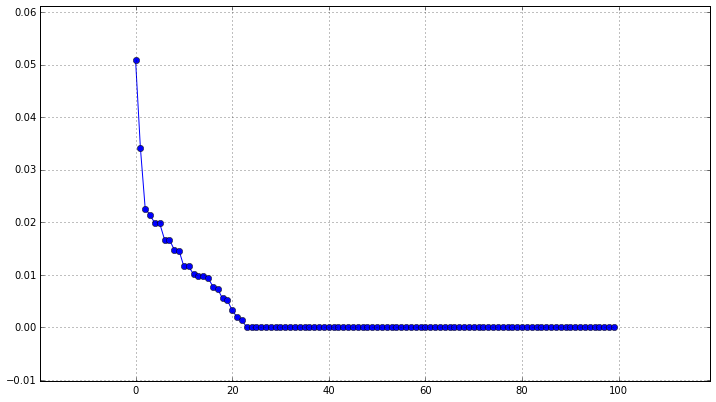

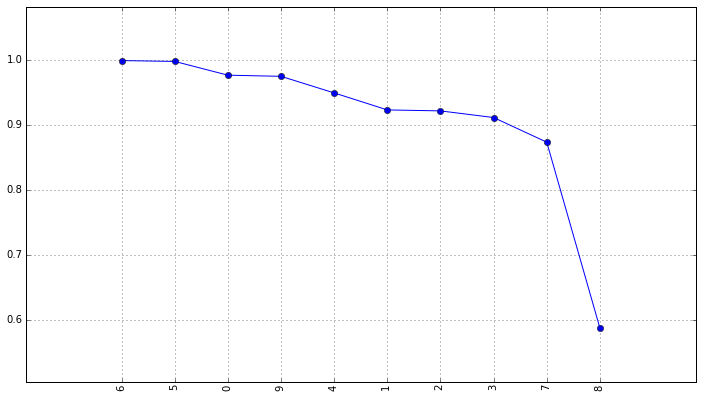

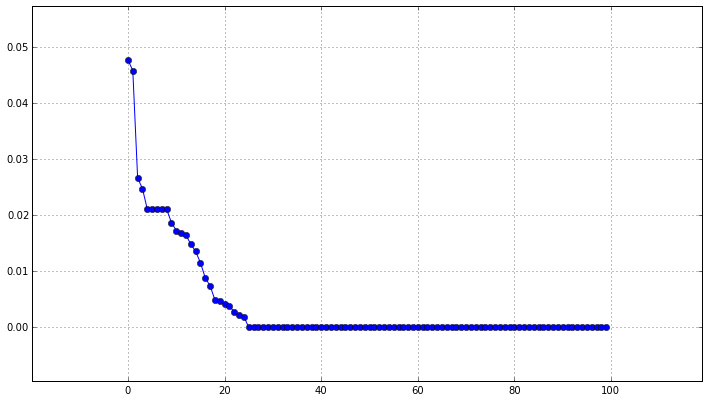

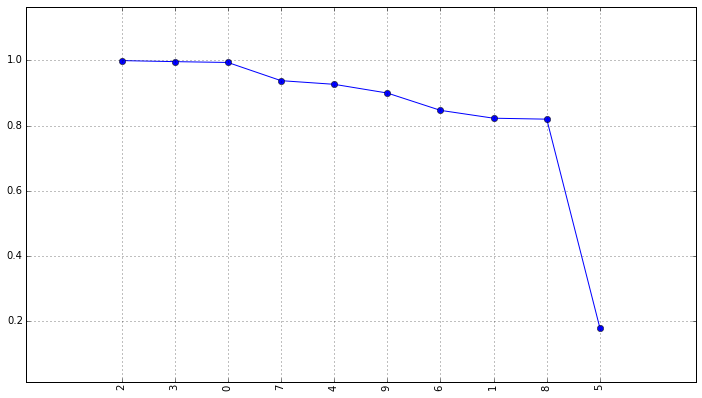

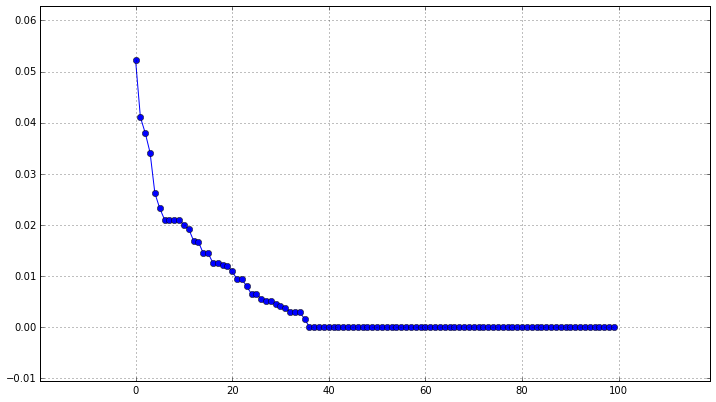

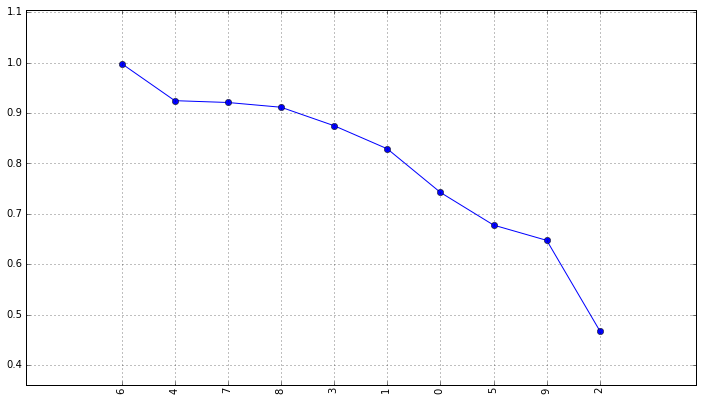

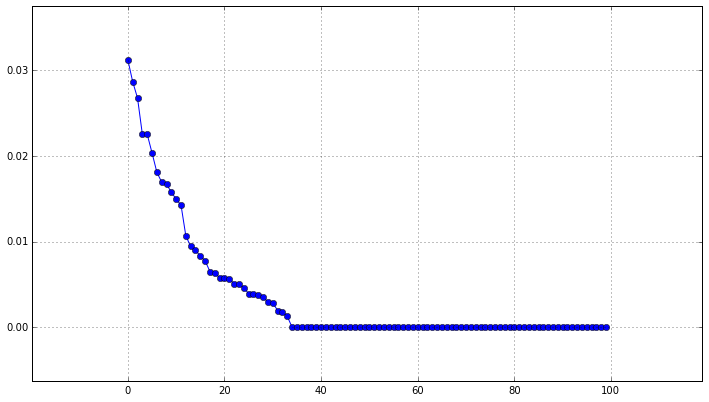

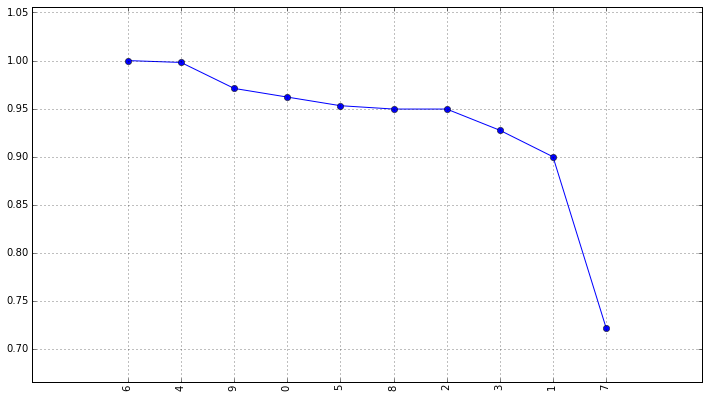

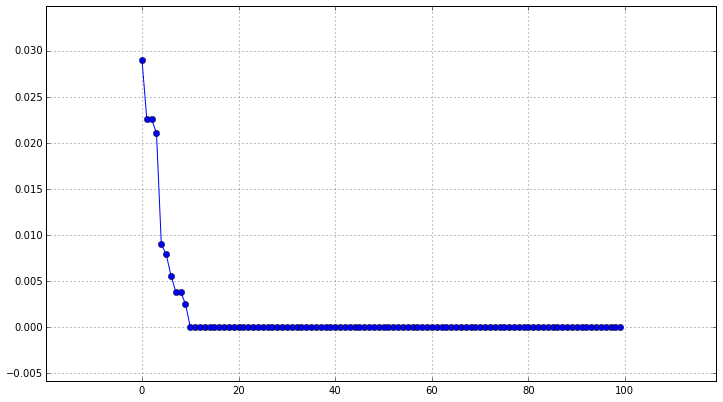

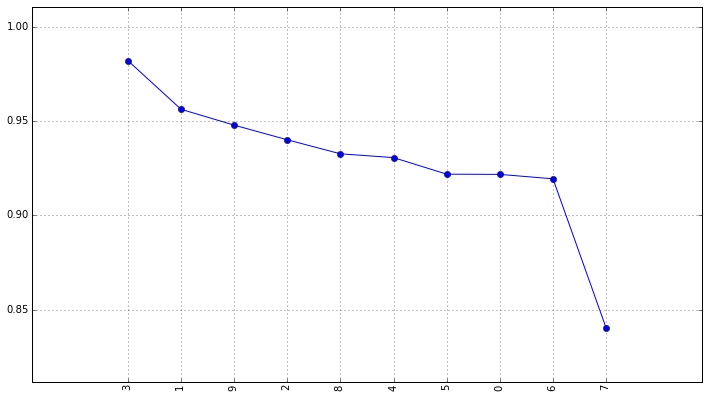

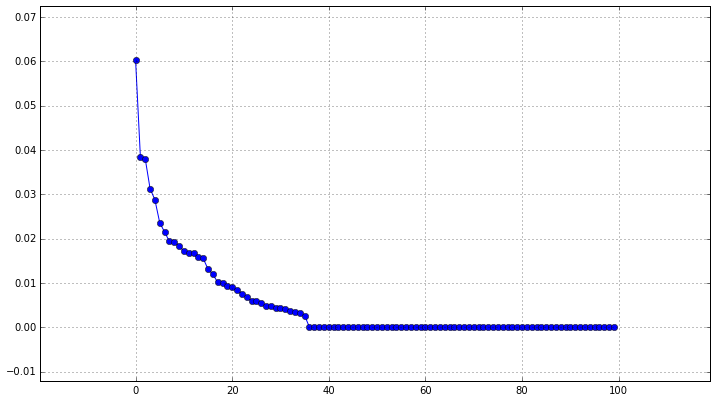

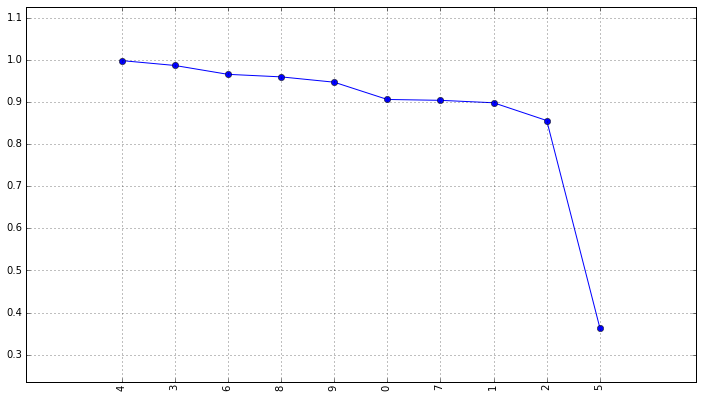

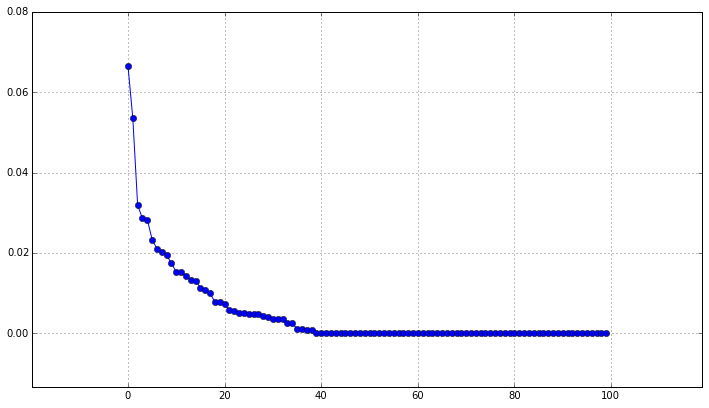

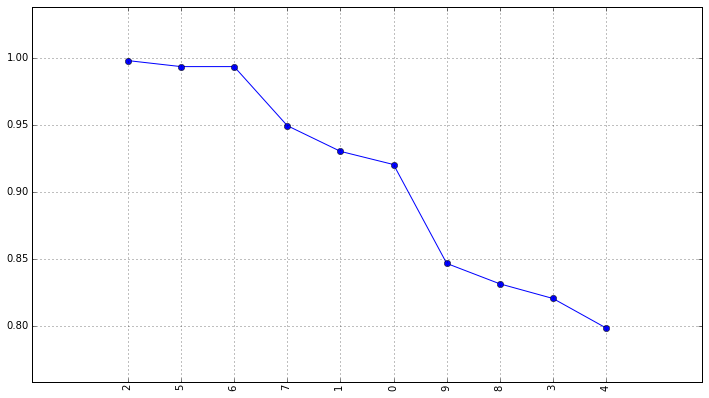

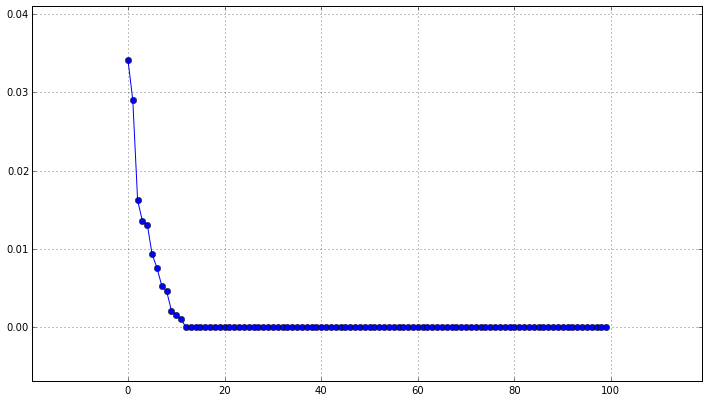

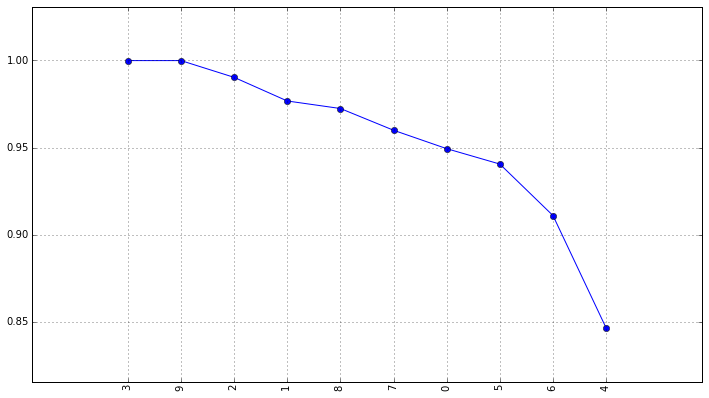

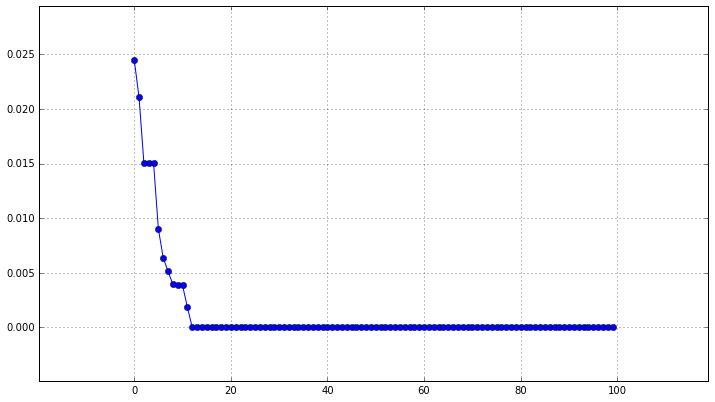

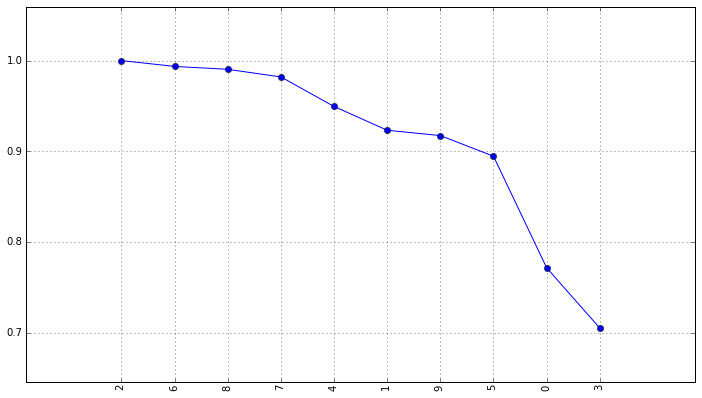

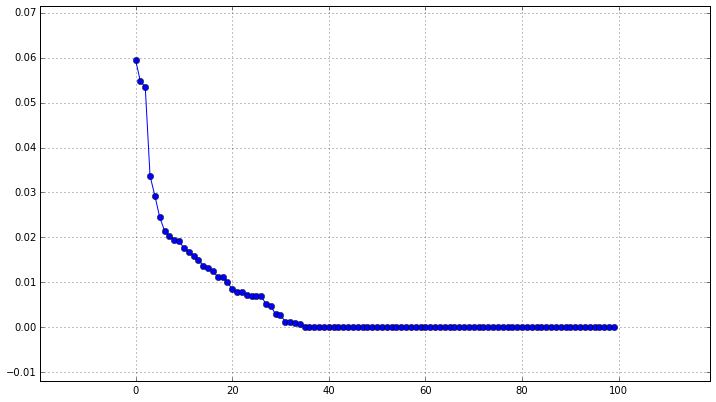

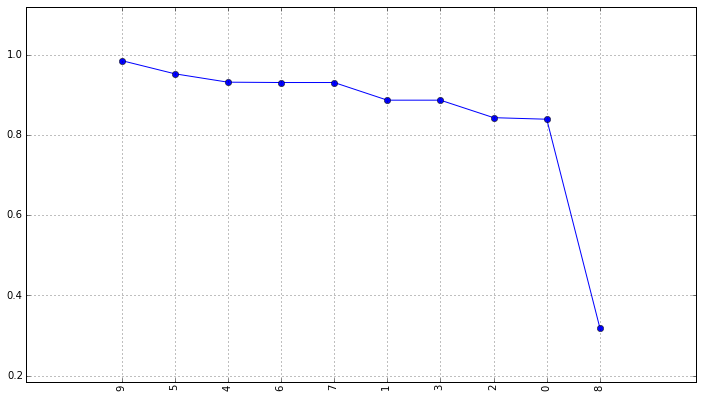

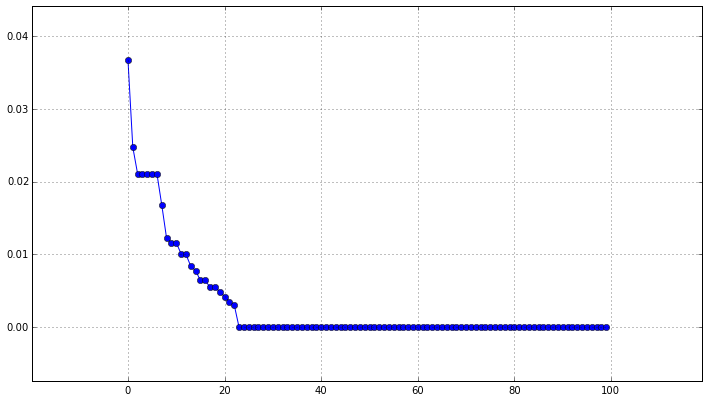

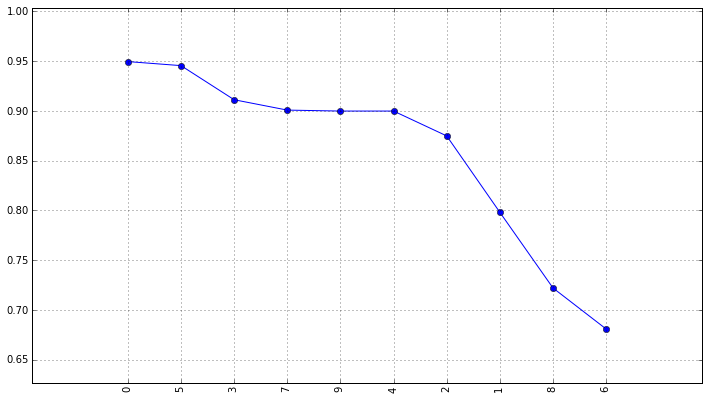

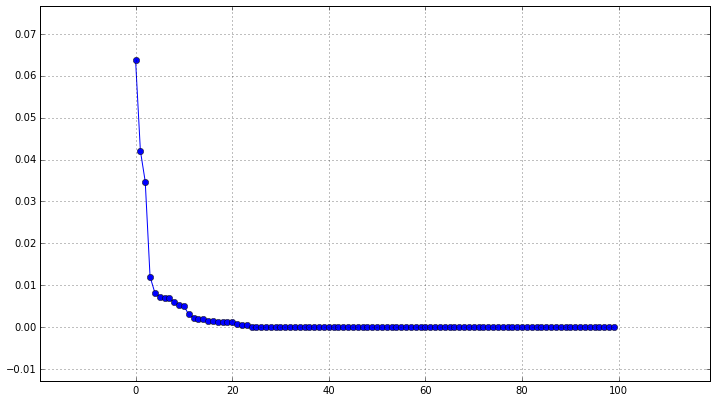

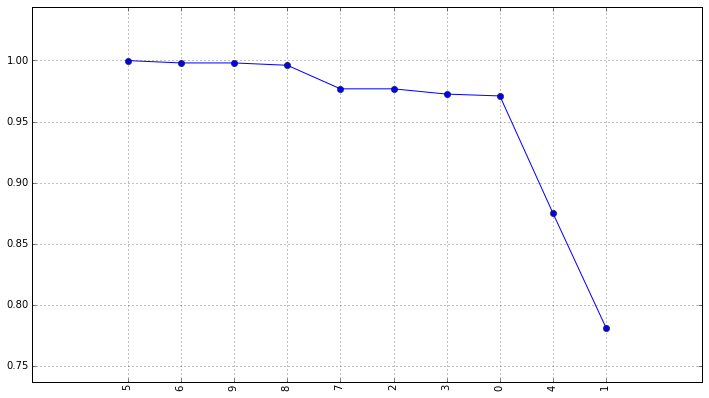

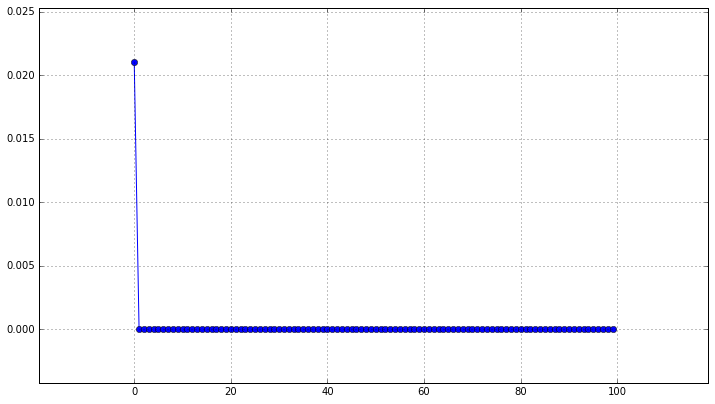

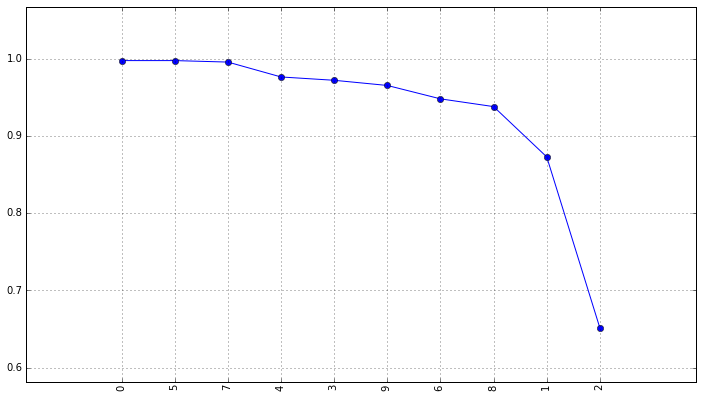

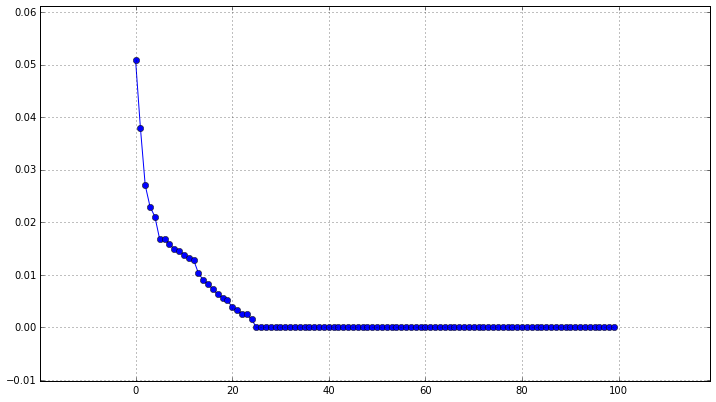

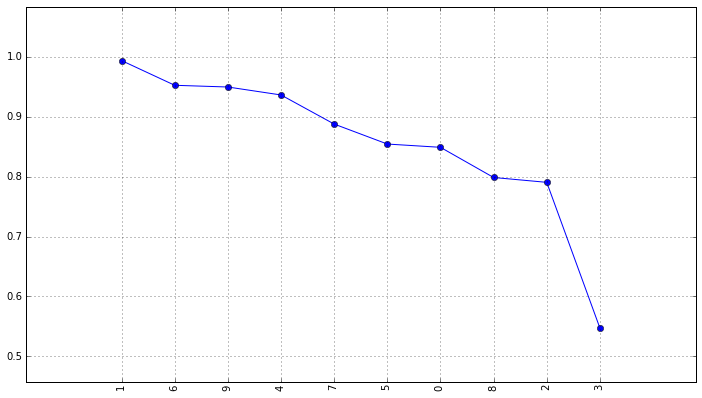

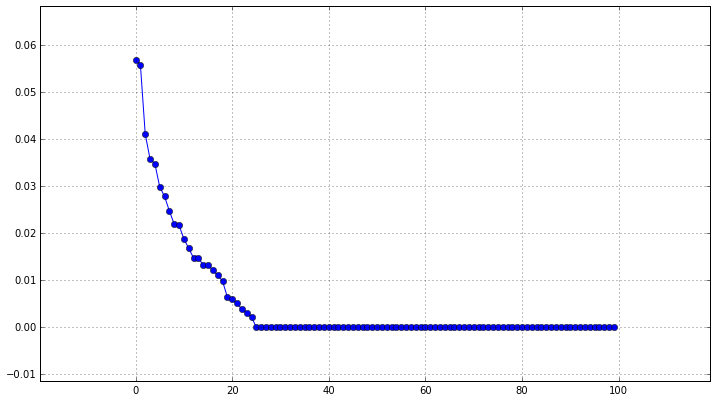

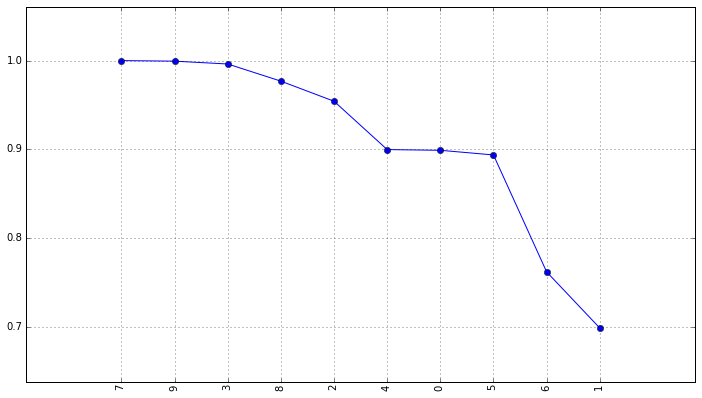

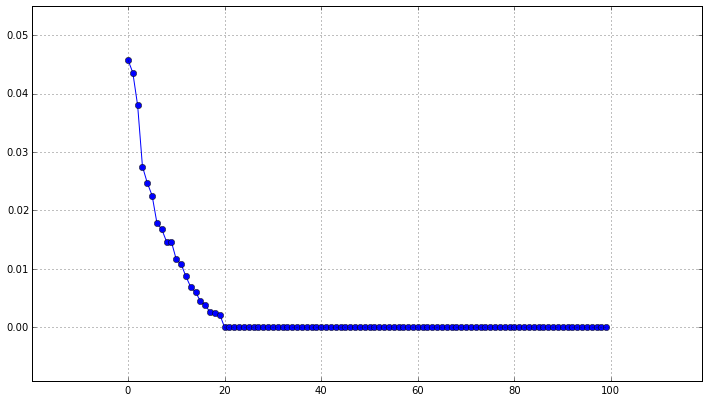

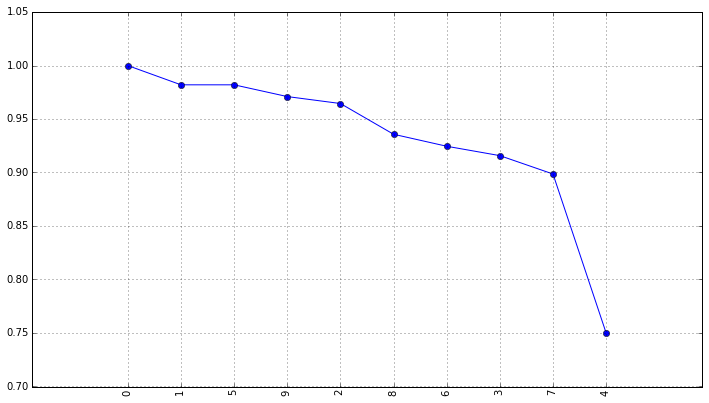

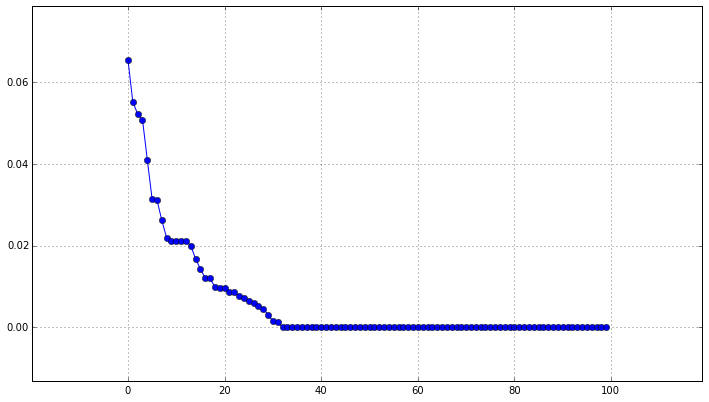

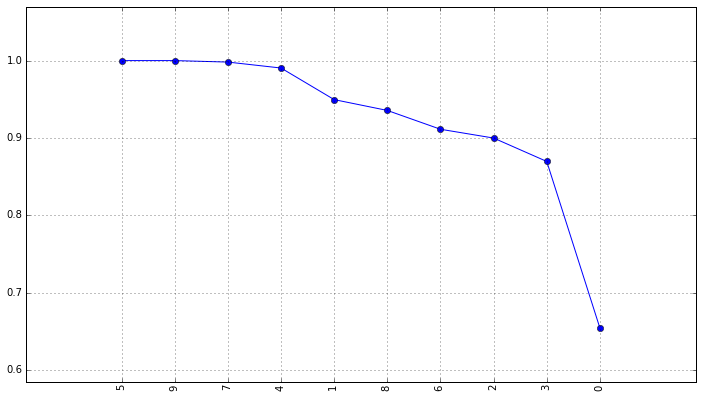

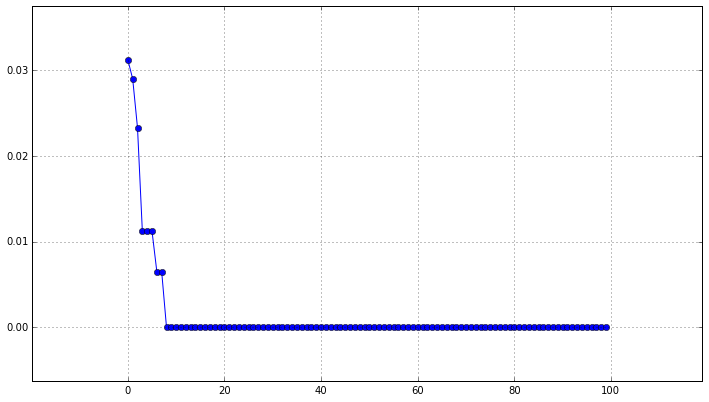

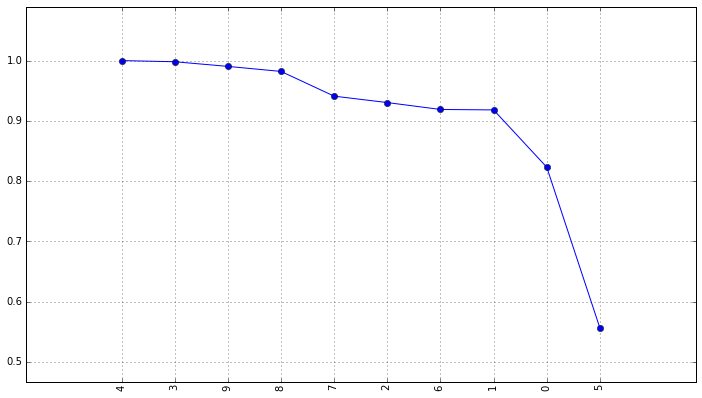

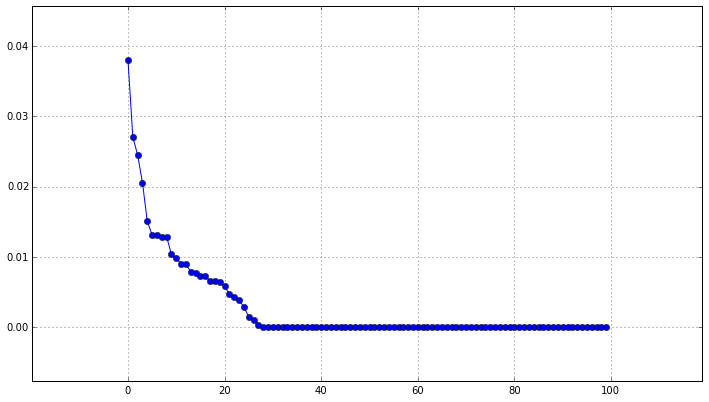

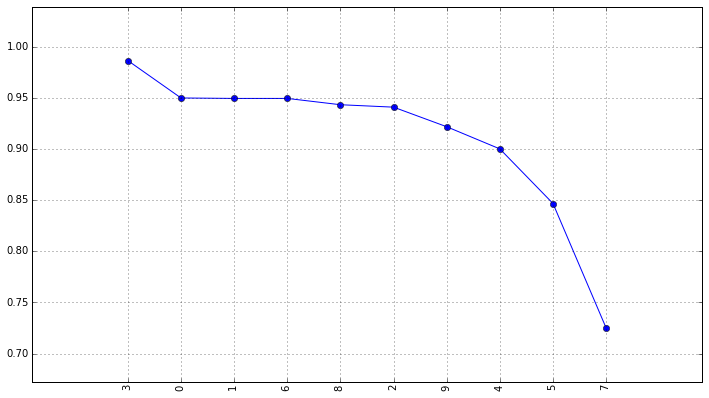

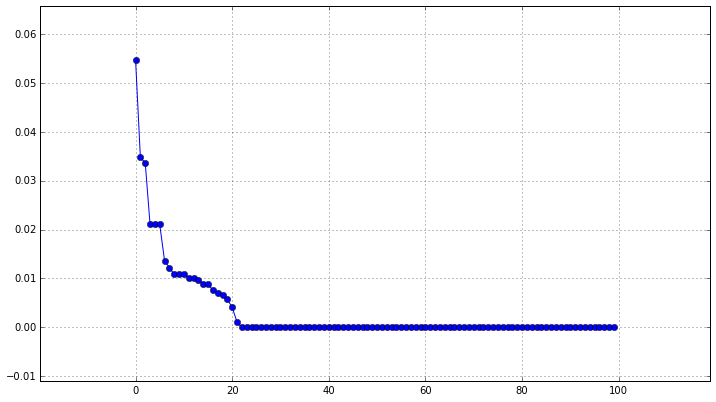

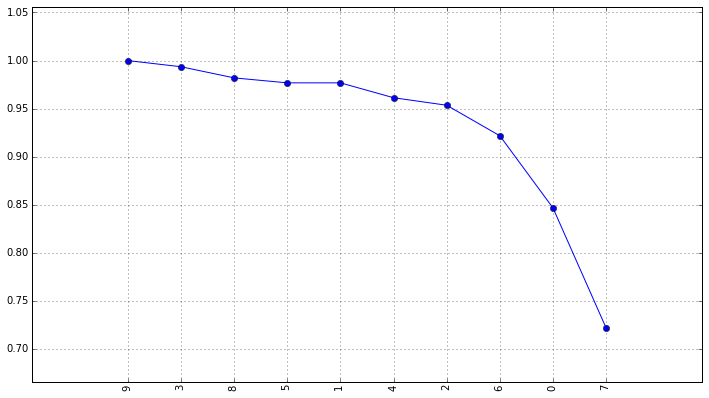

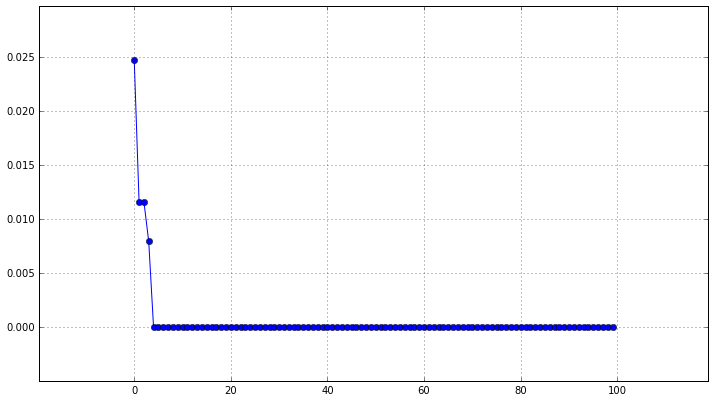

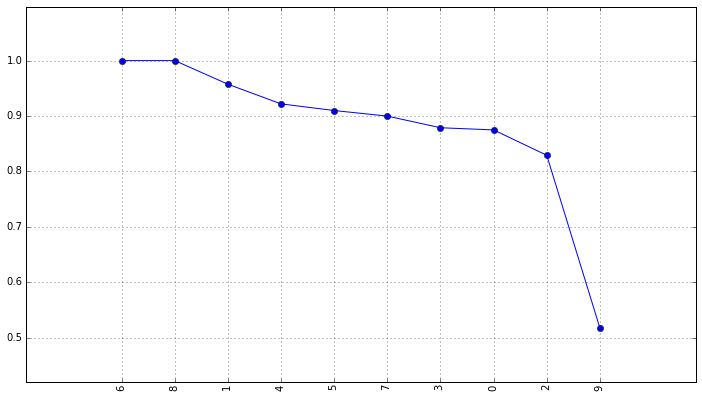

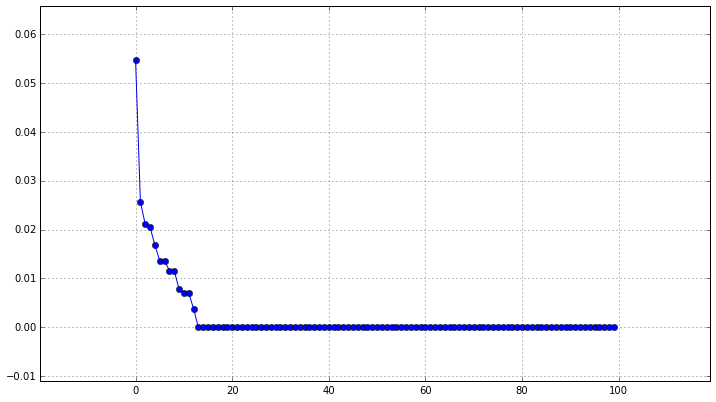

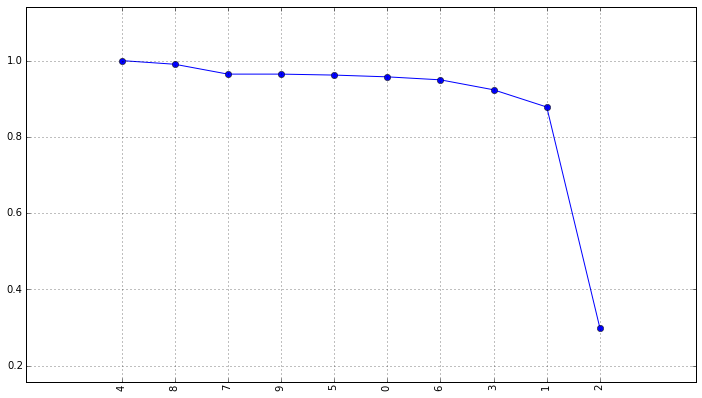

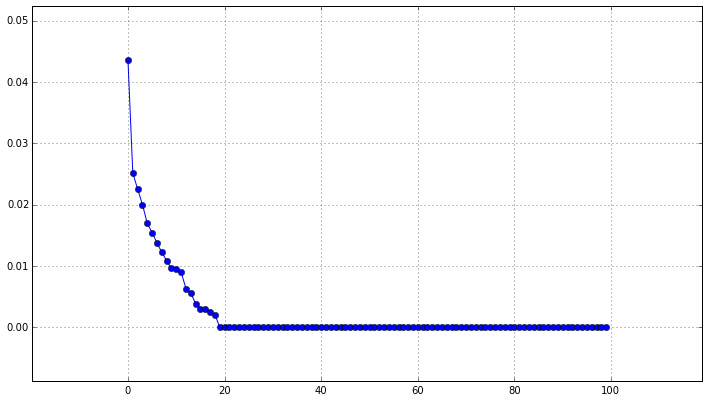

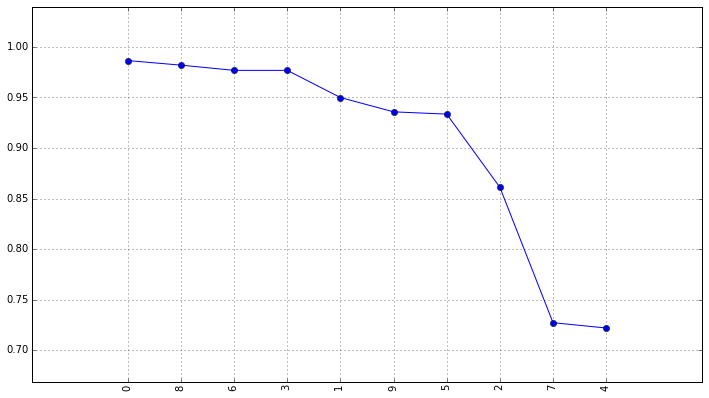

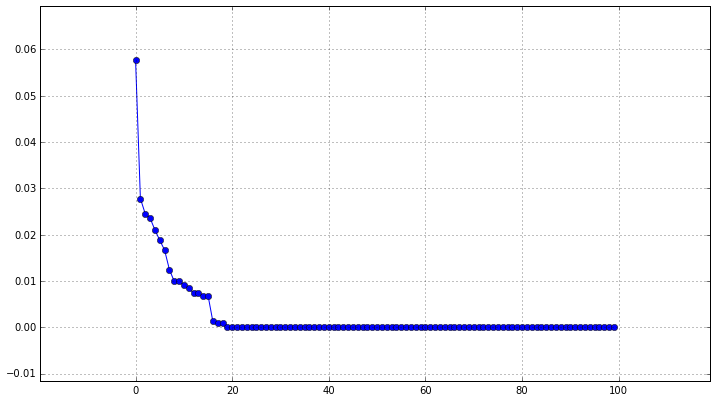

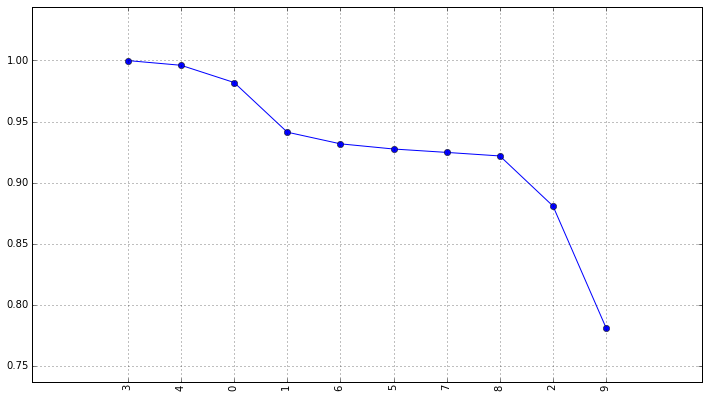

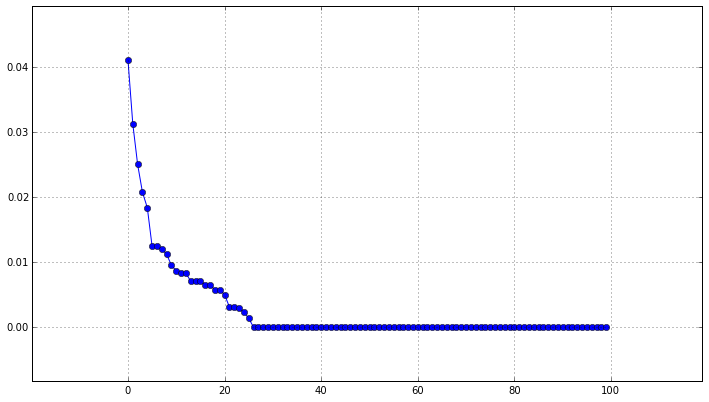

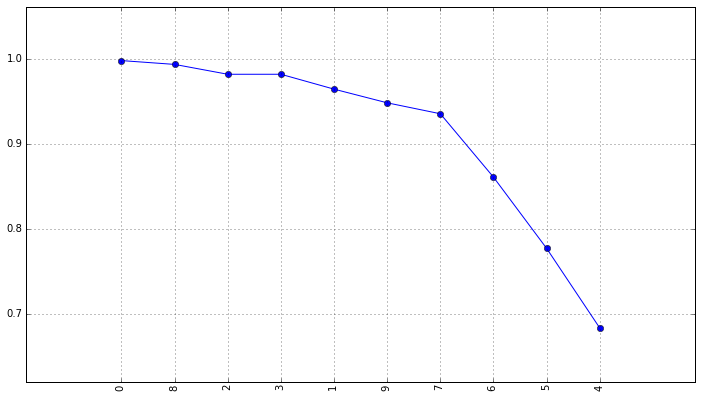

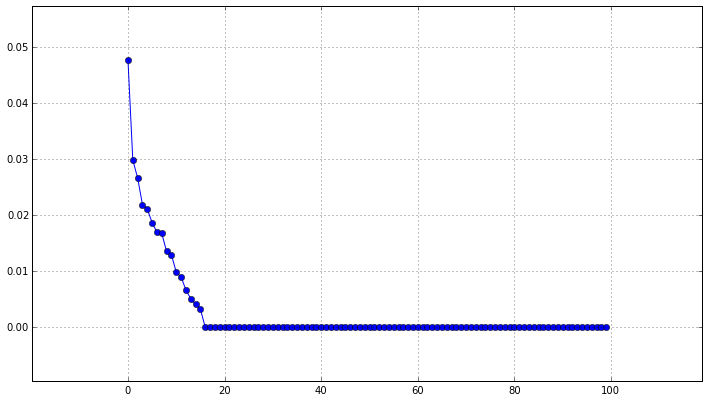

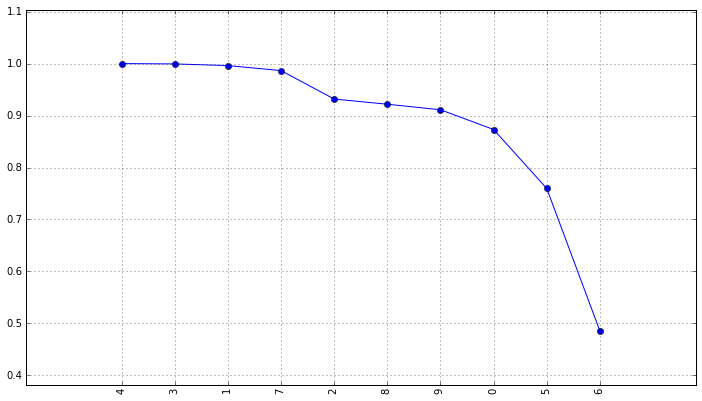

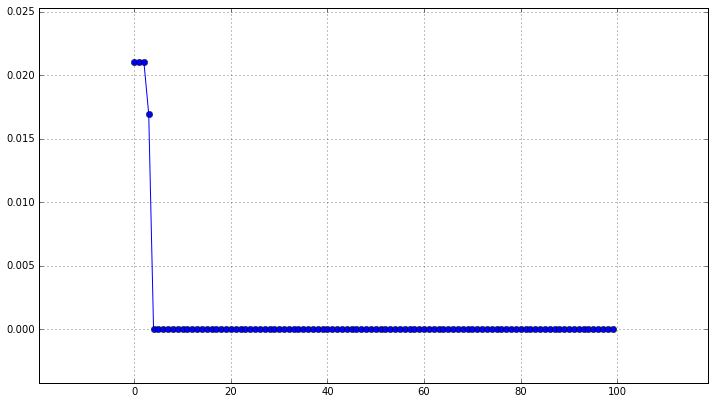

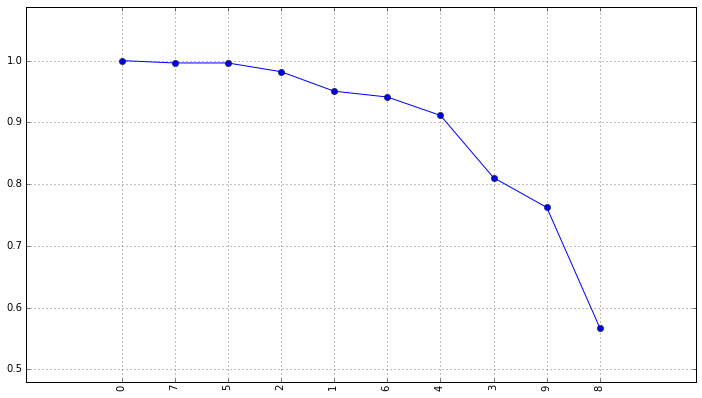

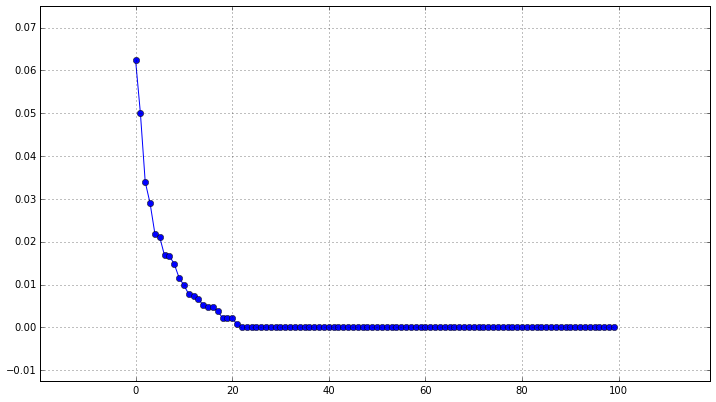

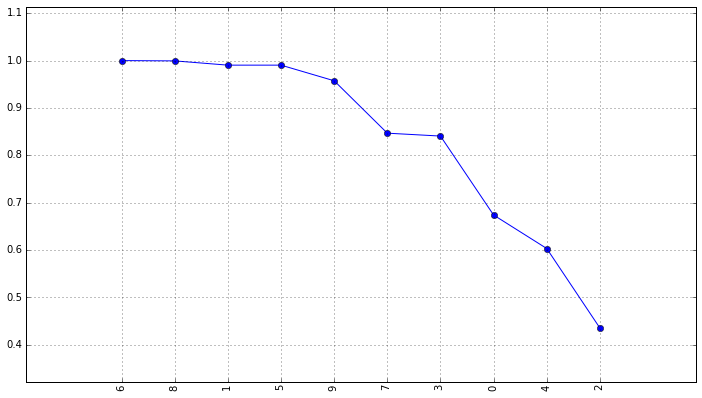

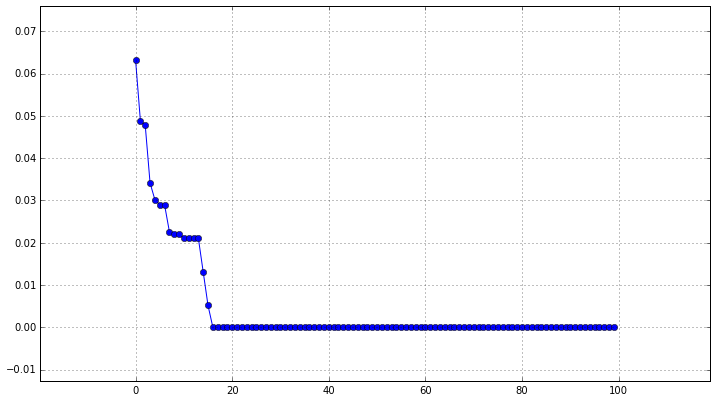

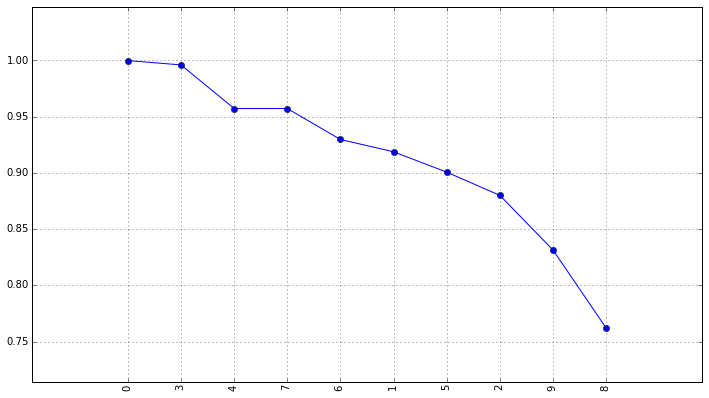

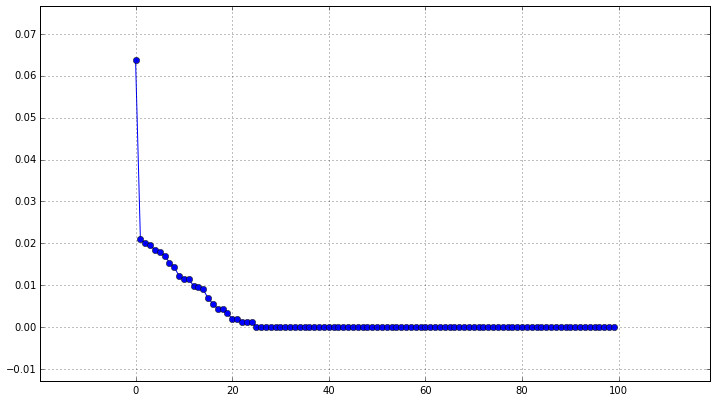

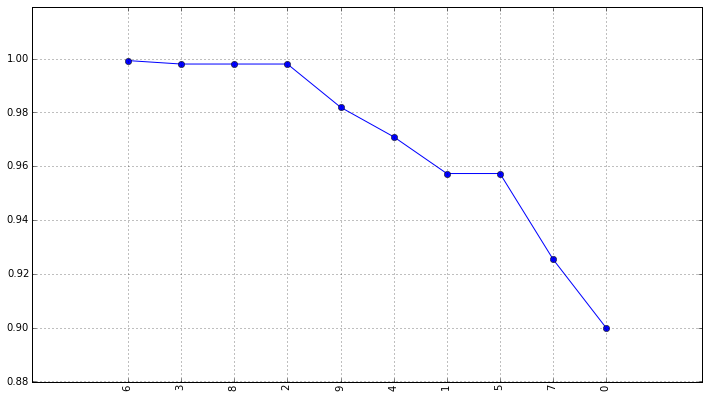

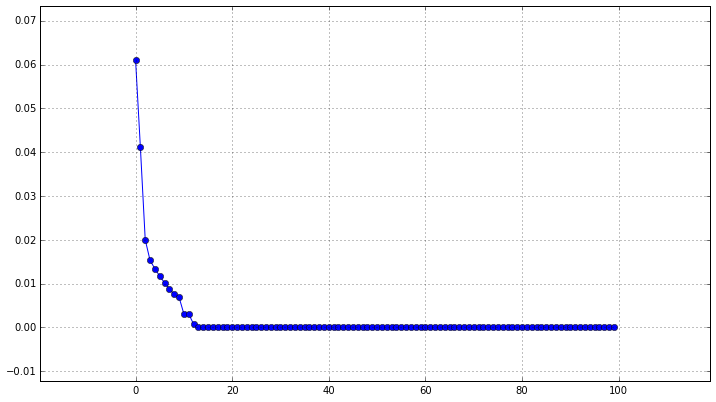

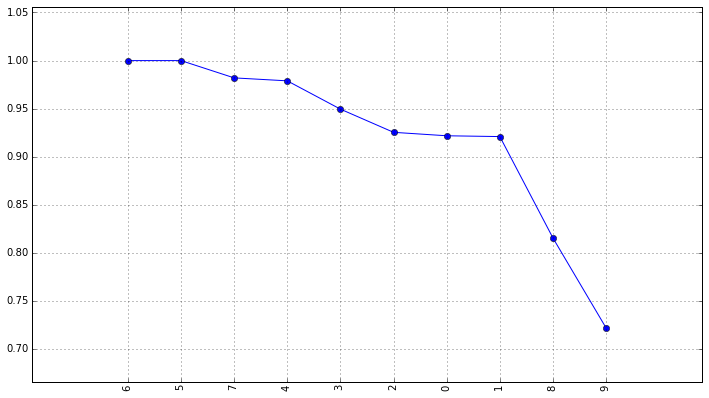

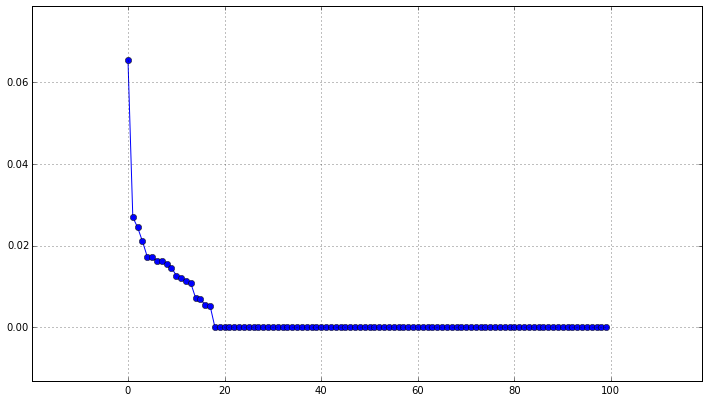

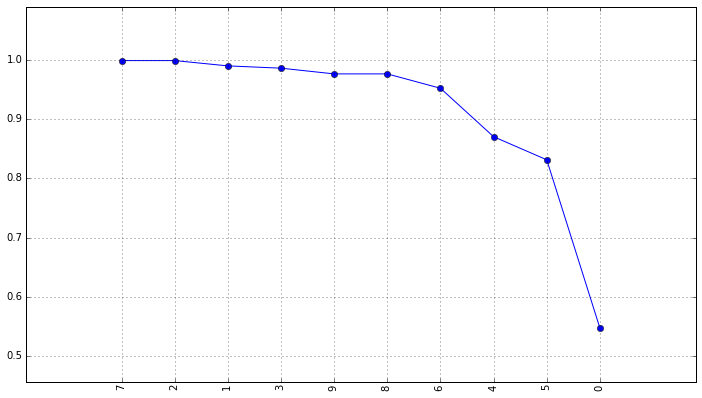

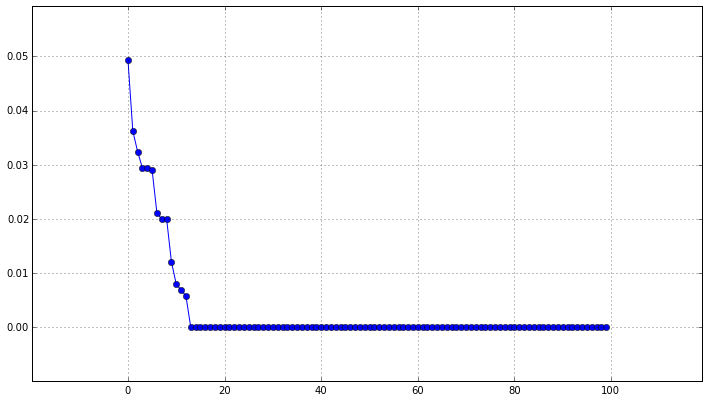

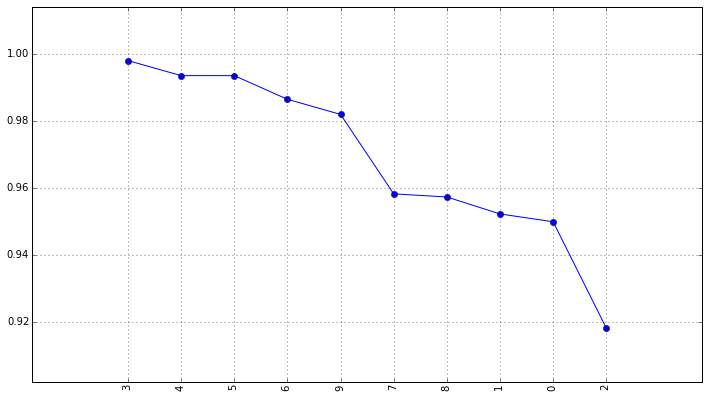

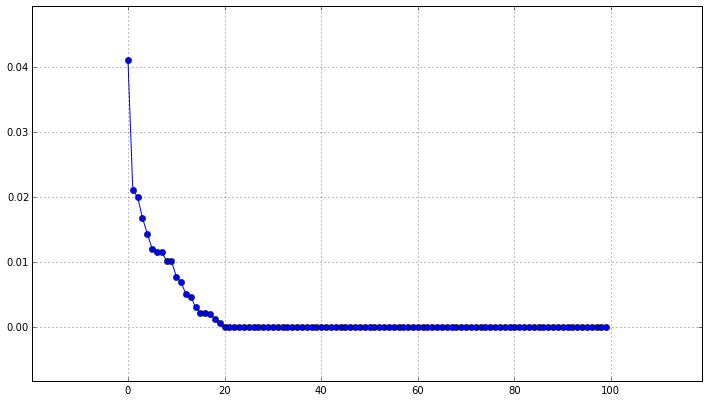

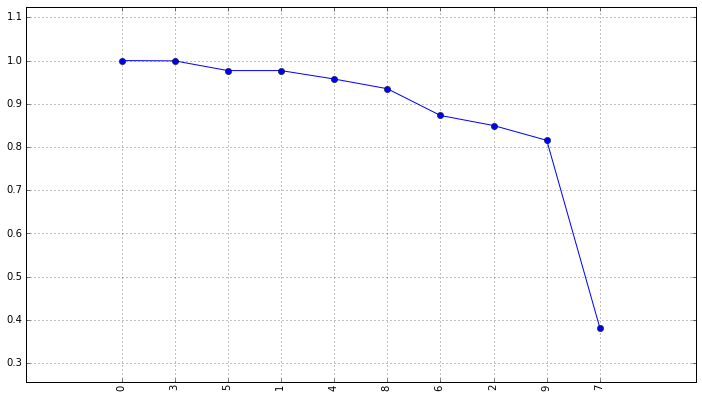

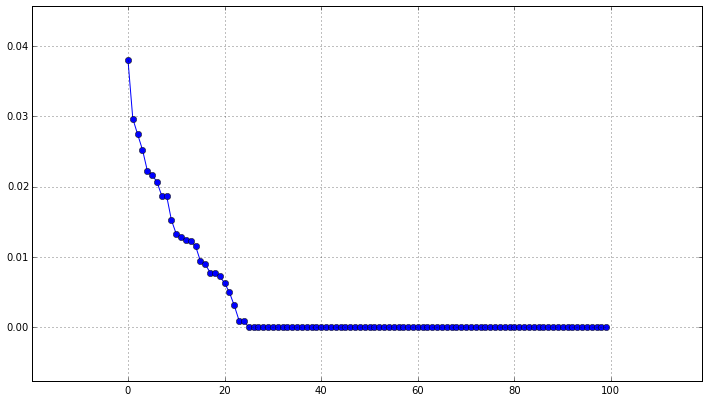

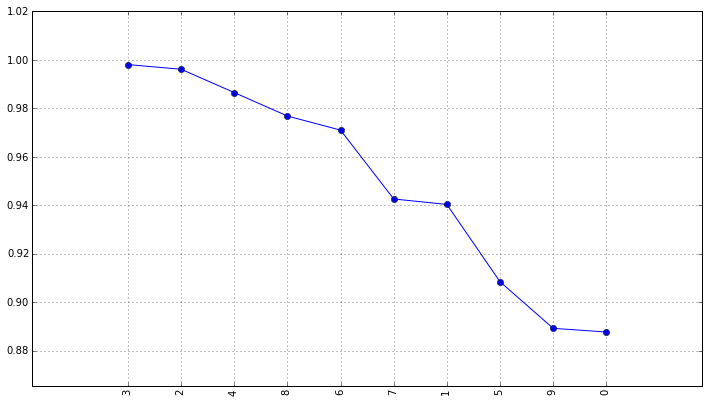

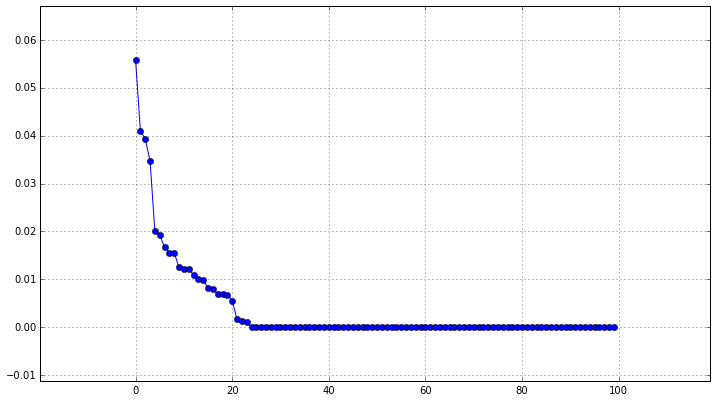

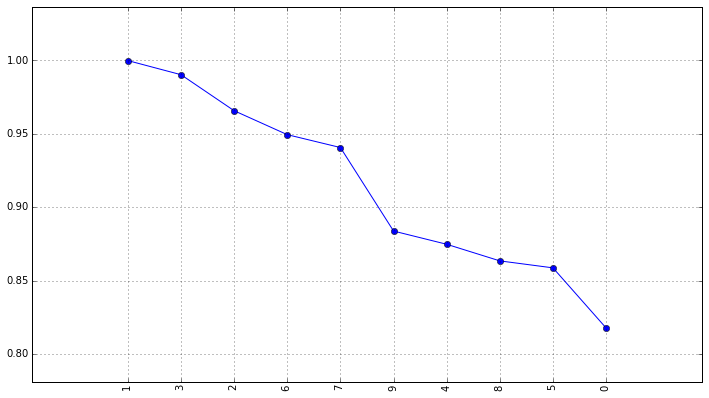

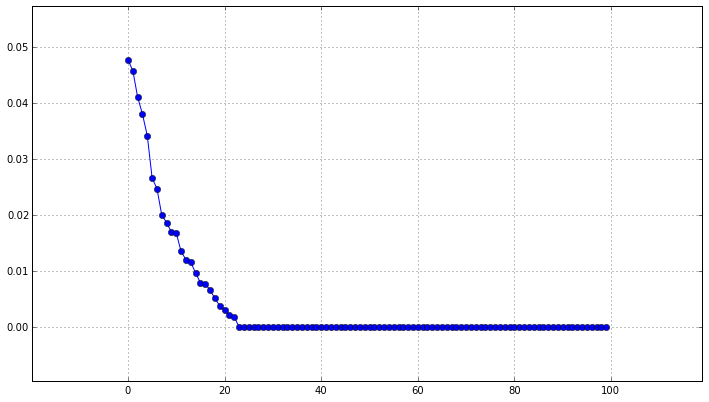

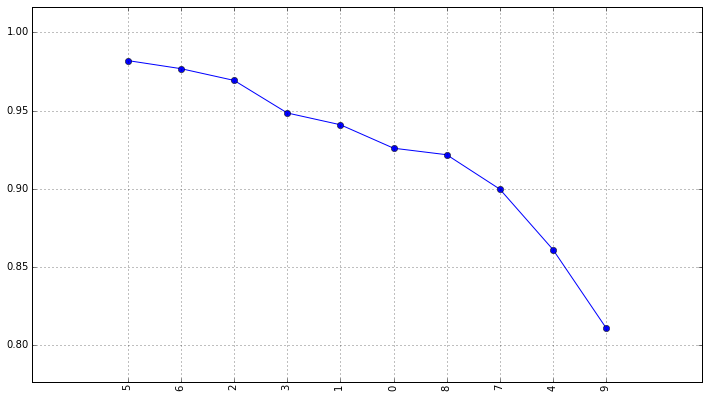

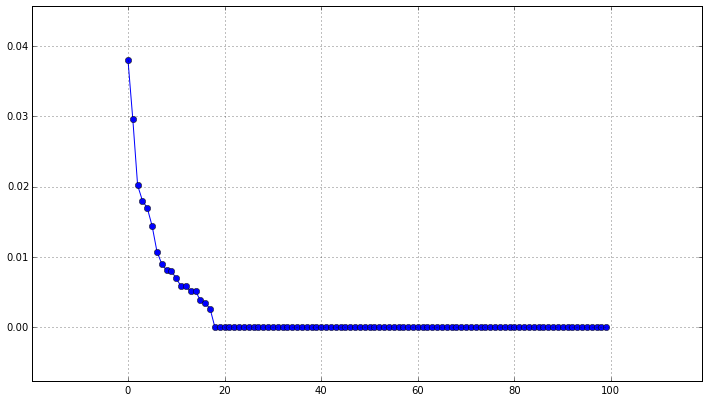

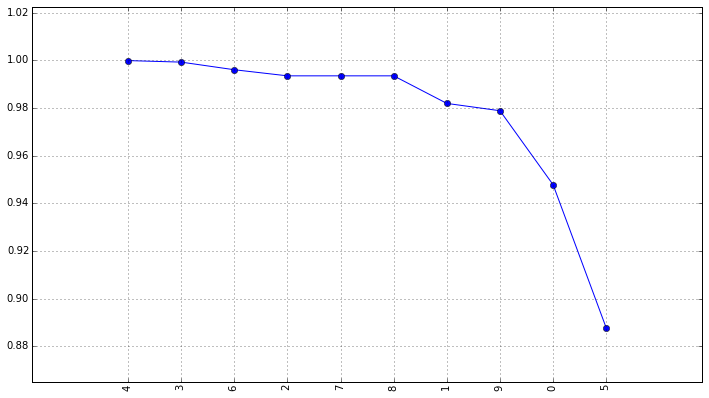

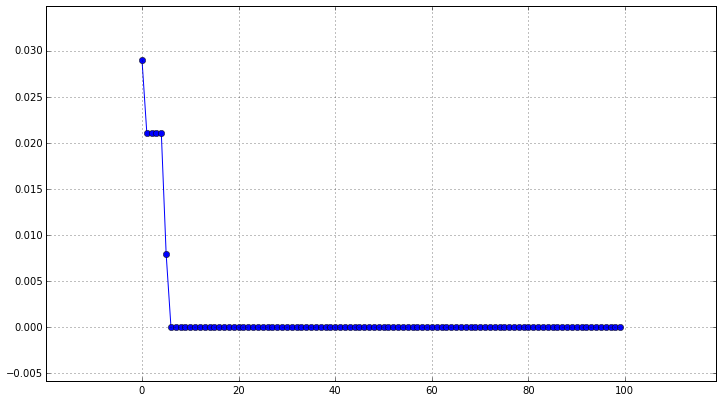

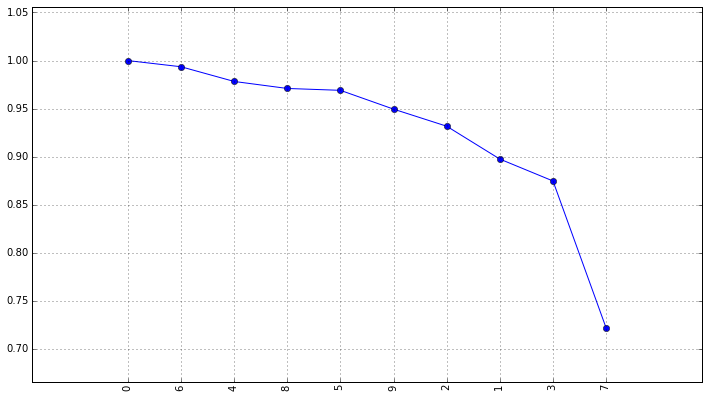

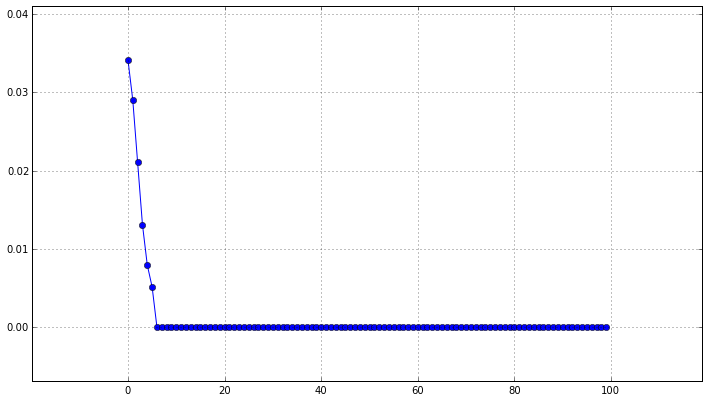

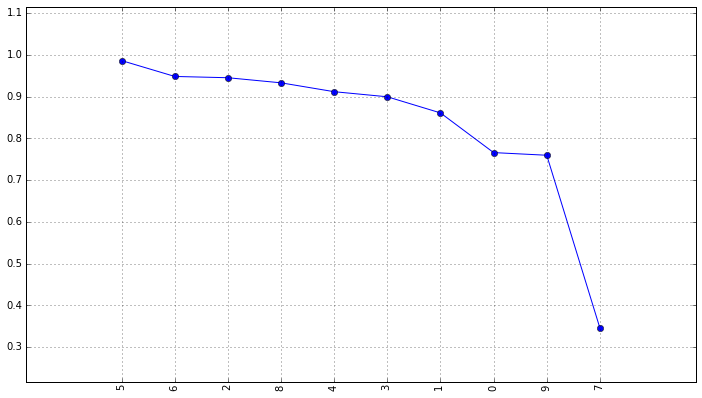

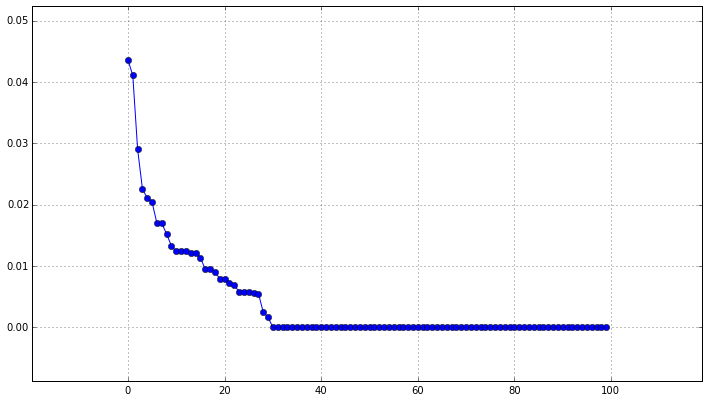

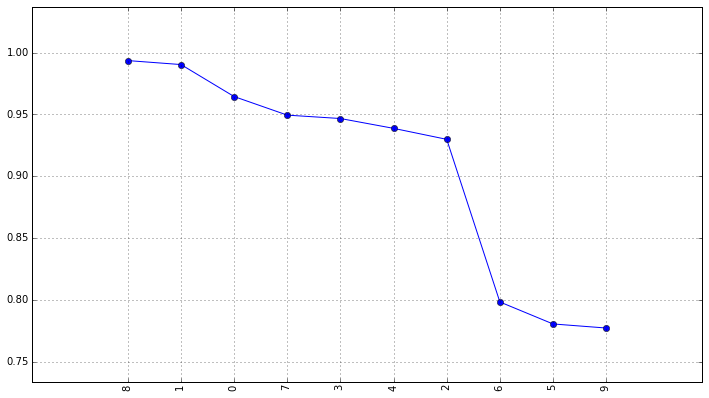

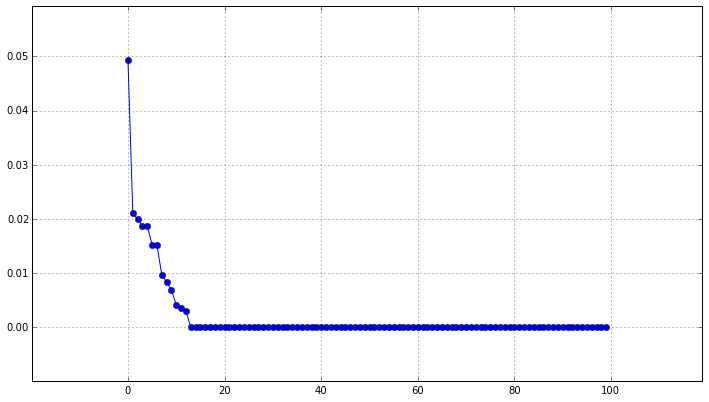

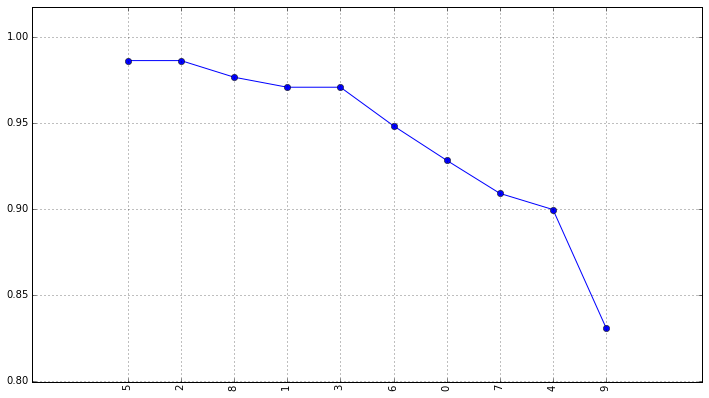

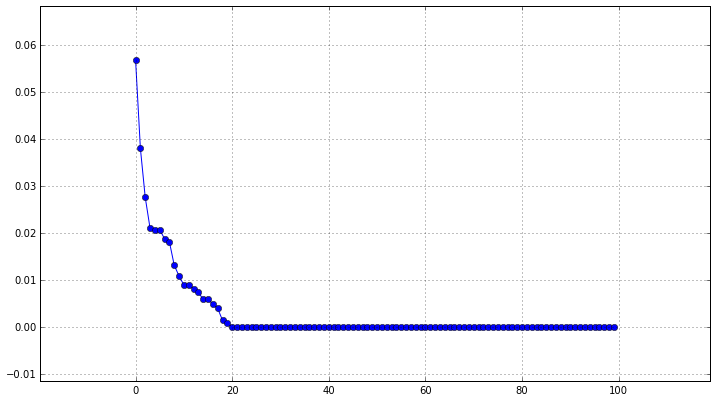

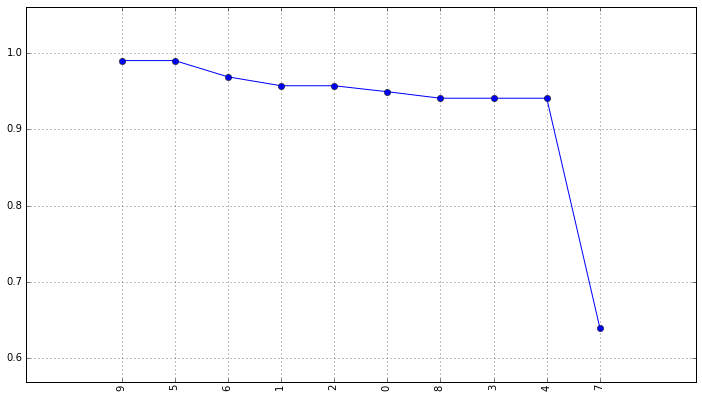

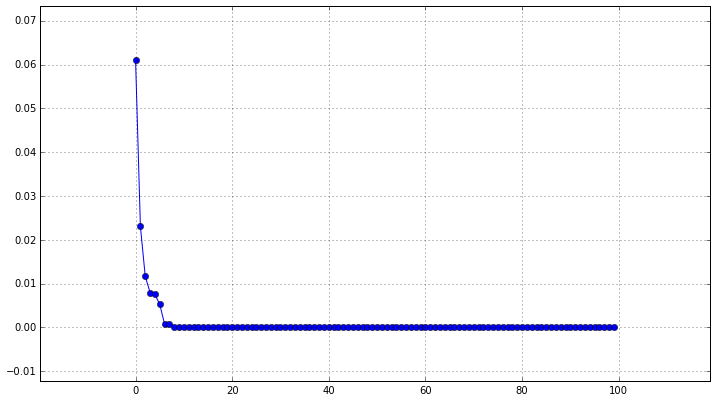

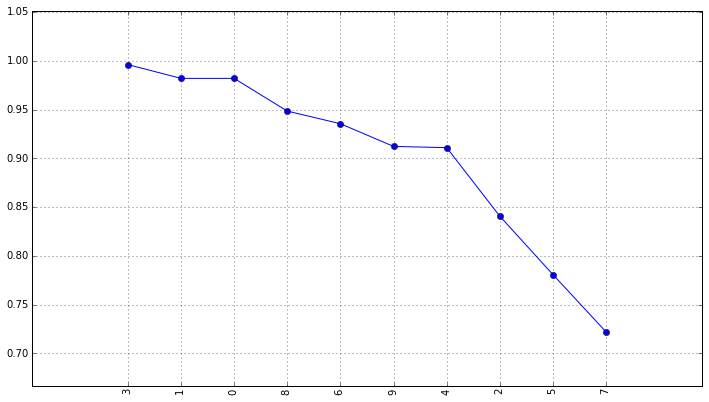

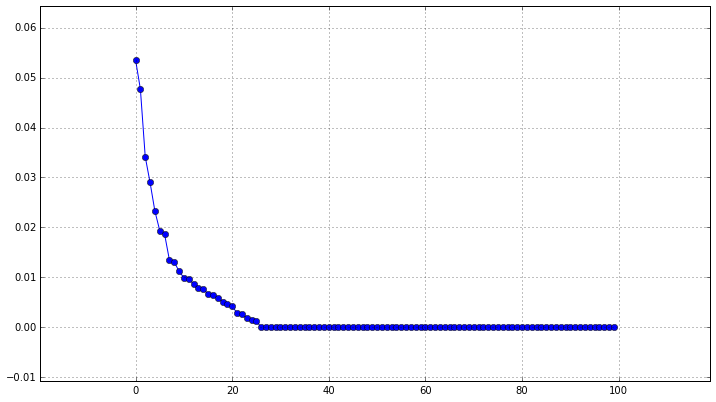

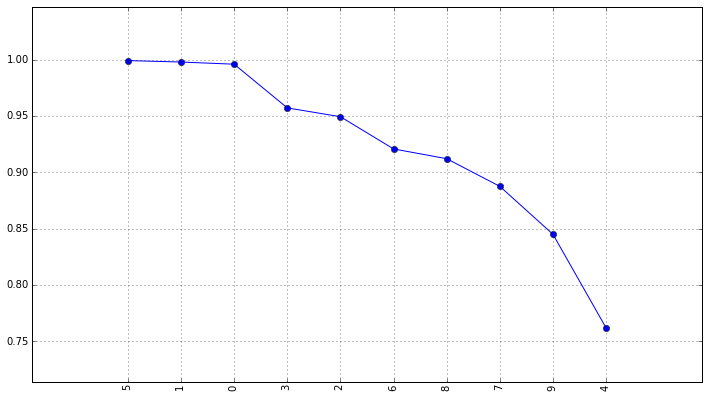

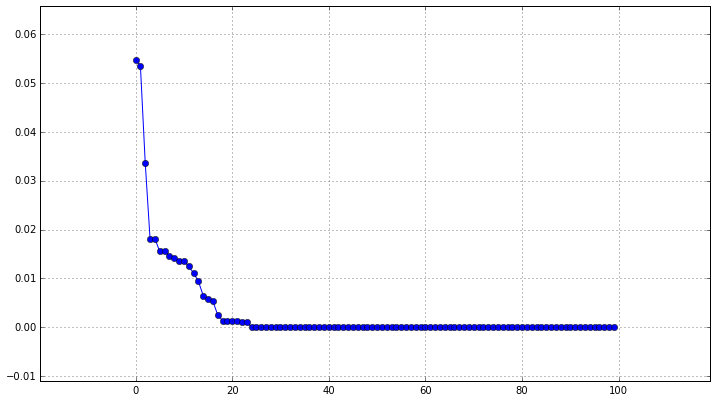

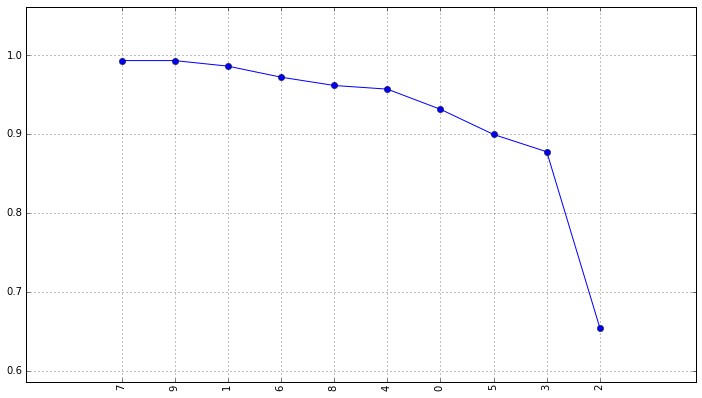

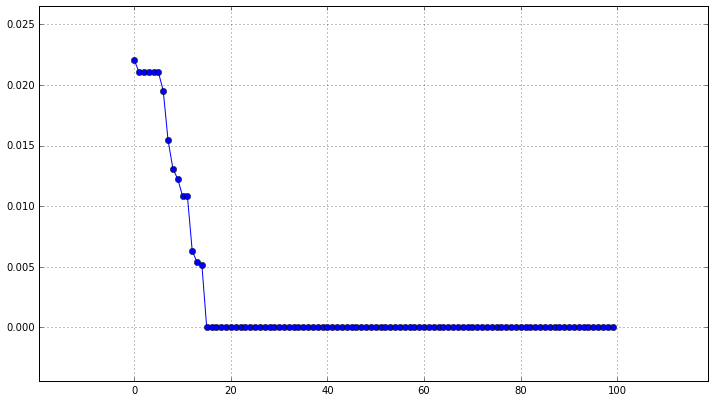

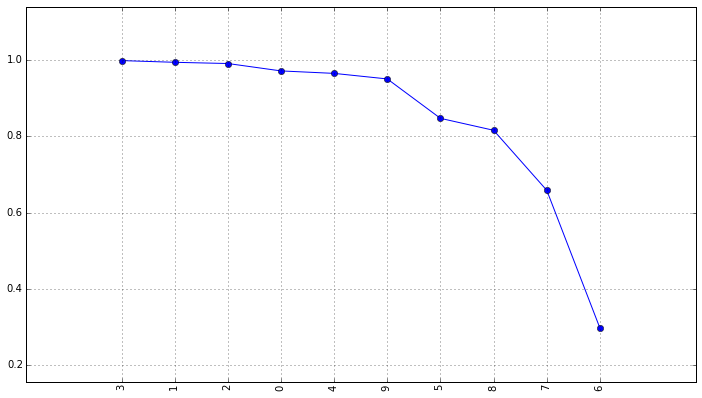

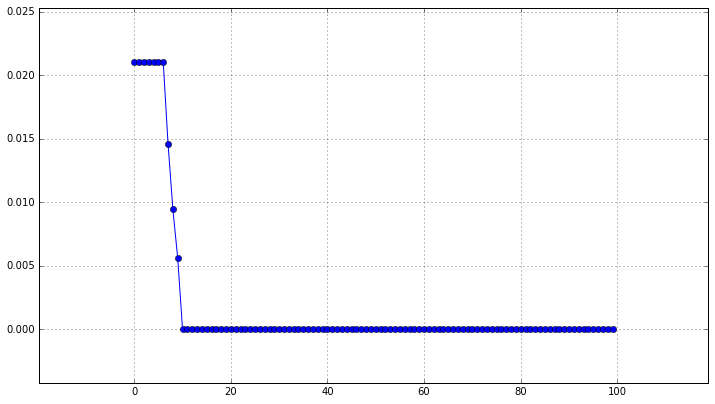

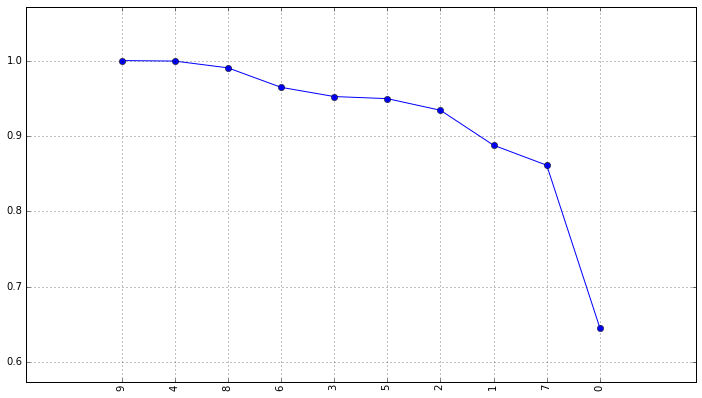

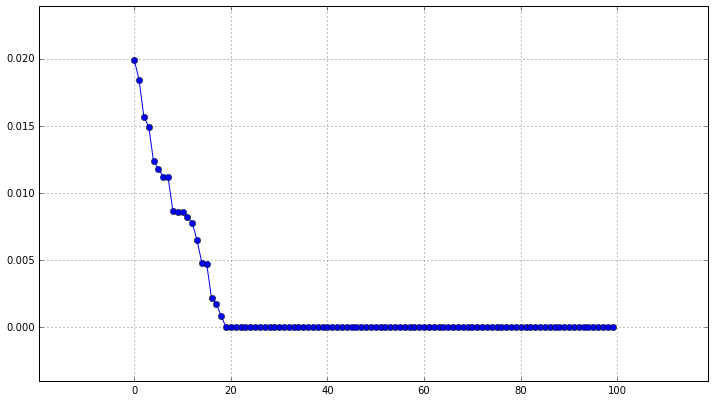

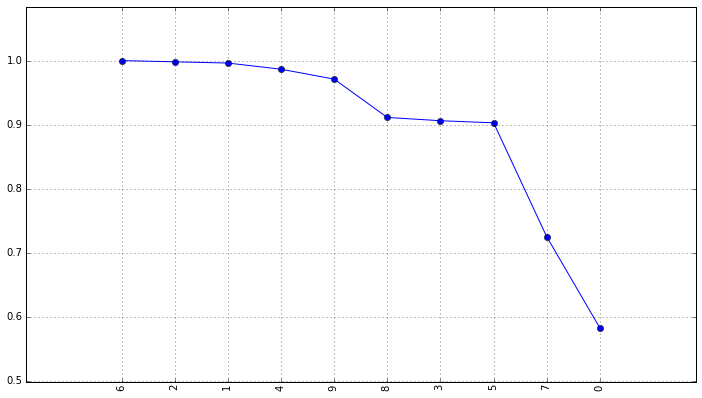

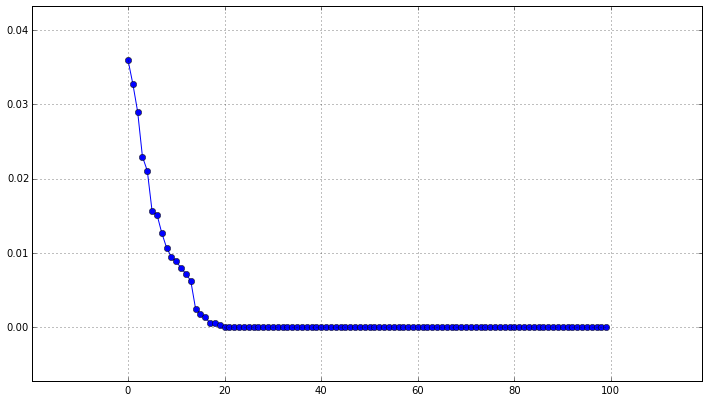

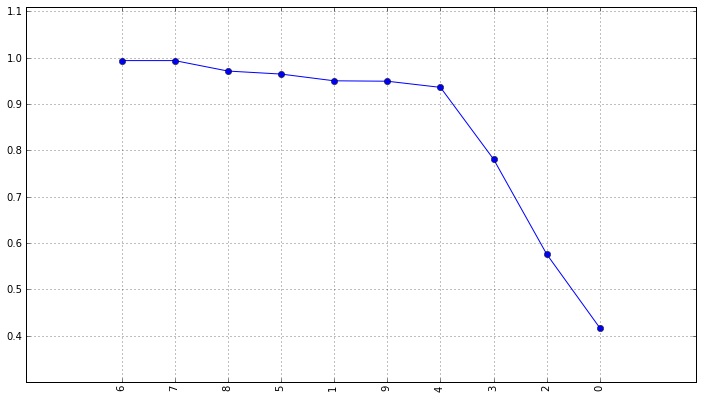

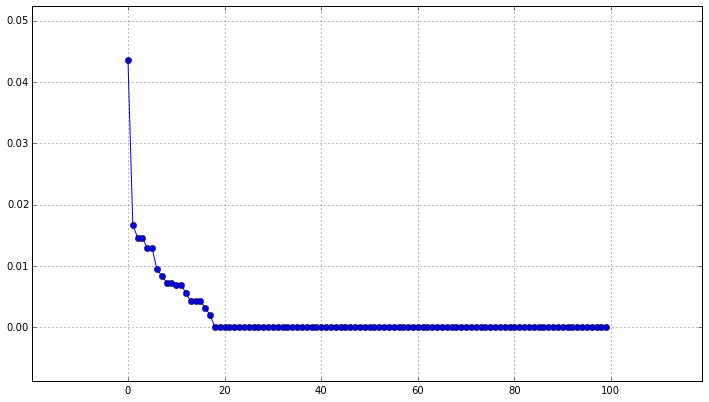

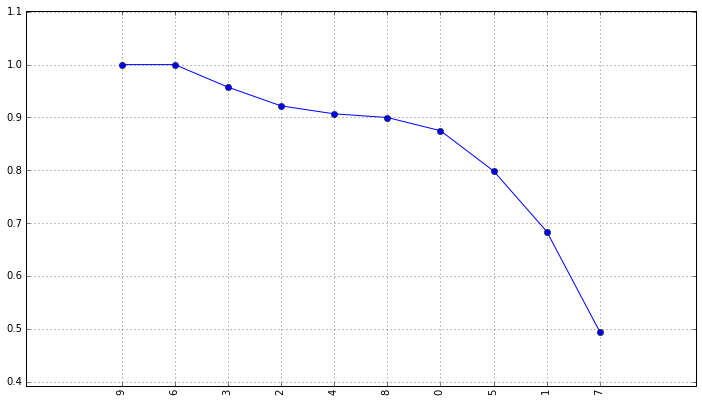

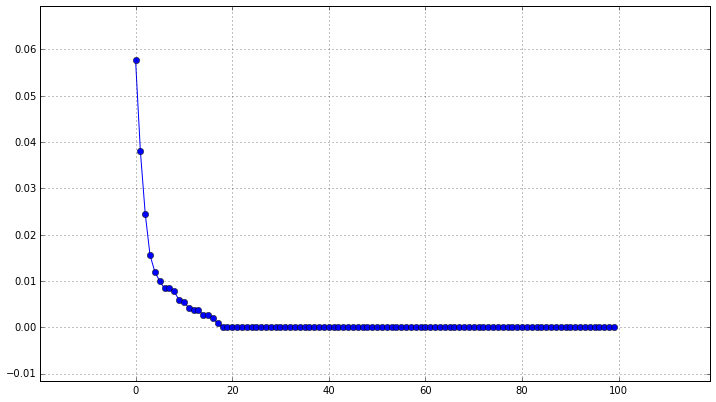

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import info_dyn as info

import sys
import os
import random as ran
from math import log
from optparse import OptionParser, OptionGroup
from scipy import *
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import defaultdict
import operator
import draw_plots
from collections import OrderedDict

import input_net as inet
import updating_rule as ur
import time_evol as tev
import info_dyn as info
#%matplotlib inline

print 'Start'

N_nodes = 10.
iterations = int(10000)  # Note 1e5 gives similar results to 1e6 but way slower

# Make BA network
m = 1  # minimum number of connectivities in BA network
net = nx.barabasi_albert_graph(N_nodes,m)
degree = net.degree()
k_avg = np.mean(degree.values())

# Create Temp and Energy arrays
Temp = np.arange(0,20)/2.
Temp[0] = 1e-6
avg_E = []

TE_Temp = []
AI_Temp = []

for T in Temp:
    
    print 'Temperature:',T
    folder = 'temp_%d_nodes_%d_longtime_short'%(int(T),int(N_nodes))
    !mkdir /Users/jakehanson/Desktop/InfoResults/"$folder"
    
    T_c = k_avg/4.*np.log(N_nodes)  # Predicted Critial Temp. (Approx)
    #T_c = m/2.*np.log(N_nodes)  # Predicted Critical Temp. Where did I get this?

    # Calculate TE and AI 10x for each temp
    TE_array = []
    AI_array = []
    for i in range(10):
        print 'Trial:',i

        # Initialize cube to store data
        cube = np.zeros((N_nodes,iterations))

        # Initialize spins
        for u in range(0,int(N_nodes)):
            cube[u,0] = 1.  # Spinz Up

        # Build data cube in Ising Model
        for i in range(1,iterations):

            # First we copy all nodes to the next state
            for j in range(0,int(N_nodes)):
                cube[j,i] = cube[j,i-1]

            # Choose a node
            node = np.random.randint(0,N_nodes)

            # Do we flip?
            E = 0.

            for each in net.neighbors(node):
                E += 1.0 * cube[each,i-1]  # Sum of nearest neighbors in previous state

            E = -cube[node,i-1]*E  # Energy of node in previous state

            # What Happens Next??
            if E > 0.:
                cube[node,i] = -cube[node,i-1]  # Flip Current Spin if Old Energy is positive
            if E <= 0.:
                r = np.random.random()
                if r <= np.exp(2.*E/T):          # Maybe Flip Spin (accounts for entopy considerations)
                    cube[node,i] = -cube[node,i-1]

        for xx in range(cube.shape[0]):
            for yy in range(cube.shape[1]):
                if cube[xx,yy] == -1.:
                    cube[xx,yy] = 0

                if cube[xx,yy] == 1.:
                    cube[xx,yy] = 1

        # Create Data Structure
        timeseriesdata = {}
        for x in net.nodes():
            timeseriesdata[x] = {}
            for y in range(1):
#                timeseriesdata[x][y] = cube[x,:].tolist()
                timeseriesdata[x][y] = cube[x,9900:9999].tolist()  # Only get info for last 100 steps
    

        historyLength = 4
        maxStep = iterations
        Nbr_States = 2

        ## 6-3. For a particular initial network state

        ## 6-3-a. To compute AI
        result_ai_one = open('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-step%d-trans0-h%d.dat'%(maxStep, historyLength),'w')
        AI_one = {}
        for n in net.nodes():
            AI_one[n] = info.compute_AI(timeseriesdata[n], historyLength, 1, Nbr_States)
            result_ai_one.write('%s\t%f\n'%(n, AI_one[n]))

        ## 6-3-b. To compute TE
        result_te_one = open('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-step%d-trans0-h%d.dat'%(maxStep, historyLength),'w')
        TE_one =  defaultdict(float)
        for v in net.nodes():
        #    for n in nodes_list:
            for n in net.nodes():
                TE_one[(v, n)] = info.compute_TE(timeseriesdata[v], timeseriesdata[n], historyLength, 1, Nbr_States)
                result_te_one.write('%s\t%s\t%f\n'%(v, n,TE_one[(v, n)] ))

        ## 6-3-c. Scale behavior for AI (optional)
        result_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength)
        viz_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.pdf'%(maxStep, historyLength)
        draw_plots.plot_AI_scale(AI_one, result_file_name, viz_file_name) ### plot and result file for AI scale

        ## 6-3-d. Scale behavior for TE (optional)
        result_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength)
        viz_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.pdf'%(maxStep, historyLength)
        draw_plots.plot_TE_scale(TE_one, result_file_name, viz_file_name) ### plot and result file for TE scale

        ai_data = np.loadtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)



        # Calculate Total TE and AI for given hist length, num nodes, and temperature
    #    print 'Temperature = ',T
    #    print 'History Length',historyLength
        AI = np.sum(ai_data[:,1])
        print 'Active Info',AI
        AI_array.append(AI)

        te_data = np.genfromtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)

        TE = np.sum(te_data[:,2])
        print 'Transfer Entropy',TE
        TE_array.append(TE)

    print 'Average AI =',np.mean(AI_array)
    print 'Average TE =',np.mean(TE_array)
    AI_Temp.append(np.mean(AI_array))
    TE_Temp.append(np.mean(TE_array))

print 'Done'

### Make Final TE and AI Plots

1.03616329185
Temperature: 1e-06
Temperature: 0.5
Temperature: 1.0
Temperature: 1.5
Temperature: 2.0
Temperature: 2.5
Temperature: 3.0
Temperature: 3.5
Temperature: 4.0
Temperature: 4.5
Temperature: 5.0
Temperature: 5.5
Temperature: 6.0
Temperature: 6.5
Temperature: 7.0
Temperature: 7.5
Temperature: 8.0
Temperature: 8.5
Temperature: 9.0
Temperature: 9.5


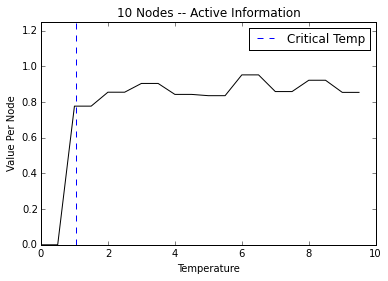

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Create Temp and Energy arrays
Temp = np.arange(0,20)/2.
Temp[0] = 1e-6
avg_E = []

# Constants
iterations = int(10000)  # Note 1e5 gives similar results to 1e6 but way slower
N_nodes = 10
historyLength = 4
maxStep = iterations
Nbr_States = 2

m = 1  # minimum number of connectivities in BA network

# Make BA network
net = nx.barabasi_albert_graph(N_nodes,m)

# Calculate network properties
degree = net.degree()
k_avg = np.mean(degree.values())
T_c = k_avg/4.*np.log(N_nodes)  # Predicted Critial Temp. (Approx)
print T_c

# Array to hold AI and TE as a function of Temp
AI_Temp = []
TE_Temp = []

# Calculate Total AI and TE for each temp
for T in Temp:
    
    print 'Temperature:',T
    folder = 'temp_%d_nodes_%d_longtime_short'%(int(T),int(N_nodes))
    
    ai_data = np.loadtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)
    te_data = np.genfromtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)

    AI = np.sum(ai_data[:,1])
    AI_Temp.append(AI)

    TE = np.sum(te_data[:,2])
    TE_Temp.append(TE)  
    

TE_Temp = TE_Temp/np.asarray(10.)
AI_Temp = AI_Temp/np.asarray(10.)
plt.plot(Temp,AI_Temp,color ='k')
plt.title('10 Nodes -- Active Information')
plt.xlabel('Temperature')
plt.ylabel('Value Per Node')
plt.ylim([0,1.25])
plt.axvline(T_c,label = 'Critical Temp',linestyle='--')
#plt.subplot(211)
#plt.plot(Temp,TE_Temp,color = 'k')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/AI_10000steps_last100_10nodes.ps')
plt.show()





### Now repeat the simulation with 20 nodes rather than 10

Start
Temperature: 1e-06
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_0_nodes_20_longtime_short: File exists
Trial: 0
Active Info 0.0
Transfer Entropy 0.0
Trial: 1
Active Info 0.0
Transfer Entropy 0.0
Trial: 2
Active Info 0.0
Transfer Entropy 0.0
Average AI = 0.0
Average TE = 0.0
Temperature: 0.5
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_0_nodes_20_longtime_short: File exists
Trial: 0
Active Info 1.957162
Transfer Entropy 0.051273
Trial: 1
Active Info 1.914963
Transfer Entropy 0.036639
Trial: 2
Active Info 2.813245
Transfer Entropy 0.066117
Average AI = 2.22845666667
Average TE = 0.051343
Temperature: 1.0
Trial: 0
Active Info 12.513822
Transfer Entropy 1.582263
Trial: 1
Active Info 12.139577
Transfer Entropy 1.426488
Trial: 2
Active Info 8.410019
Transfer Entropy 0.767297
Average AI = 11.0211393333
Average TE = 1.25868266667
Temperature: 1.5
mkdir: /Users/jakehanson/Desktop/InfoResults/temp_1_nodes_20_longtime_short: File exists
Trial: 0
Active Info 16.251383
Transfer Entr

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


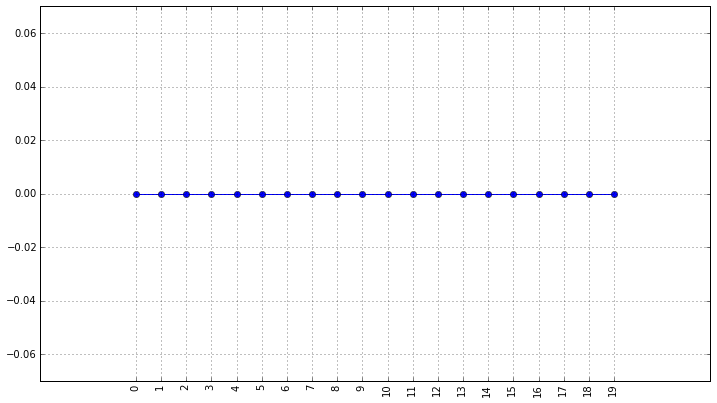

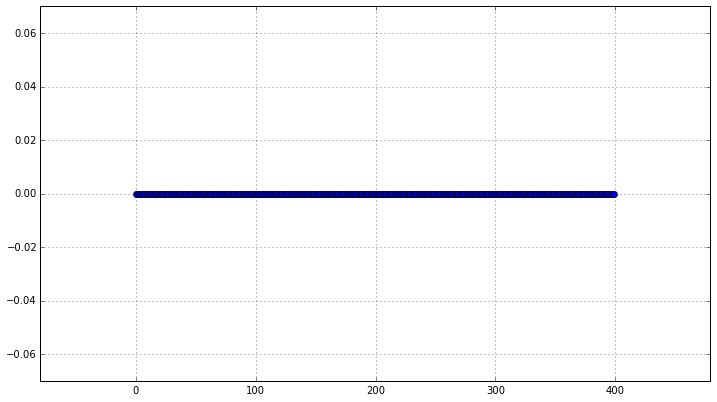

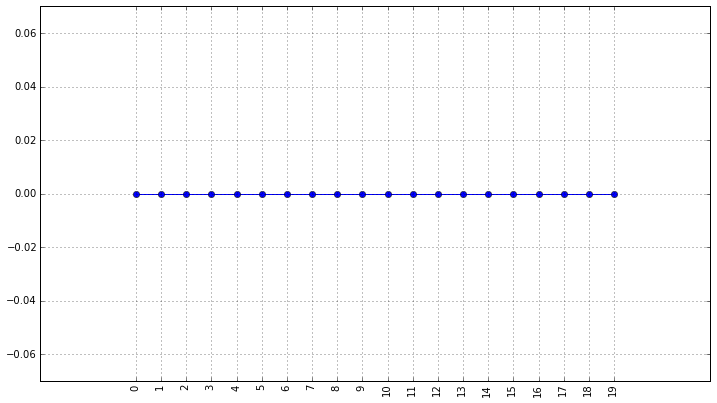

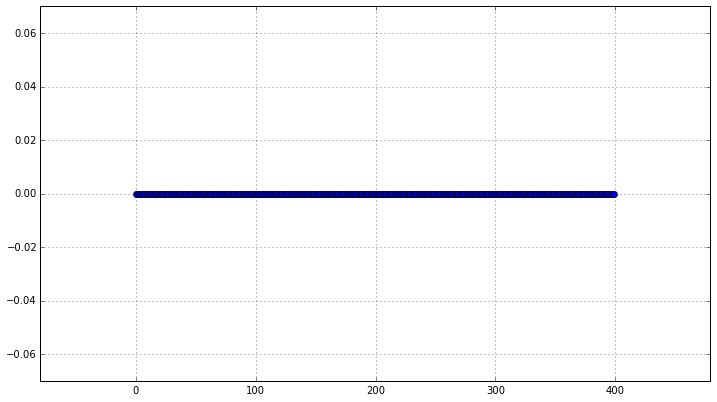

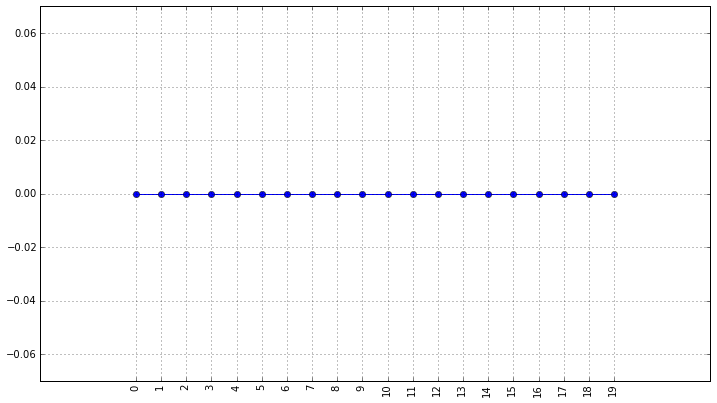

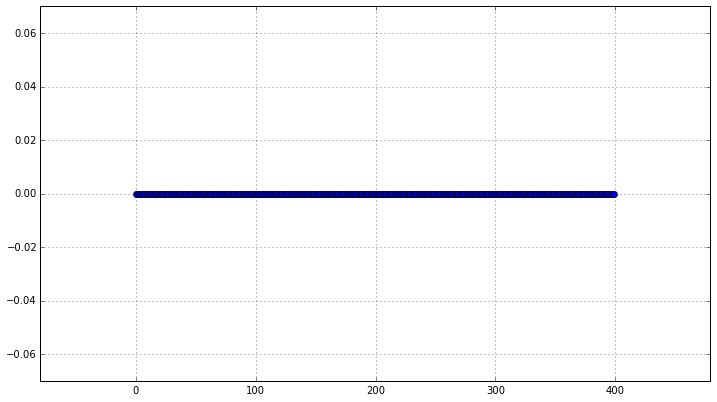

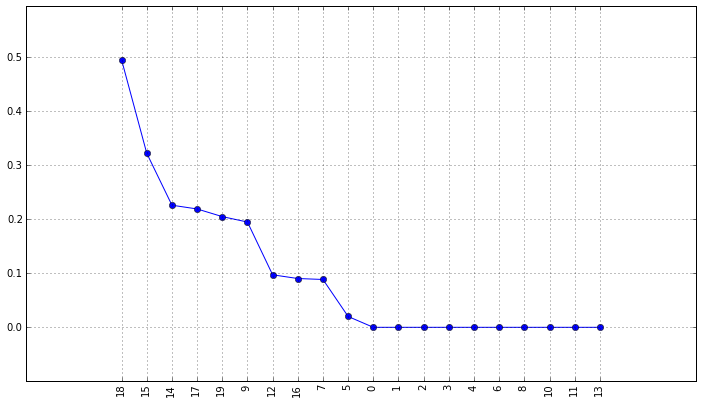

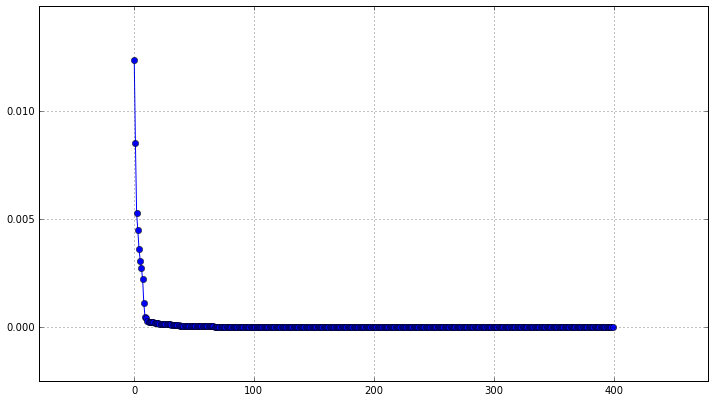

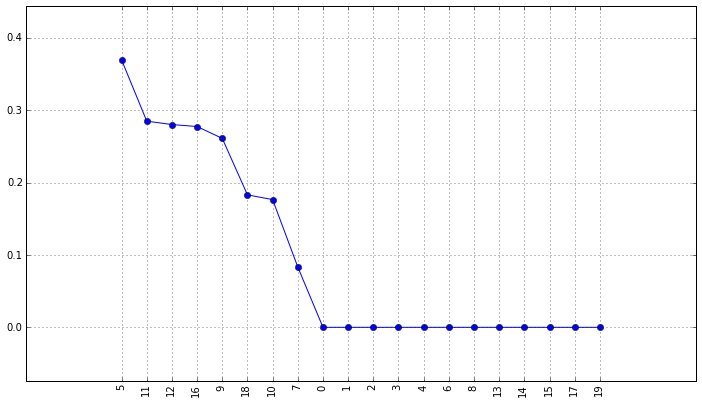

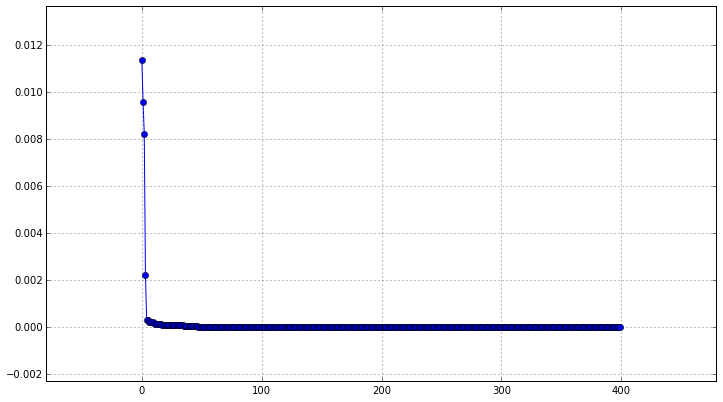

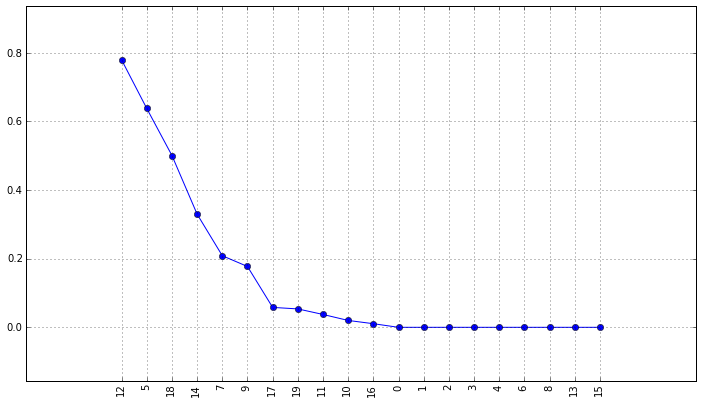

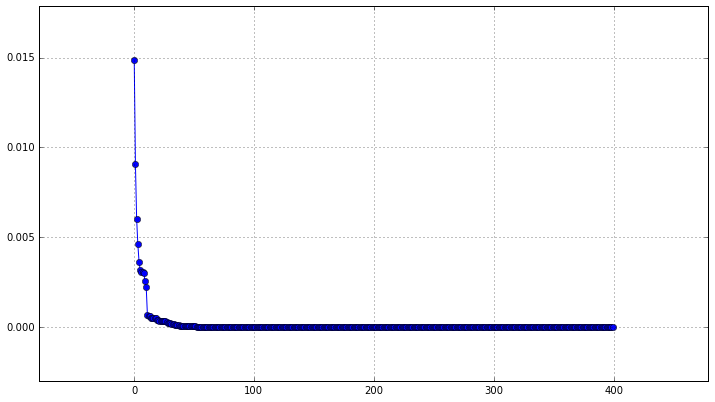

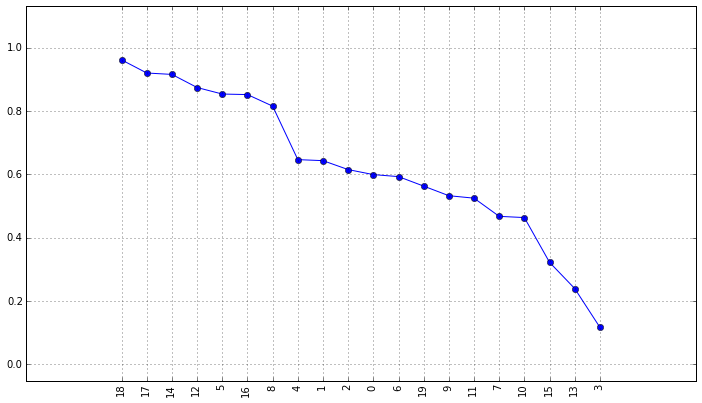

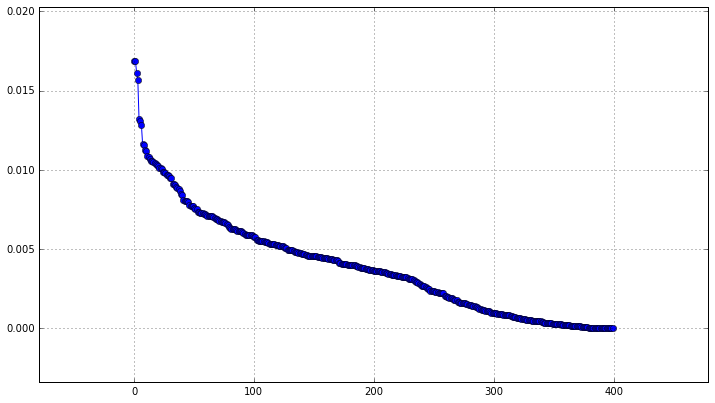

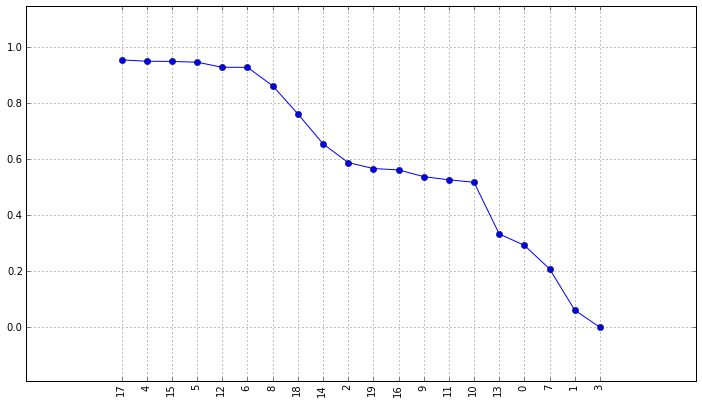

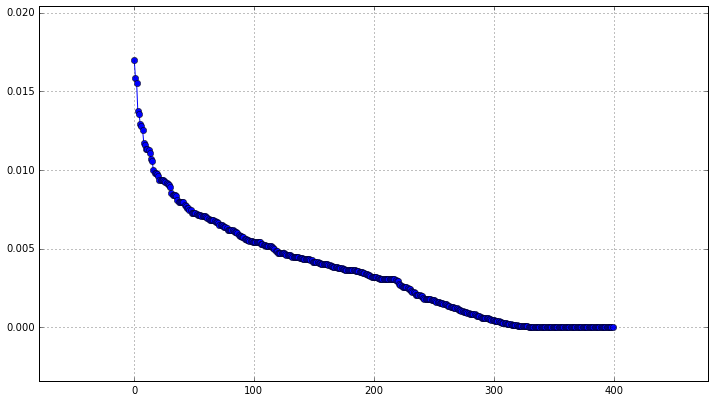

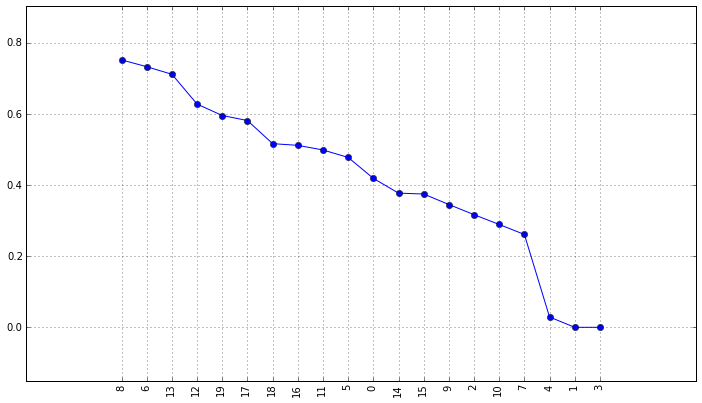

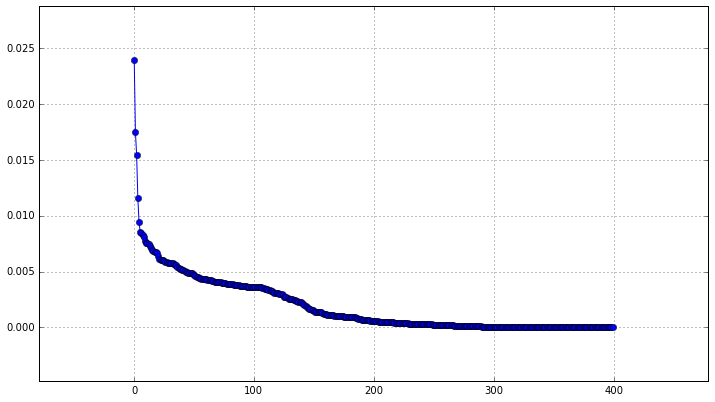

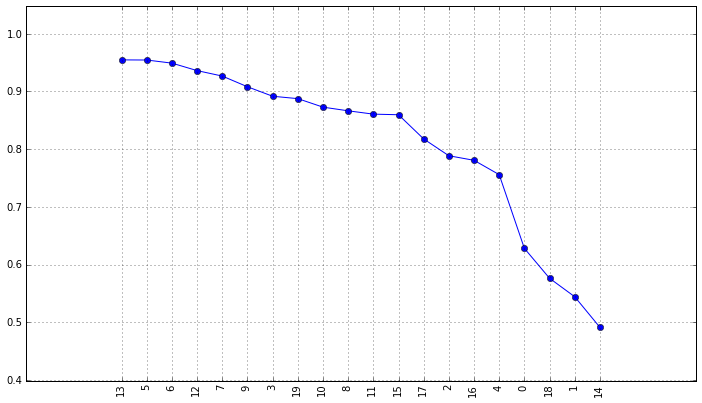

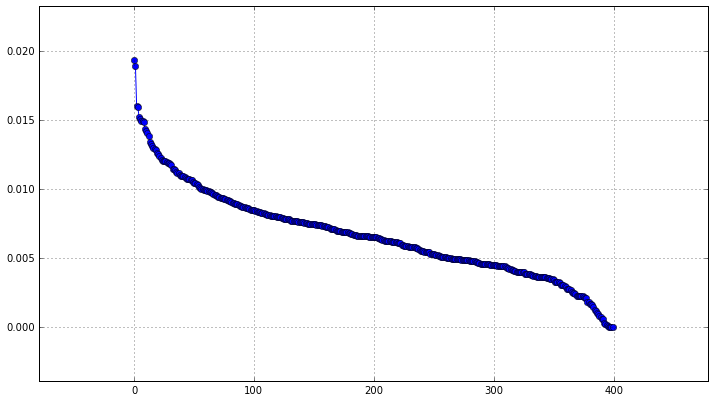

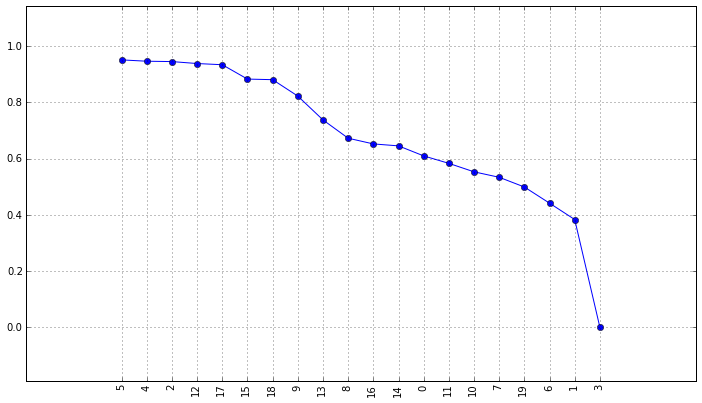

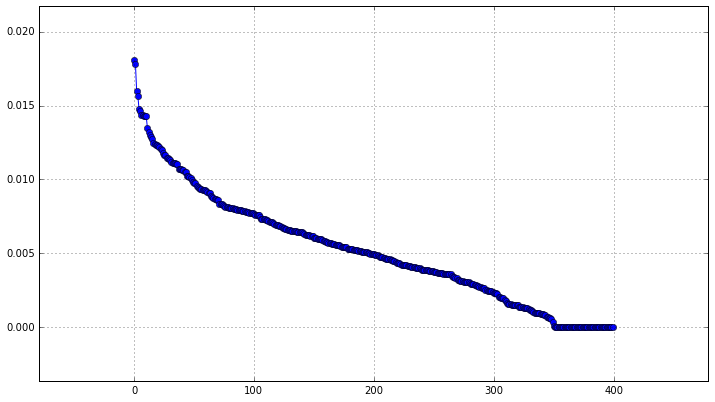

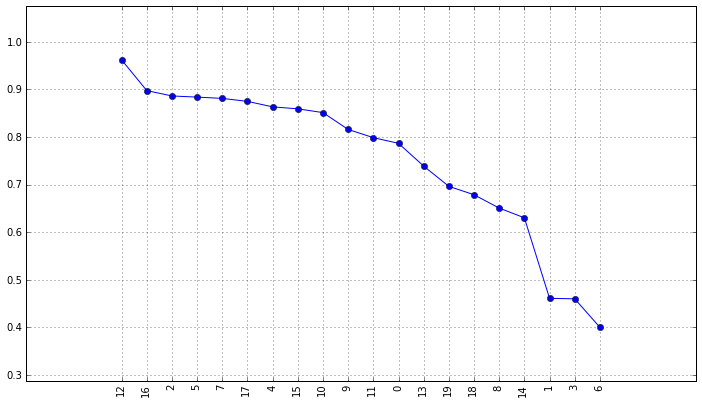

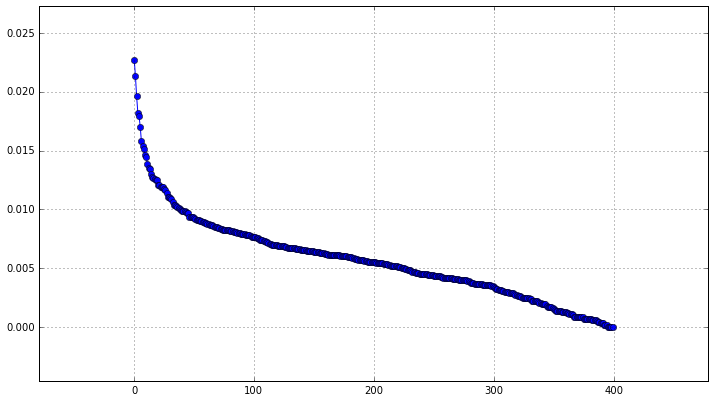

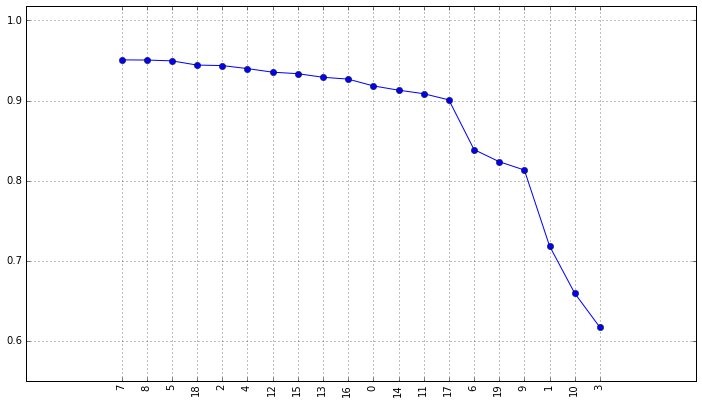

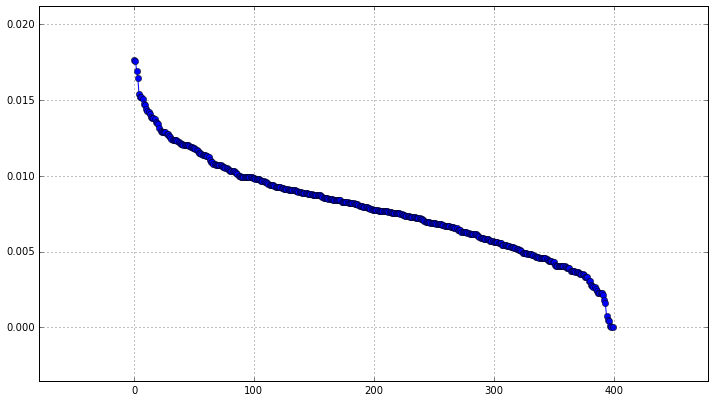

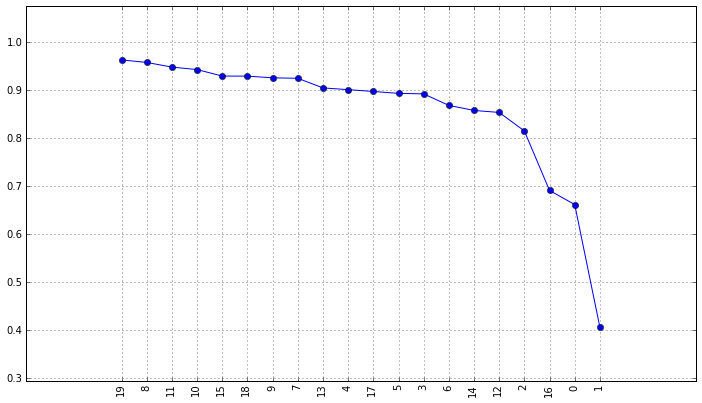

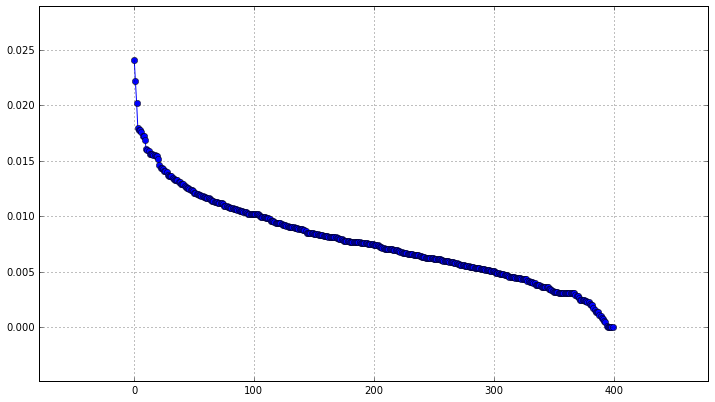

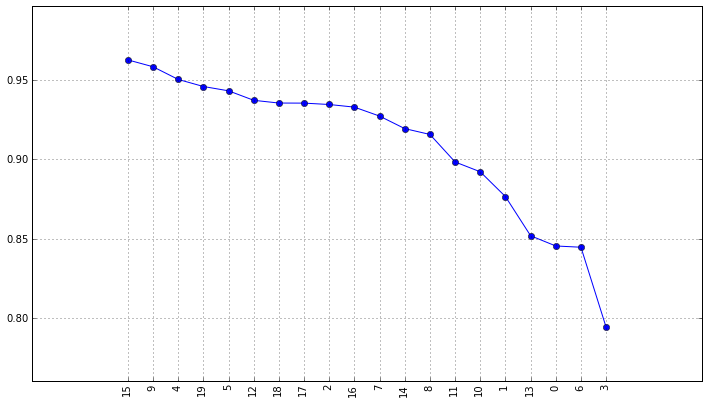

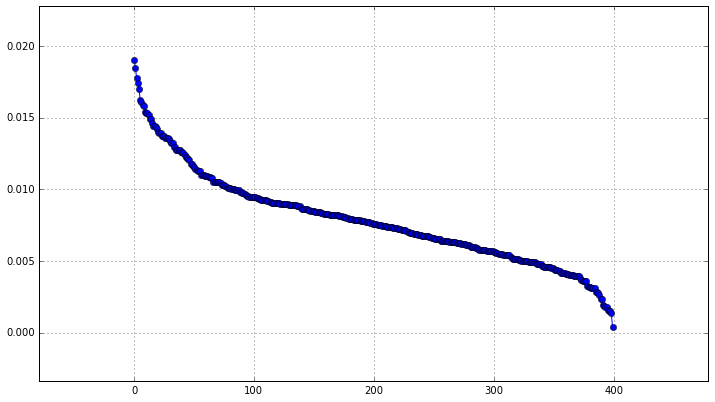

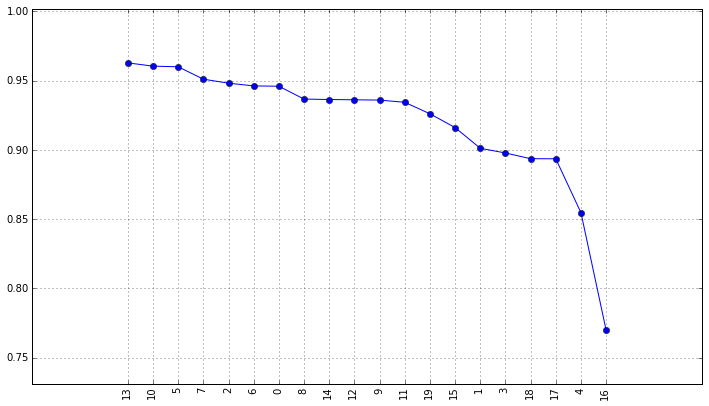

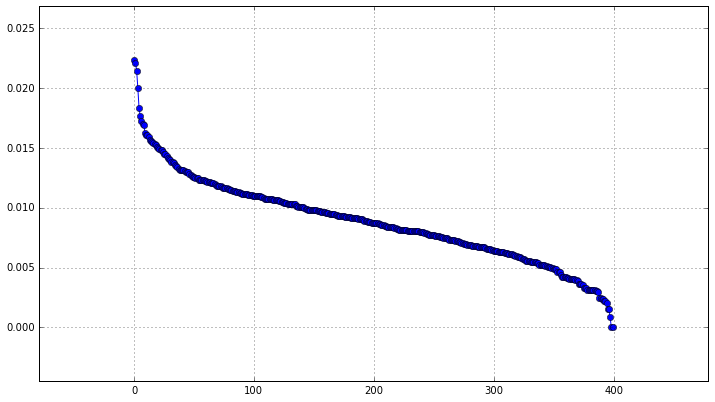

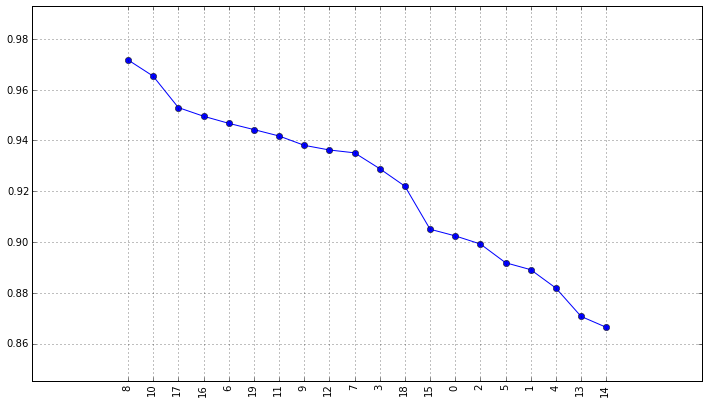

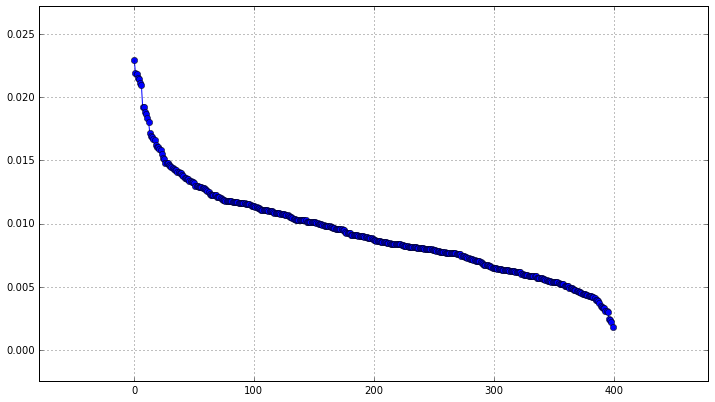

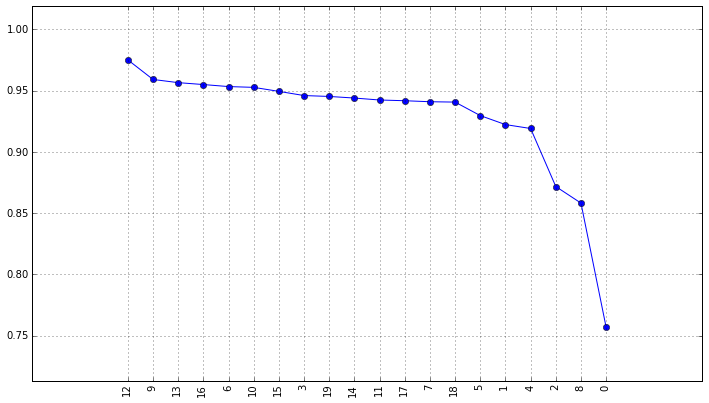

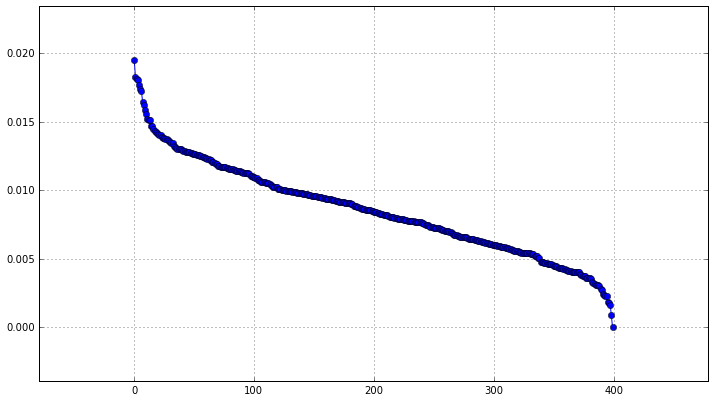

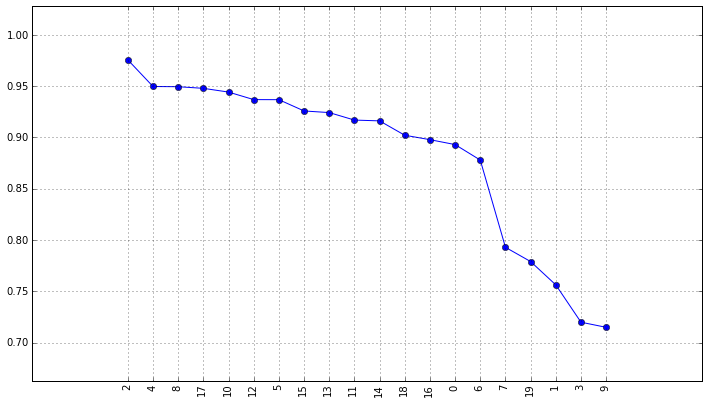

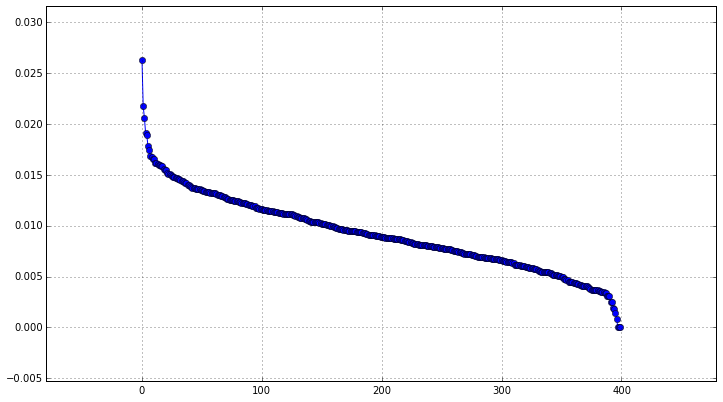

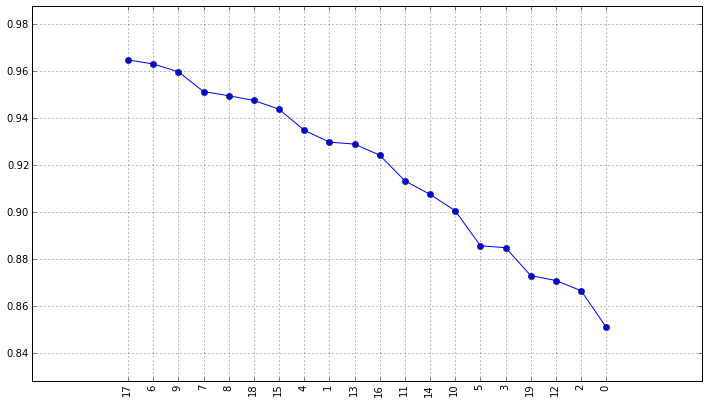

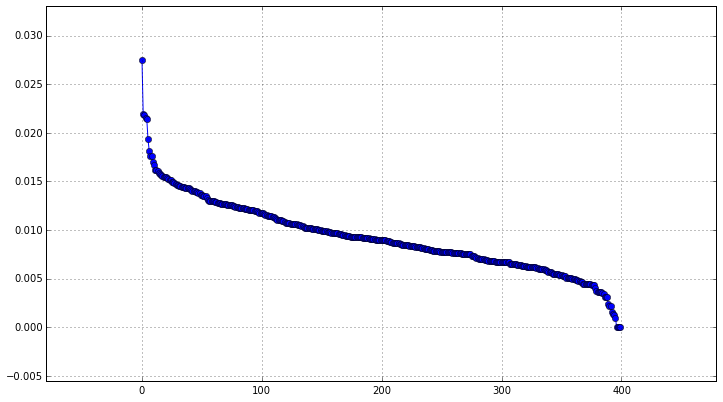

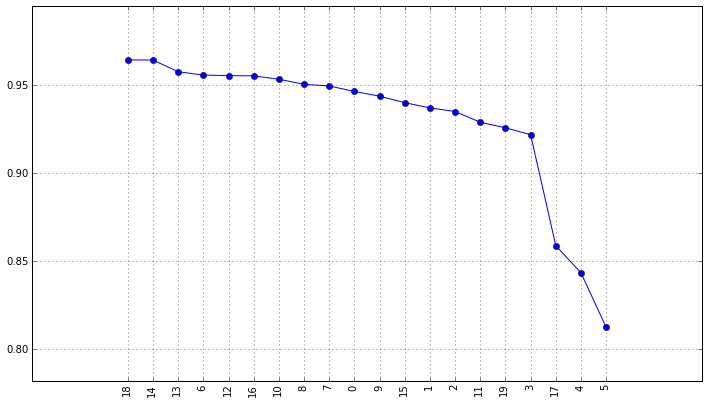

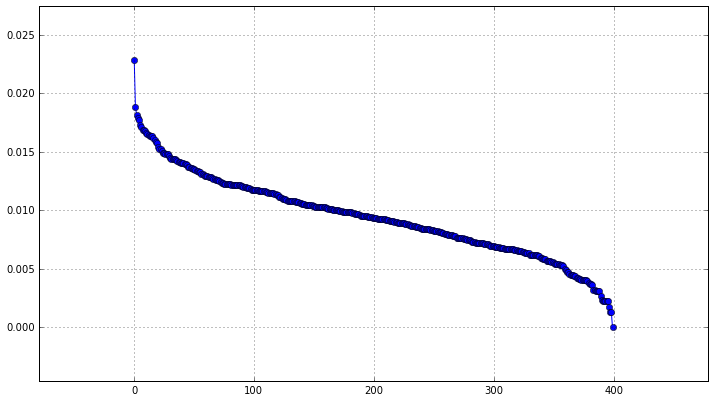

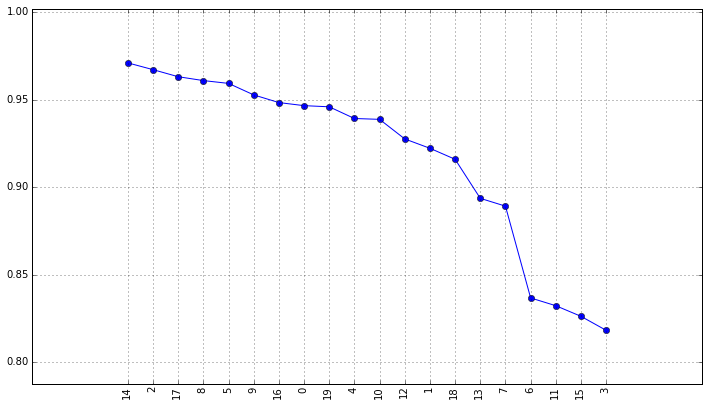

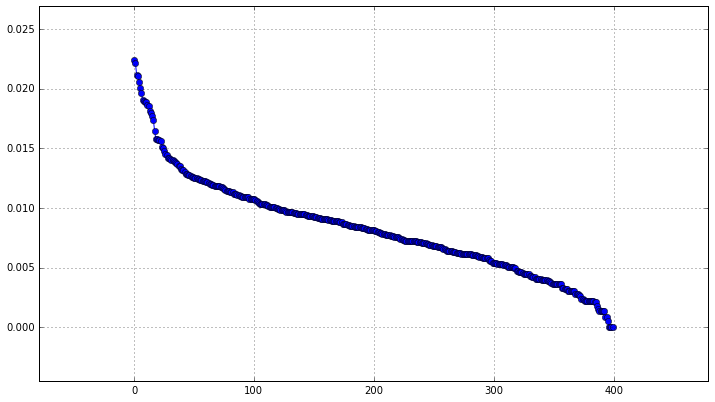

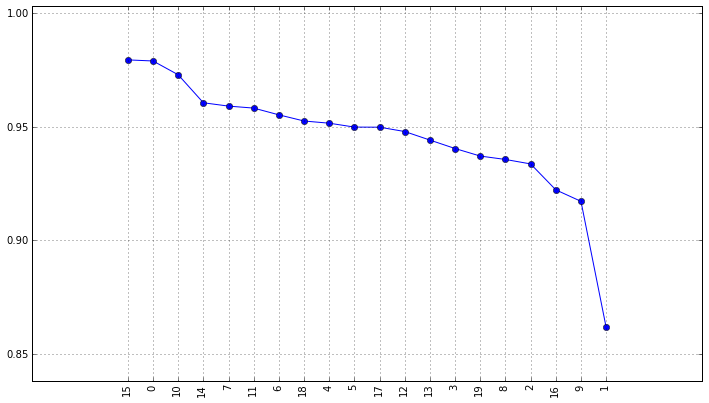

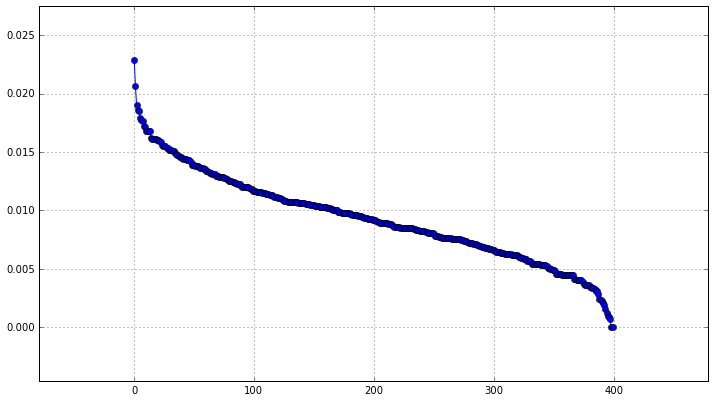

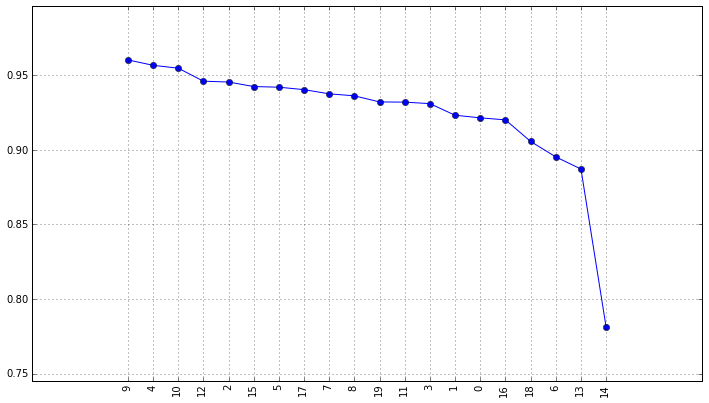

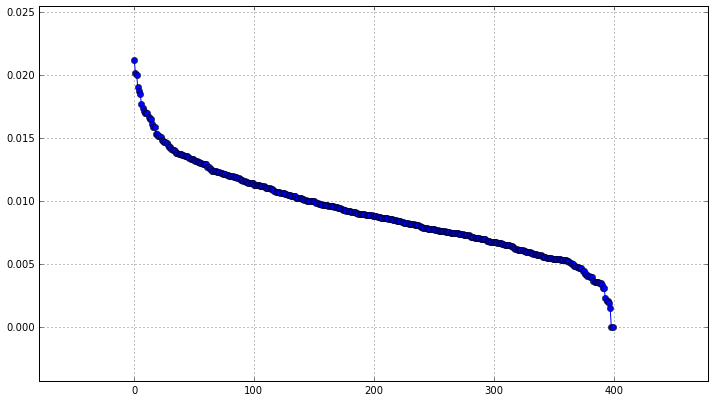

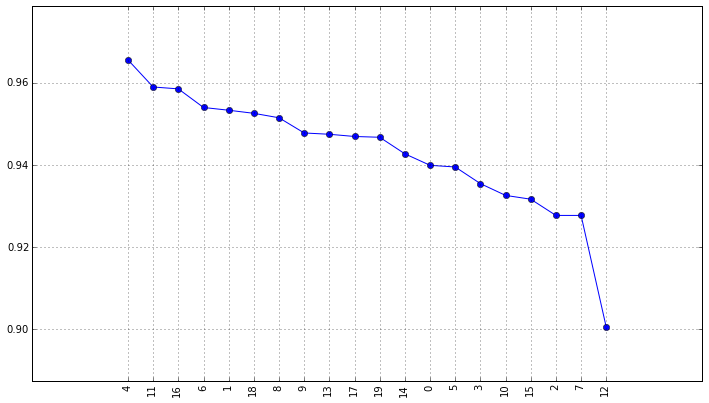

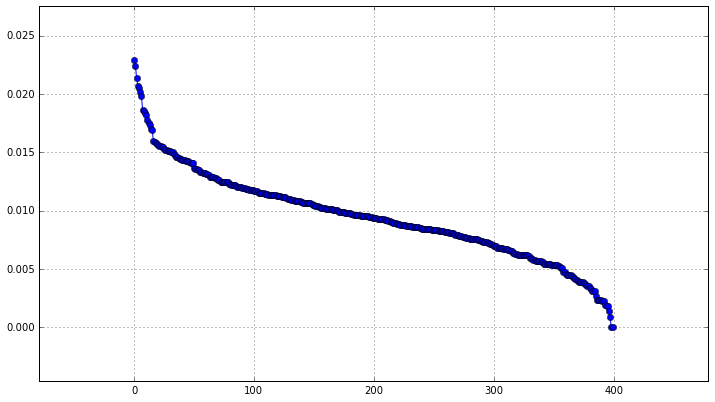

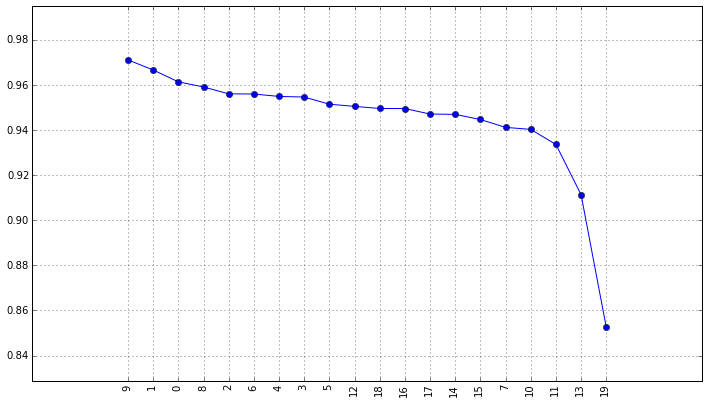

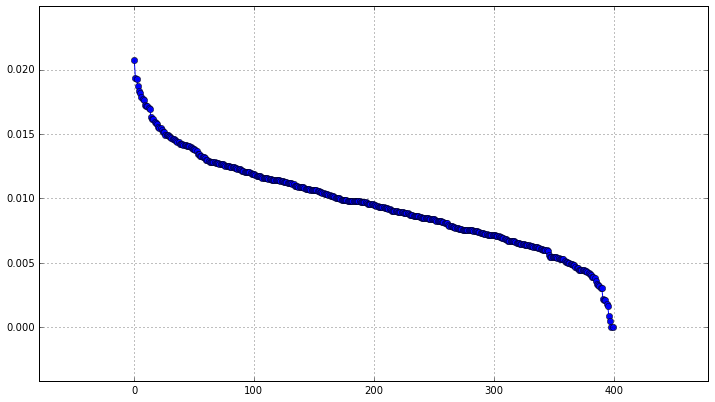

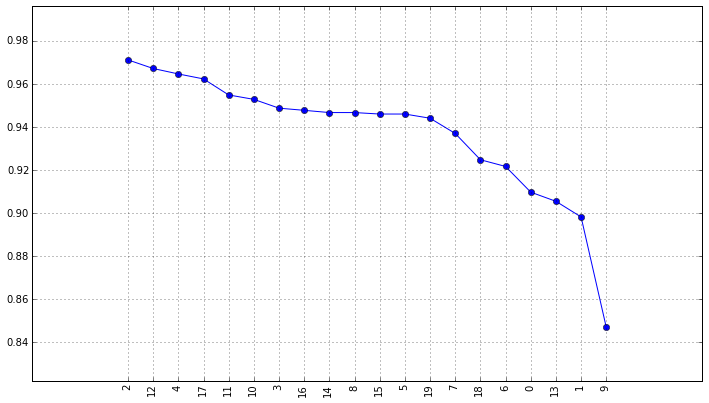

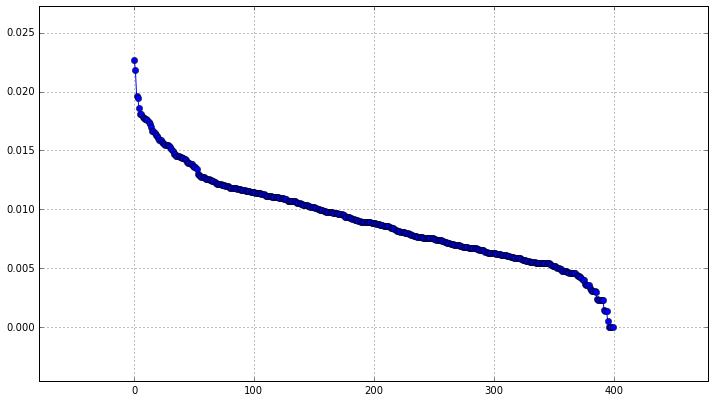

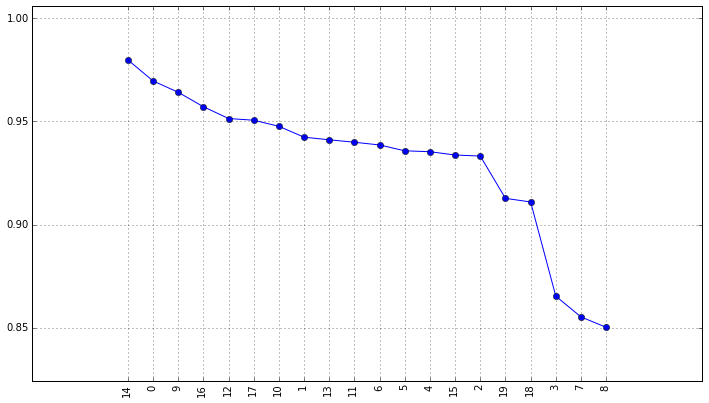

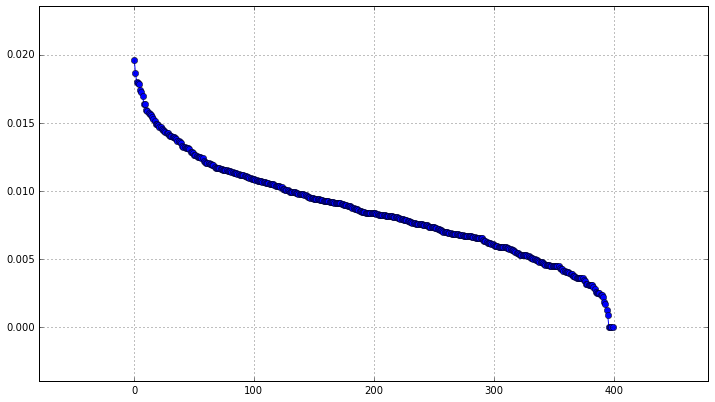

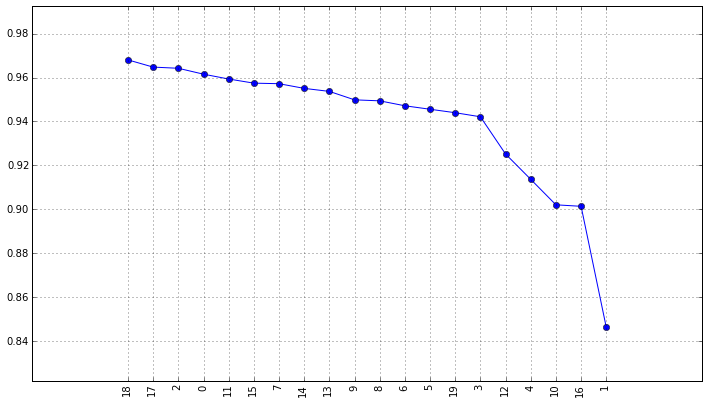

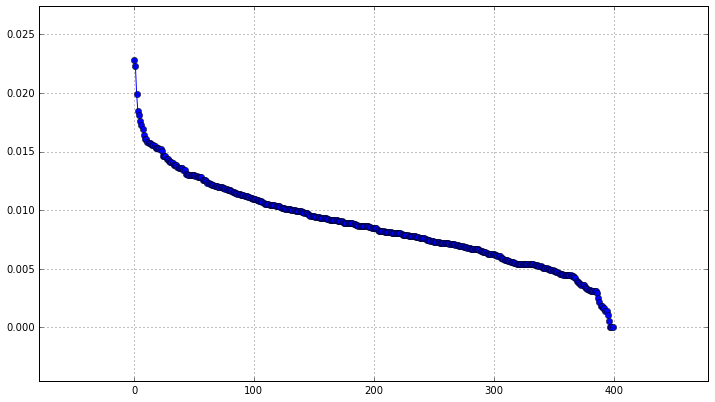

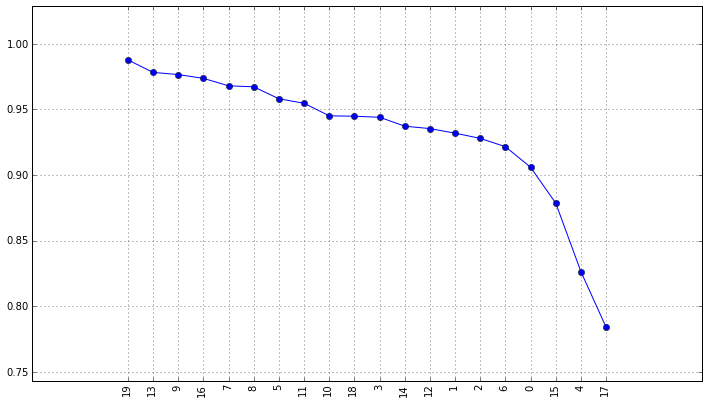

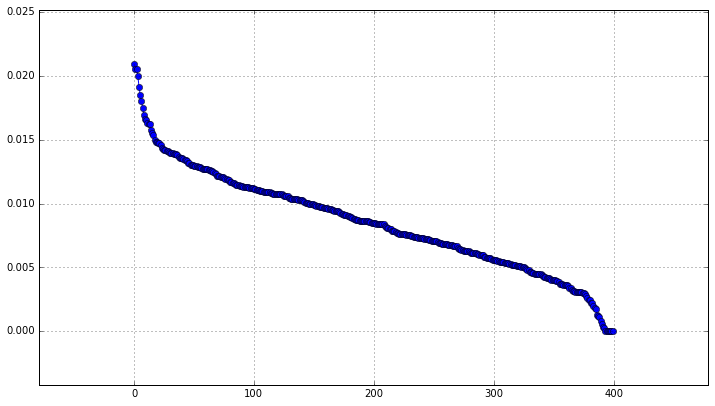

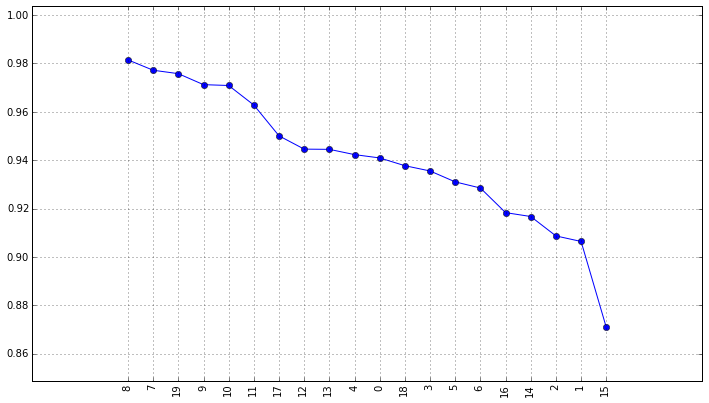

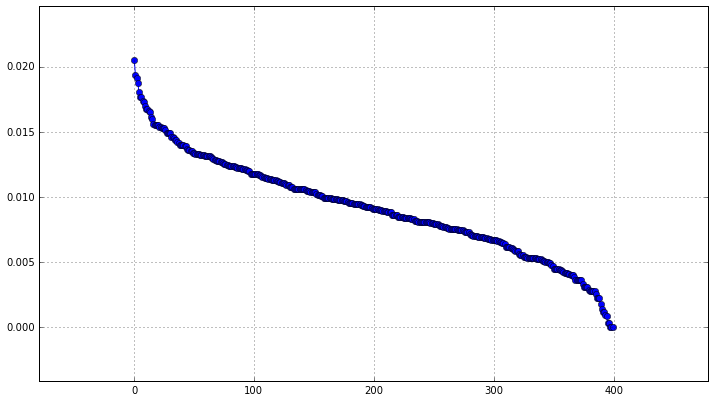

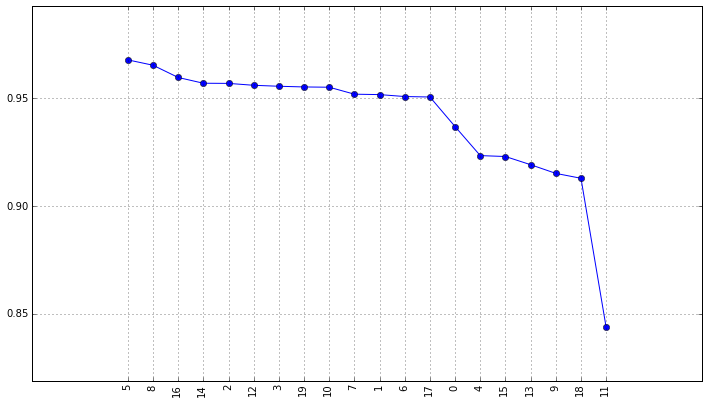

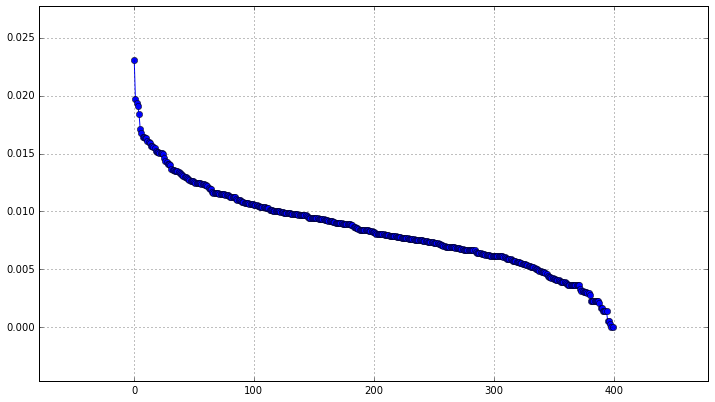

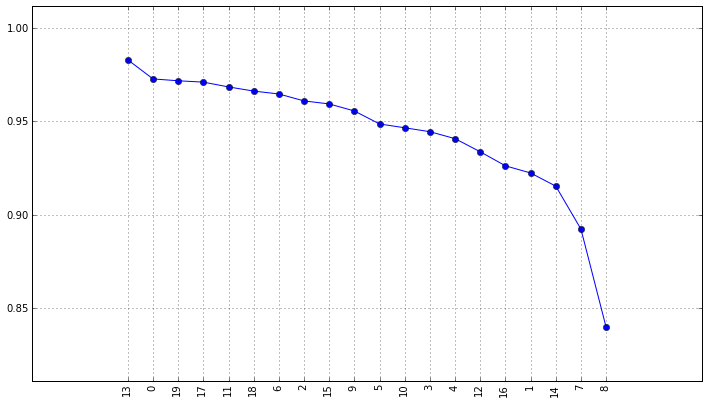

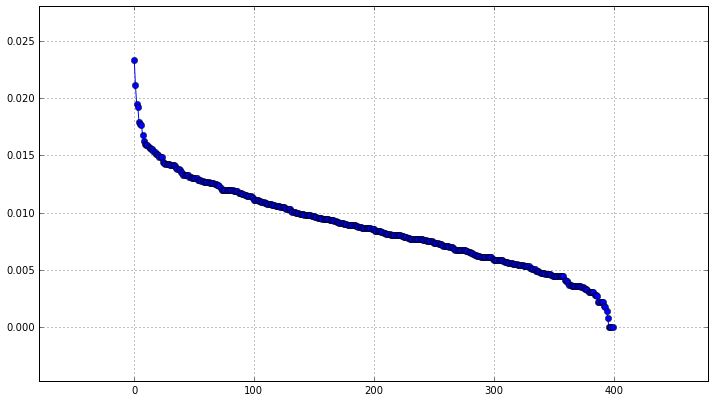

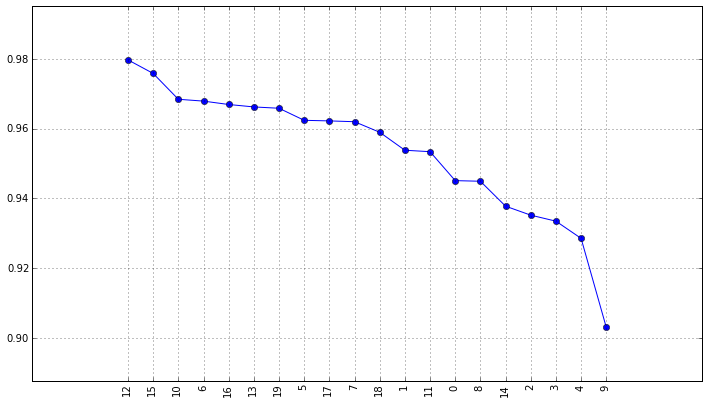

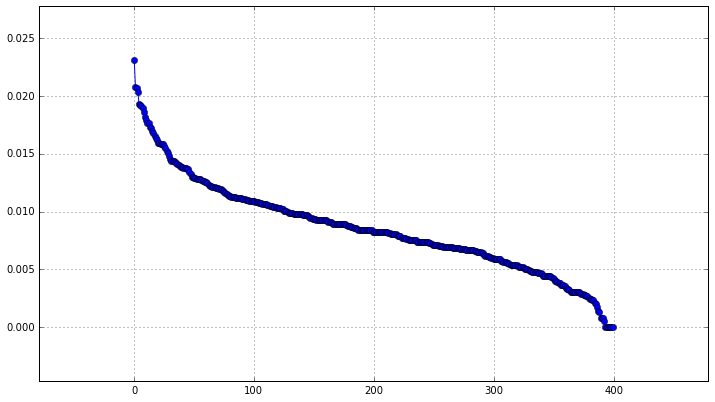

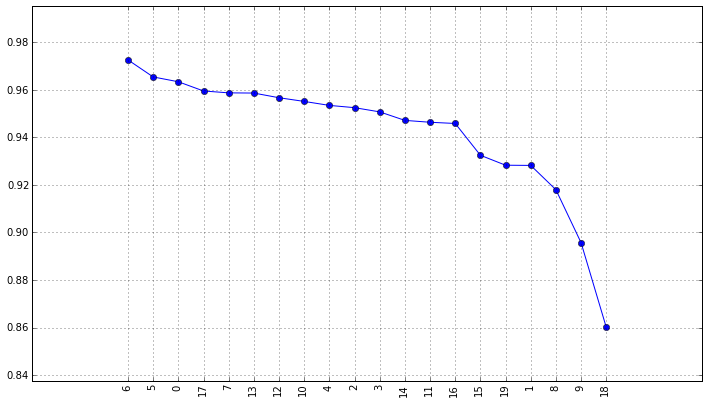

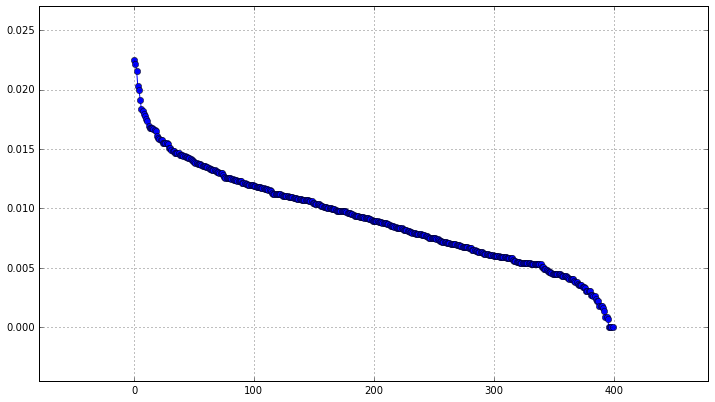

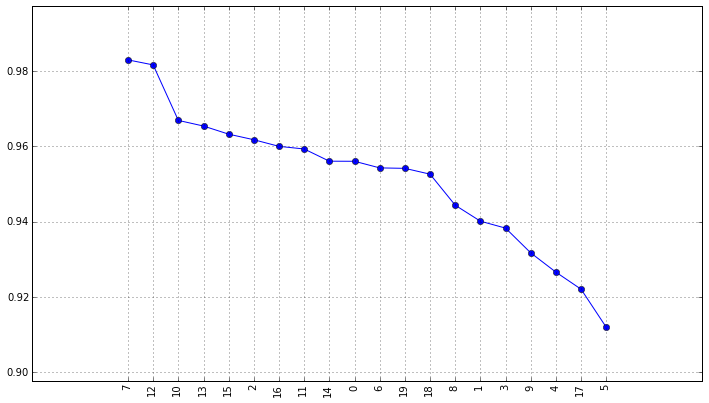

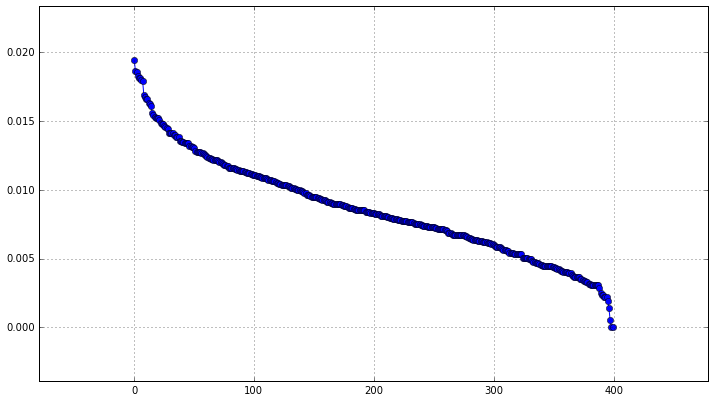

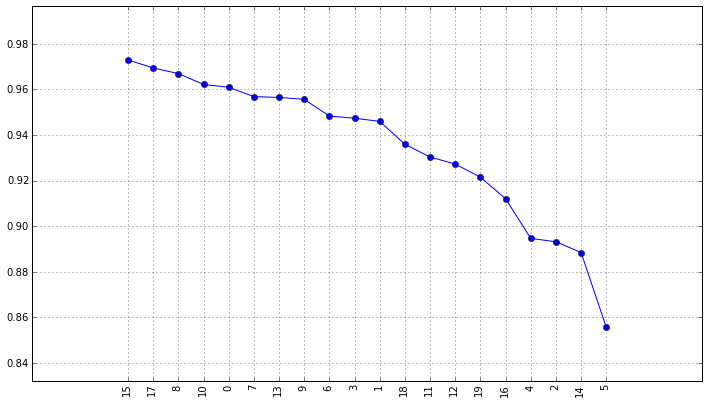

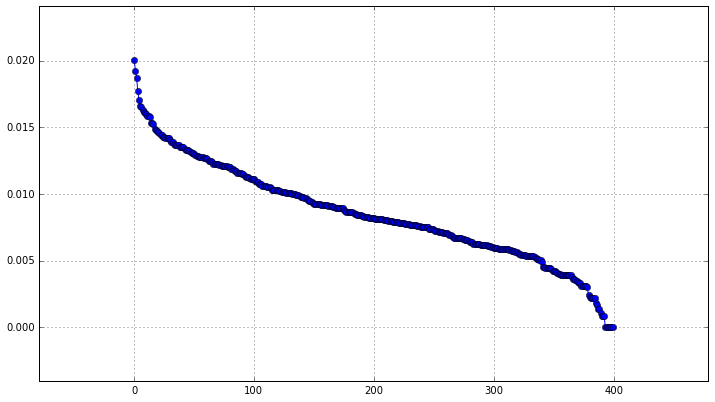

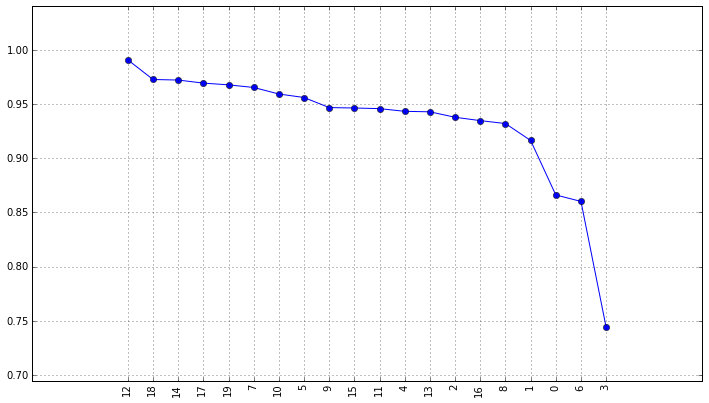

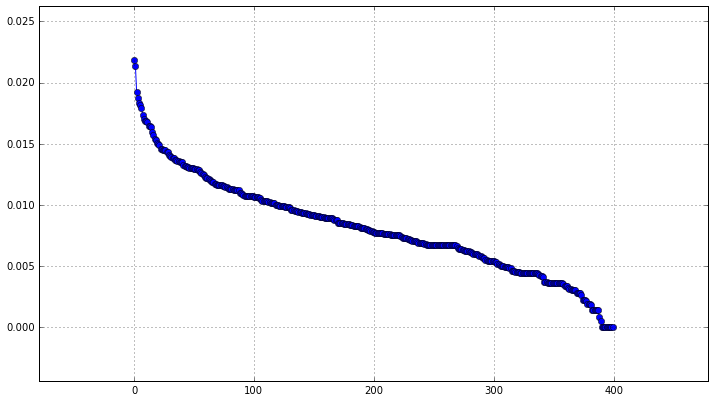

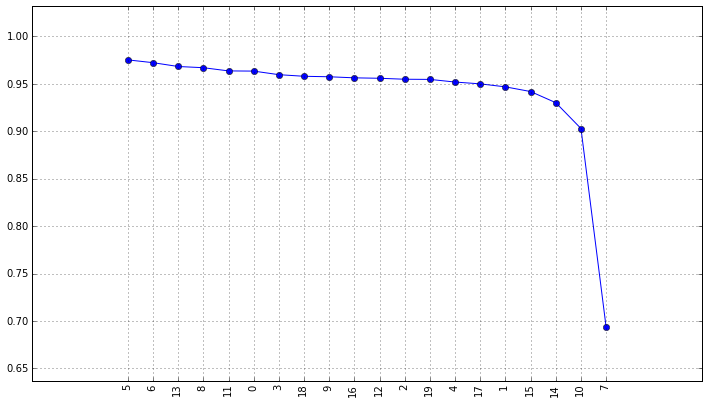

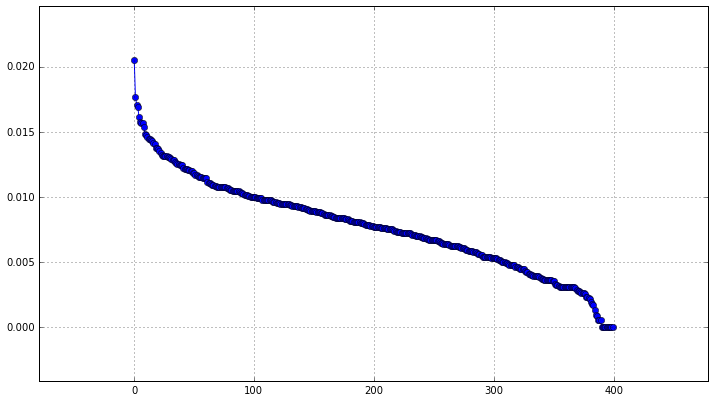

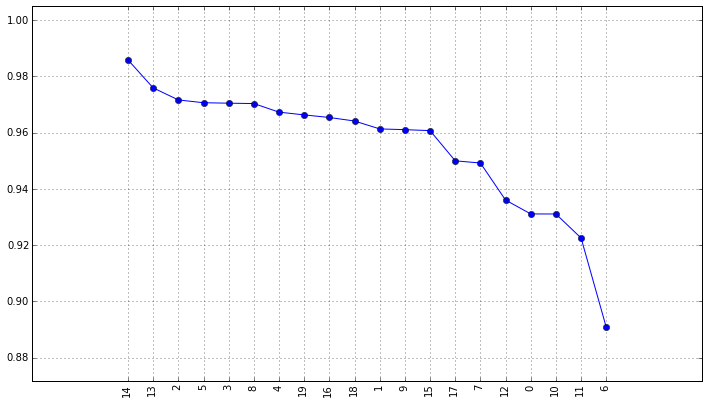

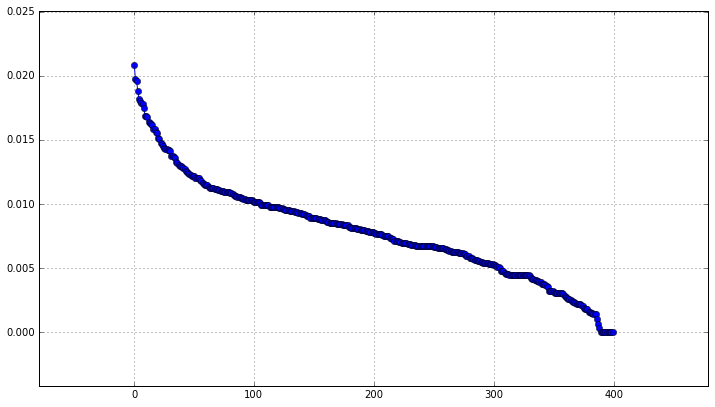

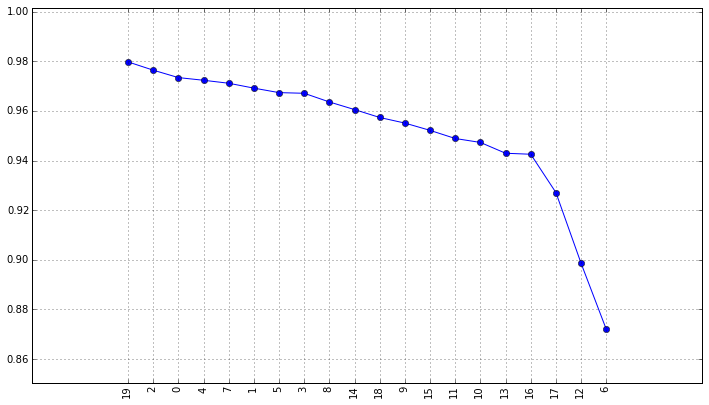

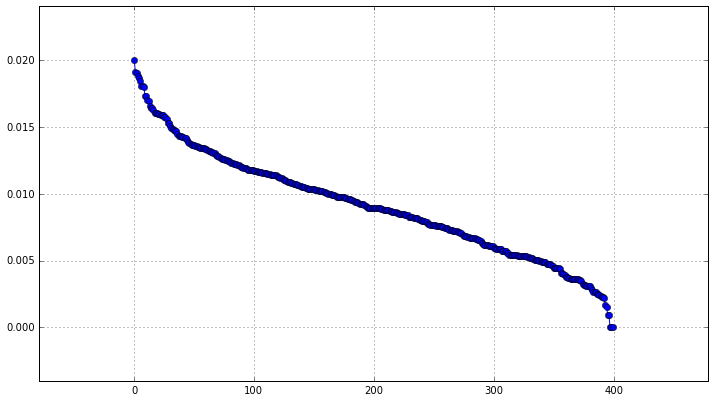

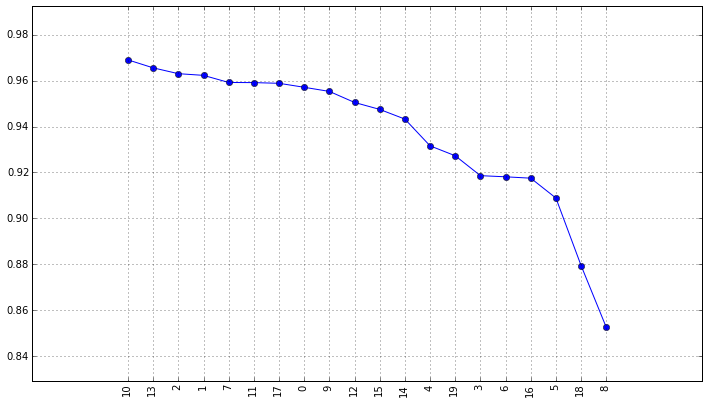

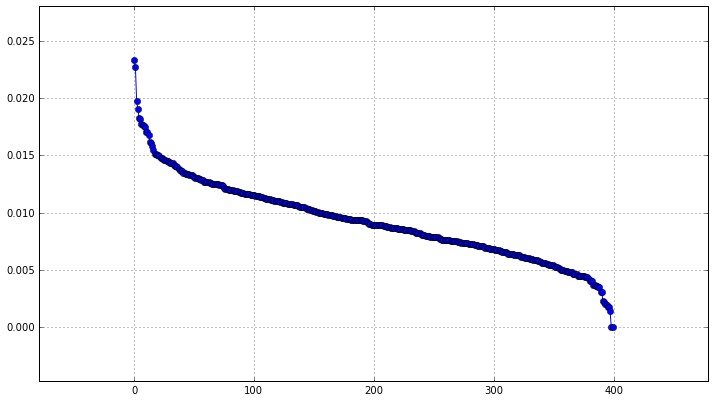

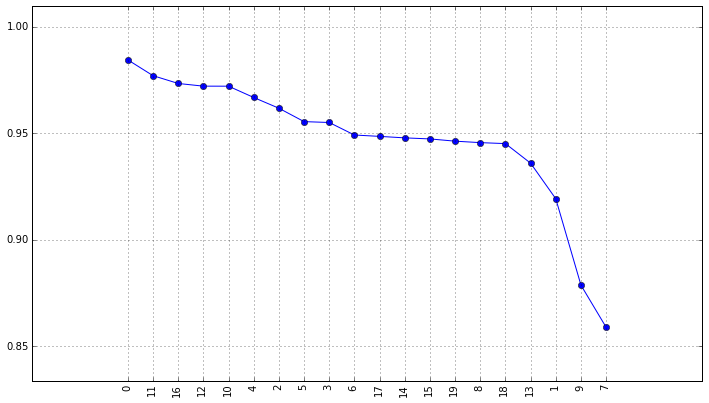

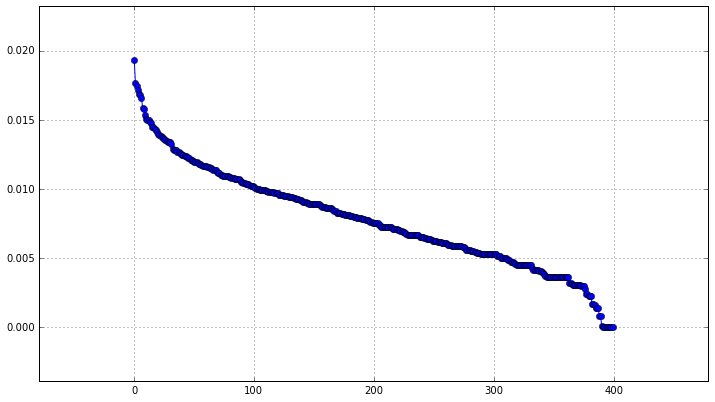

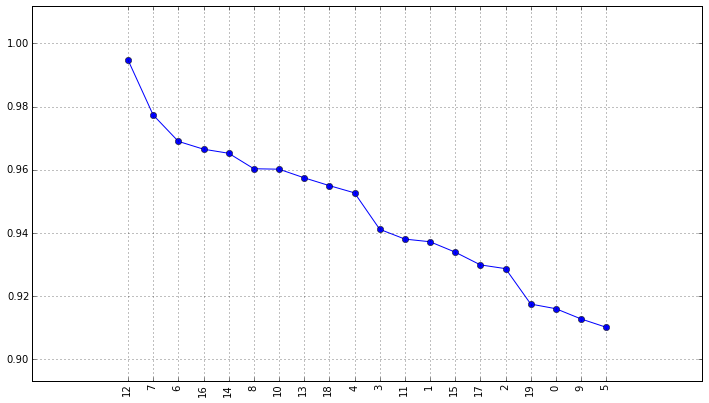

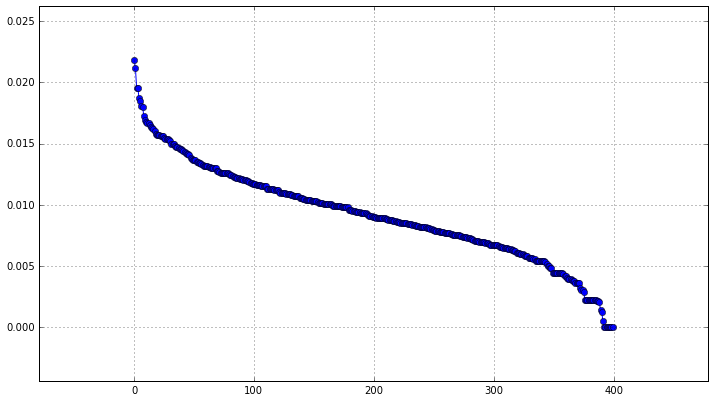

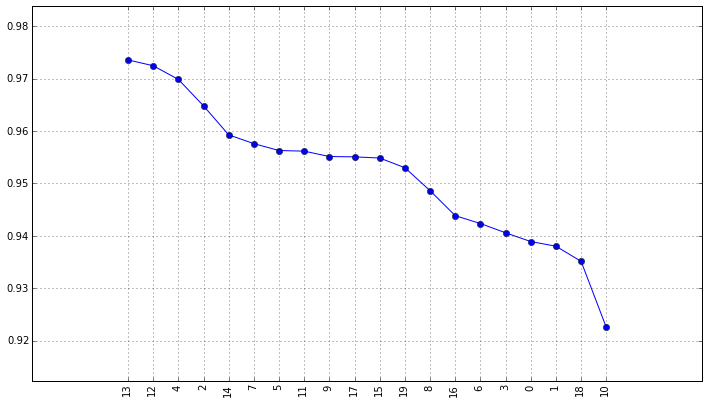

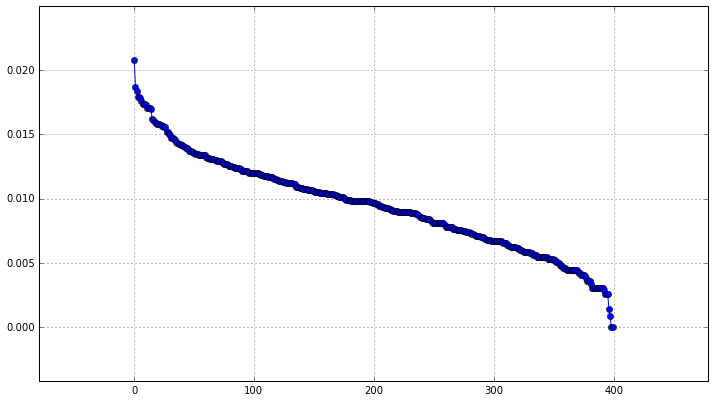

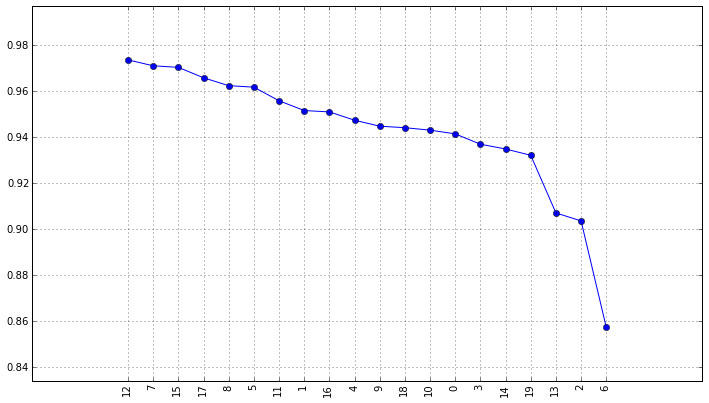

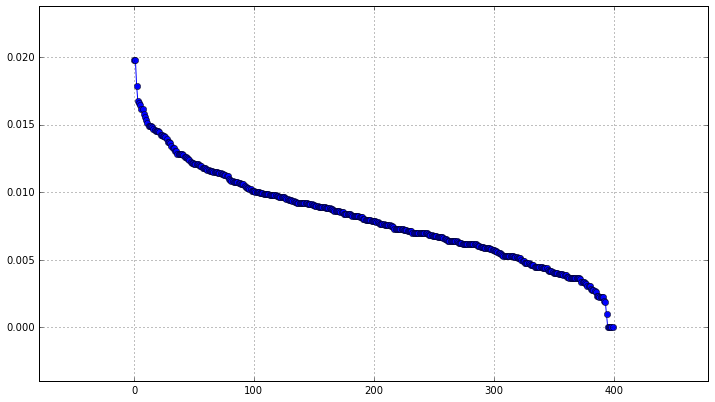

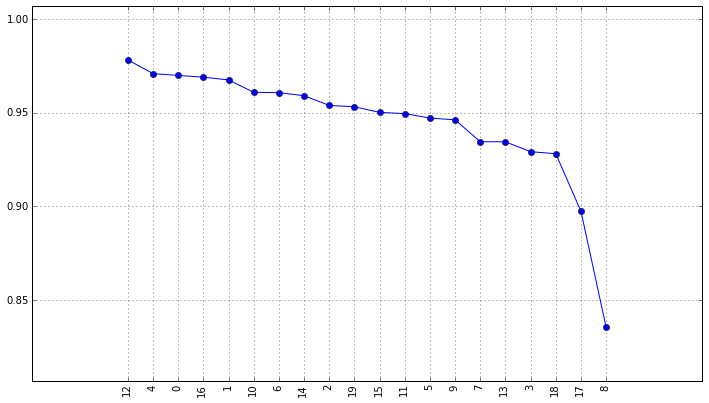

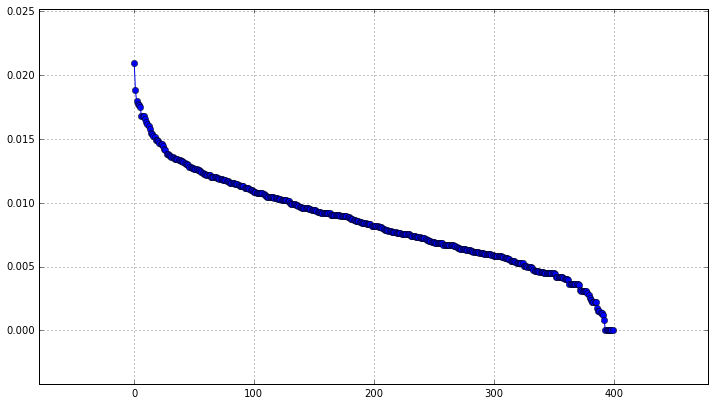

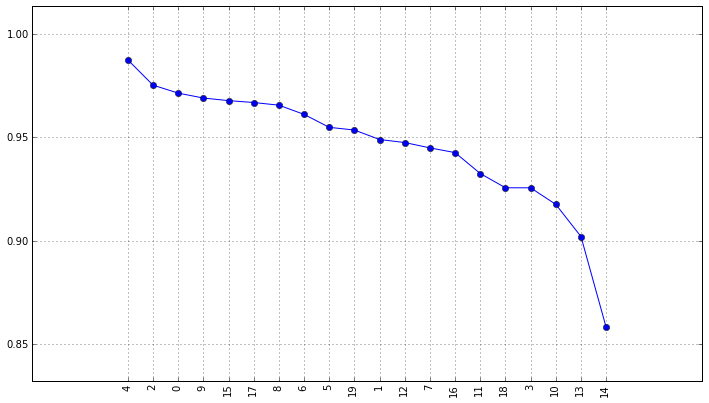

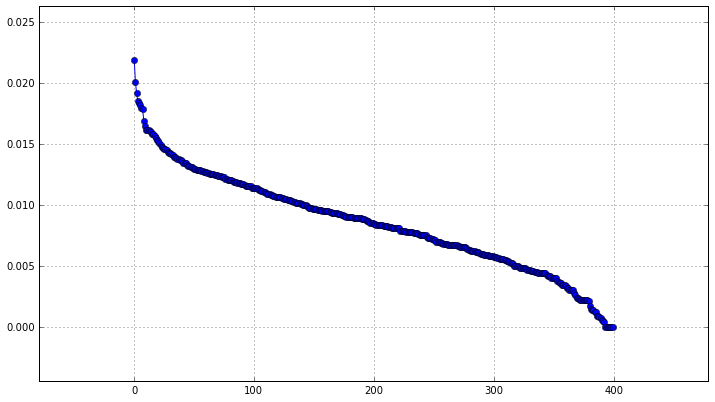

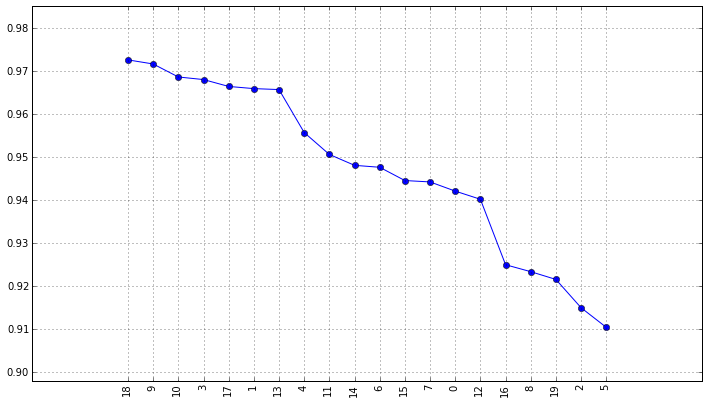

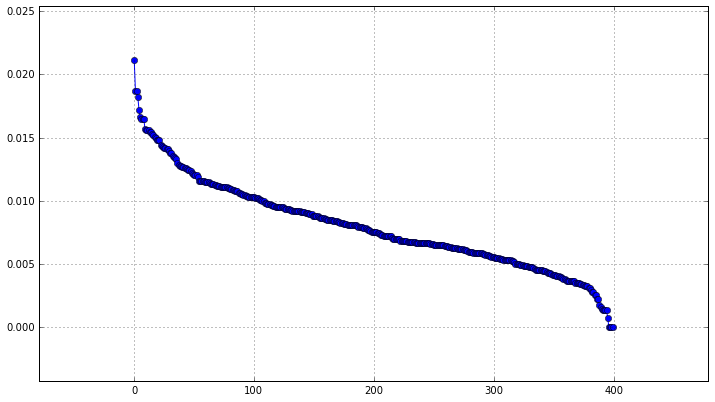

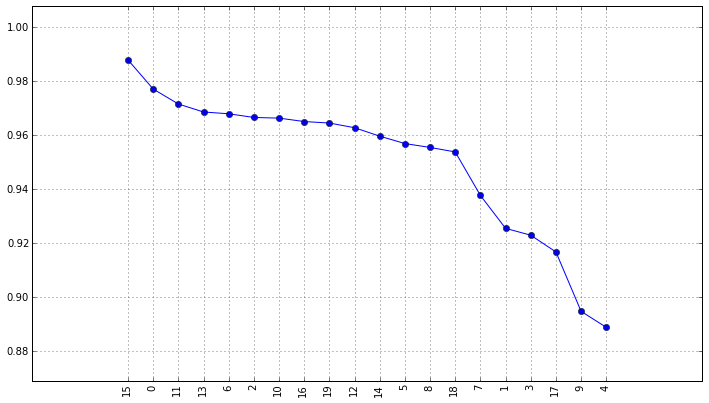

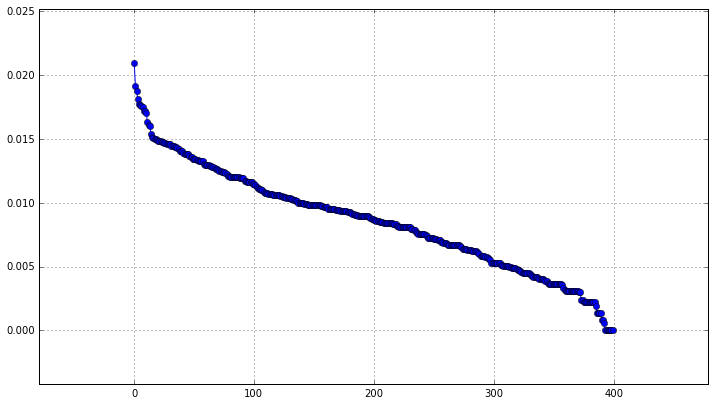

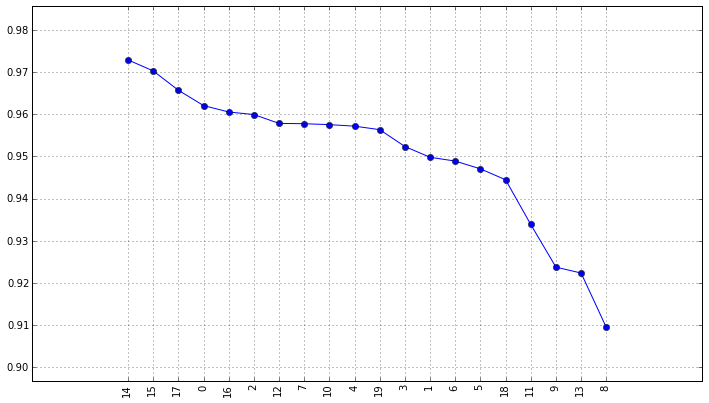

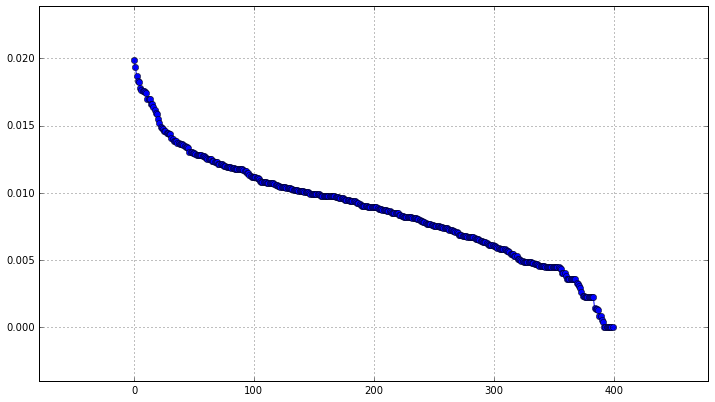

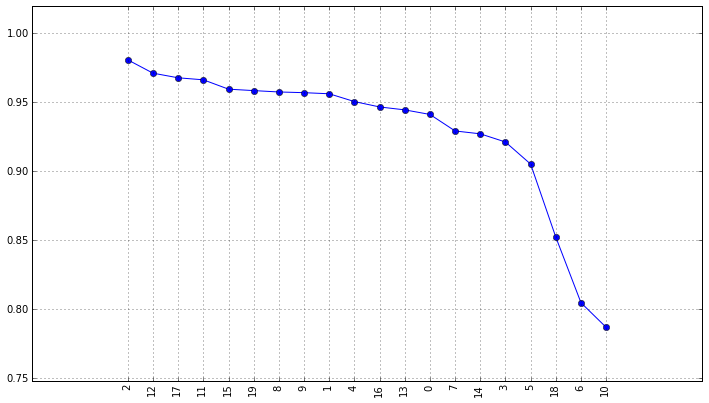

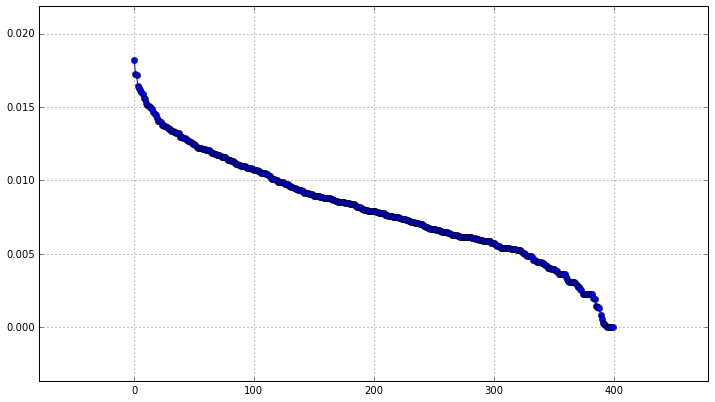

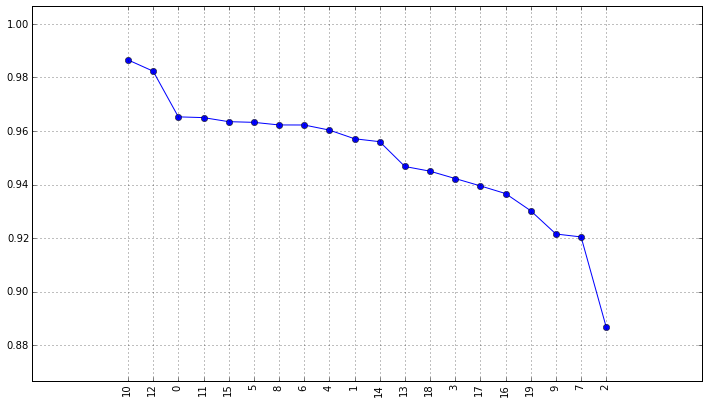

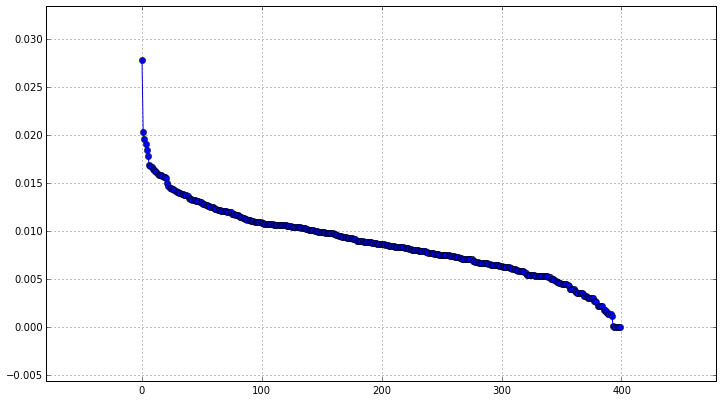

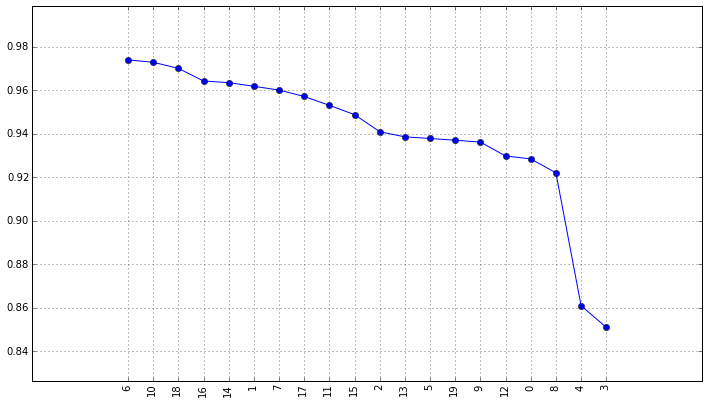

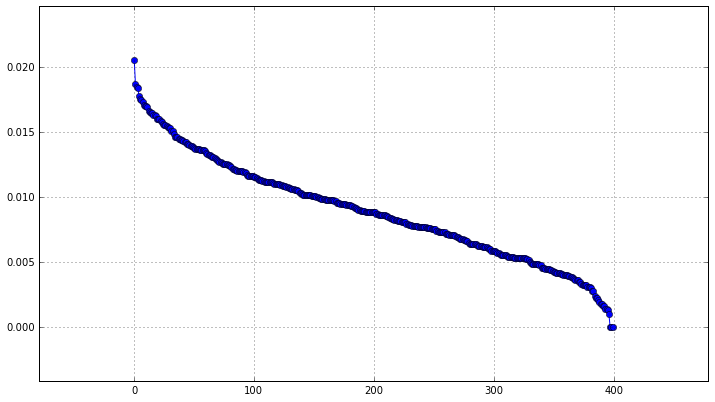

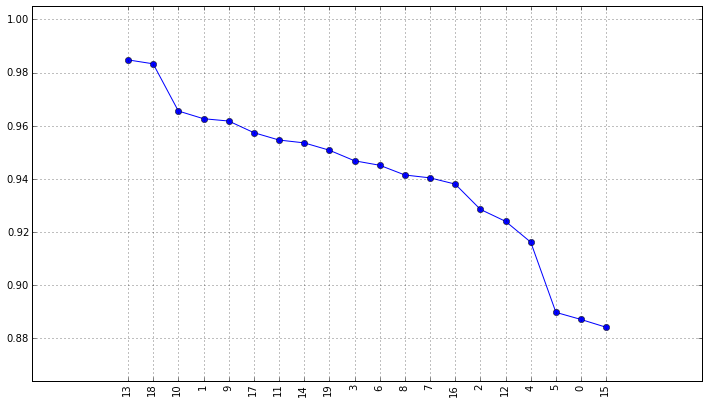

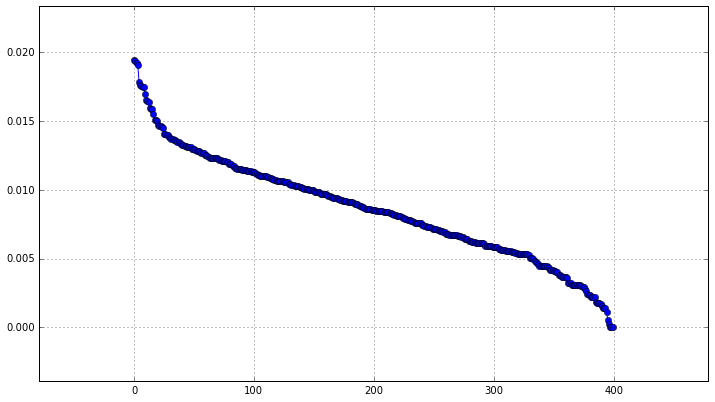

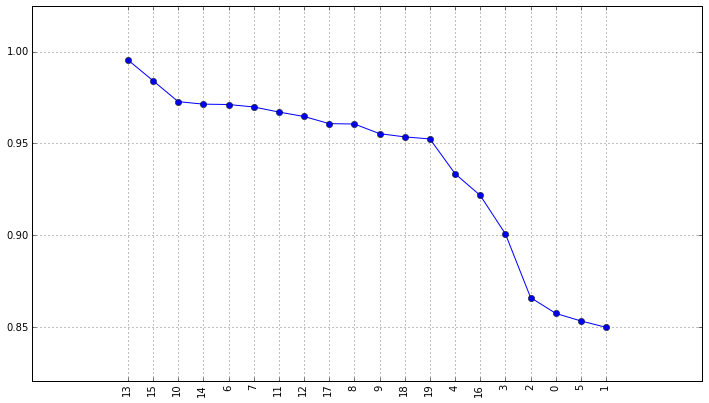

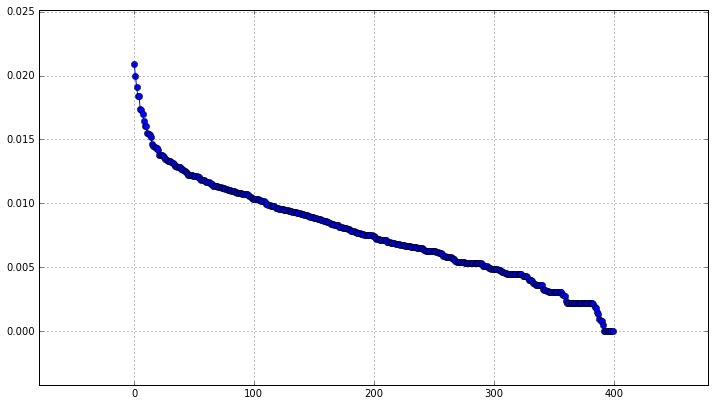

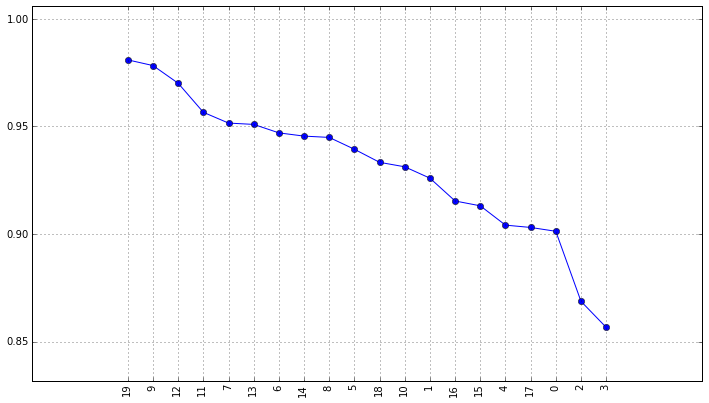

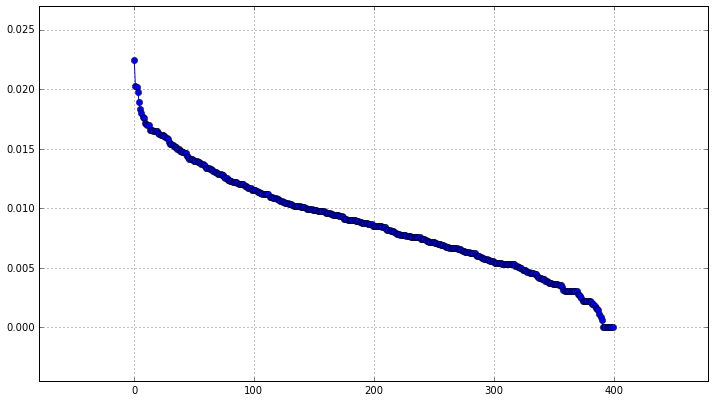

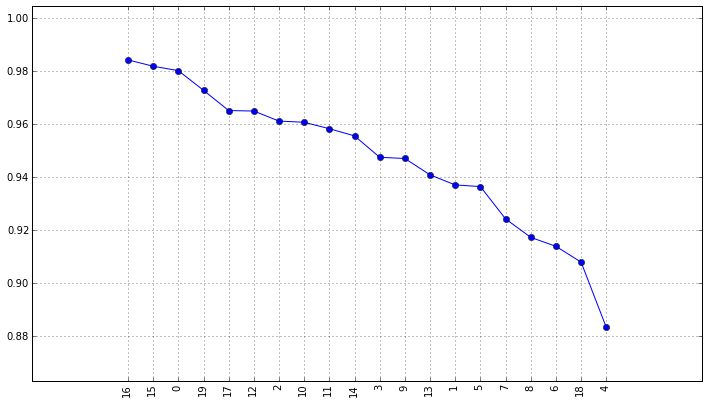

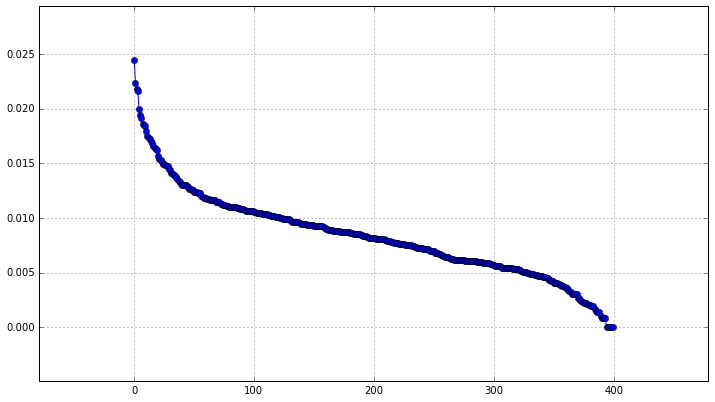

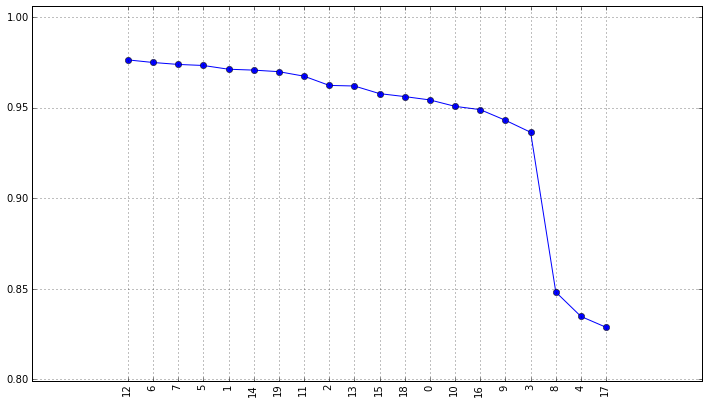

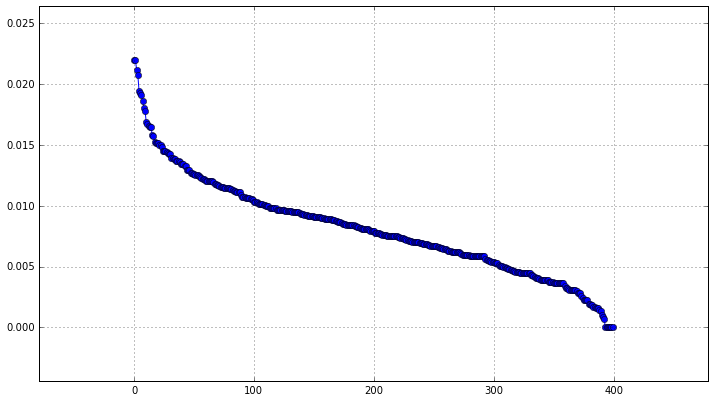

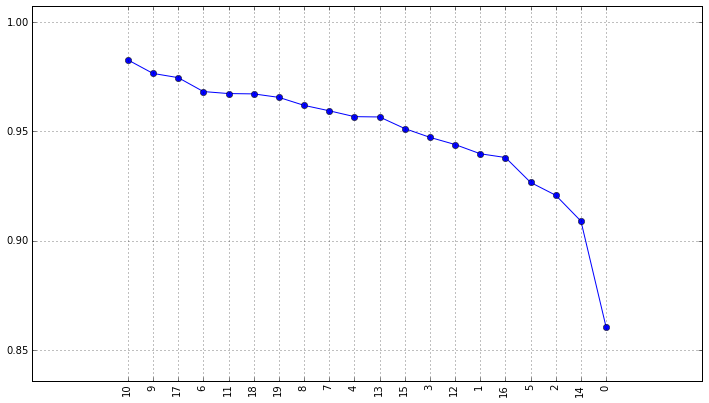

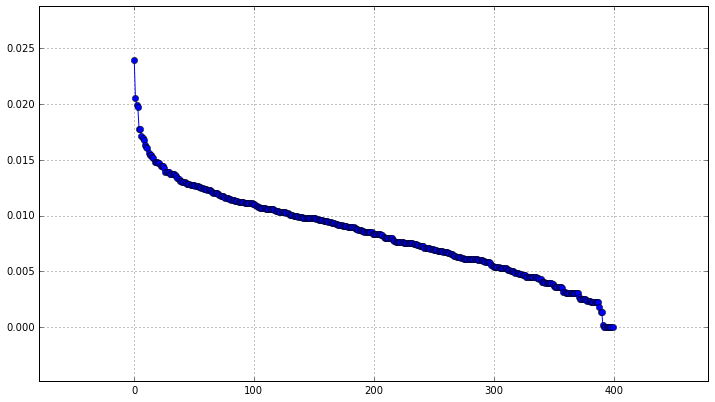

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import info_dyn as info

import sys
import os
import random as ran
from math import log
from optparse import OptionParser, OptionGroup
from scipy import *
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import defaultdict
import operator
import draw_plots
from collections import OrderedDict

import input_net as inet
import updating_rule as ur
import time_evol as tev
import info_dyn as info
#%matplotlib inline

print 'Start'

N_nodes = 20.
iterations = int(1000)  # Note 1e5 gives similar results to 1e6 but way slower

# Make BA network
m = 1  # minimum number of connectivities in BA network
net = nx.barabasi_albert_graph(N_nodes,m)
degree = net.degree()
k_avg = np.mean(degree.values())

# Create Temp and Energy arrays
Temp = np.arange(0,20)/2.
Temp[0] = 1e-6
avg_E = []

TE_Temp = []
AI_Temp = []

for T in Temp:
    
    print 'Temperature:',T
    folder = 'temp_%d_nodes_%d_longtime_short'%(int(T),int(N_nodes))
    !mkdir /Users/jakehanson/Desktop/InfoResults/"$folder"
    
    T_c = k_avg/4.*np.log(N_nodes)  # Predicted Critial Temp. (Approx)
    #T_c = m/2.*np.log(N_nodes)  # Predicted Critical Temp. Where did I get this?

    # Calculate TE and AI 10x for each temp
    TE_array = []
    AI_array = []
    for i in range(3):
        print 'Trial:',i

        # Initialize cube to store data
        cube = np.zeros((N_nodes,iterations))

        # Initialize spins
        for u in range(0,int(N_nodes)):
            cube[u,0] = 1.  # Spinz Up

        # Build data cube in Ising Model
        for i in range(1,iterations):

            # First we copy all nodes to the next state
            for j in range(0,int(N_nodes)):
                cube[j,i] = cube[j,i-1]

            # Choose a node
            node = np.random.randint(0,N_nodes)

            # Do we flip?
            E = 0.

            for each in net.neighbors(node):
                E += 1.0 * cube[each,i-1]  # Sum of nearest neighbors in previous state

            E = -cube[node,i-1]*E  # Energy of node in previous state

            # What Happens Next??
            if E > 0.:
                cube[node,i] = -cube[node,i-1]  # Flip Current Spin if Old Energy is positive
            if E <= 0.:
                r = np.random.random()
                if r <= np.exp(2.*E/T):          # Maybe Flip Spin (accounts for entopy considerations)
                    cube[node,i] = -cube[node,i-1]

        for xx in range(cube.shape[0]):
            for yy in range(cube.shape[1]):
                if cube[xx,yy] == -1.:
                    cube[xx,yy] = 0

                if cube[xx,yy] == 1.:
                    cube[xx,yy] = 1

        # Create Data Structure
        timeseriesdata = {}
        for x in net.nodes():
            timeseriesdata[x] = {}
            for y in range(1):
#                timeseriesdata[x][y] = cube[x,:].tolist()
                timeseriesdata[x][y] = cube[x,iterations-900:iterations-1].tolist()  # Only get info for last 100 steps
    

        historyLength = 4
        maxStep = iterations
        Nbr_States = 2

        ## 6-3. For a particular initial network state

        ## 6-3-a. To compute AI
        result_ai_one = open('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-step%d-trans0-h%d.dat'%(maxStep, historyLength),'w')
        AI_one = {}
        for n in net.nodes():
            AI_one[n] = info.compute_AI(timeseriesdata[n], historyLength, 1, Nbr_States)
            result_ai_one.write('%s\t%f\n'%(n, AI_one[n]))

        ## 6-3-b. To compute TE
        result_te_one = open('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-step%d-trans0-h%d.dat'%(maxStep, historyLength),'w')
        TE_one =  defaultdict(float)
        for v in net.nodes():
        #    for n in nodes_list:
            for n in net.nodes():
                TE_one[(v, n)] = info.compute_TE(timeseriesdata[v], timeseriesdata[n], historyLength, 1, Nbr_States)
                result_te_one.write('%s\t%s\t%f\n'%(v, n,TE_one[(v, n)] ))

        ## 6-3-c. Scale behavior for AI (optional)
        result_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength)
        viz_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.pdf'%(maxStep, historyLength)
        draw_plots.plot_AI_scale(AI_one, result_file_name, viz_file_name) ### plot and result file for AI scale

        ## 6-3-d. Scale behavior for TE (optional)
        result_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength)
        viz_file_name = '/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.pdf'%(maxStep, historyLength)
        draw_plots.plot_TE_scale(TE_one, result_file_name, viz_file_name) ### plot and result file for TE scale

        ai_data = np.loadtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)



        # Calculate Total TE and AI for given hist length, num nodes, and temperature
    #    print 'Temperature = ',T
    #    print 'History Length',historyLength
        AI = np.sum(ai_data[:,1])
        print 'Active Info',AI
        AI_array.append(AI)

        te_data = np.genfromtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)

        TE = np.sum(te_data[:,2])
        print 'Transfer Entropy',TE
        TE_array.append(TE)

    print 'Average AI =',np.mean(AI_array)
    print 'Average TE =',np.mean(TE_array)
    AI_Temp.append(np.mean(AI_array))
    TE_Temp.append(np.mean(TE_array))

print 'Done'

1.42297282994
Temperature: 1e-06
Temperature: 0.5
Temperature: 1.0
Temperature: 1.5
Temperature: 2.0
Temperature: 2.5
Temperature: 3.0
Temperature: 3.5
Temperature: 4.0
Temperature: 4.5
Temperature: 5.0
Temperature: 5.5
Temperature: 6.0
Temperature: 6.5
Temperature: 7.0
Temperature: 7.5
Temperature: 8.0
Temperature: 8.5
Temperature: 9.0
Temperature: 9.5


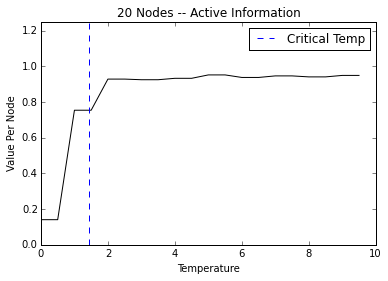

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Create Temp and Energy arrays
Temp = np.arange(0,20)/2.
Temp[0] = 1e-6
avg_E = []

# Constants
iterations = int(1000)  # Note 1e5 gives similar results to 1e6 but way slower
N_nodes = 20
historyLength = 4
maxStep = iterations
Nbr_States = 2

m = 1  # minimum number of connectivities in BA network

# Make BA network
net = nx.barabasi_albert_graph(N_nodes,m)

# Calculate network properties
degree = net.degree()
k_avg = np.mean(degree.values())
T_c = k_avg/4.*np.log(N_nodes)  # Predicted Critial Temp. (Approx)
print T_c

# Array to hold AI and TE as a function of Temp
AI_Temp = []
TE_Temp = []

# Calculate Total AI and TE for each temp
for T in Temp:
    
    print 'Temperature:',T
    folder = 'temp_%d_nodes_%d_longtime_short'%(int(T),int(N_nodes))
    
    ai_data = np.loadtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/ai-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)
    te_data = np.genfromtxt('/Users/jakehanson/Desktop/InfoResults/'+folder+'/te-one-scale-step%d-trans0-h%d.dat'%(maxStep, historyLength), skiprows=0)

    AI = np.sum(ai_data[:,1])
    AI_Temp.append(AI)

    TE = np.sum(te_data[:,2])
    TE_Temp.append(TE)  
    
TE_Temp = TE_Temp/np.asarray(20.)
AI_Temp = AI_Temp/np.asarray(20.)
plt.plot(Temp,AI_Temp,color ='k')
plt.title('20 Nodes -- Active Information')
plt.xlabel('Temperature')
plt.ylabel('Value Per Node')
plt.ylim([0,1.25])
plt.axvline(T_c,label = 'Critical Temp',linestyle='--')
#plt.subplot(211)
#plt.plot(Temp,TE_Temp,color = 'k')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/AI_1000steps_last100_20nodes.ps')
plt.show()